In [1]:
from pylab import plt
import pandas as pd
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import datetime as dt
import scipy as sc
from pylab import mpl
import scipy.integrate as sci
import scipy.stats as scs
import pandas_datareader as web
import statsmodels.api as sm
import enum
import scipy.optimize as spo
from numpy.fft import *
from yahoo_fin import options
from dawp import *
from mystic.solvers import fmin, fmin_powell, diffev, diffev2, sparsity,lattice

import datetime as dt
import numpy as np
import simpleplotly as spt
from fftoptionlib import *
import plotly
import plotly.offline as py
from scipy.stats import norm
import pandas as pd


import math
import sys
import yfinance as yf
np.set_printoptions(suppress=True, formatter={'all': lambda x: '%5.4f' % x})
aapl = yf.Ticker("NFLX")
sys.path.append('../')
sys.path.append('C:/Users/kiedy/dx')
print(sys.path)

import autograd.numpy as agnp
from autograd import grad


['C:\\Users\\kiedy', 'C:\\Users\\kiedy\\anaconda3\\python38.zip', 'C:\\Users\\kiedy\\anaconda3\\DLLs', 'C:\\Users\\kiedy\\anaconda3\\lib', 'C:\\Users\\kiedy\\anaconda3', '', 'C:\\Users\\kiedy\\anaconda3\\lib\\site-packages', 'C:\\Users\\kiedy\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\kiedy\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\kiedy\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\kiedy\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\kiedy\\.ipython', '../', 'C:/Users/kiedy/dx']


In [2]:
options1=pd.DataFrame([43.10, 35.60, 22.90, 20.20, 13.30],
                     columns=['price'])
options1['strike']=(1090,1100,1120,1125,1140)
options1['maturity']=dt.datetime(2002,5,17)
options1['T_2']=0.088


options2=pd.DataFrame([84.50, 64.30, 39.50, 33.50, 30.70, 28.00,  25.60, 23.20,19.10,15.30,12.10,10.90],
                     columns=['price'])
options2['strike']=(1050,1075,1110,1120,1125,1130,1135,1140,1150,1160,1170,1175)
options2['maturity']=dt.datetime(2002,6,21)
options2['T_2']=0.184


options3=pd.DataFrame([161.60, 144.80, 120.10, 100.70, 82.50,65.50,51.00,45.50,38.10,27.70,19.60,13.20],
                     columns=['price'])
options3['strike']=(975,995,1025,1050,1075,1100,1125,1135,1150,1175,1200,1225)
options3['maturity']=dt.datetime(2002,9,20)
options3['T_2']=0.436



options4=pd.DataFrame([173.30,157.00,133.10,114.80,97.60,81.20,66.90,58.90,53.90,42.50,33.00,24.90,18.30,13.20],
                     columns=['price'])
options4['strike']=(975,995,1025,1050,1075,1100,1125,1140,1150,1175,1200,1225,1250,1275)
options4['maturity']=dt.datetime(2002,12,20)
options4['T_2']=0.692


options5=pd.DataFrame([146.50,96.20,81.70,68.30,56.60,46.10,36.90,29.30,22.50,17.20,12.80],
                     columns=['price'])
options5['strike']=(1025,1100,1125,1150,1175,1200,1225,1250,1275,1300,1325)
options5['maturity']=dt.datetime(2003,3,21)
options5['T_2']=0.936


options6=pd.DataFrame([182.10,143.00,111.30,97.00,83.30,60.90,49.80,41.20,27.10,17.10,10.10],
                     columns=['price'])
options6['strike']=(995,1050,1100,1125,1150,1200,1225,1250,1300,1350,1400)
options6['maturity']=dt.datetime(2003,6,20)
options6['T_2']=1.192

options7=pd.DataFrame([171.40,140.40,112.80,99.80,66.90,49.50,35.70,25.20,17.00,12.20],
                     columns=['price'])
options7['strike']=(1050,1100,1150,1175,1250,1300,1350,1400,1450,1500)
options7['maturity']=dt.datetime(2003,12,19)
options7['T_2']=1.708

frames=[options1, options2, options3, options4, options5, options6, options7]

options=pd.concat(frames, ignore_index=True)
options['pricing_date'] = dt.datetime(2002, 4, 18)
options['T']=(options['maturity']-options['pricing_date']).dt.days/365.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


r=0.019
q=0.012
S0=1124.47
i = np.complex(0.0, 1.0)

# Metoda COS

In [3]:
def cf(u, T, r, sigma, lamb, p, n_1, n_2):
    ''' Funkcja charakterystyczna w modelu Kou '''
    b = r - q - 0.5 * sigma ** 2 - lamb * (p*n_1/(n_1-1)+(1-p)*n_2/(n_2+1)-1)
    value = np.exp((1j * u * b - 0.5 * u ** 2 * sigma ** 2 + lamb * (p*n_1/(n_1-1j*u)+(1-p)*n_2/(n_2+1j*u)-1)) * T)
    return value

In [4]:
def G(u):
    ''' Funkcja generująca kumulanty'''
    return np.log(cf(-1j*u,T,r, alpha, beta, delta))

# T=1
# n_1=2
# n_2=2
# p=0.5
# sigma=0.2
# lamb=1

In [48]:
N=2 ** 12
L=10

# This class defines puts and calls

class OptionType(enum.Enum):
    CALL = 1.0
    PUT = -1.0
    
def CallPutOptionPriceCOSMthd(cf,CP,S0,r,T,K,sigma,lamb, p, n_1, n_2,N,L):


    # cf   - Characteristic function is a function, in the book denoted by \varphi
    # CP   - C for call and P for put
    # S0   - Initial stock price
    # r    - Interest rate (constant)
    # T  - Time to maturity
    # K    - List of strikes
    # N    - Number of expansion terms
    # L    - Size of truncation domain (typ.:L=8 or L=10)
        
    # Reshape K to become a column vector

    if K is not np.array:
        K = np.array(K).reshape([len(K),1])
    
    # Assigning i=sqrt(-1)

    i = np.complex(0.0,1.0) 
    x0 = np.log(S0 / K)   
    
    # Truncation domain

#     a = 0.0 - L * np.sqrt(T)
#     b = 0.0 + L * np.sqrt(T)
    
    
    c1=np.log(S0/K)+T*(r-q-0.5*sigma**2-lamb*(p*n_1/(n_1-1)+(1-p)*n_2/(n_2+1)-1)+lamb*p/n_1-lamb*(1-p)/n_2)
    c2=T*(sigma**2+2*lamb*p/n_1**2+2*lamb*(1-p)/n_2**2)  
    c4=24*T*lamb*(p/n_1**4+(1-p)/n_2**4)
    a=c1-L*np.sqrt(c2+np.sqrt(c4))
    b=c1+L*np.sqrt(c2+np.sqrt(c4))
#     Summation from k = 0 to k=N-1

    k = np.linspace(0,N-1,N).reshape([N,1])  
    u = k * np.pi / (b - a);  

    # Determine coefficients for put prices  

    H_k = CallPutCoefficients(CP,a,b,k)   
    mat = np.exp(i * np.outer((x0 - a) , u))
    temp = cf(u, T, r, sigma, lamb, p, n_1, n_2) * H_k 
    temp[0] = 0.5 * temp[0]    
    value = np.exp(-r * T) * K * np.real(mat.dot(temp))     
    return np.exp(-q*T)*S0+ value - K*np.exp(-r*T)

# Determine coefficients for put prices 

def CallPutCoefficients(CP,a,b,k):
    if CP==OptionType.CALL:                  
        c = 0.0
        d = b
        coef = Chi_Psi(a,b,c,d,k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        if a < b and b < 0.0:
            H_k = np.zeros([len(k),1])
        else:
            H_k      = 2.0 / (b - a) * (Chi_k - Psi_k)  
    elif CP==OptionType.PUT:
        c = a
        d = 0.0
        coef = Chi_Psi(a,b,c,d,k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        H_k      = 2.0 / (b - a) * (- Chi_k + Psi_k)               
    
    return H_k    

def Chi_Psi(a,b,c,d,k):
    psi = np.sin(k * np.pi * (d - a) / (b - a)) - np.sin(k * np.pi * (c - a)/(b - a))
    psi[1:] = psi[1:] * (b - a) / (k[1:] * np.pi)
    psi[0] = d - c
    
    chi = 1.0 / (1.0 + np.power((k * np.pi / (b - a)) , 2.0)) 
    expr1 = np.cos(k * np.pi * (d - a)/(b - a)) * np.exp(d)  - np.cos(k * np.pi 
                  * (c - a) / (b - a)) * np.exp(c)
    expr2 = k * np.pi / (b - a) * np.sin(k * np.pi * 
                        (d - a) / (b - a))   - k * np.pi / (b - a) * np.sin(k 
                        * np.pi * (c - a) / (b - a)) * np.exp(c)
    chi = chi * (expr1 + expr2)
    
    value = {"chi":chi,"psi":psi }
    return value

In [60]:
T = 1 
K = 1100

# Parametry z kalibracji:
S0 = 1124.47
r = 0.019
q = 0.012

sigma = 0.1329
lam = 0.0854
p = 0.5613
n_1 = 9.1535
n_2 = 0.0274
CP = OptionType.PUT

CallPutOptionPriceCOSMthd(cf,CP,S0,r,T,(K,),sigma,lam, p, n_1, n_2,N,L)

array([[100.0598]])

In [6]:
# local_opt=False
m=0
def Kou_error_function(p0):
    
    global m, local_opt, opt1
    sigma, lamb,p,n_1,n_2=p0
    if lamb<0 or p<=0 or p>1 or sigma<0 or n_1<=1 or n_2<=0:
        return 100
    se = []
    for row, option in options.iterrows():
        model_value = CallPutOptionPriceCOSMthd(cf,OptionType.PUT,S0,r,option['T_2'],(option['strike'],),sigma,lamb, p, n_1, n_2,N,L)[0][0]
        se.append((model_value - option['price']) ** 2)
    MSE = sum(se) / len(se)
    if m % 1 == 0:
        print('%4d |' % m, np.array(p0), '| %7.3f' % MSE)
        
    m += 1
#     if local_opt:
#         penalty = np.sqrt(np.sum((np.array(p0)-np.array(opt1))  ** 2))
#         return MSE + penalty
    return MSE**0.5

Kou_error_function((0.1370, 0.0858, 0.5398, 20, 0.1))

   0 | [0.1370 0.0858 0.5398 20.0000 0.1000] |   4.740


2.17718106682852

In [9]:
def Kou_calibration_full():
    i=0
    global opt1, opt
    opt1 = spo.brute(Kou_error_function, ((0.1,0.21, 0.05),(0.01,20.2, 3), (0,1,0.1), (1.1,400,30),(0.1,400,30)), finish=None)
    opt = spo.fmin(Kou_error_function, opt1, xtol=0.00001, ftol=0.00001, maxiter=15000, maxfun=15000)
    return opt

Kou_calibration_full()

   1 | [0.1000 0.0100 0.1000 1.1000 0.1000] |  18.968
   2 | [0.1000 0.0100 0.1000 1.1000 30.1000] |  22.060
   3 | [0.1000 0.0100 0.1000 1.1000 60.1000] |  22.077
   4 | [0.1000 0.0100 0.1000 1.1000 90.1000] |  22.081
   5 | [0.1000 0.0100 0.1000 1.1000 120.1000] |  22.082
   6 | [0.1000 0.0100 0.1000 1.1000 150.1000] |  22.082
   7 | [0.1000 0.0100 0.1000 1.1000 180.1000] |  22.083
   8 | [0.1000 0.0100 0.1000 1.1000 210.1000] |  22.083
   9 | [0.1000 0.0100 0.1000 1.1000 240.1000] |  22.083
  10 | [0.1000 0.0100 0.1000 1.1000 270.1000] |  22.083
  11 | [0.1000 0.0100 0.1000 1.1000 300.1000] |  22.083
  12 | [0.1000 0.0100 0.1000 1.1000 330.1000] |  22.083
  13 | [0.1000 0.0100 0.1000 1.1000 360.1000] |  22.083
  14 | [0.1000 0.0100 0.1000 1.1000 390.1000] |  22.083
  15 | [0.1000 0.0100 0.1000 31.1000 0.1000] |  23.439
  16 | [0.1000 0.0100 0.1000 31.1000 30.1000] |  26.658
  17 | [0.1000 0.0100 0.1000 31.1000 60.1000] |  26.676
  18 | [0.1000 0.0100 0.1000 31.1000 90.1000] |  26.67

 146 | [0.1000 0.0100 0.1000 301.1000 150.1000] |  26.684
 147 | [0.1000 0.0100 0.1000 301.1000 180.1000] |  26.684
 148 | [0.1000 0.0100 0.1000 301.1000 210.1000] |  26.684
 149 | [0.1000 0.0100 0.1000 301.1000 240.1000] |  26.685
 150 | [0.1000 0.0100 0.1000 301.1000 270.1000] |  26.685
 151 | [0.1000 0.0100 0.1000 301.1000 300.1000] |  26.685
 152 | [0.1000 0.0100 0.1000 301.1000 330.1000] |  26.685
 153 | [0.1000 0.0100 0.1000 301.1000 360.1000] |  26.685
 154 | [0.1000 0.0100 0.1000 301.1000 390.1000] |  26.685
 155 | [0.1000 0.0100 0.1000 331.1000 0.1000] |  23.442
 156 | [0.1000 0.0100 0.1000 331.1000 30.1000] |  26.661
 157 | [0.1000 0.0100 0.1000 331.1000 60.1000] |  26.679
 158 | [0.1000 0.0100 0.1000 331.1000 90.1000] |  26.682
 159 | [0.1000 0.0100 0.1000 331.1000 120.1000] |  26.683
 160 | [0.1000 0.0100 0.1000 331.1000 150.1000] |  26.684
 161 | [0.1000 0.0100 0.1000 331.1000 180.1000] |  26.684
 162 | [0.1000 0.0100 0.1000 331.1000 210.1000] |  26.685
 163 | [0.1000 0.01

 290 | [0.1000 0.0100 0.2000 181.1000 270.1000] |  26.685
 291 | [0.1000 0.0100 0.2000 181.1000 300.1000] |  26.685
 292 | [0.1000 0.0100 0.2000 181.1000 330.1000] |  26.685
 293 | [0.1000 0.0100 0.2000 181.1000 360.1000] |  26.685
 294 | [0.1000 0.0100 0.2000 181.1000 390.1000] |  26.685
 295 | [0.1000 0.0100 0.2000 211.1000 0.1000] |  23.808
 296 | [0.1000 0.0100 0.2000 211.1000 30.1000] |  26.664
 297 | [0.1000 0.0100 0.2000 211.1000 60.1000] |  26.679
 298 | [0.1000 0.0100 0.2000 211.1000 90.1000] |  26.682
 299 | [0.1000 0.0100 0.2000 211.1000 120.1000] |  26.683
 300 | [0.1000 0.0100 0.2000 211.1000 150.1000] |  26.684
 301 | [0.1000 0.0100 0.2000 211.1000 180.1000] |  26.684
 302 | [0.1000 0.0100 0.2000 211.1000 210.1000] |  26.684
 303 | [0.1000 0.0100 0.2000 211.1000 240.1000] |  26.685
 304 | [0.1000 0.0100 0.2000 211.1000 270.1000] |  26.685
 305 | [0.1000 0.0100 0.2000 211.1000 300.1000] |  26.685
 306 | [0.1000 0.0100 0.2000 211.1000 330.1000] |  26.685
 307 | [0.1000 0.01

 435 | [0.1000 0.0100 0.3000 91.1000 0.1000] |  24.172
 436 | [0.1000 0.0100 0.3000 91.1000 30.1000] |  26.665
 437 | [0.1000 0.0100 0.3000 91.1000 60.1000] |  26.679
 438 | [0.1000 0.0100 0.3000 91.1000 90.1000] |  26.682
 439 | [0.1000 0.0100 0.3000 91.1000 120.1000] |  26.683
 440 | [0.1000 0.0100 0.3000 91.1000 150.1000] |  26.683
 441 | [0.1000 0.0100 0.3000 91.1000 180.1000] |  26.683
 442 | [0.1000 0.0100 0.3000 91.1000 210.1000] |  26.684
 443 | [0.1000 0.0100 0.3000 91.1000 240.1000] |  26.684
 444 | [0.1000 0.0100 0.3000 91.1000 270.1000] |  26.684
 445 | [0.1000 0.0100 0.3000 91.1000 300.1000] |  26.684
 446 | [0.1000 0.0100 0.3000 91.1000 330.1000] |  26.684
 447 | [0.1000 0.0100 0.3000 91.1000 360.1000] |  26.684
 448 | [0.1000 0.0100 0.3000 91.1000 390.1000] |  26.684
 449 | [0.1000 0.0100 0.3000 121.1000 0.1000] |  24.172
 450 | [0.1000 0.0100 0.3000 121.1000 30.1000] |  26.666
 451 | [0.1000 0.0100 0.3000 121.1000 60.1000] |  26.679
 452 | [0.1000 0.0100 0.3000 121.1000

 579 | [0.1000 0.0100 0.3000 391.1000 120.1000] |  26.684
 580 | [0.1000 0.0100 0.3000 391.1000 150.1000] |  26.684
 581 | [0.1000 0.0100 0.3000 391.1000 180.1000] |  26.684
 582 | [0.1000 0.0100 0.3000 391.1000 210.1000] |  26.685
 583 | [0.1000 0.0100 0.3000 391.1000 240.1000] |  26.685
 584 | [0.1000 0.0100 0.3000 391.1000 270.1000] |  26.685
 585 | [0.1000 0.0100 0.3000 391.1000 300.1000] |  26.685
 586 | [0.1000 0.0100 0.3000 391.1000 330.1000] |  26.685
 587 | [0.1000 0.0100 0.3000 391.1000 360.1000] |  26.685
 588 | [0.1000 0.0100 0.3000 391.1000 390.1000] |  26.685
 589 | [0.1000 0.0100 0.4000 1.1000 0.1000] |  18.579
 590 | [0.1000 0.0100 0.4000 1.1000 30.1000] |  19.441
 591 | [0.1000 0.0100 0.4000 1.1000 60.1000] |  19.446
 592 | [0.1000 0.0100 0.4000 1.1000 90.1000] |  19.447
 593 | [0.1000 0.0100 0.4000 1.1000 120.1000] |  19.447
 594 | [0.1000 0.0100 0.4000 1.1000 150.1000] |  19.447
 595 | [0.1000 0.0100 0.4000 1.1000 180.1000] |  19.447
 596 | [0.1000 0.0100 0.4000 1.10

 723 | [0.1000 0.0100 0.4000 271.1000 240.1000] |  26.685
 724 | [0.1000 0.0100 0.4000 271.1000 270.1000] |  26.685
 725 | [0.1000 0.0100 0.4000 271.1000 300.1000] |  26.685
 726 | [0.1000 0.0100 0.4000 271.1000 330.1000] |  26.685
 727 | [0.1000 0.0100 0.4000 271.1000 360.1000] |  26.685
 728 | [0.1000 0.0100 0.4000 271.1000 390.1000] |  26.685
 729 | [0.1000 0.0100 0.4000 301.1000 0.1000] |  24.536
 730 | [0.1000 0.0100 0.4000 301.1000 30.1000] |  26.669
 731 | [0.1000 0.0100 0.4000 301.1000 60.1000] |  26.681
 732 | [0.1000 0.0100 0.4000 301.1000 90.1000] |  26.683
 733 | [0.1000 0.0100 0.4000 301.1000 120.1000] |  26.684
 734 | [0.1000 0.0100 0.4000 301.1000 150.1000] |  26.684
 735 | [0.1000 0.0100 0.4000 301.1000 180.1000] |  26.684
 736 | [0.1000 0.0100 0.4000 301.1000 210.1000] |  26.685
 737 | [0.1000 0.0100 0.4000 301.1000 240.1000] |  26.685
 738 | [0.1000 0.0100 0.4000 301.1000 270.1000] |  26.685
 739 | [0.1000 0.0100 0.4000 301.1000 300.1000] |  26.685
 740 | [0.1000 0.01

 867 | [0.1000 0.0100 0.5000 151.1000 360.1000] |  26.684
 868 | [0.1000 0.0100 0.5000 151.1000 390.1000] |  26.684
 869 | [0.1000 0.0100 0.5000 181.1000 0.1000] |  24.897
 870 | [0.1000 0.0100 0.5000 181.1000 30.1000] |  26.671
 871 | [0.1000 0.0100 0.5000 181.1000 60.1000] |  26.681
 872 | [0.1000 0.0100 0.5000 181.1000 90.1000] |  26.683
 873 | [0.1000 0.0100 0.5000 181.1000 120.1000] |  26.684
 874 | [0.1000 0.0100 0.5000 181.1000 150.1000] |  26.684
 875 | [0.1000 0.0100 0.5000 181.1000 180.1000] |  26.684
 876 | [0.1000 0.0100 0.5000 181.1000 210.1000] |  26.684
 877 | [0.1000 0.0100 0.5000 181.1000 240.1000] |  26.684
 878 | [0.1000 0.0100 0.5000 181.1000 270.1000] |  26.684
 879 | [0.1000 0.0100 0.5000 181.1000 300.1000] |  26.685
 880 | [0.1000 0.0100 0.5000 181.1000 330.1000] |  26.685
 881 | [0.1000 0.0100 0.5000 181.1000 360.1000] |  26.685
 882 | [0.1000 0.0100 0.5000 181.1000 390.1000] |  26.685
 883 | [0.1000 0.0100 0.5000 211.1000 0.1000] |  24.898
 884 | [0.1000 0.0100

1010 | [0.1000 0.0100 0.6000 61.1000 30.1000] |  26.670
1011 | [0.1000 0.0100 0.6000 61.1000 60.1000] |  26.678
1012 | [0.1000 0.0100 0.6000 61.1000 90.1000] |  26.679
1013 | [0.1000 0.0100 0.6000 61.1000 120.1000] |  26.680
1014 | [0.1000 0.0100 0.6000 61.1000 150.1000] |  26.680
1015 | [0.1000 0.0100 0.6000 61.1000 180.1000] |  26.680
1016 | [0.1000 0.0100 0.6000 61.1000 210.1000] |  26.680
1017 | [0.1000 0.0100 0.6000 61.1000 240.1000] |  26.680
1018 | [0.1000 0.0100 0.6000 61.1000 270.1000] |  26.680
1019 | [0.1000 0.0100 0.6000 61.1000 300.1000] |  26.680
1020 | [0.1000 0.0100 0.6000 61.1000 330.1000] |  26.680
1021 | [0.1000 0.0100 0.6000 61.1000 360.1000] |  26.680
1022 | [0.1000 0.0100 0.6000 61.1000 390.1000] |  26.680
1023 | [0.1000 0.0100 0.6000 91.1000 0.1000] |  25.256
1024 | [0.1000 0.0100 0.6000 91.1000 30.1000] |  26.672
1025 | [0.1000 0.0100 0.6000 91.1000 60.1000] |  26.680
1026 | [0.1000 0.0100 0.6000 91.1000 90.1000] |  26.682
1027 | [0.1000 0.0100 0.6000 91.1000 12

1154 | [0.1000 0.0100 0.6000 361.1000 150.1000] |  26.684
1155 | [0.1000 0.0100 0.6000 361.1000 180.1000] |  26.685
1156 | [0.1000 0.0100 0.6000 361.1000 210.1000] |  26.685
1157 | [0.1000 0.0100 0.6000 361.1000 240.1000] |  26.685
1158 | [0.1000 0.0100 0.6000 361.1000 270.1000] |  26.685
1159 | [0.1000 0.0100 0.6000 361.1000 300.1000] |  26.685
1160 | [0.1000 0.0100 0.6000 361.1000 330.1000] |  26.685
1161 | [0.1000 0.0100 0.6000 361.1000 360.1000] |  26.685
1162 | [0.1000 0.0100 0.6000 361.1000 390.1000] |  26.685
1163 | [0.1000 0.0100 0.6000 391.1000 0.1000] |  25.258
1164 | [0.1000 0.0100 0.6000 391.1000 30.1000] |  26.674
1165 | [0.1000 0.0100 0.6000 391.1000 60.1000] |  26.682
1166 | [0.1000 0.0100 0.6000 391.1000 90.1000] |  26.684
1167 | [0.1000 0.0100 0.6000 391.1000 120.1000] |  26.684
1168 | [0.1000 0.0100 0.6000 391.1000 150.1000] |  26.684
1169 | [0.1000 0.0100 0.6000 391.1000 180.1000] |  26.685
1170 | [0.1000 0.0100 0.6000 391.1000 210.1000] |  26.685
1171 | [0.1000 0.01

1299 | [0.1000 0.0100 0.7000 241.1000 300.1000] |  26.685
1300 | [0.1000 0.0100 0.7000 241.1000 330.1000] |  26.685
1301 | [0.1000 0.0100 0.7000 241.1000 360.1000] |  26.685
1302 | [0.1000 0.0100 0.7000 241.1000 390.1000] |  26.685
1303 | [0.1000 0.0100 0.7000 271.1000 0.1000] |  25.617
1304 | [0.1000 0.0100 0.7000 271.1000 30.1000] |  26.677
1305 | [0.1000 0.0100 0.7000 271.1000 60.1000] |  26.683
1306 | [0.1000 0.0100 0.7000 271.1000 90.1000] |  26.684
1307 | [0.1000 0.0100 0.7000 271.1000 120.1000] |  26.684
1308 | [0.1000 0.0100 0.7000 271.1000 150.1000] |  26.684
1309 | [0.1000 0.0100 0.7000 271.1000 180.1000] |  26.685
1310 | [0.1000 0.0100 0.7000 271.1000 210.1000] |  26.685
1311 | [0.1000 0.0100 0.7000 271.1000 240.1000] |  26.685
1312 | [0.1000 0.0100 0.7000 271.1000 270.1000] |  26.685
1313 | [0.1000 0.0100 0.7000 271.1000 300.1000] |  26.685
1314 | [0.1000 0.0100 0.7000 271.1000 330.1000] |  26.685
1315 | [0.1000 0.0100 0.7000 271.1000 360.1000] |  26.685
1316 | [0.1000 0.01

1446 | [0.1000 0.0100 0.8000 151.1000 90.1000] |  26.683
1447 | [0.1000 0.0100 0.8000 151.1000 120.1000] |  26.684
1448 | [0.1000 0.0100 0.8000 151.1000 150.1000] |  26.684
1449 | [0.1000 0.0100 0.8000 151.1000 180.1000] |  26.684
1450 | [0.1000 0.0100 0.8000 151.1000 210.1000] |  26.684
1451 | [0.1000 0.0100 0.8000 151.1000 240.1000] |  26.684
1452 | [0.1000 0.0100 0.8000 151.1000 270.1000] |  26.684
1453 | [0.1000 0.0100 0.8000 151.1000 300.1000] |  26.684
1454 | [0.1000 0.0100 0.8000 151.1000 330.1000] |  26.684
1455 | [0.1000 0.0100 0.8000 151.1000 360.1000] |  26.684
1456 | [0.1000 0.0100 0.8000 151.1000 390.1000] |  26.684
1457 | [0.1000 0.0100 0.8000 181.1000 0.1000] |  25.974
1458 | [0.1000 0.0100 0.8000 181.1000 30.1000] |  26.679
1459 | [0.1000 0.0100 0.8000 181.1000 60.1000] |  26.683
1460 | [0.1000 0.0100 0.8000 181.1000 90.1000] |  26.684
1461 | [0.1000 0.0100 0.8000 181.1000 120.1000] |  26.684
1462 | [0.1000 0.0100 0.8000 181.1000 150.1000] |  26.684
1463 | [0.1000 0.010

1590 | [0.1000 0.0100 0.9000 31.1000 210.1000] |  26.659
1591 | [0.1000 0.0100 0.9000 31.1000 240.1000] |  26.659
1592 | [0.1000 0.0100 0.9000 31.1000 270.1000] |  26.659
1593 | [0.1000 0.0100 0.9000 31.1000 300.1000] |  26.659
1594 | [0.1000 0.0100 0.9000 31.1000 330.1000] |  26.659
1595 | [0.1000 0.0100 0.9000 31.1000 360.1000] |  26.659
1596 | [0.1000 0.0100 0.9000 31.1000 390.1000] |  26.659
1597 | [0.1000 0.0100 0.9000 61.1000 0.1000] |  26.324
1598 | [0.1000 0.0100 0.9000 61.1000 30.1000] |  26.676
1599 | [0.1000 0.0100 0.9000 61.1000 60.1000] |  26.678
1600 | [0.1000 0.0100 0.9000 61.1000 90.1000] |  26.678
1601 | [0.1000 0.0100 0.9000 61.1000 120.1000] |  26.678
1602 | [0.1000 0.0100 0.9000 61.1000 150.1000] |  26.678
1603 | [0.1000 0.0100 0.9000 61.1000 180.1000] |  26.678
1604 | [0.1000 0.0100 0.9000 61.1000 210.1000] |  26.678
1605 | [0.1000 0.0100 0.9000 61.1000 240.1000] |  26.678
1606 | [0.1000 0.0100 0.9000 61.1000 270.1000] |  26.678
1607 | [0.1000 0.0100 0.9000 61.1000

1736 | [0.1000 0.0100 0.9000 331.1000 390.1000] |  26.685
1737 | [0.1000 0.0100 0.9000 361.1000 0.1000] |  26.331
1738 | [0.1000 0.0100 0.9000 361.1000 30.1000] |  26.682
1739 | [0.1000 0.0100 0.9000 361.1000 60.1000] |  26.684
1740 | [0.1000 0.0100 0.9000 361.1000 90.1000] |  26.685
1741 | [0.1000 0.0100 0.9000 361.1000 120.1000] |  26.685
1742 | [0.1000 0.0100 0.9000 361.1000 150.1000] |  26.685
1743 | [0.1000 0.0100 0.9000 361.1000 180.1000] |  26.685
1744 | [0.1000 0.0100 0.9000 361.1000 210.1000] |  26.685
1745 | [0.1000 0.0100 0.9000 361.1000 240.1000] |  26.685
1746 | [0.1000 0.0100 0.9000 361.1000 270.1000] |  26.685
1747 | [0.1000 0.0100 0.9000 361.1000 300.1000] |  26.685
1748 | [0.1000 0.0100 0.9000 361.1000 330.1000] |  26.685
1749 | [0.1000 0.0100 0.9000 361.1000 360.1000] |  26.685
1750 | [0.1000 0.0100 0.9000 361.1000 390.1000] |  26.685
1751 | [0.1000 0.0100 0.9000 391.1000 0.1000] |  26.331
1752 | [0.1000 0.0100 0.9000 391.1000 30.1000] |  26.682
1753 | [0.1000 0.0100 

1881 | [0.1000 3.0100 0.1000 241.1000 120.1000] |  26.167
1882 | [0.1000 3.0100 0.1000 241.1000 150.1000] |  26.346
1883 | [0.1000 3.0100 0.1000 241.1000 180.1000] |  26.444
1884 | [0.1000 3.0100 0.1000 241.1000 210.1000] |  26.504
1885 | [0.1000 3.0100 0.1000 241.1000 240.1000] |  26.543
1886 | [0.1000 3.0100 0.1000 241.1000 270.1000] |  26.569
1887 | [0.1000 3.0100 0.1000 241.1000 300.1000] |  26.588
1888 | [0.1000 3.0100 0.1000 241.1000 330.1000] |  26.603
1889 | [0.1000 3.0100 0.1000 241.1000 360.1000] |  26.613
1890 | [0.1000 3.0100 0.1000 241.1000 390.1000] |  26.622
1891 | [0.1000 3.0100 0.1000 271.1000 0.1000] | 754.969
1892 | [0.1000 3.0100 0.1000 271.1000 30.1000] |  19.812
1893 | [0.1000 3.0100 0.1000 271.1000 60.1000] |  24.752
1894 | [0.1000 3.0100 0.1000 271.1000 90.1000] |  25.792
1895 | [0.1000 3.0100 0.1000 271.1000 120.1000] |  26.170
1896 | [0.1000 3.0100 0.1000 271.1000 150.1000] |  26.349
1897 | [0.1000 3.0100 0.1000 271.1000 180.1000] |  26.447
1898 | [0.1000 3.01

2025 | [0.1000 3.0100 0.2000 121.1000 240.1000] |  26.457
2026 | [0.1000 3.0100 0.2000 121.1000 270.1000] |  26.480
2027 | [0.1000 3.0100 0.2000 121.1000 300.1000] |  26.497
2028 | [0.1000 3.0100 0.2000 121.1000 330.1000] |  26.510
2029 | [0.1000 3.0100 0.2000 121.1000 360.1000] |  26.520
2030 | [0.1000 3.0100 0.2000 121.1000 390.1000] |  26.527
2031 | [0.1000 3.0100 0.2000 151.1000 0.1000] | 724.502
2032 | [0.1000 3.0100 0.2000 151.1000 30.1000] |  20.484
2033 | [0.1000 3.0100 0.2000 151.1000 60.1000] |  24.902
2034 | [0.1000 3.0100 0.2000 151.1000 90.1000] |  25.828
2035 | [0.1000 3.0100 0.2000 151.1000 120.1000] |  26.165
2036 | [0.1000 3.0100 0.2000 151.1000 150.1000] |  26.323
2037 | [0.1000 3.0100 0.2000 151.1000 180.1000] |  26.410
2038 | [0.1000 3.0100 0.2000 151.1000 210.1000] |  26.463
2039 | [0.1000 3.0100 0.2000 151.1000 240.1000] |  26.498
2040 | [0.1000 3.0100 0.2000 151.1000 270.1000] |  26.521
2041 | [0.1000 3.0100 0.2000 151.1000 300.1000] |  26.538
2042 | [0.1000 3.01

2171 | [0.1000 3.0100 0.3000 31.1000 0.1000] | 687.988
2172 | [0.1000 3.0100 0.3000 31.1000 30.1000] |  19.009
2173 | [0.1000 3.0100 0.3000 31.1000 60.1000] |  22.723
2174 | [0.1000 3.0100 0.3000 31.1000 90.1000] |  23.493
2175 | [0.1000 3.0100 0.3000 31.1000 120.1000] |  23.773
2176 | [0.1000 3.0100 0.3000 31.1000 150.1000] |  23.905
2177 | [0.1000 3.0100 0.3000 31.1000 180.1000] |  23.977
2178 | [0.1000 3.0100 0.3000 31.1000 210.1000] |  24.020
2179 | [0.1000 3.0100 0.3000 31.1000 240.1000] |  24.049
2180 | [0.1000 3.0100 0.3000 31.1000 270.1000] |  24.069
2181 | [0.1000 3.0100 0.3000 31.1000 300.1000] |  24.083
2182 | [0.1000 3.0100 0.3000 31.1000 330.1000] |  24.093
2183 | [0.1000 3.0100 0.3000 31.1000 360.1000] |  24.101
2184 | [0.1000 3.0100 0.3000 31.1000 390.1000] |  24.107
2185 | [0.1000 3.0100 0.3000 61.1000 0.1000] | 687.972
2186 | [0.1000 3.0100 0.3000 61.1000 30.1000] |  20.680
2187 | [0.1000 3.0100 0.3000 61.1000 60.1000] |  24.530
2188 | [0.1000 3.0100 0.3000 61.1000 90.

2315 | [0.1000 3.0100 0.3000 331.1000 120.1000] |  26.270
2316 | [0.1000 3.0100 0.3000 331.1000 150.1000] |  26.410
2317 | [0.1000 3.0100 0.3000 331.1000 180.1000] |  26.486
2318 | [0.1000 3.0100 0.3000 331.1000 210.1000] |  26.532
2319 | [0.1000 3.0100 0.3000 331.1000 240.1000] |  26.563
2320 | [0.1000 3.0100 0.3000 331.1000 270.1000] |  26.583
2321 | [0.1000 3.0100 0.3000 331.1000 300.1000] |  26.598
2322 | [0.1000 3.0100 0.3000 331.1000 330.1000] |  26.609
2323 | [0.1000 3.0100 0.3000 331.1000 360.1000] |  26.618
2324 | [0.1000 3.0100 0.3000 331.1000 390.1000] |  26.624
2325 | [0.1000 3.0100 0.3000 361.1000 0.1000] | 687.967
2326 | [0.1000 3.0100 0.3000 361.1000 30.1000] |  21.268
2327 | [0.1000 3.0100 0.3000 361.1000 60.1000] |  25.165
2328 | [0.1000 3.0100 0.3000 361.1000 90.1000] |  25.978
2329 | [0.1000 3.0100 0.3000 361.1000 120.1000] |  26.274
2330 | [0.1000 3.0100 0.3000 361.1000 150.1000] |  26.413
2331 | [0.1000 3.0100 0.3000 361.1000 180.1000] |  26.490
2332 | [0.1000 3.01

2462 | [0.1000 3.0100 0.4000 211.1000 330.1000] |  26.565
2463 | [0.1000 3.0100 0.4000 211.1000 360.1000] |  26.572
2464 | [0.1000 3.0100 0.4000 211.1000 390.1000] |  26.577
2465 | [0.1000 3.0100 0.4000 241.1000 0.1000] | 643.517
2466 | [0.1000 3.0100 0.4000 241.1000 30.1000] |  21.978
2467 | [0.1000 3.0100 0.4000 241.1000 60.1000] |  25.340
2468 | [0.1000 3.0100 0.4000 241.1000 90.1000] |  26.038
2469 | [0.1000 3.0100 0.4000 241.1000 120.1000] |  26.292
2470 | [0.1000 3.0100 0.4000 241.1000 150.1000] |  26.411
2471 | [0.1000 3.0100 0.4000 241.1000 180.1000] |  26.477
2472 | [0.1000 3.0100 0.4000 241.1000 210.1000] |  26.516
2473 | [0.1000 3.0100 0.4000 241.1000 240.1000] |  26.542
2474 | [0.1000 3.0100 0.4000 241.1000 270.1000] |  26.560
2475 | [0.1000 3.0100 0.4000 241.1000 300.1000] |  26.573
2476 | [0.1000 3.0100 0.4000 241.1000 330.1000] |  26.582
2477 | [0.1000 3.0100 0.4000 241.1000 360.1000] |  26.589
2478 | [0.1000 3.0100 0.4000 241.1000 390.1000] |  26.595
2479 | [0.1000 3.01

2748 | [0.1000 3.0100 0.6000 1.1000 90.1000] | 1021.995
2749 | [0.1000 3.0100 0.6000 1.1000 120.1000] | 1021.995
2750 | [0.1000 3.0100 0.6000 1.1000 150.1000] | 1021.995
2751 | [0.1000 3.0100 0.6000 1.1000 180.1000] | 1021.995
2752 | [0.1000 3.0100 0.6000 1.1000 210.1000] | 1021.995
2753 | [0.1000 3.0100 0.6000 1.1000 240.1000] | 1021.995
2754 | [0.1000 3.0100 0.6000 1.1000 270.1000] | 1021.995
2755 | [0.1000 3.0100 0.6000 1.1000 300.1000] | 1021.995
2756 | [0.1000 3.0100 0.6000 1.1000 330.1000] | 1021.995
2757 | [0.1000 3.0100 0.6000 1.1000 360.1000] | 1021.995
2758 | [0.1000 3.0100 0.6000 1.1000 390.1000] | 1021.995
2759 | [0.1000 3.0100 0.6000 31.1000 0.1000] | 518.965
2760 | [0.1000 3.0100 0.6000 31.1000 30.1000] |  18.903
2761 | [0.1000 3.0100 0.6000 31.1000 60.1000] |  20.967
2762 | [0.1000 3.0100 0.6000 31.1000 90.1000] |  21.388
2763 | [0.1000 3.0100 0.6000 31.1000 120.1000] |  21.540
2764 | [0.1000 3.0100 0.6000 31.1000 150.1000] |  21.611
2765 | [0.1000 3.0100 0.6000 31.1000 

2893 | [0.1000 3.0100 0.6000 301.1000 240.1000] |  26.573
2894 | [0.1000 3.0100 0.6000 301.1000 270.1000] |  26.585
2895 | [0.1000 3.0100 0.6000 301.1000 300.1000] |  26.593
2896 | [0.1000 3.0100 0.6000 301.1000 330.1000] |  26.600
2897 | [0.1000 3.0100 0.6000 301.1000 360.1000] |  26.604
2898 | [0.1000 3.0100 0.6000 301.1000 390.1000] |  26.608
2899 | [0.1000 3.0100 0.6000 331.1000 0.1000] | 518.901
2900 | [0.1000 3.0100 0.6000 331.1000 30.1000] |  23.503
2901 | [0.1000 3.0100 0.6000 331.1000 60.1000] |  25.777
2902 | [0.1000 3.0100 0.6000 331.1000 90.1000] |  26.246
2903 | [0.1000 3.0100 0.6000 331.1000 120.1000] |  26.415
2904 | [0.1000 3.0100 0.6000 331.1000 150.1000] |  26.495
2905 | [0.1000 3.0100 0.6000 331.1000 180.1000] |  26.539
2906 | [0.1000 3.0100 0.6000 331.1000 210.1000] |  26.565
2907 | [0.1000 3.0100 0.6000 331.1000 240.1000] |  26.582
2908 | [0.1000 3.0100 0.6000 331.1000 270.1000] |  26.594
2909 | [0.1000 3.0100 0.6000 331.1000 300.1000] |  26.603
2910 | [0.1000 3.01

3038 | [0.1000 3.0100 0.7000 181.1000 390.1000] |  26.490
3039 | [0.1000 3.0100 0.7000 211.1000 0.1000] | 428.679
3040 | [0.1000 3.0100 0.7000 211.1000 30.1000] |  24.192
3041 | [0.1000 3.0100 0.7000 211.1000 60.1000] |  25.907
3042 | [0.1000 3.0100 0.7000 211.1000 90.1000] |  26.259
3043 | [0.1000 3.0100 0.7000 211.1000 120.1000] |  26.386
3044 | [0.1000 3.0100 0.7000 211.1000 150.1000] |  26.445
3045 | [0.1000 3.0100 0.7000 211.1000 180.1000] |  26.478
3046 | [0.1000 3.0100 0.7000 211.1000 210.1000] |  26.498
3047 | [0.1000 3.0100 0.7000 211.1000 240.1000] |  26.511
3048 | [0.1000 3.0100 0.7000 211.1000 270.1000] |  26.520
3049 | [0.1000 3.0100 0.7000 211.1000 300.1000] |  26.526
3050 | [0.1000 3.0100 0.7000 211.1000 330.1000] |  26.531
3051 | [0.1000 3.0100 0.7000 211.1000 360.1000] |  26.535
3052 | [0.1000 3.0100 0.7000 211.1000 390.1000] |  26.537
3053 | [0.1000 3.0100 0.7000 241.1000 0.1000] | 428.679
3054 | [0.1000 3.0100 0.7000 241.1000 30.1000] |  24.222
3055 | [0.1000 3.0100 

3181 | [0.1000 3.0100 0.8000 91.1000 60.1000] |  25.453
3182 | [0.1000 3.0100 0.8000 91.1000 90.1000] |  25.684
3183 | [0.1000 3.0100 0.8000 91.1000 120.1000] |  25.768
3184 | [0.1000 3.0100 0.8000 91.1000 150.1000] |  25.807
3185 | [0.1000 3.0100 0.8000 91.1000 180.1000] |  25.829
3186 | [0.1000 3.0100 0.8000 91.1000 210.1000] |  25.842
3187 | [0.1000 3.0100 0.8000 91.1000 240.1000] |  25.850
3188 | [0.1000 3.0100 0.8000 91.1000 270.1000] |  25.856
3189 | [0.1000 3.0100 0.8000 91.1000 300.1000] |  25.860
3190 | [0.1000 3.0100 0.8000 91.1000 330.1000] |  25.863
3191 | [0.1000 3.0100 0.8000 91.1000 360.1000] |  25.866
3192 | [0.1000 3.0100 0.8000 91.1000 390.1000] |  25.868
3193 | [0.1000 3.0100 0.8000 121.1000 0.1000] | 308.047
3194 | [0.1000 3.0100 0.8000 121.1000 30.1000] |  24.655
3195 | [0.1000 3.0100 0.8000 121.1000 60.1000] |  25.799
3196 | [0.1000 3.0100 0.8000 121.1000 90.1000] |  26.032
3197 | [0.1000 3.0100 0.8000 121.1000 120.1000] |  26.117
3198 | [0.1000 3.0100 0.8000 121.

3326 | [0.1000 3.0100 0.8000 391.1000 210.1000] |  26.604
3327 | [0.1000 3.0100 0.8000 391.1000 240.1000] |  26.613
3328 | [0.1000 3.0100 0.8000 391.1000 270.1000] |  26.619
3329 | [0.1000 3.0100 0.8000 391.1000 300.1000] |  26.623
3330 | [0.1000 3.0100 0.8000 391.1000 330.1000] |  26.626
3331 | [0.1000 3.0100 0.8000 391.1000 360.1000] |  26.629
3332 | [0.1000 3.0100 0.8000 391.1000 390.1000] |  26.631
3333 | [0.1000 3.0100 0.9000 1.1000 0.1000] | 1038.628
3334 | [0.1000 3.0100 0.9000 1.1000 30.1000] | 1038.556
3335 | [0.1000 3.0100 0.9000 1.1000 60.1000] | 1038.556
3336 | [0.1000 3.0100 0.9000 1.1000 90.1000] | 1038.556
3337 | [0.1000 3.0100 0.9000 1.1000 120.1000] | 1038.556
3338 | [0.1000 3.0100 0.9000 1.1000 150.1000] | 1038.556
3339 | [0.1000 3.0100 0.9000 1.1000 180.1000] | 1038.556
3340 | [0.1000 3.0100 0.9000 1.1000 210.1000] | 1038.556
3341 | [0.1000 3.0100 0.9000 1.1000 240.1000] | 1038.556
3342 | [0.1000 3.0100 0.9000 1.1000 270.1000] | 1038.556
3343 | [0.1000 3.0100 0.9000 

3471 | [0.1000 3.0100 0.9000 271.1000 360.1000] |  26.576
3472 | [0.1000 3.0100 0.9000 271.1000 390.1000] |  26.577
3473 | [0.1000 3.0100 0.9000 301.1000 0.1000] | 142.714
3474 | [0.1000 3.0100 0.9000 301.1000 30.1000] |  25.805
3475 | [0.1000 3.0100 0.9000 301.1000 60.1000] |  26.385
3476 | [0.1000 3.0100 0.9000 301.1000 90.1000] |  26.503
3477 | [0.1000 3.0100 0.9000 301.1000 120.1000] |  26.546
3478 | [0.1000 3.0100 0.9000 301.1000 150.1000] |  26.566
3479 | [0.1000 3.0100 0.9000 301.1000 180.1000] |  26.577
3480 | [0.1000 3.0100 0.9000 301.1000 210.1000] |  26.584
3481 | [0.1000 3.0100 0.9000 301.1000 240.1000] |  26.588
3482 | [0.1000 3.0100 0.9000 301.1000 270.1000] |  26.591
3483 | [0.1000 3.0100 0.9000 301.1000 300.1000] |  26.593
3484 | [0.1000 3.0100 0.9000 301.1000 330.1000] |  26.595
3485 | [0.1000 3.0100 0.9000 301.1000 360.1000] |  26.596
3486 | [0.1000 3.0100 0.9000 301.1000 390.1000] |  26.597
3487 | [0.1000 3.0100 0.9000 331.1000 0.1000] | 142.712
3488 | [0.1000 3.0100

3617 | [0.1000 6.0100 0.1000 181.1000 120.1000] |  25.635
3618 | [0.1000 6.0100 0.1000 181.1000 150.1000] |  25.989
3619 | [0.1000 6.0100 0.1000 181.1000 180.1000] |  26.183
3620 | [0.1000 6.0100 0.1000 181.1000 210.1000] |  26.302
3621 | [0.1000 6.0100 0.1000 181.1000 240.1000] |  26.379
3622 | [0.1000 6.0100 0.1000 181.1000 270.1000] |  26.432
3623 | [0.1000 6.0100 0.1000 181.1000 300.1000] |  26.470
3624 | [0.1000 6.0100 0.1000 181.1000 330.1000] |  26.498
3625 | [0.1000 6.0100 0.1000 181.1000 360.1000] |  26.520
3626 | [0.1000 6.0100 0.1000 181.1000 390.1000] |  26.537
3627 | [0.1000 6.0100 0.1000 211.1000 0.1000] | 896.328
3628 | [0.1000 6.0100 0.1000 211.1000 30.1000] |  13.680
3629 | [0.1000 6.0100 0.1000 211.1000 60.1000] |  22.881
3630 | [0.1000 6.0100 0.1000 211.1000 90.1000] |  24.903
3631 | [0.1000 6.0100 0.1000 211.1000 120.1000] |  25.649
3632 | [0.1000 6.0100 0.1000 211.1000 150.1000] |  26.002
3633 | [0.1000 6.0100 0.1000 211.1000 180.1000] |  26.197
3634 | [0.1000 6.01

3763 | [0.1000 6.0100 0.2000 61.1000 300.1000] |  25.645
3764 | [0.1000 6.0100 0.2000 61.1000 330.1000] |  25.670
3765 | [0.1000 6.0100 0.2000 61.1000 360.1000] |  25.688
3766 | [0.1000 6.0100 0.2000 61.1000 390.1000] |  25.703
3767 | [0.1000 6.0100 0.2000 91.1000 0.1000] | 876.833
3768 | [0.1000 6.0100 0.2000 91.1000 30.1000] |  14.689
3769 | [0.1000 6.0100 0.2000 91.1000 60.1000] |  22.945
3770 | [0.1000 6.0100 0.2000 91.1000 90.1000] |  24.739
3771 | [0.1000 6.0100 0.2000 91.1000 120.1000] |  25.399
3772 | [0.1000 6.0100 0.2000 91.1000 150.1000] |  25.711
3773 | [0.1000 6.0100 0.2000 91.1000 180.1000] |  25.883
3774 | [0.1000 6.0100 0.2000 91.1000 210.1000] |  25.987
3775 | [0.1000 6.0100 0.2000 91.1000 240.1000] |  26.055
3776 | [0.1000 6.0100 0.2000 91.1000 270.1000] |  26.102
3777 | [0.1000 6.0100 0.2000 91.1000 300.1000] |  26.136
3778 | [0.1000 6.0100 0.2000 91.1000 330.1000] |  26.161
3779 | [0.1000 6.0100 0.2000 91.1000 360.1000] |  26.180
3780 | [0.1000 6.0100 0.2000 91.1000

3909 | [0.1000 6.0100 0.2000 391.1000 60.1000] |  23.301
3910 | [0.1000 6.0100 0.2000 391.1000 90.1000] |  25.109
3911 | [0.1000 6.0100 0.2000 391.1000 120.1000] |  25.774
3912 | [0.1000 6.0100 0.2000 391.1000 150.1000] |  26.089
3913 | [0.1000 6.0100 0.2000 391.1000 180.1000] |  26.262
3914 | [0.1000 6.0100 0.2000 391.1000 210.1000] |  26.368
3915 | [0.1000 6.0100 0.2000 391.1000 240.1000] |  26.436
3916 | [0.1000 6.0100 0.2000 391.1000 270.1000] |  26.484
3917 | [0.1000 6.0100 0.2000 391.1000 300.1000] |  26.517
3918 | [0.1000 6.0100 0.2000 391.1000 330.1000] |  26.543
3919 | [0.1000 6.0100 0.2000 391.1000 360.1000] |  26.562
3920 | [0.1000 6.0100 0.2000 391.1000 390.1000] |  26.577
3921 | [0.1000 6.0100 0.3000 1.1000 0.1000] | 1024.087
3922 | [0.1000 6.0100 0.3000 1.1000 30.1000] | 1021.913
3923 | [0.1000 6.0100 0.3000 1.1000 60.1000] | 1021.911
3924 | [0.1000 6.0100 0.3000 1.1000 90.1000] | 1021.910
3925 | [0.1000 6.0100 0.3000 1.1000 120.1000] | 1021.910
3926 | [0.1000 6.0100 0.30

4053 | [0.1000 6.0100 0.3000 271.1000 180.1000] |  26.266
4054 | [0.1000 6.0100 0.3000 271.1000 210.1000] |  26.358
4055 | [0.1000 6.0100 0.3000 271.1000 240.1000] |  26.418
4056 | [0.1000 6.0100 0.3000 271.1000 270.1000] |  26.460
4057 | [0.1000 6.0100 0.3000 271.1000 300.1000] |  26.489
4058 | [0.1000 6.0100 0.3000 271.1000 330.1000] |  26.511
4059 | [0.1000 6.0100 0.3000 271.1000 360.1000] |  26.528
4060 | [0.1000 6.0100 0.3000 271.1000 390.1000] |  26.541
4061 | [0.1000 6.0100 0.3000 301.1000 0.1000] | 852.531
4062 | [0.1000 6.0100 0.3000 301.1000 30.1000] |  16.291
4063 | [0.1000 6.0100 0.3000 301.1000 60.1000] |  23.678
4064 | [0.1000 6.0100 0.3000 301.1000 90.1000] |  25.268
4065 | [0.1000 6.0100 0.3000 301.1000 120.1000] |  25.851
4066 | [0.1000 6.0100 0.3000 301.1000 150.1000] |  26.127
4067 | [0.1000 6.0100 0.3000 301.1000 180.1000] |  26.279
4068 | [0.1000 6.0100 0.3000 301.1000 210.1000] |  26.371
4069 | [0.1000 6.0100 0.3000 301.1000 240.1000] |  26.431
4070 | [0.1000 6.01

4200 | [0.1000 6.0100 0.4000 151.1000 390.1000] |  26.327
4201 | [0.1000 6.0100 0.4000 181.1000 0.1000] | 821.418
4202 | [0.1000 6.0100 0.4000 181.1000 30.1000] |  17.538
4203 | [0.1000 6.0100 0.4000 181.1000 60.1000] |  23.949
4204 | [0.1000 6.0100 0.4000 181.1000 90.1000] |  25.315
4205 | [0.1000 6.0100 0.4000 181.1000 120.1000] |  25.815
4206 | [0.1000 6.0100 0.4000 181.1000 150.1000] |  26.051
4207 | [0.1000 6.0100 0.4000 181.1000 180.1000] |  26.181
4208 | [0.1000 6.0100 0.4000 181.1000 210.1000] |  26.260
4209 | [0.1000 6.0100 0.4000 181.1000 240.1000] |  26.311
4210 | [0.1000 6.0100 0.4000 181.1000 270.1000] |  26.347
4211 | [0.1000 6.0100 0.4000 181.1000 300.1000] |  26.372
4212 | [0.1000 6.0100 0.4000 181.1000 330.1000] |  26.391
4213 | [0.1000 6.0100 0.4000 181.1000 360.1000] |  26.405
4214 | [0.1000 6.0100 0.4000 181.1000 390.1000] |  26.416
4215 | [0.1000 6.0100 0.4000 211.1000 0.1000] | 821.417
4216 | [0.1000 6.0100 0.4000 211.1000 30.1000] |  17.582
4217 | [0.1000 6.0100 

4343 | [0.1000 6.0100 0.5000 61.1000 60.1000] |  22.448
4344 | [0.1000 6.0100 0.5000 61.1000 90.1000] |  23.546
4345 | [0.1000 6.0100 0.5000 61.1000 120.1000] |  23.946
4346 | [0.1000 6.0100 0.5000 61.1000 150.1000] |  24.134
4347 | [0.1000 6.0100 0.5000 61.1000 180.1000] |  24.238
4348 | [0.1000 6.0100 0.5000 61.1000 210.1000] |  24.301
4349 | [0.1000 6.0100 0.5000 61.1000 240.1000] |  24.342
4350 | [0.1000 6.0100 0.5000 61.1000 270.1000] |  24.370
4351 | [0.1000 6.0100 0.5000 61.1000 300.1000] |  24.390
4352 | [0.1000 6.0100 0.5000 61.1000 330.1000] |  24.405
4353 | [0.1000 6.0100 0.5000 61.1000 360.1000] |  24.416
4354 | [0.1000 6.0100 0.5000 61.1000 390.1000] |  24.425
4355 | [0.1000 6.0100 0.5000 91.1000 0.1000] | 780.336
4356 | [0.1000 6.0100 0.5000 91.1000 30.1000] |  18.256
4357 | [0.1000 6.0100 0.5000 91.1000 60.1000] |  23.598
4358 | [0.1000 6.0100 0.5000 91.1000 90.1000] |  24.725
4359 | [0.1000 6.0100 0.5000 91.1000 120.1000] |  25.135
4360 | [0.1000 6.0100 0.5000 91.1000 1

4487 | [0.1000 6.0100 0.5000 361.1000 180.1000] |  26.370
4488 | [0.1000 6.0100 0.5000 361.1000 210.1000] |  26.436
4489 | [0.1000 6.0100 0.5000 361.1000 240.1000] |  26.479
4490 | [0.1000 6.0100 0.5000 361.1000 270.1000] |  26.509
4491 | [0.1000 6.0100 0.5000 361.1000 300.1000] |  26.530
4492 | [0.1000 6.0100 0.5000 361.1000 330.1000] |  26.546
4493 | [0.1000 6.0100 0.5000 361.1000 360.1000] |  26.558
4494 | [0.1000 6.0100 0.5000 361.1000 390.1000] |  26.567
4495 | [0.1000 6.0100 0.5000 391.1000 0.1000] | 780.331
4496 | [0.1000 6.0100 0.5000 391.1000 30.1000] |  19.068
4497 | [0.1000 6.0100 0.5000 391.1000 60.1000] |  24.505
4498 | [0.1000 6.0100 0.5000 391.1000 90.1000] |  25.654
4499 | [0.1000 6.0100 0.5000 391.1000 120.1000] |  26.073
4500 | [0.1000 6.0100 0.5000 391.1000 150.1000] |  26.271
4501 | [0.1000 6.0100 0.5000 391.1000 180.1000] |  26.380
4502 | [0.1000 6.0100 0.5000 391.1000 210.1000] |  26.446
4503 | [0.1000 6.0100 0.5000 391.1000 240.1000] |  26.489
4504 | [0.1000 6.01

4631 | [0.1000 6.0100 0.6000 241.1000 300.1000] |  26.440
4632 | [0.1000 6.0100 0.6000 241.1000 330.1000] |  26.453
4633 | [0.1000 6.0100 0.6000 241.1000 360.1000] |  26.462
4634 | [0.1000 6.0100 0.6000 241.1000 390.1000] |  26.470
4635 | [0.1000 6.0100 0.6000 271.1000 0.1000] | 724.060
4636 | [0.1000 6.0100 0.6000 271.1000 30.1000] |  20.438
4637 | [0.1000 6.0100 0.6000 271.1000 60.1000] |  24.844
4638 | [0.1000 6.0100 0.6000 271.1000 90.1000] |  25.767
4639 | [0.1000 6.0100 0.6000 271.1000 120.1000] |  26.103
4640 | [0.1000 6.0100 0.6000 271.1000 150.1000] |  26.262
4641 | [0.1000 6.0100 0.6000 271.1000 180.1000] |  26.348
4642 | [0.1000 6.0100 0.6000 271.1000 210.1000] |  26.401
4643 | [0.1000 6.0100 0.6000 271.1000 240.1000] |  26.435
4644 | [0.1000 6.0100 0.6000 271.1000 270.1000] |  26.459
4645 | [0.1000 6.0100 0.6000 271.1000 300.1000] |  26.476
4646 | [0.1000 6.0100 0.6000 271.1000 330.1000] |  26.489
4647 | [0.1000 6.0100 0.6000 271.1000 360.1000] |  26.498
4648 | [0.1000 6.01

4775 | [0.1000 6.0100 0.7000 151.1000 0.1000] | 643.030
4776 | [0.1000 6.0100 0.7000 151.1000 30.1000] |  21.571
4777 | [0.1000 6.0100 0.7000 151.1000 60.1000] |  24.900
4778 | [0.1000 6.0100 0.7000 151.1000 90.1000] |  25.591
4779 | [0.1000 6.0100 0.7000 151.1000 120.1000] |  25.842
4780 | [0.1000 6.0100 0.7000 151.1000 150.1000] |  25.960
4781 | [0.1000 6.0100 0.7000 151.1000 180.1000] |  26.024
4782 | [0.1000 6.0100 0.7000 151.1000 210.1000] |  26.063
4783 | [0.1000 6.0100 0.7000 151.1000 240.1000] |  26.089
4784 | [0.1000 6.0100 0.7000 151.1000 270.1000] |  26.107
4785 | [0.1000 6.0100 0.7000 151.1000 300.1000] |  26.119
4786 | [0.1000 6.0100 0.7000 151.1000 330.1000] |  26.129
4787 | [0.1000 6.0100 0.7000 151.1000 360.1000] |  26.136
4788 | [0.1000 6.0100 0.7000 151.1000 390.1000] |  26.141
4789 | [0.1000 6.0100 0.7000 181.1000 0.1000] | 643.029
4790 | [0.1000 6.0100 0.7000 181.1000 30.1000] |  21.713
4791 | [0.1000 6.0100 0.7000 181.1000 60.1000] |  25.051
4792 | [0.1000 6.0100 0

4918 | [0.1000 6.0100 0.8000 31.1000 90.1000] |  14.444
4919 | [0.1000 6.0100 0.8000 31.1000 120.1000] |  14.568
4920 | [0.1000 6.0100 0.8000 31.1000 150.1000] |  14.626
4921 | [0.1000 6.0100 0.8000 31.1000 180.1000] |  14.658
4922 | [0.1000 6.0100 0.8000 31.1000 210.1000] |  14.677
4923 | [0.1000 6.0100 0.8000 31.1000 240.1000] |  14.689
4924 | [0.1000 6.0100 0.8000 31.1000 270.1000] |  14.698
4925 | [0.1000 6.0100 0.8000 31.1000 300.1000] |  14.704
4926 | [0.1000 6.0100 0.8000 31.1000 330.1000] |  14.709
4927 | [0.1000 6.0100 0.8000 31.1000 360.1000] |  14.712
4928 | [0.1000 6.0100 0.8000 31.1000 390.1000] |  14.715
4929 | [0.1000 6.0100 0.8000 61.1000 0.1000] | 518.421
4930 | [0.1000 6.0100 0.8000 61.1000 30.1000] |  20.281
4931 | [0.1000 6.0100 0.8000 61.1000 60.1000] |  22.407
4932 | [0.1000 6.0100 0.8000 61.1000 90.1000] |  22.841
4933 | [0.1000 6.0100 0.8000 61.1000 120.1000] |  22.998
4934 | [0.1000 6.0100 0.8000 61.1000 150.1000] |  23.071
4935 | [0.1000 6.0100 0.8000 61.1000 

5062 | [0.1000 6.0100 0.8000 331.1000 210.1000] |  26.489
5063 | [0.1000 6.0100 0.8000 331.1000 240.1000] |  26.507
5064 | [0.1000 6.0100 0.8000 331.1000 270.1000] |  26.519
5065 | [0.1000 6.0100 0.8000 331.1000 300.1000] |  26.527
5066 | [0.1000 6.0100 0.8000 331.1000 330.1000] |  26.533
5067 | [0.1000 6.0100 0.8000 331.1000 360.1000] |  26.538
5068 | [0.1000 6.0100 0.8000 331.1000 390.1000] |  26.542
5069 | [0.1000 6.0100 0.8000 361.1000 0.1000] | 518.378
5070 | [0.1000 6.0100 0.8000 361.1000 30.1000] |  23.455
5071 | [0.1000 6.0100 0.8000 361.1000 60.1000] |  25.723
5072 | [0.1000 6.0100 0.8000 361.1000 90.1000] |  26.190
5073 | [0.1000 6.0100 0.8000 361.1000 120.1000] |  26.359
5074 | [0.1000 6.0100 0.8000 361.1000 150.1000] |  26.439
5075 | [0.1000 6.0100 0.8000 361.1000 180.1000] |  26.482
5076 | [0.1000 6.0100 0.8000 361.1000 210.1000] |  26.509
5077 | [0.1000 6.0100 0.8000 361.1000 240.1000] |  26.526
5078 | [0.1000 6.0100 0.8000 361.1000 270.1000] |  26.538
5079 | [0.1000 6.01

5206 | [0.1000 6.0100 0.9000 211.1000 330.1000] |  26.333
5207 | [0.1000 6.0100 0.9000 211.1000 360.1000] |  26.336
5208 | [0.1000 6.0100 0.9000 211.1000 390.1000] |  26.338
5209 | [0.1000 6.0100 0.9000 241.1000 0.1000] | 307.577
5210 | [0.1000 6.0100 0.9000 241.1000 30.1000] |  24.850
5211 | [0.1000 6.0100 0.9000 241.1000 60.1000] |  25.997
5212 | [0.1000 6.0100 0.9000 241.1000 90.1000] |  26.231
5213 | [0.1000 6.0100 0.9000 241.1000 120.1000] |  26.315
5214 | [0.1000 6.0100 0.9000 241.1000 150.1000] |  26.355
5215 | [0.1000 6.0100 0.9000 241.1000 180.1000] |  26.377
5216 | [0.1000 6.0100 0.9000 241.1000 210.1000] |  26.390
5217 | [0.1000 6.0100 0.9000 241.1000 240.1000] |  26.399
5218 | [0.1000 6.0100 0.9000 241.1000 270.1000] |  26.405
5219 | [0.1000 6.0100 0.9000 241.1000 300.1000] |  26.409
5220 | [0.1000 6.0100 0.9000 241.1000 330.1000] |  26.412
5221 | [0.1000 6.0100 0.9000 241.1000 360.1000] |  26.414
5222 | [0.1000 6.0100 0.9000 241.1000 390.1000] |  26.416
5223 | [0.1000 6.01

5350 | [0.1000 9.0100 0.1000 121.1000 30.1000] |   8.438
5351 | [0.1000 9.0100 0.1000 121.1000 60.1000] |  20.981
5352 | [0.1000 9.0100 0.1000 121.1000 90.1000] |  23.929
5353 | [0.1000 9.0100 0.1000 121.1000 120.1000] |  25.028
5354 | [0.1000 9.0100 0.1000 121.1000 150.1000] |  25.552
5355 | [0.1000 9.0100 0.1000 121.1000 180.1000] |  25.841
5356 | [0.1000 9.0100 0.1000 121.1000 210.1000] |  26.017
5357 | [0.1000 9.0100 0.1000 121.1000 240.1000] |  26.133
5358 | [0.1000 9.0100 0.1000 121.1000 270.1000] |  26.212
5359 | [0.1000 9.0100 0.1000 121.1000 300.1000] |  26.269
5360 | [0.1000 9.0100 0.1000 121.1000 330.1000] |  26.311
5361 | [0.1000 9.0100 0.1000 121.1000 360.1000] |  26.343
5362 | [0.1000 9.0100 0.1000 121.1000 390.1000] |  26.368
5363 | [0.1000 9.0100 0.1000 151.1000 0.1000] | 950.919
5364 | [0.1000 9.0100 0.1000 151.1000 30.1000] |   8.472
5365 | [0.1000 9.0100 0.1000 151.1000 60.1000] |  21.035
5366 | [0.1000 9.0100 0.1000 151.1000 90.1000] |  23.987
5367 | [0.1000 9.0100 

5494 | [0.1000 9.0100 0.2000 1.1000 150.1000] | 1021.882
5495 | [0.1000 9.0100 0.2000 1.1000 180.1000] | 1021.882
5496 | [0.1000 9.0100 0.2000 1.1000 210.1000] | 1021.882
5497 | [0.1000 9.0100 0.2000 1.1000 240.1000] | 1021.882
5498 | [0.1000 9.0100 0.2000 1.1000 270.1000] | 1021.882
5499 | [0.1000 9.0100 0.2000 1.1000 300.1000] | 1021.882
5500 | [0.1000 9.0100 0.2000 1.1000 330.1000] | 1021.882
5501 | [0.1000 9.0100 0.2000 1.1000 360.1000] | 1021.882
5502 | [0.1000 9.0100 0.2000 1.1000 390.1000] | 1021.882
5503 | [0.1000 9.0100 0.2000 31.1000 0.1000] | 936.858
5504 | [0.1000 9.0100 0.2000 31.1000 30.1000] |   7.314
5505 | [0.1000 9.0100 0.2000 31.1000 60.1000] |  17.294
5506 | [0.1000 9.0100 0.2000 31.1000 90.1000] |  19.680
5507 | [0.1000 9.0100 0.2000 31.1000 120.1000] |  20.564
5508 | [0.1000 9.0100 0.2000 31.1000 150.1000] |  20.984
5509 | [0.1000 9.0100 0.2000 31.1000 180.1000] |  21.215
5510 | [0.1000 9.0100 0.2000 31.1000 210.1000] |  21.355
5511 | [0.1000 9.0100 0.2000 31.1000

5640 | [0.1000 9.0100 0.2000 301.1000 330.1000] |  26.449
5641 | [0.1000 9.0100 0.2000 301.1000 360.1000] |  26.478
5642 | [0.1000 9.0100 0.2000 301.1000 390.1000] |  26.500
5643 | [0.1000 9.0100 0.2000 331.1000 0.1000] | 936.851
5644 | [0.1000 9.0100 0.2000 331.1000 30.1000] |  10.090
5645 | [0.1000 9.0100 0.2000 331.1000 60.1000] |  21.680
5646 | [0.1000 9.0100 0.2000 331.1000 90.1000] |  24.329
5647 | [0.1000 9.0100 0.2000 331.1000 120.1000] |  25.313
5648 | [0.1000 9.0100 0.2000 331.1000 150.1000] |  25.782
5649 | [0.1000 9.0100 0.2000 331.1000 180.1000] |  26.040
5650 | [0.1000 9.0100 0.2000 331.1000 210.1000] |  26.197
5651 | [0.1000 9.0100 0.2000 331.1000 240.1000] |  26.300
5652 | [0.1000 9.0100 0.2000 331.1000 270.1000] |  26.370
5653 | [0.1000 9.0100 0.2000 331.1000 300.1000] |  26.421
5654 | [0.1000 9.0100 0.2000 331.1000 330.1000] |  26.459
5655 | [0.1000 9.0100 0.2000 331.1000 360.1000] |  26.488
5656 | [0.1000 9.0100 0.2000 331.1000 390.1000] |  26.510
5657 | [0.1000 9.01

5785 | [0.1000 9.0100 0.3000 211.1000 60.1000] |  22.162
5786 | [0.1000 9.0100 0.3000 211.1000 90.1000] |  24.494
5787 | [0.1000 9.0100 0.3000 211.1000 120.1000] |  25.357
5788 | [0.1000 9.0100 0.3000 211.1000 150.1000] |  25.767
5789 | [0.1000 9.0100 0.3000 211.1000 180.1000] |  25.993
5790 | [0.1000 9.0100 0.3000 211.1000 210.1000] |  26.130
5791 | [0.1000 9.0100 0.3000 211.1000 240.1000] |  26.220
5792 | [0.1000 9.0100 0.3000 211.1000 270.1000] |  26.282
5793 | [0.1000 9.0100 0.3000 211.1000 300.1000] |  26.326
5794 | [0.1000 9.0100 0.3000 211.1000 330.1000] |  26.359
5795 | [0.1000 9.0100 0.3000 211.1000 360.1000] |  26.384
5796 | [0.1000 9.0100 0.3000 211.1000 390.1000] |  26.403
5797 | [0.1000 9.0100 0.3000 241.1000 0.1000] | 919.186
5798 | [0.1000 9.0100 0.3000 241.1000 30.1000] |  11.768
5799 | [0.1000 9.0100 0.3000 241.1000 60.1000] |  22.198
5800 | [0.1000 9.0100 0.3000 241.1000 90.1000] |  24.532
5801 | [0.1000 9.0100 0.3000 241.1000 120.1000] |  25.396
5802 | [0.1000 9.0100

5930 | [0.1000 9.0100 0.4000 91.1000 210.1000] |  25.160
5931 | [0.1000 9.0100 0.4000 91.1000 240.1000] |  25.235
5932 | [0.1000 9.0100 0.4000 91.1000 270.1000] |  25.287
5933 | [0.1000 9.0100 0.4000 91.1000 300.1000] |  25.324
5934 | [0.1000 9.0100 0.4000 91.1000 330.1000] |  25.351
5935 | [0.1000 9.0100 0.4000 91.1000 360.1000] |  25.372
5936 | [0.1000 9.0100 0.4000 91.1000 390.1000] |  25.389
5937 | [0.1000 9.0100 0.4000 121.1000 0.1000] | 896.242
5938 | [0.1000 9.0100 0.4000 121.1000 30.1000] |  13.207
5939 | [0.1000 9.0100 0.4000 121.1000 60.1000] |  22.289
5940 | [0.1000 9.0100 0.4000 121.1000 90.1000] |  24.284
5941 | [0.1000 9.0100 0.4000 121.1000 120.1000] |  25.019
5942 | [0.1000 9.0100 0.4000 121.1000 150.1000] |  25.367
5943 | [0.1000 9.0100 0.4000 121.1000 180.1000] |  25.559
5944 | [0.1000 9.0100 0.4000 121.1000 210.1000] |  25.675
5945 | [0.1000 9.0100 0.4000 121.1000 240.1000] |  25.751
5946 | [0.1000 9.0100 0.4000 121.1000 270.1000] |  25.804
5947 | [0.1000 9.0100 0.40

6075 | [0.1000 9.0100 0.4000 391.1000 360.1000] |  26.506
6076 | [0.1000 9.0100 0.4000 391.1000 390.1000] |  26.523
6077 | [0.1000 9.0100 0.5000 1.1000 0.1000] | 1049.485
6078 | [0.1000 9.0100 0.5000 1.1000 30.1000] | 1049.193
6079 | [0.1000 9.0100 0.5000 1.1000 60.1000] | 1049.193
6080 | [0.1000 9.0100 0.5000 1.1000 90.1000] | 1049.193
6081 | [0.1000 9.0100 0.5000 1.1000 120.1000] | 1049.193
6082 | [0.1000 9.0100 0.5000 1.1000 150.1000] | 1049.193
6083 | [0.1000 9.0100 0.5000 1.1000 180.1000] | 1049.193
6084 | [0.1000 9.0100 0.5000 1.1000 210.1000] | 1049.193
6085 | [0.1000 9.0100 0.5000 1.1000 240.1000] | 1049.193
6086 | [0.1000 9.0100 0.5000 1.1000 270.1000] | 1049.193
6087 | [0.1000 9.0100 0.5000 1.1000 300.1000] | 1049.193
6088 | [0.1000 9.0100 0.5000 1.1000 330.1000] | 1049.193
6089 | [0.1000 9.0100 0.5000 1.1000 360.1000] | 1049.193
6090 | [0.1000 9.0100 0.5000 1.1000 390.1000] | 1049.193
6091 | [0.1000 9.0100 0.5000 31.1000 0.1000] | 865.329
6092 | [0.1000 9.0100 0.5000 31.1000

6219 | [0.1000 9.0100 0.5000 301.1000 60.1000] |  23.398
6220 | [0.1000 9.0100 0.5000 301.1000 90.1000] |  25.093
6221 | [0.1000 9.0100 0.5000 301.1000 120.1000] |  25.716
6222 | [0.1000 9.0100 0.5000 301.1000 150.1000] |  26.010
6223 | [0.1000 9.0100 0.5000 301.1000 180.1000] |  26.172
6224 | [0.1000 9.0100 0.5000 301.1000 210.1000] |  26.271
6225 | [0.1000 9.0100 0.5000 301.1000 240.1000] |  26.335
6226 | [0.1000 9.0100 0.5000 301.1000 270.1000] |  26.379
6227 | [0.1000 9.0100 0.5000 301.1000 300.1000] |  26.411
6228 | [0.1000 9.0100 0.5000 301.1000 330.1000] |  26.434
6229 | [0.1000 9.0100 0.5000 301.1000 360.1000] |  26.452
6230 | [0.1000 9.0100 0.5000 301.1000 390.1000] |  26.466
6231 | [0.1000 9.0100 0.5000 331.1000 0.1000] | 865.286
6232 | [0.1000 9.0100 0.5000 331.1000 30.1000] |  15.579
6233 | [0.1000 9.0100 0.5000 331.1000 60.1000] |  23.420
6234 | [0.1000 9.0100 0.5000 331.1000 90.1000] |  25.116
6235 | [0.1000 9.0100 0.5000 331.1000 120.1000] |  25.739
6236 | [0.1000 9.0100

6363 | [0.1000 9.0100 0.6000 181.1000 180.1000] |  25.930
6364 | [0.1000 9.0100 0.6000 181.1000 210.1000] |  26.008
6365 | [0.1000 9.0100 0.6000 181.1000 240.1000] |  26.059
6366 | [0.1000 9.0100 0.6000 181.1000 270.1000] |  26.094
6367 | [0.1000 9.0100 0.6000 181.1000 300.1000] |  26.120
6368 | [0.1000 9.0100 0.6000 181.1000 330.1000] |  26.138
6369 | [0.1000 9.0100 0.6000 181.1000 360.1000] |  26.152
6370 | [0.1000 9.0100 0.6000 181.1000 390.1000] |  26.164
6371 | [0.1000 9.0100 0.6000 211.1000 0.1000] | 821.300
6372 | [0.1000 9.0100 0.6000 211.1000 30.1000] |  17.432
6373 | [0.1000 9.0100 0.6000 211.1000 60.1000] |  23.824
6374 | [0.1000 9.0100 0.6000 211.1000 90.1000] |  25.187
6375 | [0.1000 9.0100 0.6000 211.1000 120.1000] |  25.685
6376 | [0.1000 9.0100 0.6000 211.1000 150.1000] |  25.920
6377 | [0.1000 9.0100 0.6000 211.1000 180.1000] |  26.050
6378 | [0.1000 9.0100 0.6000 211.1000 210.1000] |  26.128
6379 | [0.1000 9.0100 0.6000 211.1000 240.1000] |  26.179
6380 | [0.1000 9.01

6508 | [0.1000 9.0100 0.7000 61.1000 330.1000] |  22.115
6509 | [0.1000 9.0100 0.7000 61.1000 360.1000] |  22.125
6510 | [0.1000 9.0100 0.7000 61.1000 390.1000] |  22.132
6511 | [0.1000 9.0100 0.7000 91.1000 0.1000] | 754.427
6512 | [0.1000 9.0100 0.7000 91.1000 30.1000] |  18.026
6513 | [0.1000 9.0100 0.7000 91.1000 60.1000] |  22.770
6514 | [0.1000 9.0100 0.7000 91.1000 90.1000] |  23.764
6515 | [0.1000 9.0100 0.7000 91.1000 120.1000] |  24.125
6516 | [0.1000 9.0100 0.7000 91.1000 150.1000] |  24.295
6517 | [0.1000 9.0100 0.7000 91.1000 180.1000] |  24.388
6518 | [0.1000 9.0100 0.7000 91.1000 210.1000] |  24.445
6519 | [0.1000 9.0100 0.7000 91.1000 240.1000] |  24.482
6520 | [0.1000 9.0100 0.7000 91.1000 270.1000] |  24.507
6521 | [0.1000 9.0100 0.7000 91.1000 300.1000] |  24.526
6522 | [0.1000 9.0100 0.7000 91.1000 330.1000] |  24.539
6523 | [0.1000 9.0100 0.7000 91.1000 360.1000] |  24.549
6524 | [0.1000 9.0100 0.7000 91.1000 390.1000] |  24.557
6525 | [0.1000 9.0100 0.7000 121.100

6653 | [0.1000 9.0100 0.7000 391.1000 60.1000] |  24.657
6654 | [0.1000 9.0100 0.7000 391.1000 90.1000] |  25.693
6655 | [0.1000 9.0100 0.7000 391.1000 120.1000] |  26.070
6656 | [0.1000 9.0100 0.7000 391.1000 150.1000] |  26.248
6657 | [0.1000 9.0100 0.7000 391.1000 180.1000] |  26.345
6658 | [0.1000 9.0100 0.7000 391.1000 210.1000] |  26.405
6659 | [0.1000 9.0100 0.7000 391.1000 240.1000] |  26.443
6660 | [0.1000 9.0100 0.7000 391.1000 270.1000] |  26.470
6661 | [0.1000 9.0100 0.7000 391.1000 300.1000] |  26.489
6662 | [0.1000 9.0100 0.7000 391.1000 330.1000] |  26.503
6663 | [0.1000 9.0100 0.7000 391.1000 360.1000] |  26.514
6664 | [0.1000 9.0100 0.7000 391.1000 390.1000] |  26.522
6665 | [0.1000 9.0100 0.8000 1.1000 0.1000] | 1052.656
6666 | [0.1000 9.0100 0.8000 1.1000 30.1000] | 1052.632
6667 | [0.1000 9.0100 0.8000 1.1000 60.1000] | 1052.632
6668 | [0.1000 9.0100 0.8000 1.1000 90.1000] | 1052.632
6669 | [0.1000 9.0100 0.8000 1.1000 120.1000] | 1052.632
6670 | [0.1000 9.0100 0.80

6798 | [0.1000 9.0100 0.8000 271.1000 210.1000] |  26.303
6799 | [0.1000 9.0100 0.8000 271.1000 240.1000] |  26.328
6800 | [0.1000 9.0100 0.8000 271.1000 270.1000] |  26.346
6801 | [0.1000 9.0100 0.8000 271.1000 300.1000] |  26.359
6802 | [0.1000 9.0100 0.8000 271.1000 330.1000] |  26.368
6803 | [0.1000 9.0100 0.8000 271.1000 360.1000] |  26.375
6804 | [0.1000 9.0100 0.8000 271.1000 390.1000] |  26.381
6805 | [0.1000 9.0100 0.8000 301.1000 0.1000] | 642.863
6806 | [0.1000 9.0100 0.8000 301.1000 30.1000] |  21.839
6807 | [0.1000 9.0100 0.8000 301.1000 60.1000] |  25.184
6808 | [0.1000 9.0100 0.8000 301.1000 90.1000] |  25.879
6809 | [0.1000 9.0100 0.8000 301.1000 120.1000] |  26.131
6810 | [0.1000 9.0100 0.8000 301.1000 150.1000] |  26.250
6811 | [0.1000 9.0100 0.8000 301.1000 180.1000] |  26.315
6812 | [0.1000 9.0100 0.8000 301.1000 210.1000] |  26.354
6813 | [0.1000 9.0100 0.8000 301.1000 240.1000] |  26.380
6814 | [0.1000 9.0100 0.8000 301.1000 270.1000] |  26.398
6815 | [0.1000 9.01

6942 | [0.1000 9.0100 0.9000 151.1000 330.1000] |  25.682
6943 | [0.1000 9.0100 0.9000 151.1000 360.1000] |  25.686
6944 | [0.1000 9.0100 0.9000 151.1000 390.1000] |  25.688
6945 | [0.1000 9.0100 0.9000 181.1000 0.1000] | 427.999
6946 | [0.1000 9.0100 0.9000 181.1000 30.1000] |  23.670
6947 | [0.1000 9.0100 0.9000 181.1000 60.1000] |  25.363
6948 | [0.1000 9.0100 0.9000 181.1000 90.1000] |  25.710
6949 | [0.1000 9.0100 0.9000 181.1000 120.1000] |  25.836
6950 | [0.1000 9.0100 0.9000 181.1000 150.1000] |  25.894
6951 | [0.1000 9.0100 0.9000 181.1000 180.1000] |  25.927
6952 | [0.1000 9.0100 0.9000 181.1000 210.1000] |  25.946
6953 | [0.1000 9.0100 0.9000 181.1000 240.1000] |  25.959
6954 | [0.1000 9.0100 0.9000 181.1000 270.1000] |  25.968
6955 | [0.1000 9.0100 0.9000 181.1000 300.1000] |  25.974
6956 | [0.1000 9.0100 0.9000 181.1000 330.1000] |  25.979
6957 | [0.1000 9.0100 0.9000 181.1000 360.1000] |  25.982
6958 | [0.1000 9.0100 0.9000 181.1000 390.1000] |  25.985
6959 | [0.1000 9.01

7085 | [0.1000 12.0100 0.1000 61.1000 0.1000] | 979.944
7086 | [0.1000 12.0100 0.1000 61.1000 30.1000] |   5.469
7087 | [0.1000 12.0100 0.1000 61.1000 60.1000] |  18.652
7088 | [0.1000 12.0100 0.1000 61.1000 90.1000] |  22.427
7089 | [0.1000 12.0100 0.1000 61.1000 120.1000] |  23.851
7090 | [0.1000 12.0100 0.1000 61.1000 150.1000] |  24.533
7091 | [0.1000 12.0100 0.1000 61.1000 180.1000] |  24.910
7092 | [0.1000 12.0100 0.1000 61.1000 210.1000] |  25.140
7093 | [0.1000 12.0100 0.1000 61.1000 240.1000] |  25.290
7094 | [0.1000 12.0100 0.1000 61.1000 270.1000] |  25.394
7095 | [0.1000 12.0100 0.1000 61.1000 300.1000] |  25.468
7096 | [0.1000 12.0100 0.1000 61.1000 330.1000] |  25.523
7097 | [0.1000 12.0100 0.1000 61.1000 360.1000] |  25.565
7098 | [0.1000 12.0100 0.1000 61.1000 390.1000] |  25.598
7099 | [0.1000 12.0100 0.1000 91.1000 0.1000] | 979.944
7100 | [0.1000 12.0100 0.1000 91.1000 30.1000] |   5.482
7101 | [0.1000 12.0100 0.1000 91.1000 60.1000] |  19.069
7102 | [0.1000 12.0100 

7226 | [0.1000 12.0100 0.1000 361.1000 30.1000] |   5.508
7227 | [0.1000 12.0100 0.1000 361.1000 60.1000] |  19.391
7228 | [0.1000 12.0100 0.1000 361.1000 90.1000] |  23.233
7229 | [0.1000 12.0100 0.1000 361.1000 120.1000] |  24.684
7230 | [0.1000 12.0100 0.1000 361.1000 150.1000] |  25.378
7231 | [0.1000 12.0100 0.1000 361.1000 180.1000] |  25.763
7232 | [0.1000 12.0100 0.1000 361.1000 210.1000] |  25.997
7233 | [0.1000 12.0100 0.1000 361.1000 240.1000] |  26.151
7234 | [0.1000 12.0100 0.1000 361.1000 270.1000] |  26.257
7235 | [0.1000 12.0100 0.1000 361.1000 300.1000] |  26.332
7236 | [0.1000 12.0100 0.1000 361.1000 330.1000] |  26.389
7237 | [0.1000 12.0100 0.1000 361.1000 360.1000] |  26.432
7238 | [0.1000 12.0100 0.1000 361.1000 390.1000] |  26.465
7239 | [0.1000 12.0100 0.1000 391.1000 0.1000] | 979.943
7240 | [0.1000 12.0100 0.1000 391.1000 30.1000] |   5.509
7241 | [0.1000 12.0100 0.1000 391.1000 60.1000] |  19.394
7242 | [0.1000 12.0100 0.1000 391.1000 90.1000] |  23.237
7243 

7368 | [0.1000 12.0100 0.2000 241.1000 90.1000] |  23.519
7369 | [0.1000 12.0100 0.2000 241.1000 120.1000] |  24.814
7370 | [0.1000 12.0100 0.2000 241.1000 150.1000] |  25.432
7371 | [0.1000 12.0100 0.2000 241.1000 180.1000] |  25.774
7372 | [0.1000 12.0100 0.2000 241.1000 210.1000] |  25.982
7373 | [0.1000 12.0100 0.2000 241.1000 240.1000] |  26.119
7374 | [0.1000 12.0100 0.2000 241.1000 270.1000] |  26.213
7375 | [0.1000 12.0100 0.2000 241.1000 300.1000] |  26.280
7376 | [0.1000 12.0100 0.2000 241.1000 330.1000] |  26.330
7377 | [0.1000 12.0100 0.2000 241.1000 360.1000] |  26.368
7378 | [0.1000 12.0100 0.2000 241.1000 390.1000] |  26.398
7379 | [0.1000 12.0100 0.2000 271.1000 0.1000] | 968.866
7380 | [0.1000 12.0100 0.2000 271.1000 30.1000] |   6.387
7381 | [0.1000 12.0100 0.2000 271.1000 60.1000] |  20.091
7382 | [0.1000 12.0100 0.2000 271.1000 90.1000] |  23.541
7383 | [0.1000 12.0100 0.2000 271.1000 120.1000] |  24.837
7384 | [0.1000 12.0100 0.2000 271.1000 150.1000] |  25.456
738

7510 | [0.1000 12.0100 0.3000 121.1000 150.1000] |  25.018
7511 | [0.1000 12.0100 0.3000 121.1000 180.1000] |  25.314
7512 | [0.1000 12.0100 0.3000 121.1000 210.1000] |  25.495
7513 | [0.1000 12.0100 0.3000 121.1000 240.1000] |  25.613
7514 | [0.1000 12.0100 0.3000 121.1000 270.1000] |  25.694
7515 | [0.1000 12.0100 0.3000 121.1000 300.1000] |  25.752
7516 | [0.1000 12.0100 0.3000 121.1000 330.1000] |  25.795
7517 | [0.1000 12.0100 0.3000 121.1000 360.1000] |  25.828
7518 | [0.1000 12.0100 0.3000 121.1000 390.1000] |  25.854
7519 | [0.1000 12.0100 0.3000 151.1000 0.1000] | 954.959
7520 | [0.1000 12.0100 0.3000 151.1000 30.1000] |   7.823
7521 | [0.1000 12.0100 0.3000 151.1000 60.1000] |  20.553
7522 | [0.1000 12.0100 0.3000 151.1000 90.1000] |  23.585
7523 | [0.1000 12.0100 0.3000 151.1000 120.1000] |  24.717
7524 | [0.1000 12.0100 0.3000 151.1000 150.1000] |  25.256
7525 | [0.1000 12.0100 0.3000 151.1000 180.1000] |  25.554
7526 | [0.1000 12.0100 0.3000 151.1000 210.1000] |  25.736
75

7650 | [0.1000 12.0100 0.4000 1.1000 150.1000] | 1049.932
7651 | [0.1000 12.0100 0.4000 1.1000 180.1000] | 1049.932
7652 | [0.1000 12.0100 0.4000 1.1000 210.1000] | 1049.932
7653 | [0.1000 12.0100 0.4000 1.1000 240.1000] | 1049.932
7654 | [0.1000 12.0100 0.4000 1.1000 270.1000] | 1049.932
7655 | [0.1000 12.0100 0.4000 1.1000 300.1000] | 1049.932
7656 | [0.1000 12.0100 0.4000 1.1000 330.1000] | 1049.932
7657 | [0.1000 12.0100 0.4000 1.1000 360.1000] | 1049.932
7658 | [0.1000 12.0100 0.4000 1.1000 390.1000] | 1049.932
7659 | [0.1000 12.0100 0.4000 31.1000 0.1000] | 936.835
7660 | [0.1000 12.0100 0.4000 31.1000 30.1000] |   6.567
7661 | [0.1000 12.0100 0.4000 31.1000 60.1000] |  11.183
7662 | [0.1000 12.0100 0.4000 31.1000 90.1000] |  13.067
7663 | [0.1000 12.0100 0.4000 31.1000 120.1000] |  13.779
7664 | [0.1000 12.0100 0.4000 31.1000 150.1000] |  14.118
7665 | [0.1000 12.0100 0.4000 31.1000 180.1000] |  14.305
7666 | [0.1000 12.0100 0.4000 31.1000 210.1000] |  14.419
7667 | [0.1000 12.0

7792 | [0.1000 12.0100 0.4000 301.1000 210.1000] |  26.097
7793 | [0.1000 12.0100 0.4000 301.1000 240.1000] |  26.199
7794 | [0.1000 12.0100 0.4000 301.1000 270.1000] |  26.270
7795 | [0.1000 12.0100 0.4000 301.1000 300.1000] |  26.320
7796 | [0.1000 12.0100 0.4000 301.1000 330.1000] |  26.358
7797 | [0.1000 12.0100 0.4000 301.1000 360.1000] |  26.387
7798 | [0.1000 12.0100 0.4000 301.1000 390.1000] |  26.409
7799 | [0.1000 12.0100 0.4000 331.1000 0.1000] | 936.816
7800 | [0.1000 12.0100 0.4000 331.1000 30.1000] |  10.045
7801 | [0.1000 12.0100 0.4000 331.1000 60.1000] |  21.613
7802 | [0.1000 12.0100 0.4000 331.1000 90.1000] |  24.257
7803 | [0.1000 12.0100 0.4000 331.1000 120.1000] |  25.240
7804 | [0.1000 12.0100 0.4000 331.1000 150.1000] |  25.707
7805 | [0.1000 12.0100 0.4000 331.1000 180.1000] |  25.965
7806 | [0.1000 12.0100 0.4000 331.1000 210.1000] |  26.122
7807 | [0.1000 12.0100 0.4000 331.1000 240.1000] |  26.225
7808 | [0.1000 12.0100 0.4000 331.1000 270.1000] |  26.295
78

7933 | [0.1000 12.0100 0.5000 181.1000 240.1000] |  25.897
7934 | [0.1000 12.0100 0.5000 181.1000 270.1000] |  25.956
7935 | [0.1000 12.0100 0.5000 181.1000 300.1000] |  25.997
7936 | [0.1000 12.0100 0.5000 181.1000 330.1000] |  26.028
7937 | [0.1000 12.0100 0.5000 181.1000 360.1000] |  26.052
7938 | [0.1000 12.0100 0.5000 181.1000 390.1000] |  26.071
7939 | [0.1000 12.0100 0.5000 211.1000 0.1000] | 912.194
7940 | [0.1000 12.0100 0.5000 211.1000 30.1000] |  12.201
7941 | [0.1000 12.0100 0.5000 211.1000 60.1000] |  22.175
7942 | [0.1000 12.0100 0.5000 211.1000 90.1000] |  24.393
7943 | [0.1000 12.0100 0.5000 211.1000 120.1000] |  25.212
7944 | [0.1000 12.0100 0.5000 211.1000 150.1000] |  25.601
7945 | [0.1000 12.0100 0.5000 211.1000 180.1000] |  25.815
7946 | [0.1000 12.0100 0.5000 211.1000 210.1000] |  25.945
7947 | [0.1000 12.0100 0.5000 211.1000 240.1000] |  26.030
7948 | [0.1000 12.0100 0.5000 211.1000 270.1000] |  26.089
7949 | [0.1000 12.0100 0.5000 211.1000 300.1000] |  26.131
79

8075 | [0.1000 12.0100 0.6000 61.1000 300.1000] |  21.442
8076 | [0.1000 12.0100 0.6000 61.1000 330.1000] |  21.464
8077 | [0.1000 12.0100 0.6000 61.1000 360.1000] |  21.481
8078 | [0.1000 12.0100 0.6000 61.1000 390.1000] |  21.495
8079 | [0.1000 12.0100 0.6000 91.1000 0.1000] | 876.695
8080 | [0.1000 12.0100 0.6000 91.1000 30.1000] |  13.185
8081 | [0.1000 12.0100 0.6000 91.1000 60.1000] |  21.120
8082 | [0.1000 12.0100 0.6000 91.1000 90.1000] |  22.841
8083 | [0.1000 12.0100 0.6000 91.1000 120.1000] |  23.473
8084 | [0.1000 12.0100 0.6000 91.1000 150.1000] |  23.772
8085 | [0.1000 12.0100 0.6000 91.1000 180.1000] |  23.936
8086 | [0.1000 12.0100 0.6000 91.1000 210.1000] |  24.035
8087 | [0.1000 12.0100 0.6000 91.1000 240.1000] |  24.100
8088 | [0.1000 12.0100 0.6000 91.1000 270.1000] |  24.145
8089 | [0.1000 12.0100 0.6000 91.1000 300.1000] |  24.177
8090 | [0.1000 12.0100 0.6000 91.1000 330.1000] |  24.201
8091 | [0.1000 12.0100 0.6000 91.1000 360.1000] |  24.219
8092 | [0.1000 12.0

8216 | [0.1000 12.0100 0.6000 361.1000 330.1000] |  26.412
8217 | [0.1000 12.0100 0.6000 361.1000 360.1000] |  26.431
8218 | [0.1000 12.0100 0.6000 361.1000 390.1000] |  26.446
8219 | [0.1000 12.0100 0.6000 391.1000 0.1000] | 876.688
8220 | [0.1000 12.0100 0.6000 391.1000 30.1000] |  14.909
8221 | [0.1000 12.0100 0.6000 391.1000 60.1000] |  23.202
8222 | [0.1000 12.0100 0.6000 391.1000 90.1000] |  25.005
8223 | [0.1000 12.0100 0.6000 391.1000 120.1000] |  25.668
8224 | [0.1000 12.0100 0.6000 391.1000 150.1000] |  25.982
8225 | [0.1000 12.0100 0.6000 391.1000 180.1000] |  26.155
8226 | [0.1000 12.0100 0.6000 391.1000 210.1000] |  26.260
8227 | [0.1000 12.0100 0.6000 391.1000 240.1000] |  26.328
8228 | [0.1000 12.0100 0.6000 391.1000 270.1000] |  26.375
8229 | [0.1000 12.0100 0.6000 391.1000 300.1000] |  26.409
8230 | [0.1000 12.0100 0.6000 391.1000 330.1000] |  26.434
8231 | [0.1000 12.0100 0.6000 391.1000 360.1000] |  26.453
8232 | [0.1000 12.0100 0.6000 391.1000 390.1000] |  26.468
82

8357 | [0.1000 12.0100 0.7000 241.1000 360.1000] |  26.209
8358 | [0.1000 12.0100 0.7000 241.1000 390.1000] |  26.220
8359 | [0.1000 12.0100 0.7000 271.1000 0.1000] | 821.241
8360 | [0.1000 12.0100 0.7000 271.1000 30.1000] |  17.451
8361 | [0.1000 12.0100 0.7000 271.1000 60.1000] |  23.844
8362 | [0.1000 12.0100 0.7000 271.1000 90.1000] |  25.206
8363 | [0.1000 12.0100 0.7000 271.1000 120.1000] |  25.705
8364 | [0.1000 12.0100 0.7000 271.1000 150.1000] |  25.940
8365 | [0.1000 12.0100 0.7000 271.1000 180.1000] |  26.069
8366 | [0.1000 12.0100 0.7000 271.1000 210.1000] |  26.148
8367 | [0.1000 12.0100 0.7000 271.1000 240.1000] |  26.199
8368 | [0.1000 12.0100 0.7000 271.1000 270.1000] |  26.234
8369 | [0.1000 12.0100 0.7000 271.1000 300.1000] |  26.260
8370 | [0.1000 12.0100 0.7000 271.1000 330.1000] |  26.278
8371 | [0.1000 12.0100 0.7000 271.1000 360.1000] |  26.293
8372 | [0.1000 12.0100 0.7000 271.1000 390.1000] |  26.304
8373 | [0.1000 12.0100 0.7000 301.1000 0.1000] | 821.241
8374

8498 | [0.1000 12.0100 0.8000 121.1000 390.1000] |  24.848
8499 | [0.1000 12.0100 0.8000 151.1000 0.1000] | 723.846
8500 | [0.1000 12.0100 0.8000 151.1000 30.1000] |  19.538
8501 | [0.1000 12.0100 0.8000 151.1000 60.1000] |  23.860
8502 | [0.1000 12.0100 0.8000 151.1000 90.1000] |  24.762
8503 | [0.1000 12.0100 0.8000 151.1000 120.1000] |  25.090
8504 | [0.1000 12.0100 0.8000 151.1000 150.1000] |  25.245
8505 | [0.1000 12.0100 0.8000 151.1000 180.1000] |  25.330
8506 | [0.1000 12.0100 0.8000 151.1000 210.1000] |  25.381
8507 | [0.1000 12.0100 0.8000 151.1000 240.1000] |  25.415
8508 | [0.1000 12.0100 0.8000 151.1000 270.1000] |  25.438
8509 | [0.1000 12.0100 0.8000 151.1000 300.1000] |  25.454
8510 | [0.1000 12.0100 0.8000 151.1000 330.1000] |  25.467
8511 | [0.1000 12.0100 0.8000 151.1000 360.1000] |  25.476
8512 | [0.1000 12.0100 0.8000 151.1000 390.1000] |  25.483
8513 | [0.1000 12.0100 0.8000 181.1000 0.1000] | 723.844
8514 | [0.1000 12.0100 0.8000 181.1000 30.1000] |  19.848
8515 

8639 | [0.1000 12.0100 0.9000 31.1000 0.1000] | 518.496
8640 | [0.1000 12.0100 0.9000 31.1000 30.1000] |   8.377
8641 | [0.1000 12.0100 0.9000 31.1000 60.1000] |   8.131
8642 | [0.1000 12.0100 0.9000 31.1000 90.1000] |   8.109
8643 | [0.1000 12.0100 0.9000 31.1000 120.1000] |   8.103
8644 | [0.1000 12.0100 0.9000 31.1000 150.1000] |   8.100
8645 | [0.1000 12.0100 0.9000 31.1000 180.1000] |   8.098
8646 | [0.1000 12.0100 0.9000 31.1000 210.1000] |   8.097
8647 | [0.1000 12.0100 0.9000 31.1000 240.1000] |   8.097
8648 | [0.1000 12.0100 0.9000 31.1000 270.1000] |   8.096
8649 | [0.1000 12.0100 0.9000 31.1000 300.1000] |   8.096
8650 | [0.1000 12.0100 0.9000 31.1000 330.1000] |   8.096
8651 | [0.1000 12.0100 0.9000 31.1000 360.1000] |   8.096
8652 | [0.1000 12.0100 0.9000 31.1000 390.1000] |   8.095
8653 | [0.1000 12.0100 0.9000 61.1000 0.1000] | 518.213
8654 | [0.1000 12.0100 0.9000 61.1000 30.1000] |  16.553
8655 | [0.1000 12.0100 0.9000 61.1000 60.1000] |  18.509
8656 | [0.1000 12.0100 

8781 | [0.1000 12.0100 0.9000 331.1000 60.1000] |  25.556
8782 | [0.1000 12.0100 0.9000 331.1000 90.1000] |  26.021
8783 | [0.1000 12.0100 0.9000 331.1000 120.1000] |  26.190
8784 | [0.1000 12.0100 0.9000 331.1000 150.1000] |  26.269
8785 | [0.1000 12.0100 0.9000 331.1000 180.1000] |  26.312
8786 | [0.1000 12.0100 0.9000 331.1000 210.1000] |  26.338
8787 | [0.1000 12.0100 0.9000 331.1000 240.1000] |  26.356
8788 | [0.1000 12.0100 0.9000 331.1000 270.1000] |  26.367
8789 | [0.1000 12.0100 0.9000 331.1000 300.1000] |  26.376
8790 | [0.1000 12.0100 0.9000 331.1000 330.1000] |  26.382
8791 | [0.1000 12.0100 0.9000 331.1000 360.1000] |  26.387
8792 | [0.1000 12.0100 0.9000 331.1000 390.1000] |  26.391
8793 | [0.1000 12.0100 0.9000 361.1000 0.1000] | 518.118
8794 | [0.1000 12.0100 0.9000 361.1000 30.1000] |  23.338
8795 | [0.1000 12.0100 0.9000 361.1000 60.1000] |  25.599
8796 | [0.1000 12.0100 0.9000 361.1000 90.1000] |  26.064
8797 | [0.1000 12.0100 0.9000 361.1000 120.1000] |  26.233
8798

8923 | [0.1000 15.0100 0.1000 211.1000 120.1000] |  24.139
8924 | [0.1000 15.0100 0.1000 211.1000 150.1000] |  24.998
8925 | [0.1000 15.0100 0.1000 211.1000 180.1000] |  25.475
8926 | [0.1000 15.0100 0.1000 211.1000 210.1000] |  25.767
8927 | [0.1000 15.0100 0.1000 211.1000 240.1000] |  25.957
8928 | [0.1000 15.0100 0.1000 211.1000 270.1000] |  26.089
8929 | [0.1000 15.0100 0.1000 211.1000 300.1000] |  26.184
8930 | [0.1000 15.0100 0.1000 211.1000 330.1000] |  26.254
8931 | [0.1000 15.0100 0.1000 211.1000 360.1000] |  26.307
8932 | [0.1000 15.0100 0.1000 211.1000 390.1000] |  26.349
8933 | [0.1000 15.0100 0.1000 241.1000 0.1000] | 998.101
8934 | [0.1000 15.0100 0.1000 241.1000 30.1000] |   6.924
8935 | [0.1000 15.0100 0.1000 241.1000 60.1000] |  17.695
8936 | [0.1000 15.0100 0.1000 241.1000 90.1000] |  22.373
8937 | [0.1000 15.0100 0.1000 241.1000 120.1000] |  24.159
8938 | [0.1000 15.0100 0.1000 241.1000 150.1000] |  25.019
8939 | [0.1000 15.0100 0.1000 241.1000 180.1000] |  25.497
89

9065 | [0.1000 15.0100 0.2000 91.1000 180.1000] |  24.709
9066 | [0.1000 15.0100 0.2000 91.1000 210.1000] |  24.963
9067 | [0.1000 15.0100 0.2000 91.1000 240.1000] |  25.129
9068 | [0.1000 15.0100 0.2000 91.1000 270.1000] |  25.244
9069 | [0.1000 15.0100 0.2000 91.1000 300.1000] |  25.327
9070 | [0.1000 15.0100 0.2000 91.1000 330.1000] |  25.388
9071 | [0.1000 15.0100 0.2000 91.1000 360.1000] |  25.434
9072 | [0.1000 15.0100 0.2000 91.1000 390.1000] |  25.471
9073 | [0.1000 15.0100 0.2000 121.1000 0.1000] | 988.948
9074 | [0.1000 15.0100 0.2000 121.1000 30.1000] |   5.721
9075 | [0.1000 15.0100 0.2000 121.1000 60.1000] |  18.193
9076 | [0.1000 15.0100 0.2000 121.1000 90.1000] |  22.369
9077 | [0.1000 15.0100 0.2000 121.1000 120.1000] |  23.953
9078 | [0.1000 15.0100 0.2000 121.1000 150.1000] |  24.712
9079 | [0.1000 15.0100 0.2000 121.1000 180.1000] |  25.133
9080 | [0.1000 15.0100 0.2000 121.1000 210.1000] |  25.390
9081 | [0.1000 15.0100 0.2000 121.1000 240.1000] |  25.558
9082 | [0.

9205 | [0.1000 15.0100 0.2000 391.1000 180.1000] |  25.636
9206 | [0.1000 15.0100 0.2000 391.1000 210.1000] |  25.896
9207 | [0.1000 15.0100 0.2000 391.1000 240.1000] |  26.066
9208 | [0.1000 15.0100 0.2000 391.1000 270.1000] |  26.183
9209 | [0.1000 15.0100 0.2000 391.1000 300.1000] |  26.268
9210 | [0.1000 15.0100 0.2000 391.1000 330.1000] |  26.330
9211 | [0.1000 15.0100 0.2000 391.1000 360.1000] |  26.378
9212 | [0.1000 15.0100 0.2000 391.1000 390.1000] |  26.415
9213 | [0.1000 15.0100 0.3000 1.1000 0.1000] | 1049.850
9214 | [0.1000 15.0100 0.3000 1.1000 30.1000] | 1049.188
9215 | [0.1000 15.0100 0.3000 1.1000 60.1000] | 1049.187
9216 | [0.1000 15.0100 0.3000 1.1000 90.1000] | 1049.187
9217 | [0.1000 15.0100 0.3000 1.1000 120.1000] | 1049.187
9218 | [0.1000 15.0100 0.3000 1.1000 150.1000] | 1049.187
9219 | [0.1000 15.0100 0.3000 1.1000 180.1000] | 1049.187
9220 | [0.1000 15.0100 0.3000 1.1000 210.1000] | 1049.187
9221 | [0.1000 15.0100 0.3000 1.1000 240.1000] | 1049.187
9222 | [0.1

9347 | [0.1000 15.0100 0.3000 271.1000 240.1000] |  26.022
9348 | [0.1000 15.0100 0.3000 271.1000 270.1000] |  26.125
9349 | [0.1000 15.0100 0.3000 271.1000 300.1000] |  26.198
9350 | [0.1000 15.0100 0.3000 271.1000 330.1000] |  26.253
9351 | [0.1000 15.0100 0.3000 271.1000 360.1000] |  26.294
9352 | [0.1000 15.0100 0.3000 271.1000 390.1000] |  26.327
9353 | [0.1000 15.0100 0.3000 301.1000 0.1000] | 977.374
9354 | [0.1000 15.0100 0.3000 301.1000 30.1000] |   5.630
9355 | [0.1000 15.0100 0.3000 301.1000 60.1000] |  19.484
9356 | [0.1000 15.0100 0.3000 301.1000 90.1000] |  23.222
9357 | [0.1000 15.0100 0.3000 301.1000 120.1000] |  24.630
9358 | [0.1000 15.0100 0.3000 301.1000 150.1000] |  25.305
9359 | [0.1000 15.0100 0.3000 301.1000 180.1000] |  25.678
9360 | [0.1000 15.0100 0.3000 301.1000 210.1000] |  25.905
9361 | [0.1000 15.0100 0.3000 301.1000 240.1000] |  26.054
9362 | [0.1000 15.0100 0.3000 301.1000 270.1000] |  26.157
9363 | [0.1000 15.0100 0.3000 301.1000 300.1000] |  26.230
93

9489 | [0.1000 15.0100 0.4000 151.1000 300.1000] |  25.688
9490 | [0.1000 15.0100 0.4000 151.1000 330.1000] |  25.735
9491 | [0.1000 15.0100 0.4000 151.1000 360.1000] |  25.770
9492 | [0.1000 15.0100 0.4000 151.1000 390.1000] |  25.797
9493 | [0.1000 15.0100 0.4000 181.1000 0.1000] | 962.323
9494 | [0.1000 15.0100 0.4000 181.1000 30.1000] |   6.942
9495 | [0.1000 15.0100 0.4000 181.1000 60.1000] |  20.111
9496 | [0.1000 15.0100 0.4000 181.1000 90.1000] |  23.336
9497 | [0.1000 15.0100 0.4000 181.1000 120.1000] |  24.543
9498 | [0.1000 15.0100 0.4000 181.1000 150.1000] |  25.119
9499 | [0.1000 15.0100 0.4000 181.1000 180.1000] |  25.437
9500 | [0.1000 15.0100 0.4000 181.1000 210.1000] |  25.631
9501 | [0.1000 15.0100 0.4000 181.1000 240.1000] |  25.758
9502 | [0.1000 15.0100 0.4000 181.1000 270.1000] |  25.845
9503 | [0.1000 15.0100 0.4000 181.1000 300.1000] |  25.908
9504 | [0.1000 15.0100 0.4000 181.1000 330.1000] |  25.954
9505 | [0.1000 15.0100 0.4000 181.1000 360.1000] |  25.990
95

9630 | [0.1000 15.0100 0.5000 31.1000 330.1000] |   9.925
9631 | [0.1000 15.0100 0.5000 31.1000 360.1000] |   9.939
9632 | [0.1000 15.0100 0.5000 31.1000 390.1000] |   9.951
9633 | [0.1000 15.0100 0.5000 61.1000 0.1000] | 941.835
9634 | [0.1000 15.0100 0.5000 61.1000 30.1000] |   6.761
9635 | [0.1000 15.0100 0.5000 61.1000 60.1000] |  16.780
9636 | [0.1000 15.0100 0.5000 61.1000 90.1000] |  19.238
9637 | [0.1000 15.0100 0.5000 61.1000 120.1000] |  20.149
9638 | [0.1000 15.0100 0.5000 61.1000 150.1000] |  20.582
9639 | [0.1000 15.0100 0.5000 61.1000 180.1000] |  20.820
9640 | [0.1000 15.0100 0.5000 61.1000 210.1000] |  20.965
9641 | [0.1000 15.0100 0.5000 61.1000 240.1000] |  21.059
9642 | [0.1000 15.0100 0.5000 61.1000 270.1000] |  21.125
9643 | [0.1000 15.0100 0.5000 61.1000 300.1000] |  21.171
9644 | [0.1000 15.0100 0.5000 61.1000 330.1000] |  21.206
9645 | [0.1000 15.0100 0.5000 61.1000 360.1000] |  21.232
9646 | [0.1000 15.0100 0.5000 61.1000 390.1000] |  21.253
9647 | [0.1000 15.0

9772 | [0.1000 15.0100 0.5000 331.1000 390.1000] |  26.361
9773 | [0.1000 15.0100 0.5000 361.1000 0.1000] | 941.828
9774 | [0.1000 15.0100 0.5000 361.1000 30.1000] |   9.479
9775 | [0.1000 15.0100 0.5000 361.1000 60.1000] |  21.383
9776 | [0.1000 15.0100 0.5000 361.1000 90.1000] |  24.128
9777 | [0.1000 15.0100 0.5000 361.1000 120.1000] |  25.149
9778 | [0.1000 15.0100 0.5000 361.1000 150.1000] |  25.635
9779 | [0.1000 15.0100 0.5000 361.1000 180.1000] |  25.903
9780 | [0.1000 15.0100 0.5000 361.1000 210.1000] |  26.066
9781 | [0.1000 15.0100 0.5000 361.1000 240.1000] |  26.173
9782 | [0.1000 15.0100 0.5000 361.1000 270.1000] |  26.246
9783 | [0.1000 15.0100 0.5000 361.1000 300.1000] |  26.299
9784 | [0.1000 15.0100 0.5000 361.1000 330.1000] |  26.338
9785 | [0.1000 15.0100 0.5000 361.1000 360.1000] |  26.368
9786 | [0.1000 15.0100 0.5000 361.1000 390.1000] |  26.391
9787 | [0.1000 15.0100 0.5000 391.1000 0.1000] | 941.828
9788 | [0.1000 15.0100 0.5000 391.1000 30.1000] |   9.494
9789 

9913 | [0.1000 15.0100 0.6000 241.1000 0.1000] | 912.170
9914 | [0.1000 15.0100 0.6000 241.1000 30.1000] |  12.164
9915 | [0.1000 15.0100 0.6000 241.1000 60.1000] |  22.125
9916 | [0.1000 15.0100 0.6000 241.1000 90.1000] |  24.340
9917 | [0.1000 15.0100 0.6000 241.1000 120.1000] |  25.158
9918 | [0.1000 15.0100 0.6000 241.1000 150.1000] |  25.547
9919 | [0.1000 15.0100 0.6000 241.1000 180.1000] |  25.760
9920 | [0.1000 15.0100 0.6000 241.1000 210.1000] |  25.891
9921 | [0.1000 15.0100 0.6000 241.1000 240.1000] |  25.975
9922 | [0.1000 15.0100 0.6000 241.1000 270.1000] |  26.034
9923 | [0.1000 15.0100 0.6000 241.1000 300.1000] |  26.076
9924 | [0.1000 15.0100 0.6000 241.1000 330.1000] |  26.107
9925 | [0.1000 15.0100 0.6000 241.1000 360.1000] |  26.131
9926 | [0.1000 15.0100 0.6000 241.1000 390.1000] |  26.149
9927 | [0.1000 15.0100 0.6000 271.1000 0.1000] | 912.170
9928 | [0.1000 15.0100 0.6000 271.1000 30.1000] |  12.227
9929 | [0.1000 15.0100 0.6000 271.1000 60.1000] |  22.207
9930 |

10054 | [0.1000 15.0100 0.7000 121.1000 30.1000] |  14.132
10055 | [0.1000 15.0100 0.7000 121.1000 60.1000] |  21.697
10056 | [0.1000 15.0100 0.7000 121.1000 90.1000] |  23.330
10057 | [0.1000 15.0100 0.7000 121.1000 120.1000] |  23.928
10058 | [0.1000 15.0100 0.7000 121.1000 150.1000] |  24.211
10059 | [0.1000 15.0100 0.7000 121.1000 180.1000] |  24.366
10060 | [0.1000 15.0100 0.7000 121.1000 210.1000] |  24.461
10061 | [0.1000 15.0100 0.7000 121.1000 240.1000] |  24.522
10062 | [0.1000 15.0100 0.7000 121.1000 270.1000] |  24.565
10063 | [0.1000 15.0100 0.7000 121.1000 300.1000] |  24.595
10064 | [0.1000 15.0100 0.7000 121.1000 330.1000] |  24.618
10065 | [0.1000 15.0100 0.7000 121.1000 360.1000] |  24.635
10066 | [0.1000 15.0100 0.7000 121.1000 390.1000] |  24.648
10067 | [0.1000 15.0100 0.7000 151.1000 0.1000] | 865.209
10068 | [0.1000 15.0100 0.7000 151.1000 30.1000] |  14.675
10069 | [0.1000 15.0100 0.7000 151.1000 60.1000] |  22.345
10070 | [0.1000 15.0100 0.7000 151.1000 90.1000

10192 | [0.1000 15.0100 0.7000 391.1000 390.1000] |  26.414
10193 | [0.1000 15.0100 0.8000 1.1000 0.1000] | 1053.455
10194 | [0.1000 15.0100 0.8000 1.1000 30.1000] | 1053.452
10195 | [0.1000 15.0100 0.8000 1.1000 60.1000] | 1053.452
10196 | [0.1000 15.0100 0.8000 1.1000 90.1000] | 1053.452
10197 | [0.1000 15.0100 0.8000 1.1000 120.1000] | 1053.452
10198 | [0.1000 15.0100 0.8000 1.1000 150.1000] | 1053.452
10199 | [0.1000 15.0100 0.8000 1.1000 180.1000] | 1053.452
10200 | [0.1000 15.0100 0.8000 1.1000 210.1000] | 1053.452
10201 | [0.1000 15.0100 0.8000 1.1000 240.1000] | 1053.452
10202 | [0.1000 15.0100 0.8000 1.1000 270.1000] | 1053.452
10203 | [0.1000 15.0100 0.8000 1.1000 300.1000] | 1053.452
10204 | [0.1000 15.0100 0.8000 1.1000 330.1000] | 1053.452
10205 | [0.1000 15.0100 0.8000 1.1000 360.1000] | 1053.452
10206 | [0.1000 15.0100 0.8000 1.1000 390.1000] | 1053.452
10207 | [0.1000 15.0100 0.8000 31.1000 0.1000] | 780.296
10208 | [0.1000 15.0100 0.8000 31.1000 30.1000] |  11.423
1020

10332 | [0.1000 15.0100 0.8000 271.1000 390.1000] |  26.180
10333 | [0.1000 15.0100 0.8000 301.1000 0.1000] | 780.095
10334 | [0.1000 15.0100 0.8000 301.1000 30.1000] |  18.808
10335 | [0.1000 15.0100 0.8000 301.1000 60.1000] |  24.209
10336 | [0.1000 15.0100 0.8000 301.1000 90.1000] |  25.350
10337 | [0.1000 15.0100 0.8000 301.1000 120.1000] |  25.766
10338 | [0.1000 15.0100 0.8000 301.1000 150.1000] |  25.962
10339 | [0.1000 15.0100 0.8000 301.1000 180.1000] |  26.070
10340 | [0.1000 15.0100 0.8000 301.1000 210.1000] |  26.135
10341 | [0.1000 15.0100 0.8000 301.1000 240.1000] |  26.178
10342 | [0.1000 15.0100 0.8000 301.1000 270.1000] |  26.207
10343 | [0.1000 15.0100 0.8000 301.1000 300.1000] |  26.228
10344 | [0.1000 15.0100 0.8000 301.1000 330.1000] |  26.244
10345 | [0.1000 15.0100 0.8000 301.1000 360.1000] |  26.256
10346 | [0.1000 15.0100 0.8000 301.1000 390.1000] |  26.265
10347 | [0.1000 15.0100 0.8000 331.1000 0.1000] | 780.095
10348 | [0.1000 15.0100 0.8000 331.1000 30.1000

10472 | [0.1000 15.0100 0.9000 151.1000 390.1000] |  25.038
10473 | [0.1000 15.0100 0.9000 181.1000 0.1000] | 587.665
10474 | [0.1000 15.0100 0.9000 181.1000 30.1000] |  21.744
10475 | [0.1000 15.0100 0.9000 181.1000 60.1000] |  24.504
10476 | [0.1000 15.0100 0.9000 181.1000 90.1000] |  25.073
10477 | [0.1000 15.0100 0.9000 181.1000 120.1000] |  25.279
10478 | [0.1000 15.0100 0.9000 181.1000 150.1000] |  25.376
10479 | [0.1000 15.0100 0.9000 181.1000 180.1000] |  25.429
10480 | [0.1000 15.0100 0.9000 181.1000 210.1000] |  25.461
10481 | [0.1000 15.0100 0.9000 181.1000 240.1000] |  25.482
10482 | [0.1000 15.0100 0.9000 181.1000 270.1000] |  25.497
10483 | [0.1000 15.0100 0.9000 181.1000 300.1000] |  25.507
10484 | [0.1000 15.0100 0.9000 181.1000 330.1000] |  25.515
10485 | [0.1000 15.0100 0.9000 181.1000 360.1000] |  25.521
10486 | [0.1000 15.0100 0.9000 181.1000 390.1000] |  25.525
10487 | [0.1000 15.0100 0.9000 211.1000 0.1000] | 587.662
10488 | [0.1000 15.0100 0.9000 211.1000 30.1000

10610 | [0.1000 18.0100 0.1000 31.1000 330.1000] |  21.391
10611 | [0.1000 18.0100 0.1000 31.1000 360.1000] |  21.449
10612 | [0.1000 18.0100 0.1000 31.1000 390.1000] |  21.493
10613 | [0.1000 18.0100 0.1000 61.1000 0.1000] | 1010.520
10614 | [0.1000 18.0100 0.1000 61.1000 30.1000] |  11.454
10615 | [0.1000 18.0100 0.1000 61.1000 60.1000] |  15.115
10616 | [0.1000 18.0100 0.1000 61.1000 90.1000] |  20.439
10617 | [0.1000 18.0100 0.1000 61.1000 120.1000] |  22.500
10618 | [0.1000 18.0100 0.1000 61.1000 150.1000] |  23.496
10619 | [0.1000 18.0100 0.1000 61.1000 180.1000] |  24.049
10620 | [0.1000 18.0100 0.1000 61.1000 210.1000] |  24.388
10621 | [0.1000 18.0100 0.1000 61.1000 240.1000] |  24.610
10622 | [0.1000 18.0100 0.1000 61.1000 270.1000] |  24.763
10623 | [0.1000 18.0100 0.1000 61.1000 300.1000] |  24.873
10624 | [0.1000 18.0100 0.1000 61.1000 330.1000] |  24.955
10625 | [0.1000 18.0100 0.1000 61.1000 360.1000] |  25.017
10626 | [0.1000 18.0100 0.1000 61.1000 390.1000] |  25.065
1

10748 | [0.1000 18.0100 0.1000 331.1000 270.1000] |  26.037
10749 | [0.1000 18.0100 0.1000 331.1000 300.1000] |  26.150
10750 | [0.1000 18.0100 0.1000 331.1000 330.1000] |  26.234
10751 | [0.1000 18.0100 0.1000 331.1000 360.1000] |  26.299
10752 | [0.1000 18.0100 0.1000 331.1000 390.1000] |  26.349
10753 | [0.1000 18.0100 0.1000 361.1000 0.1000] | 1010.520
10754 | [0.1000 18.0100 0.1000 361.1000 30.1000] |  10.717
10755 | [0.1000 18.0100 0.1000 361.1000 60.1000] |  16.127
10756 | [0.1000 18.0100 0.1000 361.1000 90.1000] |  21.598
10757 | [0.1000 18.0100 0.1000 361.1000 120.1000] |  23.715
10758 | [0.1000 18.0100 0.1000 361.1000 150.1000] |  24.740
10759 | [0.1000 18.0100 0.1000 361.1000 180.1000] |  25.309
10760 | [0.1000 18.0100 0.1000 361.1000 210.1000] |  25.658
10761 | [0.1000 18.0100 0.1000 361.1000 240.1000] |  25.886
10762 | [0.1000 18.0100 0.1000 361.1000 270.1000] |  26.044
10763 | [0.1000 18.0100 0.1000 361.1000 300.1000] |  26.157
10764 | [0.1000 18.0100 0.1000 361.1000 330.

10888 | [0.1000 18.0100 0.2000 211.1000 270.1000] |  25.927
10889 | [0.1000 18.0100 0.2000 211.1000 300.1000] |  26.027
10890 | [0.1000 18.0100 0.2000 211.1000 330.1000] |  26.102
10891 | [0.1000 18.0100 0.2000 211.1000 360.1000] |  26.159
10892 | [0.1000 18.0100 0.2000 211.1000 390.1000] |  26.203
10893 | [0.1000 18.0100 0.2000 241.1000 0.1000] | 1002.726
10894 | [0.1000 18.0100 0.2000 241.1000 30.1000] |   8.128
10895 | [0.1000 18.0100 0.2000 241.1000 60.1000] |  17.077
10896 | [0.1000 18.0100 0.2000 241.1000 90.1000] |  22.013
10897 | [0.1000 18.0100 0.2000 241.1000 120.1000] |  23.906
10898 | [0.1000 18.0100 0.2000 241.1000 150.1000] |  24.819
10899 | [0.1000 18.0100 0.2000 241.1000 180.1000] |  25.326
10900 | [0.1000 18.0100 0.2000 241.1000 210.1000] |  25.636
10901 | [0.1000 18.0100 0.2000 241.1000 240.1000] |  25.838
10902 | [0.1000 18.0100 0.2000 241.1000 270.1000] |  25.978
10903 | [0.1000 18.0100 0.2000 241.1000 300.1000] |  26.079
10904 | [0.1000 18.0100 0.2000 241.1000 330.

11028 | [0.1000 18.0100 0.3000 91.1000 270.1000] |  24.445
11029 | [0.1000 18.0100 0.3000 91.1000 300.1000] |  24.530
11030 | [0.1000 18.0100 0.3000 91.1000 330.1000] |  24.593
11031 | [0.1000 18.0100 0.3000 91.1000 360.1000] |  24.641
11032 | [0.1000 18.0100 0.3000 91.1000 390.1000] |  24.678
11033 | [0.1000 18.0100 0.3000 121.1000 0.1000] | 992.843
11034 | [0.1000 18.0100 0.3000 121.1000 30.1000] |   6.342
11035 | [0.1000 18.0100 0.3000 121.1000 60.1000] |  17.458
11036 | [0.1000 18.0100 0.3000 121.1000 90.1000] |  21.778
11037 | [0.1000 18.0100 0.3000 121.1000 120.1000] |  23.420
11038 | [0.1000 18.0100 0.3000 121.1000 150.1000] |  24.209
11039 | [0.1000 18.0100 0.3000 121.1000 180.1000] |  24.646
11040 | [0.1000 18.0100 0.3000 121.1000 210.1000] |  24.912
11041 | [0.1000 18.0100 0.3000 121.1000 240.1000] |  25.087
11042 | [0.1000 18.0100 0.3000 121.1000 270.1000] |  25.207
11043 | [0.1000 18.0100 0.3000 121.1000 300.1000] |  25.294
11044 | [0.1000 18.0100 0.3000 121.1000 330.1000] 

11166 | [0.1000 18.0100 0.3000 391.1000 210.1000] |  25.817
11167 | [0.1000 18.0100 0.3000 391.1000 240.1000] |  25.995
11168 | [0.1000 18.0100 0.3000 391.1000 270.1000] |  26.118
11169 | [0.1000 18.0100 0.3000 391.1000 300.1000] |  26.207
11170 | [0.1000 18.0100 0.3000 391.1000 330.1000] |  26.272
11171 | [0.1000 18.0100 0.3000 391.1000 360.1000] |  26.322
11172 | [0.1000 18.0100 0.3000 391.1000 390.1000] |  26.361
11173 | [0.1000 18.0100 0.4000 1.1000 0.1000] | 1052.767
11174 | [0.1000 18.0100 0.4000 1.1000 30.1000] | 1052.630
11175 | [0.1000 18.0100 0.4000 1.1000 60.1000] | 1052.630
11176 | [0.1000 18.0100 0.4000 1.1000 90.1000] | 1052.630
11177 | [0.1000 18.0100 0.4000 1.1000 120.1000] | 1052.630
11178 | [0.1000 18.0100 0.4000 1.1000 150.1000] | 1052.630
11179 | [0.1000 18.0100 0.4000 1.1000 180.1000] | 1052.630
11180 | [0.1000 18.0100 0.4000 1.1000 210.1000] | 1052.630
11181 | [0.1000 18.0100 0.4000 1.1000 240.1000] | 1052.630
11182 | [0.1000 18.0100 0.4000 1.1000 270.1000] | 1052

11305 | [0.1000 18.0100 0.4000 271.1000 180.1000] |  25.522
11306 | [0.1000 18.0100 0.4000 271.1000 210.1000] |  25.755
11307 | [0.1000 18.0100 0.4000 271.1000 240.1000] |  25.908
11308 | [0.1000 18.0100 0.4000 271.1000 270.1000] |  26.013
11309 | [0.1000 18.0100 0.4000 271.1000 300.1000] |  26.088
11310 | [0.1000 18.0100 0.4000 271.1000 330.1000] |  26.144
11311 | [0.1000 18.0100 0.4000 271.1000 360.1000] |  26.187
11312 | [0.1000 18.0100 0.4000 271.1000 390.1000] |  26.220
11313 | [0.1000 18.0100 0.4000 301.1000 0.1000] | 979.919
11314 | [0.1000 18.0100 0.4000 301.1000 30.1000] |   5.493
11315 | [0.1000 18.0100 0.4000 301.1000 60.1000] |  19.227
11316 | [0.1000 18.0100 0.4000 301.1000 90.1000] |  23.054
11317 | [0.1000 18.0100 0.4000 301.1000 120.1000] |  24.498
11318 | [0.1000 18.0100 0.4000 301.1000 150.1000] |  25.190
11319 | [0.1000 18.0100 0.4000 301.1000 180.1000] |  25.572
11320 | [0.1000 18.0100 0.4000 301.1000 210.1000] |  25.806
11321 | [0.1000 18.0100 0.4000 301.1000 240.1

11444 | [0.1000 18.0100 0.5000 151.1000 150.1000] |  24.553
11445 | [0.1000 18.0100 0.5000 151.1000 180.1000] |  24.867
11446 | [0.1000 18.0100 0.5000 151.1000 210.1000] |  25.058
11447 | [0.1000 18.0100 0.5000 151.1000 240.1000] |  25.183
11448 | [0.1000 18.0100 0.5000 151.1000 270.1000] |  25.270
11449 | [0.1000 18.0100 0.5000 151.1000 300.1000] |  25.331
11450 | [0.1000 18.0100 0.5000 151.1000 330.1000] |  25.377
11451 | [0.1000 18.0100 0.5000 151.1000 360.1000] |  25.412
11452 | [0.1000 18.0100 0.5000 151.1000 390.1000] |  25.439
11453 | [0.1000 18.0100 0.5000 181.1000 0.1000] | 962.312
11454 | [0.1000 18.0100 0.5000 181.1000 30.1000] |   6.836
11455 | [0.1000 18.0100 0.5000 181.1000 60.1000] |  19.892
11456 | [0.1000 18.0100 0.5000 181.1000 90.1000] |  23.101
11457 | [0.1000 18.0100 0.5000 181.1000 120.1000] |  24.301
11458 | [0.1000 18.0100 0.5000 181.1000 150.1000] |  24.874
11459 | [0.1000 18.0100 0.5000 181.1000 180.1000] |  25.190
11460 | [0.1000 18.0100 0.5000 181.1000 210.1

11582 | [0.1000 18.0100 0.6000 31.1000 90.1000] |   8.309
11583 | [0.1000 18.0100 0.6000 31.1000 120.1000] |   8.184
11584 | [0.1000 18.0100 0.6000 31.1000 150.1000] |   8.142
11585 | [0.1000 18.0100 0.6000 31.1000 180.1000] |   8.124
11586 | [0.1000 18.0100 0.6000 31.1000 210.1000] |   8.115
11587 | [0.1000 18.0100 0.6000 31.1000 240.1000] |   8.109
11588 | [0.1000 18.0100 0.6000 31.1000 270.1000] |   8.106
11589 | [0.1000 18.0100 0.6000 31.1000 300.1000] |   8.103
11590 | [0.1000 18.0100 0.6000 31.1000 330.1000] |   8.101
11591 | [0.1000 18.0100 0.6000 31.1000 360.1000] |   8.100
11592 | [0.1000 18.0100 0.6000 31.1000 390.1000] |   8.099
11593 | [0.1000 18.0100 0.6000 61.1000 0.1000] | 936.792
11594 | [0.1000 18.0100 0.6000 61.1000 30.1000] |   6.325
11595 | [0.1000 18.0100 0.6000 61.1000 60.1000] |  15.049
11596 | [0.1000 18.0100 0.6000 61.1000 90.1000] |  17.293
11597 | [0.1000 18.0100 0.6000 61.1000 120.1000] |  18.124
11598 | [0.1000 18.0100 0.6000 61.1000 150.1000] |  18.518
115

11721 | [0.1000 18.0100 0.6000 331.1000 60.1000] |  21.478
11722 | [0.1000 18.0100 0.6000 331.1000 90.1000] |  24.114
11723 | [0.1000 18.0100 0.6000 331.1000 120.1000] |  25.093
11724 | [0.1000 18.0100 0.6000 331.1000 150.1000] |  25.559
11725 | [0.1000 18.0100 0.6000 331.1000 180.1000] |  25.816
11726 | [0.1000 18.0100 0.6000 331.1000 210.1000] |  25.972
11727 | [0.1000 18.0100 0.6000 331.1000 240.1000] |  26.074
11728 | [0.1000 18.0100 0.6000 331.1000 270.1000] |  26.145
11729 | [0.1000 18.0100 0.6000 331.1000 300.1000] |  26.195
11730 | [0.1000 18.0100 0.6000 331.1000 330.1000] |  26.233
11731 | [0.1000 18.0100 0.6000 331.1000 360.1000] |  26.261
11732 | [0.1000 18.0100 0.6000 331.1000 390.1000] |  26.283
11733 | [0.1000 18.0100 0.6000 361.1000 0.1000] | 936.781
11734 | [0.1000 18.0100 0.6000 361.1000 30.1000] |   9.980
11735 | [0.1000 18.0100 0.6000 361.1000 60.1000] |  21.517
11736 | [0.1000 18.0100 0.6000 361.1000 90.1000] |  24.156
11737 | [0.1000 18.0100 0.6000 361.1000 120.100

11860 | [0.1000 18.0100 0.7000 211.1000 30.1000] |  13.138
11861 | [0.1000 18.0100 0.7000 211.1000 60.1000] |  22.200
11862 | [0.1000 18.0100 0.7000 211.1000 90.1000] |  24.190
11863 | [0.1000 18.0100 0.7000 211.1000 120.1000] |  24.923
11864 | [0.1000 18.0100 0.7000 211.1000 150.1000] |  25.270
11865 | [0.1000 18.0100 0.7000 211.1000 180.1000] |  25.462
11866 | [0.1000 18.0100 0.7000 211.1000 210.1000] |  25.578
11867 | [0.1000 18.0100 0.7000 211.1000 240.1000] |  25.654
11868 | [0.1000 18.0100 0.7000 211.1000 270.1000] |  25.706
11869 | [0.1000 18.0100 0.7000 211.1000 300.1000] |  25.743
11870 | [0.1000 18.0100 0.7000 211.1000 330.1000] |  25.771
11871 | [0.1000 18.0100 0.7000 211.1000 360.1000] |  25.792
11872 | [0.1000 18.0100 0.7000 211.1000 390.1000] |  25.809
11873 | [0.1000 18.0100 0.7000 241.1000 0.1000] | 896.154
11874 | [0.1000 18.0100 0.7000 241.1000 30.1000] |  13.273
11875 | [0.1000 18.0100 0.7000 241.1000 60.1000] |  22.367
11876 | [0.1000 18.0100 0.7000 241.1000 90.1000

12000 | [0.1000 18.0100 0.8000 91.1000 30.1000] |  13.905
12001 | [0.1000 18.0100 0.8000 91.1000 60.1000] |  19.775
12002 | [0.1000 18.0100 0.8000 91.1000 90.1000] |  21.019
12003 | [0.1000 18.0100 0.8000 91.1000 120.1000] |  21.472
12004 | [0.1000 18.0100 0.8000 91.1000 150.1000] |  21.686
12005 | [0.1000 18.0100 0.8000 91.1000 180.1000] |  21.803
12006 | [0.1000 18.0100 0.8000 91.1000 210.1000] |  21.874
12007 | [0.1000 18.0100 0.8000 91.1000 240.1000] |  21.921
12008 | [0.1000 18.0100 0.8000 91.1000 270.1000] |  21.952
12009 | [0.1000 18.0100 0.8000 91.1000 300.1000] |  21.975
12010 | [0.1000 18.0100 0.8000 91.1000 330.1000] |  21.992
12011 | [0.1000 18.0100 0.8000 91.1000 360.1000] |  22.005
12012 | [0.1000 18.0100 0.8000 91.1000 390.1000] |  22.015
12013 | [0.1000 18.0100 0.8000 121.1000 0.1000] | 821.190
12014 | [0.1000 18.0100 0.8000 121.1000 30.1000] |  15.507
12015 | [0.1000 18.0100 0.8000 121.1000 60.1000] |  21.621
12016 | [0.1000 18.0100 0.8000 121.1000 90.1000] |  22.918
1

12138 | [0.1000 18.0100 0.8000 361.1000 390.1000] |  26.315
12139 | [0.1000 18.0100 0.8000 391.1000 0.1000] | 821.182
12140 | [0.1000 18.0100 0.8000 391.1000 30.1000] |  17.499
12141 | [0.1000 18.0100 0.8000 391.1000 60.1000] |  23.898
12142 | [0.1000 18.0100 0.8000 391.1000 90.1000] |  25.261
12143 | [0.1000 18.0100 0.8000 391.1000 120.1000] |  25.760
12144 | [0.1000 18.0100 0.8000 391.1000 150.1000] |  25.996
12145 | [0.1000 18.0100 0.8000 391.1000 180.1000] |  26.125
12146 | [0.1000 18.0100 0.8000 391.1000 210.1000] |  26.204
12147 | [0.1000 18.0100 0.8000 391.1000 240.1000] |  26.255
12148 | [0.1000 18.0100 0.8000 391.1000 270.1000] |  26.291
12149 | [0.1000 18.0100 0.8000 391.1000 300.1000] |  26.316
12150 | [0.1000 18.0100 0.8000 391.1000 330.1000] |  26.335
12151 | [0.1000 18.0100 0.8000 391.1000 360.1000] |  26.349
12152 | [0.1000 18.0100 0.8000 391.1000 390.1000] |  26.360
12153 | [0.1000 18.0100 0.9000 1.1000 0.1000] | 1053.515
12154 | [0.1000 18.0100 0.9000 1.1000 30.1000] |

12277 | [0.1000 18.0100 0.9000 241.1000 360.1000] |  25.879
12278 | [0.1000 18.0100 0.9000 241.1000 390.1000] |  25.884
12279 | [0.1000 18.0100 0.9000 271.1000 0.1000] | 642.703
12280 | [0.1000 18.0100 0.9000 271.1000 30.1000] |  21.487
12281 | [0.1000 18.0100 0.9000 271.1000 60.1000] |  24.807
12282 | [0.1000 18.0100 0.9000 271.1000 90.1000] |  25.496
12283 | [0.1000 18.0100 0.9000 271.1000 120.1000] |  25.745
12284 | [0.1000 18.0100 0.9000 271.1000 150.1000] |  25.863
12285 | [0.1000 18.0100 0.9000 271.1000 180.1000] |  25.928
12286 | [0.1000 18.0100 0.9000 271.1000 210.1000] |  25.967
12287 | [0.1000 18.0100 0.9000 271.1000 240.1000] |  25.992
12288 | [0.1000 18.0100 0.9000 271.1000 270.1000] |  26.010
12289 | [0.1000 18.0100 0.9000 271.1000 300.1000] |  26.022
12290 | [0.1000 18.0100 0.9000 271.1000 330.1000] |  26.032
12291 | [0.1000 18.0100 0.9000 271.1000 360.1000] |  26.039
12292 | [0.1000 18.0100 0.9000 271.1000 390.1000] |  26.044
12293 | [0.1000 18.0100 0.9000 301.1000 0.100

12418 | [0.1500 0.0100 0.1000 121.1000 390.1000] |  12.338
12419 | [0.1500 0.0100 0.1000 151.1000 0.1000] |   9.098
12420 | [0.1500 0.0100 0.1000 151.1000 30.1000] |  12.321
12421 | [0.1500 0.0100 0.1000 151.1000 60.1000] |  12.334
12422 | [0.1500 0.0100 0.1000 151.1000 90.1000] |  12.336
12423 | [0.1500 0.0100 0.1000 151.1000 120.1000] |  12.337
12424 | [0.1500 0.0100 0.1000 151.1000 150.1000] |  12.338
12425 | [0.1500 0.0100 0.1000 151.1000 180.1000] |  12.338
12426 | [0.1500 0.0100 0.1000 151.1000 210.1000] |  12.338
12427 | [0.1500 0.0100 0.1000 151.1000 240.1000] |  12.338
12428 | [0.1500 0.0100 0.1000 151.1000 270.1000] |  12.338
12429 | [0.1500 0.0100 0.1000 151.1000 300.1000] |  12.338
12430 | [0.1500 0.0100 0.1000 151.1000 330.1000] |  12.338
12431 | [0.1500 0.0100 0.1000 151.1000 360.1000] |  12.338
12432 | [0.1500 0.0100 0.1000 151.1000 390.1000] |  12.338
12433 | [0.1500 0.0100 0.1000 181.1000 0.1000] |   9.098
12434 | [0.1500 0.0100 0.1000 181.1000 30.1000] |  12.321
12435

12560 | [0.1500 0.0100 0.2000 31.1000 30.1000] |  12.320
12561 | [0.1500 0.0100 0.2000 31.1000 60.1000] |  12.331
12562 | [0.1500 0.0100 0.2000 31.1000 90.1000] |  12.333
12563 | [0.1500 0.0100 0.2000 31.1000 120.1000] |  12.334
12564 | [0.1500 0.0100 0.2000 31.1000 150.1000] |  12.334
12565 | [0.1500 0.0100 0.2000 31.1000 180.1000] |  12.334
12566 | [0.1500 0.0100 0.2000 31.1000 210.1000] |  12.334
12567 | [0.1500 0.0100 0.2000 31.1000 240.1000] |  12.334
12568 | [0.1500 0.0100 0.2000 31.1000 270.1000] |  12.334
12569 | [0.1500 0.0100 0.2000 31.1000 300.1000] |  12.335
12570 | [0.1500 0.0100 0.2000 31.1000 330.1000] |  12.335
12571 | [0.1500 0.0100 0.2000 31.1000 360.1000] |  12.335
12572 | [0.1500 0.0100 0.2000 31.1000 390.1000] |  12.335
12573 | [0.1500 0.0100 0.2000 61.1000 0.1000] |   9.458
12574 | [0.1500 0.0100 0.2000 61.1000 30.1000] |  12.322
12575 | [0.1500 0.0100 0.2000 61.1000 60.1000] |  12.334
12576 | [0.1500 0.0100 0.2000 61.1000 90.1000] |  12.336
12577 | [0.1500 0.0100

12702 | [0.1500 0.0100 0.2000 331.1000 90.1000] |  12.337
12703 | [0.1500 0.0100 0.2000 331.1000 120.1000] |  12.337
12704 | [0.1500 0.0100 0.2000 331.1000 150.1000] |  12.338
12705 | [0.1500 0.0100 0.2000 331.1000 180.1000] |  12.338
12706 | [0.1500 0.0100 0.2000 331.1000 210.1000] |  12.338
12707 | [0.1500 0.0100 0.2000 331.1000 240.1000] |  12.338
12708 | [0.1500 0.0100 0.2000 331.1000 270.1000] |  12.338
12709 | [0.1500 0.0100 0.2000 331.1000 300.1000] |  12.338
12710 | [0.1500 0.0100 0.2000 331.1000 330.1000] |  12.338
12711 | [0.1500 0.0100 0.2000 331.1000 360.1000] |  12.338
12712 | [0.1500 0.0100 0.2000 331.1000 390.1000] |  12.338
12713 | [0.1500 0.0100 0.2000 361.1000 0.1000] |   9.459
12714 | [0.1500 0.0100 0.2000 361.1000 30.1000] |  12.323
12715 | [0.1500 0.0100 0.2000 361.1000 60.1000] |  12.335
12716 | [0.1500 0.0100 0.2000 361.1000 90.1000] |  12.337
12717 | [0.1500 0.0100 0.2000 361.1000 120.1000] |  12.337
12718 | [0.1500 0.0100 0.2000 361.1000 150.1000] |  12.338
127

12844 | [0.1500 0.0100 0.3000 211.1000 150.1000] |  12.338
12845 | [0.1500 0.0100 0.3000 211.1000 180.1000] |  12.338
12846 | [0.1500 0.0100 0.3000 211.1000 210.1000] |  12.338
12847 | [0.1500 0.0100 0.3000 211.1000 240.1000] |  12.338
12848 | [0.1500 0.0100 0.3000 211.1000 270.1000] |  12.338
12849 | [0.1500 0.0100 0.3000 211.1000 300.1000] |  12.338
12850 | [0.1500 0.0100 0.3000 211.1000 330.1000] |  12.338
12851 | [0.1500 0.0100 0.3000 211.1000 360.1000] |  12.338
12852 | [0.1500 0.0100 0.3000 211.1000 390.1000] |  12.338
12853 | [0.1500 0.0100 0.3000 241.1000 0.1000] |   9.821
12854 | [0.1500 0.0100 0.3000 241.1000 30.1000] |  12.325
12855 | [0.1500 0.0100 0.3000 241.1000 60.1000] |  12.335
12856 | [0.1500 0.0100 0.3000 241.1000 90.1000] |  12.337
12857 | [0.1500 0.0100 0.3000 241.1000 120.1000] |  12.338
12858 | [0.1500 0.0100 0.3000 241.1000 150.1000] |  12.338
12859 | [0.1500 0.0100 0.3000 241.1000 180.1000] |  12.338
12860 | [0.1500 0.0100 0.3000 241.1000 210.1000] |  12.338
12

12985 | [0.1500 0.0100 0.4000 91.1000 180.1000] |  12.337
12986 | [0.1500 0.0100 0.4000 91.1000 210.1000] |  12.337
12987 | [0.1500 0.0100 0.4000 91.1000 240.1000] |  12.337
12988 | [0.1500 0.0100 0.4000 91.1000 270.1000] |  12.337
12989 | [0.1500 0.0100 0.4000 91.1000 300.1000] |  12.337
12990 | [0.1500 0.0100 0.4000 91.1000 330.1000] |  12.338
12991 | [0.1500 0.0100 0.4000 91.1000 360.1000] |  12.338
12992 | [0.1500 0.0100 0.4000 91.1000 390.1000] |  12.338
12993 | [0.1500 0.0100 0.4000 121.1000 0.1000] |  10.181
12994 | [0.1500 0.0100 0.4000 121.1000 30.1000] |  12.327
12995 | [0.1500 0.0100 0.4000 121.1000 60.1000] |  12.335
12996 | [0.1500 0.0100 0.4000 121.1000 90.1000] |  12.337
12997 | [0.1500 0.0100 0.4000 121.1000 120.1000] |  12.337
12998 | [0.1500 0.0100 0.4000 121.1000 150.1000] |  12.338
12999 | [0.1500 0.0100 0.4000 121.1000 180.1000] |  12.338
13000 | [0.1500 0.0100 0.4000 121.1000 210.1000] |  12.338
13001 | [0.1500 0.0100 0.4000 121.1000 240.1000] |  12.338
13002 | [0

13126 | [0.1500 0.0100 0.4000 391.1000 210.1000] |  12.338
13127 | [0.1500 0.0100 0.4000 391.1000 240.1000] |  12.338
13128 | [0.1500 0.0100 0.4000 391.1000 270.1000] |  12.338
13129 | [0.1500 0.0100 0.4000 391.1000 300.1000] |  12.338
13130 | [0.1500 0.0100 0.4000 391.1000 330.1000] |  12.338
13131 | [0.1500 0.0100 0.4000 391.1000 360.1000] |  12.338
13132 | [0.1500 0.0100 0.4000 391.1000 390.1000] |  12.338
13133 | [0.1500 0.0100 0.5000 1.1000 0.1000] |  27.019
13134 | [0.1500 0.0100 0.5000 1.1000 30.1000] |  26.503
13135 | [0.1500 0.0100 0.5000 1.1000 60.1000] |  26.500
13136 | [0.1500 0.0100 0.5000 1.1000 90.1000] |  26.499
13137 | [0.1500 0.0100 0.5000 1.1000 120.1000] |  26.499
13138 | [0.1500 0.0100 0.5000 1.1000 150.1000] |  26.499
13139 | [0.1500 0.0100 0.5000 1.1000 180.1000] |  26.498
13140 | [0.1500 0.0100 0.5000 1.1000 210.1000] |  26.498
13141 | [0.1500 0.0100 0.5000 1.1000 240.1000] |  26.498
13142 | [0.1500 0.0100 0.5000 1.1000 270.1000] |  26.498
13143 | [0.1500 0.0100

13268 | [0.1500 0.0100 0.5000 271.1000 270.1000] |  12.338
13269 | [0.1500 0.0100 0.5000 271.1000 300.1000] |  12.338
13270 | [0.1500 0.0100 0.5000 271.1000 330.1000] |  12.338
13271 | [0.1500 0.0100 0.5000 271.1000 360.1000] |  12.338
13272 | [0.1500 0.0100 0.5000 271.1000 390.1000] |  12.338
13273 | [0.1500 0.0100 0.5000 301.1000 0.1000] |  10.543
13274 | [0.1500 0.0100 0.5000 301.1000 30.1000] |  12.329
13275 | [0.1500 0.0100 0.5000 301.1000 60.1000] |  12.336
13276 | [0.1500 0.0100 0.5000 301.1000 90.1000] |  12.337
13277 | [0.1500 0.0100 0.5000 301.1000 120.1000] |  12.338
13278 | [0.1500 0.0100 0.5000 301.1000 150.1000] |  12.338
13279 | [0.1500 0.0100 0.5000 301.1000 180.1000] |  12.338
13280 | [0.1500 0.0100 0.5000 301.1000 210.1000] |  12.338
13281 | [0.1500 0.0100 0.5000 301.1000 240.1000] |  12.338
13282 | [0.1500 0.0100 0.5000 301.1000 270.1000] |  12.338
13283 | [0.1500 0.0100 0.5000 301.1000 300.1000] |  12.338
13284 | [0.1500 0.0100 0.5000 301.1000 330.1000] |  12.338
13

13410 | [0.1500 0.0100 0.6000 151.1000 330.1000] |  12.338
13411 | [0.1500 0.0100 0.6000 151.1000 360.1000] |  12.338
13412 | [0.1500 0.0100 0.6000 151.1000 390.1000] |  12.338
13413 | [0.1500 0.0100 0.6000 181.1000 0.1000] |  10.903
13414 | [0.1500 0.0100 0.6000 181.1000 30.1000] |  12.331
13415 | [0.1500 0.0100 0.6000 181.1000 60.1000] |  12.336
13416 | [0.1500 0.0100 0.6000 181.1000 90.1000] |  12.337
13417 | [0.1500 0.0100 0.6000 181.1000 120.1000] |  12.338
13418 | [0.1500 0.0100 0.6000 181.1000 150.1000] |  12.338
13419 | [0.1500 0.0100 0.6000 181.1000 180.1000] |  12.338
13420 | [0.1500 0.0100 0.6000 181.1000 210.1000] |  12.338
13421 | [0.1500 0.0100 0.6000 181.1000 240.1000] |  12.338
13422 | [0.1500 0.0100 0.6000 181.1000 270.1000] |  12.338
13423 | [0.1500 0.0100 0.6000 181.1000 300.1000] |  12.338
13424 | [0.1500 0.0100 0.6000 181.1000 330.1000] |  12.338
13425 | [0.1500 0.0100 0.6000 181.1000 360.1000] |  12.338
13426 | [0.1500 0.0100 0.6000 181.1000 390.1000] |  12.338
13

13552 | [0.1500 0.0100 0.7000 31.1000 390.1000] |  12.325
13553 | [0.1500 0.0100 0.7000 61.1000 0.1000] |  11.260
13554 | [0.1500 0.0100 0.7000 61.1000 30.1000] |  12.329
13555 | [0.1500 0.0100 0.7000 61.1000 60.1000] |  12.334
13556 | [0.1500 0.0100 0.7000 61.1000 90.1000] |  12.334
13557 | [0.1500 0.0100 0.7000 61.1000 120.1000] |  12.335
13558 | [0.1500 0.0100 0.7000 61.1000 150.1000] |  12.335
13559 | [0.1500 0.0100 0.7000 61.1000 180.1000] |  12.335
13560 | [0.1500 0.0100 0.7000 61.1000 210.1000] |  12.335
13561 | [0.1500 0.0100 0.7000 61.1000 240.1000] |  12.335
13562 | [0.1500 0.0100 0.7000 61.1000 270.1000] |  12.335
13563 | [0.1500 0.0100 0.7000 61.1000 300.1000] |  12.335
13564 | [0.1500 0.0100 0.7000 61.1000 330.1000] |  12.335
13565 | [0.1500 0.0100 0.7000 61.1000 360.1000] |  12.335
13566 | [0.1500 0.0100 0.7000 61.1000 390.1000] |  12.335
13567 | [0.1500 0.0100 0.7000 91.1000 0.1000] |  11.262
13568 | [0.1500 0.0100 0.7000 91.1000 30.1000] |  12.331
13569 | [0.1500 0.0100

13694 | [0.1500 0.0100 0.7000 361.1000 30.1000] |  12.333
13695 | [0.1500 0.0100 0.7000 361.1000 60.1000] |  12.337
13696 | [0.1500 0.0100 0.7000 361.1000 90.1000] |  12.338
13697 | [0.1500 0.0100 0.7000 361.1000 120.1000] |  12.338
13698 | [0.1500 0.0100 0.7000 361.1000 150.1000] |  12.338
13699 | [0.1500 0.0100 0.7000 361.1000 180.1000] |  12.338
13700 | [0.1500 0.0100 0.7000 361.1000 210.1000] |  12.338
13701 | [0.1500 0.0100 0.7000 361.1000 240.1000] |  12.338
13702 | [0.1500 0.0100 0.7000 361.1000 270.1000] |  12.338
13703 | [0.1500 0.0100 0.7000 361.1000 300.1000] |  12.338
13704 | [0.1500 0.0100 0.7000 361.1000 330.1000] |  12.338
13705 | [0.1500 0.0100 0.7000 361.1000 360.1000] |  12.338
13706 | [0.1500 0.0100 0.7000 361.1000 390.1000] |  12.338
13707 | [0.1500 0.0100 0.7000 391.1000 0.1000] |  11.263
13708 | [0.1500 0.0100 0.7000 391.1000 30.1000] |  12.333
13709 | [0.1500 0.0100 0.7000 391.1000 60.1000] |  12.337
13710 | [0.1500 0.0100 0.7000 391.1000 90.1000] |  12.338
13711

13836 | [0.1500 0.0100 0.8000 241.1000 90.1000] |  12.338
13837 | [0.1500 0.0100 0.8000 241.1000 120.1000] |  12.338
13838 | [0.1500 0.0100 0.8000 241.1000 150.1000] |  12.338
13839 | [0.1500 0.0100 0.8000 241.1000 180.1000] |  12.338
13840 | [0.1500 0.0100 0.8000 241.1000 210.1000] |  12.338
13841 | [0.1500 0.0100 0.8000 241.1000 240.1000] |  12.338
13842 | [0.1500 0.0100 0.8000 241.1000 270.1000] |  12.338
13843 | [0.1500 0.0100 0.8000 241.1000 300.1000] |  12.338
13844 | [0.1500 0.0100 0.8000 241.1000 330.1000] |  12.338
13845 | [0.1500 0.0100 0.8000 241.1000 360.1000] |  12.338
13846 | [0.1500 0.0100 0.8000 241.1000 390.1000] |  12.338
13847 | [0.1500 0.0100 0.8000 271.1000 0.1000] |  11.622
13848 | [0.1500 0.0100 0.8000 271.1000 30.1000] |  12.335
13849 | [0.1500 0.0100 0.8000 271.1000 60.1000] |  12.337
13850 | [0.1500 0.0100 0.8000 271.1000 90.1000] |  12.338
13851 | [0.1500 0.0100 0.8000 271.1000 120.1000] |  12.338
13852 | [0.1500 0.0100 0.8000 271.1000 150.1000] |  12.338
138

13978 | [0.1500 0.0100 0.9000 121.1000 150.1000] |  12.337
13979 | [0.1500 0.0100 0.9000 121.1000 180.1000] |  12.337
13980 | [0.1500 0.0100 0.9000 121.1000 210.1000] |  12.337
13981 | [0.1500 0.0100 0.9000 121.1000 240.1000] |  12.337
13982 | [0.1500 0.0100 0.9000 121.1000 270.1000] |  12.337
13983 | [0.1500 0.0100 0.9000 121.1000 300.1000] |  12.337
13984 | [0.1500 0.0100 0.9000 121.1000 330.1000] |  12.337
13985 | [0.1500 0.0100 0.9000 121.1000 360.1000] |  12.337
13986 | [0.1500 0.0100 0.9000 121.1000 390.1000] |  12.337
13987 | [0.1500 0.0100 0.9000 151.1000 0.1000] |  11.980
13988 | [0.1500 0.0100 0.9000 151.1000 30.1000] |  12.336
13989 | [0.1500 0.0100 0.9000 151.1000 60.1000] |  12.337
13990 | [0.1500 0.0100 0.9000 151.1000 90.1000] |  12.338
13991 | [0.1500 0.0100 0.9000 151.1000 120.1000] |  12.338
13992 | [0.1500 0.0100 0.9000 151.1000 150.1000] |  12.338
13993 | [0.1500 0.0100 0.9000 151.1000 180.1000] |  12.338
13994 | [0.1500 0.0100 0.9000 151.1000 210.1000] |  12.338
13

14118 | [0.1500 3.0100 0.1000 1.1000 150.1000] | 803.693
14119 | [0.1500 3.0100 0.1000 1.1000 180.1000] | 803.692
14120 | [0.1500 3.0100 0.1000 1.1000 210.1000] | 803.692
14121 | [0.1500 3.0100 0.1000 1.1000 240.1000] | 803.692
14122 | [0.1500 3.0100 0.1000 1.1000 270.1000] | 803.692
14123 | [0.1500 3.0100 0.1000 1.1000 300.1000] | 803.692
14124 | [0.1500 3.0100 0.1000 1.1000 330.1000] | 803.692
14125 | [0.1500 3.0100 0.1000 1.1000 360.1000] | 803.692
14126 | [0.1500 3.0100 0.1000 1.1000 390.1000] | 803.692
14127 | [0.1500 3.0100 0.1000 31.1000 0.1000] | 755.091
14128 | [0.1500 3.0100 0.1000 31.1000 30.1000] |   7.542
14129 | [0.1500 3.0100 0.1000 31.1000 60.1000] |  10.518
14130 | [0.1500 3.0100 0.1000 31.1000 90.1000] |  11.197
14131 | [0.1500 3.0100 0.1000 31.1000 120.1000] |  11.445
14132 | [0.1500 3.0100 0.1000 31.1000 150.1000] |  11.562
14133 | [0.1500 3.0100 0.1000 31.1000 180.1000] |  11.626
14134 | [0.1500 3.0100 0.1000 31.1000 210.1000] |  11.665
14135 | [0.1500 3.0100 0.100

14260 | [0.1500 3.0100 0.1000 301.1000 210.1000] |  12.221
14261 | [0.1500 3.0100 0.1000 301.1000 240.1000] |  12.247
14262 | [0.1500 3.0100 0.1000 301.1000 270.1000] |  12.265
14263 | [0.1500 3.0100 0.1000 301.1000 300.1000] |  12.277
14264 | [0.1500 3.0100 0.1000 301.1000 330.1000] |  12.287
14265 | [0.1500 3.0100 0.1000 301.1000 360.1000] |  12.294
14266 | [0.1500 3.0100 0.1000 301.1000 390.1000] |  12.300
14267 | [0.1500 3.0100 0.1000 331.1000 0.1000] | 755.085
14268 | [0.1500 3.0100 0.1000 331.1000 30.1000] |   7.879
14269 | [0.1500 3.0100 0.1000 331.1000 60.1000] |  11.034
14270 | [0.1500 3.0100 0.1000 331.1000 90.1000] |  11.738
14271 | [0.1500 3.0100 0.1000 331.1000 120.1000] |  11.995
14272 | [0.1500 3.0100 0.1000 331.1000 150.1000] |  12.115
14273 | [0.1500 3.0100 0.1000 331.1000 180.1000] |  12.182
14274 | [0.1500 3.0100 0.1000 331.1000 210.1000] |  12.222
14275 | [0.1500 3.0100 0.1000 331.1000 240.1000] |  12.248
14276 | [0.1500 3.0100 0.1000 331.1000 270.1000] |  12.266
14

14402 | [0.1500 3.0100 0.2000 181.1000 270.1000] |  12.244
14403 | [0.1500 3.0100 0.2000 181.1000 300.1000] |  12.256
14404 | [0.1500 3.0100 0.2000 181.1000 330.1000] |  12.264
14405 | [0.1500 3.0100 0.2000 181.1000 360.1000] |  12.271
14406 | [0.1500 3.0100 0.2000 181.1000 390.1000] |  12.276
14407 | [0.1500 3.0100 0.2000 211.1000 0.1000] | 724.623
14408 | [0.1500 3.0100 0.2000 211.1000 30.1000] |   8.272
14409 | [0.1500 3.0100 0.2000 211.1000 60.1000] |  11.155
14410 | [0.1500 3.0100 0.2000 211.1000 90.1000] |  11.784
14411 | [0.1500 3.0100 0.2000 211.1000 120.1000] |  12.013
14412 | [0.1500 3.0100 0.2000 211.1000 150.1000] |  12.120
14413 | [0.1500 3.0100 0.2000 211.1000 180.1000] |  12.179
14414 | [0.1500 3.0100 0.2000 211.1000 210.1000] |  12.214
14415 | [0.1500 3.0100 0.2000 211.1000 240.1000] |  12.237
14416 | [0.1500 3.0100 0.2000 211.1000 270.1000] |  12.253
14417 | [0.1500 3.0100 0.2000 211.1000 300.1000] |  12.265
14418 | [0.1500 3.0100 0.2000 211.1000 330.1000] |  12.273
14

14544 | [0.1500 3.0100 0.3000 61.1000 330.1000] |  11.861
14545 | [0.1500 3.0100 0.3000 61.1000 360.1000] |  11.866
14546 | [0.1500 3.0100 0.3000 61.1000 390.1000] |  11.871
14547 | [0.1500 3.0100 0.3000 91.1000 0.1000] | 688.107
14548 | [0.1500 3.0100 0.3000 91.1000 30.1000] |   8.575
14549 | [0.1500 3.0100 0.3000 91.1000 60.1000] |  11.130
14550 | [0.1500 3.0100 0.3000 91.1000 90.1000] |  11.678
14551 | [0.1500 3.0100 0.3000 91.1000 120.1000] |  11.877
14552 | [0.1500 3.0100 0.3000 91.1000 150.1000] |  11.970
14553 | [0.1500 3.0100 0.3000 91.1000 180.1000] |  12.021
14554 | [0.1500 3.0100 0.3000 91.1000 210.1000] |  12.052
14555 | [0.1500 3.0100 0.3000 91.1000 240.1000] |  12.072
14556 | [0.1500 3.0100 0.3000 91.1000 270.1000] |  12.086
14557 | [0.1500 3.0100 0.3000 91.1000 300.1000] |  12.096
14558 | [0.1500 3.0100 0.3000 91.1000 330.1000] |  12.103
14559 | [0.1500 3.0100 0.3000 91.1000 360.1000] |  12.109
14560 | [0.1500 3.0100 0.3000 91.1000 390.1000] |  12.113
14561 | [0.1500 3.0

14685 | [0.1500 3.0100 0.3000 361.1000 360.1000] |  12.296
14686 | [0.1500 3.0100 0.3000 361.1000 390.1000] |  12.300
14687 | [0.1500 3.0100 0.3000 391.1000 0.1000] | 688.105
14688 | [0.1500 3.0100 0.3000 391.1000 30.1000] |   8.716
14689 | [0.1500 3.0100 0.3000 391.1000 60.1000] |  11.309
14690 | [0.1500 3.0100 0.3000 391.1000 90.1000] |  11.863
14691 | [0.1500 3.0100 0.3000 391.1000 120.1000] |  12.064
14692 | [0.1500 3.0100 0.3000 391.1000 150.1000] |  12.158
14693 | [0.1500 3.0100 0.3000 391.1000 180.1000] |  12.209
14694 | [0.1500 3.0100 0.3000 391.1000 210.1000] |  12.241
14695 | [0.1500 3.0100 0.3000 391.1000 240.1000] |  12.261
14696 | [0.1500 3.0100 0.3000 391.1000 270.1000] |  12.275
14697 | [0.1500 3.0100 0.3000 391.1000 300.1000] |  12.285
14698 | [0.1500 3.0100 0.3000 391.1000 330.1000] |  12.292
14699 | [0.1500 3.0100 0.3000 391.1000 360.1000] |  12.298
14700 | [0.1500 3.0100 0.3000 391.1000 390.1000] |  12.302
14701 | [0.1500 3.0100 0.4000 1.1000 0.1000] | 998.375
14702 

14827 | [0.1500 3.0100 0.4000 271.1000 0.1000] | 643.673
14828 | [0.1500 3.0100 0.4000 271.1000 30.1000] |   9.160
14829 | [0.1500 3.0100 0.4000 271.1000 60.1000] |  11.433
14830 | [0.1500 3.0100 0.4000 271.1000 90.1000] |  11.910
14831 | [0.1500 3.0100 0.4000 271.1000 120.1000] |  12.082
14832 | [0.1500 3.0100 0.4000 271.1000 150.1000] |  12.163
14833 | [0.1500 3.0100 0.4000 271.1000 180.1000] |  12.207
14834 | [0.1500 3.0100 0.4000 271.1000 210.1000] |  12.234
14835 | [0.1500 3.0100 0.4000 271.1000 240.1000] |  12.251
14836 | [0.1500 3.0100 0.4000 271.1000 270.1000] |  12.263
14837 | [0.1500 3.0100 0.4000 271.1000 300.1000] |  12.272
14838 | [0.1500 3.0100 0.4000 271.1000 330.1000] |  12.278
14839 | [0.1500 3.0100 0.4000 271.1000 360.1000] |  12.283
14840 | [0.1500 3.0100 0.4000 271.1000 390.1000] |  12.287
14841 | [0.1500 3.0100 0.4000 301.1000 0.1000] | 643.673
14842 | [0.1500 3.0100 0.4000 301.1000 30.1000] |   9.164
14843 | [0.1500 3.0100 0.4000 301.1000 60.1000] |  11.438
14844 

14968 | [0.1500 3.0100 0.5000 151.1000 30.1000] |   9.564
14969 | [0.1500 3.0100 0.5000 151.1000 60.1000] |  11.488
14970 | [0.1500 3.0100 0.5000 151.1000 90.1000] |  11.886
14971 | [0.1500 3.0100 0.5000 151.1000 120.1000] |  12.029
14972 | [0.1500 3.0100 0.5000 151.1000 150.1000] |  12.096
14973 | [0.1500 3.0100 0.5000 151.1000 180.1000] |  12.133
14974 | [0.1500 3.0100 0.5000 151.1000 210.1000] |  12.155
14975 | [0.1500 3.0100 0.5000 151.1000 240.1000] |  12.170
14976 | [0.1500 3.0100 0.5000 151.1000 270.1000] |  12.180
14977 | [0.1500 3.0100 0.5000 151.1000 300.1000] |  12.187
14978 | [0.1500 3.0100 0.5000 151.1000 330.1000] |  12.192
14979 | [0.1500 3.0100 0.5000 151.1000 360.1000] |  12.196
14980 | [0.1500 3.0100 0.5000 151.1000 390.1000] |  12.199
14981 | [0.1500 3.0100 0.5000 181.1000 0.1000] | 588.661
14982 | [0.1500 3.0100 0.5000 181.1000 30.1000] |   9.595
14983 | [0.1500 3.0100 0.5000 181.1000 60.1000] |  11.524
14984 | [0.1500 3.0100 0.5000 181.1000 90.1000] |  11.922
14985

15108 | [0.1500 3.0100 0.6000 31.1000 30.1000] |   7.734
15109 | [0.1500 3.0100 0.6000 31.1000 60.1000] |   8.858
15110 | [0.1500 3.0100 0.6000 31.1000 90.1000] |   9.100
15111 | [0.1500 3.0100 0.6000 31.1000 120.1000] |   9.187
15112 | [0.1500 3.0100 0.6000 31.1000 150.1000] |   9.228
15113 | [0.1500 3.0100 0.6000 31.1000 180.1000] |   9.250
15114 | [0.1500 3.0100 0.6000 31.1000 210.1000] |   9.264
15115 | [0.1500 3.0100 0.6000 31.1000 240.1000] |   9.273
15116 | [0.1500 3.0100 0.6000 31.1000 270.1000] |   9.279
15117 | [0.1500 3.0100 0.6000 31.1000 300.1000] |   9.283
15118 | [0.1500 3.0100 0.6000 31.1000 330.1000] |   9.286
15119 | [0.1500 3.0100 0.6000 31.1000 360.1000] |   9.289
15120 | [0.1500 3.0100 0.6000 31.1000 390.1000] |   9.290
15121 | [0.1500 3.0100 0.6000 61.1000 0.1000] | 519.125
15122 | [0.1500 3.0100 0.6000 61.1000 30.1000] |   9.414
15123 | [0.1500 3.0100 0.6000 61.1000 60.1000] |  10.905
15124 | [0.1500 3.0100 0.6000 61.1000 90.1000] |  11.211
15125 | [0.1500 3.0100

15250 | [0.1500 3.0100 0.6000 331.1000 90.1000] |  12.042
15251 | [0.1500 3.0100 0.6000 331.1000 120.1000] |  12.157
15252 | [0.1500 3.0100 0.6000 331.1000 150.1000] |  12.211
15253 | [0.1500 3.0100 0.6000 331.1000 180.1000] |  12.241
15254 | [0.1500 3.0100 0.6000 331.1000 210.1000] |  12.258
15255 | [0.1500 3.0100 0.6000 331.1000 240.1000] |  12.270
15256 | [0.1500 3.0100 0.6000 331.1000 270.1000] |  12.278
15257 | [0.1500 3.0100 0.6000 331.1000 300.1000] |  12.284
15258 | [0.1500 3.0100 0.6000 331.1000 330.1000] |  12.288
15259 | [0.1500 3.0100 0.6000 331.1000 360.1000] |  12.291
15260 | [0.1500 3.0100 0.6000 331.1000 390.1000] |  12.294
15261 | [0.1500 3.0100 0.6000 361.1000 0.1000] | 519.109
15262 | [0.1500 3.0100 0.6000 361.1000 30.1000] |  10.146
15263 | [0.1500 3.0100 0.6000 361.1000 60.1000] |  11.725
15264 | [0.1500 3.0100 0.6000 361.1000 90.1000] |  12.047
15265 | [0.1500 3.0100 0.6000 361.1000 120.1000] |  12.162
15266 | [0.1500 3.0100 0.6000 361.1000 150.1000] |  12.216
152

15392 | [0.1500 3.0100 0.7000 211.1000 150.1000] |  12.179
15393 | [0.1500 3.0100 0.7000 211.1000 180.1000] |  12.201
15394 | [0.1500 3.0100 0.7000 211.1000 210.1000] |  12.214
15395 | [0.1500 3.0100 0.7000 211.1000 240.1000] |  12.223
15396 | [0.1500 3.0100 0.7000 211.1000 270.1000] |  12.229
15397 | [0.1500 3.0100 0.7000 211.1000 300.1000] |  12.233
15398 | [0.1500 3.0100 0.7000 211.1000 330.1000] |  12.236
15399 | [0.1500 3.0100 0.7000 211.1000 360.1000] |  12.239
15400 | [0.1500 3.0100 0.7000 211.1000 390.1000] |  12.241
15401 | [0.1500 3.0100 0.7000 241.1000 0.1000] | 428.922
15402 | [0.1500 3.0100 0.7000 241.1000 30.1000] |  10.627
15403 | [0.1500 3.0100 0.7000 241.1000 60.1000] |  11.830
15404 | [0.1500 3.0100 0.7000 241.1000 90.1000] |  12.072
15405 | [0.1500 3.0100 0.7000 241.1000 120.1000] |  12.159
15406 | [0.1500 3.0100 0.7000 241.1000 150.1000] |  12.199
15407 | [0.1500 3.0100 0.7000 241.1000 180.1000] |  12.221
15408 | [0.1500 3.0100 0.7000 241.1000 210.1000] |  12.234
15

15534 | [0.1500 3.0100 0.8000 91.1000 210.1000] |  11.785
15535 | [0.1500 3.0100 0.8000 91.1000 240.1000] |  11.790
15536 | [0.1500 3.0100 0.8000 91.1000 270.1000] |  11.794
15537 | [0.1500 3.0100 0.8000 91.1000 300.1000] |  11.797
15538 | [0.1500 3.0100 0.8000 91.1000 330.1000] |  11.799
15539 | [0.1500 3.0100 0.8000 91.1000 360.1000] |  11.801
15540 | [0.1500 3.0100 0.8000 91.1000 390.1000] |  11.802
15541 | [0.1500 3.0100 0.8000 121.1000 0.1000] | 308.444
15542 | [0.1500 3.0100 0.8000 121.1000 30.1000] |  10.940
15543 | [0.1500 3.0100 0.8000 121.1000 60.1000] |  11.745
15544 | [0.1500 3.0100 0.8000 121.1000 90.1000] |  11.905
15545 | [0.1500 3.0100 0.8000 121.1000 120.1000] |  11.963
15546 | [0.1500 3.0100 0.8000 121.1000 150.1000] |  11.989
15547 | [0.1500 3.0100 0.8000 121.1000 180.1000] |  12.004
15548 | [0.1500 3.0100 0.8000 121.1000 210.1000] |  12.013
15549 | [0.1500 3.0100 0.8000 121.1000 240.1000] |  12.018
15550 | [0.1500 3.0100 0.8000 121.1000 270.1000] |  12.022
15551 | [

15674 | [0.1500 3.0100 0.8000 391.1000 210.1000] |  12.285
15675 | [0.1500 3.0100 0.8000 391.1000 240.1000] |  12.290
15676 | [0.1500 3.0100 0.8000 391.1000 270.1000] |  12.294
15677 | [0.1500 3.0100 0.8000 391.1000 300.1000] |  12.297
15678 | [0.1500 3.0100 0.8000 391.1000 330.1000] |  12.299
15679 | [0.1500 3.0100 0.8000 391.1000 360.1000] |  12.301
15680 | [0.1500 3.0100 0.8000 391.1000 390.1000] |  12.302
15681 | [0.1500 3.0100 0.9000 1.1000 0.1000] | 1038.630
15682 | [0.1500 3.0100 0.9000 1.1000 30.1000] | 1038.558
15683 | [0.1500 3.0100 0.9000 1.1000 60.1000] | 1038.557
15684 | [0.1500 3.0100 0.9000 1.1000 90.1000] | 1038.557
15685 | [0.1500 3.0100 0.9000 1.1000 120.1000] | 1038.557
15686 | [0.1500 3.0100 0.9000 1.1000 150.1000] | 1038.557
15687 | [0.1500 3.0100 0.9000 1.1000 180.1000] | 1038.557
15688 | [0.1500 3.0100 0.9000 1.1000 210.1000] | 1038.557
15689 | [0.1500 3.0100 0.9000 1.1000 240.1000] | 1038.557
15690 | [0.1500 3.0100 0.9000 1.1000 270.1000] | 1038.557
15691 | [0.1

15816 | [0.1500 3.0100 0.9000 271.1000 270.1000] |  12.263
15817 | [0.1500 3.0100 0.9000 271.1000 300.1000] |  12.265
15818 | [0.1500 3.0100 0.9000 271.1000 330.1000] |  12.266
15819 | [0.1500 3.0100 0.9000 271.1000 360.1000] |  12.266
15820 | [0.1500 3.0100 0.9000 271.1000 390.1000] |  12.267
15821 | [0.1500 3.0100 0.9000 301.1000 0.1000] | 146.307
15822 | [0.1500 3.0100 0.9000 301.1000 30.1000] |  11.721
15823 | [0.1500 3.0100 0.9000 301.1000 60.1000] |  12.135
15824 | [0.1500 3.0100 0.9000 301.1000 90.1000] |  12.217
15825 | [0.1500 3.0100 0.9000 301.1000 120.1000] |  12.246
15826 | [0.1500 3.0100 0.9000 301.1000 150.1000] |  12.259
15827 | [0.1500 3.0100 0.9000 301.1000 180.1000] |  12.267
15828 | [0.1500 3.0100 0.9000 301.1000 210.1000] |  12.271
15829 | [0.1500 3.0100 0.9000 301.1000 240.1000] |  12.274
15830 | [0.1500 3.0100 0.9000 301.1000 270.1000] |  12.276
15831 | [0.1500 3.0100 0.9000 301.1000 300.1000] |  12.277
15832 | [0.1500 3.0100 0.9000 301.1000 330.1000] |  12.278
15

15957 | [0.1500 6.0100 0.1000 151.1000 300.1000] |  12.180
15958 | [0.1500 6.0100 0.1000 151.1000 330.1000] |  12.199
15959 | [0.1500 6.0100 0.1000 151.1000 360.1000] |  12.214
15960 | [0.1500 6.0100 0.1000 151.1000 390.1000] |  12.225
15961 | [0.1500 6.0100 0.1000 181.1000 0.1000] | 896.370
15962 | [0.1500 6.0100 0.1000 181.1000 30.1000] |   6.117
15963 | [0.1500 6.0100 0.1000 181.1000 60.1000] |   9.812
15964 | [0.1500 6.0100 0.1000 181.1000 90.1000] |  11.137
15965 | [0.1500 6.0100 0.1000 181.1000 120.1000] |  11.635
15966 | [0.1500 6.0100 0.1000 181.1000 150.1000] |  11.872
15967 | [0.1500 6.0100 0.1000 181.1000 180.1000] |  12.003
15968 | [0.1500 6.0100 0.1000 181.1000 210.1000] |  12.082
15969 | [0.1500 6.0100 0.1000 181.1000 240.1000] |  12.134
15970 | [0.1500 6.0100 0.1000 181.1000 270.1000] |  12.170
15971 | [0.1500 6.0100 0.1000 181.1000 300.1000] |  12.195
15972 | [0.1500 6.0100 0.1000 181.1000 330.1000] |  12.214
15973 | [0.1500 6.0100 0.1000 181.1000 360.1000] |  12.228
15

16099 | [0.1500 6.0100 0.2000 31.1000 360.1000] |  10.155
16100 | [0.1500 6.0100 0.2000 31.1000 390.1000] |  10.164
16101 | [0.1500 6.0100 0.2000 61.1000 0.1000] | 876.885
16102 | [0.1500 6.0100 0.2000 61.1000 30.1000] |   6.154
16103 | [0.1500 6.0100 0.2000 61.1000 60.1000] |   9.598
16104 | [0.1500 6.0100 0.2000 61.1000 90.1000] |  10.744
16105 | [0.1500 6.0100 0.2000 61.1000 120.1000] |  11.174
16106 | [0.1500 6.0100 0.2000 61.1000 150.1000] |  11.379
16107 | [0.1500 6.0100 0.2000 61.1000 180.1000] |  11.491
16108 | [0.1500 6.0100 0.2000 61.1000 210.1000] |  11.560
16109 | [0.1500 6.0100 0.2000 61.1000 240.1000] |  11.604
16110 | [0.1500 6.0100 0.2000 61.1000 270.1000] |  11.635
16111 | [0.1500 6.0100 0.2000 61.1000 300.1000] |  11.657
16112 | [0.1500 6.0100 0.2000 61.1000 330.1000] |  11.673
16113 | [0.1500 6.0100 0.2000 61.1000 360.1000] |  11.686
16114 | [0.1500 6.0100 0.2000 61.1000 390.1000] |  11.695
16115 | [0.1500 6.0100 0.2000 91.1000 0.1000] | 876.883
16116 | [0.1500 6.010

16240 | [0.1500 6.0100 0.2000 331.1000 390.1000] |  12.261
16241 | [0.1500 6.0100 0.2000 361.1000 0.1000] | 876.882
16242 | [0.1500 6.0100 0.2000 361.1000 30.1000] |   6.147
16243 | [0.1500 6.0100 0.2000 361.1000 60.1000] |  10.083
16244 | [0.1500 6.0100 0.2000 361.1000 90.1000] |  11.279
16245 | [0.1500 6.0100 0.2000 361.1000 120.1000] |  11.725
16246 | [0.1500 6.0100 0.2000 361.1000 150.1000] |  11.936
16247 | [0.1500 6.0100 0.2000 361.1000 180.1000] |  12.053
16248 | [0.1500 6.0100 0.2000 361.1000 210.1000] |  12.124
16249 | [0.1500 6.0100 0.2000 361.1000 240.1000] |  12.170
16250 | [0.1500 6.0100 0.2000 361.1000 270.1000] |  12.201
16251 | [0.1500 6.0100 0.2000 361.1000 300.1000] |  12.224
16252 | [0.1500 6.0100 0.2000 361.1000 330.1000] |  12.241
16253 | [0.1500 6.0100 0.2000 361.1000 360.1000] |  12.254
16254 | [0.1500 6.0100 0.2000 361.1000 390.1000] |  12.264
16255 | [0.1500 6.0100 0.2000 391.1000 0.1000] | 876.882
16256 | [0.1500 6.0100 0.2000 391.1000 30.1000] |   6.148
16257

16382 | [0.1500 6.0100 0.3000 241.1000 30.1000] |   6.394
16383 | [0.1500 6.0100 0.3000 241.1000 60.1000] |  10.310
16384 | [0.1500 6.0100 0.3000 241.1000 90.1000] |  11.368
16385 | [0.1500 6.0100 0.3000 241.1000 120.1000] |  11.759
16386 | [0.1500 6.0100 0.3000 241.1000 150.1000] |  11.945
16387 | [0.1500 6.0100 0.3000 241.1000 180.1000] |  12.047
16388 | [0.1500 6.0100 0.3000 241.1000 210.1000] |  12.108
16389 | [0.1500 6.0100 0.3000 241.1000 240.1000] |  12.149
16390 | [0.1500 6.0100 0.3000 241.1000 270.1000] |  12.176
16391 | [0.1500 6.0100 0.3000 241.1000 300.1000] |  12.196
16392 | [0.1500 6.0100 0.3000 241.1000 330.1000] |  12.211
16393 | [0.1500 6.0100 0.3000 241.1000 360.1000] |  12.222
16394 | [0.1500 6.0100 0.3000 241.1000 390.1000] |  12.231
16395 | [0.1500 6.0100 0.3000 271.1000 0.1000] | 852.584
16396 | [0.1500 6.0100 0.3000 271.1000 30.1000] |   6.397
16397 | [0.1500 6.0100 0.3000 271.1000 60.1000] |  10.320
16398 | [0.1500 6.0100 0.3000 271.1000 90.1000] |  11.379
16399

16524 | [0.1500 6.0100 0.4000 121.1000 90.1000] |  11.262
16525 | [0.1500 6.0100 0.4000 121.1000 120.1000] |  11.595
16526 | [0.1500 6.0100 0.4000 121.1000 150.1000] |  11.753
16527 | [0.1500 6.0100 0.4000 121.1000 180.1000] |  11.839
16528 | [0.1500 6.0100 0.4000 121.1000 210.1000] |  11.891
16529 | [0.1500 6.0100 0.4000 121.1000 240.1000] |  11.925
16530 | [0.1500 6.0100 0.4000 121.1000 270.1000] |  11.949
16531 | [0.1500 6.0100 0.4000 121.1000 300.1000] |  11.966
16532 | [0.1500 6.0100 0.4000 121.1000 330.1000] |  11.978
16533 | [0.1500 6.0100 0.4000 121.1000 360.1000] |  11.987
16534 | [0.1500 6.0100 0.4000 121.1000 390.1000] |  11.995
16535 | [0.1500 6.0100 0.4000 151.1000 0.1000] | 821.483
16536 | [0.1500 6.0100 0.4000 151.1000 30.1000] |   6.792
16537 | [0.1500 6.0100 0.4000 151.1000 60.1000] |  10.454
16538 | [0.1500 6.0100 0.4000 151.1000 90.1000] |  11.365
16539 | [0.1500 6.0100 0.4000 151.1000 120.1000] |  11.700
16540 | [0.1500 6.0100 0.4000 151.1000 150.1000] |  11.858
165

16664 | [0.1500 6.0100 0.5000 1.1000 90.1000] | 1041.536
16665 | [0.1500 6.0100 0.5000 1.1000 120.1000] | 1041.536
16666 | [0.1500 6.0100 0.5000 1.1000 150.1000] | 1041.536
16667 | [0.1500 6.0100 0.5000 1.1000 180.1000] | 1041.536
16668 | [0.1500 6.0100 0.5000 1.1000 210.1000] | 1041.536
16669 | [0.1500 6.0100 0.5000 1.1000 240.1000] | 1041.536
16670 | [0.1500 6.0100 0.5000 1.1000 270.1000] | 1041.536
16671 | [0.1500 6.0100 0.5000 1.1000 300.1000] | 1041.536
16672 | [0.1500 6.0100 0.5000 1.1000 330.1000] | 1041.536
16673 | [0.1500 6.0100 0.5000 1.1000 360.1000] | 1041.536
16674 | [0.1500 6.0100 0.5000 1.1000 390.1000] | 1041.536
16675 | [0.1500 6.0100 0.5000 31.1000 0.1000] | 780.483
16676 | [0.1500 6.0100 0.5000 31.1000 30.1000] |   7.006
16677 | [0.1500 6.0100 0.5000 31.1000 60.1000] |   7.277
16678 | [0.1500 6.0100 0.5000 31.1000 90.1000] |   7.598
16679 | [0.1500 6.0100 0.5000 31.1000 120.1000] |   7.730
16680 | [0.1500 6.0100 0.5000 31.1000 150.1000] |   7.794
16681 | [0.1500 6.01

16805 | [0.1500 6.0100 0.5000 301.1000 120.1000] |  11.903
16806 | [0.1500 6.0100 0.5000 301.1000 150.1000] |  12.036
16807 | [0.1500 6.0100 0.5000 301.1000 180.1000] |  12.109
16808 | [0.1500 6.0100 0.5000 301.1000 210.1000] |  12.154
16809 | [0.1500 6.0100 0.5000 301.1000 240.1000] |  12.183
16810 | [0.1500 6.0100 0.5000 301.1000 270.1000] |  12.202
16811 | [0.1500 6.0100 0.5000 301.1000 300.1000] |  12.217
16812 | [0.1500 6.0100 0.5000 301.1000 330.1000] |  12.227
16813 | [0.1500 6.0100 0.5000 301.1000 360.1000] |  12.235
16814 | [0.1500 6.0100 0.5000 301.1000 390.1000] |  12.241
16815 | [0.1500 6.0100 0.5000 331.1000 0.1000] | 780.434
16816 | [0.1500 6.0100 0.5000 331.1000 30.1000] |   7.484
16817 | [0.1500 6.0100 0.5000 331.1000 60.1000] |  10.855
16818 | [0.1500 6.0100 0.5000 331.1000 90.1000] |  11.631
16819 | [0.1500 6.0100 0.5000 331.1000 120.1000] |  11.914
16820 | [0.1500 6.0100 0.5000 331.1000 150.1000] |  12.047
16821 | [0.1500 6.0100 0.5000 331.1000 180.1000] |  12.120
16

16947 | [0.1500 6.0100 0.6000 181.1000 180.1000] |  12.003
16948 | [0.1500 6.0100 0.6000 181.1000 210.1000] |  12.038
16949 | [0.1500 6.0100 0.6000 181.1000 240.1000] |  12.061
16950 | [0.1500 6.0100 0.6000 181.1000 270.1000] |  12.077
16951 | [0.1500 6.0100 0.6000 181.1000 300.1000] |  12.088
16952 | [0.1500 6.0100 0.6000 181.1000 330.1000] |  12.096
16953 | [0.1500 6.0100 0.6000 181.1000 360.1000] |  12.103
16954 | [0.1500 6.0100 0.6000 181.1000 390.1000] |  12.108
16955 | [0.1500 6.0100 0.6000 211.1000 0.1000] | 724.182
16956 | [0.1500 6.0100 0.6000 211.1000 30.1000] |   8.191
16957 | [0.1500 6.0100 0.6000 211.1000 60.1000] |  11.041
16958 | [0.1500 6.0100 0.6000 211.1000 90.1000] |  11.665
16959 | [0.1500 6.0100 0.6000 211.1000 120.1000] |  11.891
16960 | [0.1500 6.0100 0.6000 211.1000 150.1000] |  11.998
16961 | [0.1500 6.0100 0.6000 211.1000 180.1000] |  12.056
16962 | [0.1500 6.0100 0.6000 211.1000 210.1000] |  12.091
16963 | [0.1500 6.0100 0.6000 211.1000 240.1000] |  12.114
16

17089 | [0.1500 6.0100 0.7000 61.1000 240.1000] |  10.331
17090 | [0.1500 6.0100 0.7000 61.1000 270.1000] |  10.341
17091 | [0.1500 6.0100 0.7000 61.1000 300.1000] |  10.349
17092 | [0.1500 6.0100 0.7000 61.1000 330.1000] |  10.354
17093 | [0.1500 6.0100 0.7000 61.1000 360.1000] |  10.359
17094 | [0.1500 6.0100 0.7000 61.1000 390.1000] |  10.362
17095 | [0.1500 6.0100 0.7000 91.1000 0.1000] | 643.195
17096 | [0.1500 6.0100 0.7000 91.1000 30.1000] |   8.481
17097 | [0.1500 6.0100 0.7000 91.1000 60.1000] |  10.596
17098 | [0.1500 6.0100 0.7000 91.1000 90.1000] |  11.047
17099 | [0.1500 6.0100 0.7000 91.1000 120.1000] |  11.210
17100 | [0.1500 6.0100 0.7000 91.1000 150.1000] |  11.286
17101 | [0.1500 6.0100 0.7000 91.1000 180.1000] |  11.328
17102 | [0.1500 6.0100 0.7000 91.1000 210.1000] |  11.353
17103 | [0.1500 6.0100 0.7000 91.1000 240.1000] |  11.370
17104 | [0.1500 6.0100 0.7000 91.1000 270.1000] |  11.381
17105 | [0.1500 6.0100 0.7000 91.1000 300.1000] |  11.389
17106 | [0.1500 6.0

17231 | [0.1500 6.0100 0.7000 361.1000 300.1000] |  12.243
17232 | [0.1500 6.0100 0.7000 361.1000 330.1000] |  12.249
17233 | [0.1500 6.0100 0.7000 361.1000 360.1000] |  12.254
17234 | [0.1500 6.0100 0.7000 361.1000 390.1000] |  12.257
17235 | [0.1500 6.0100 0.7000 391.1000 0.1000] | 643.183
17236 | [0.1500 6.0100 0.7000 391.1000 30.1000] |   9.148
17237 | [0.1500 6.0100 0.7000 391.1000 60.1000] |  11.415
17238 | [0.1500 6.0100 0.7000 391.1000 90.1000] |  11.891
17239 | [0.1500 6.0100 0.7000 391.1000 120.1000] |  12.062
17240 | [0.1500 6.0100 0.7000 391.1000 150.1000] |  12.143
17241 | [0.1500 6.0100 0.7000 391.1000 180.1000] |  12.187
17242 | [0.1500 6.0100 0.7000 391.1000 210.1000] |  12.214
17243 | [0.1500 6.0100 0.7000 391.1000 240.1000] |  12.231
17244 | [0.1500 6.0100 0.7000 391.1000 270.1000] |  12.243
17245 | [0.1500 6.0100 0.7000 391.1000 300.1000] |  12.251
17246 | [0.1500 6.0100 0.7000 391.1000 330.1000] |  12.258
17247 | [0.1500 6.0100 0.7000 391.1000 360.1000] |  12.262
17

17372 | [0.1500 6.0100 0.8000 241.1000 330.1000] |  12.166
17373 | [0.1500 6.0100 0.8000 241.1000 360.1000] |  12.170
17374 | [0.1500 6.0100 0.8000 241.1000 390.1000] |  12.172
17375 | [0.1500 6.0100 0.8000 271.1000 0.1000] | 518.588
17376 | [0.1500 6.0100 0.8000 271.1000 30.1000] |  10.066
17377 | [0.1500 6.0100 0.8000 271.1000 60.1000] |  11.634
17378 | [0.1500 6.0100 0.8000 271.1000 90.1000] |  11.953
17379 | [0.1500 6.0100 0.8000 271.1000 120.1000] |  12.068
17380 | [0.1500 6.0100 0.8000 271.1000 150.1000] |  12.122
17381 | [0.1500 6.0100 0.8000 271.1000 180.1000] |  12.151
17382 | [0.1500 6.0100 0.8000 271.1000 210.1000] |  12.169
17383 | [0.1500 6.0100 0.8000 271.1000 240.1000] |  12.180
17384 | [0.1500 6.0100 0.8000 271.1000 270.1000] |  12.188
17385 | [0.1500 6.0100 0.8000 271.1000 300.1000] |  12.194
17386 | [0.1500 6.0100 0.8000 271.1000 330.1000] |  12.198
17387 | [0.1500 6.0100 0.8000 271.1000 360.1000] |  12.201
17388 | [0.1500 6.0100 0.8000 271.1000 390.1000] |  12.204
17

17513 | [0.1500 6.0100 0.9000 121.1000 360.1000] |  11.661
17514 | [0.1500 6.0100 0.9000 121.1000 390.1000] |  11.662
17515 | [0.1500 6.0100 0.9000 151.1000 0.1000] | 307.984
17516 | [0.1500 6.0100 0.9000 151.1000 30.1000] |  10.818
17517 | [0.1500 6.0100 0.9000 151.1000 60.1000] |  11.616
17518 | [0.1500 6.0100 0.9000 151.1000 90.1000] |  11.775
17519 | [0.1500 6.0100 0.9000 151.1000 120.1000] |  11.832
17520 | [0.1500 6.0100 0.9000 151.1000 150.1000] |  11.858
17521 | [0.1500 6.0100 0.9000 151.1000 180.1000] |  11.873
17522 | [0.1500 6.0100 0.9000 151.1000 210.1000] |  11.881
17523 | [0.1500 6.0100 0.9000 151.1000 240.1000] |  11.887
17524 | [0.1500 6.0100 0.9000 151.1000 270.1000] |  11.891
17525 | [0.1500 6.0100 0.9000 151.1000 300.1000] |  11.894
17526 | [0.1500 6.0100 0.9000 151.1000 330.1000] |  11.896
17527 | [0.1500 6.0100 0.9000 151.1000 360.1000] |  11.897
17528 | [0.1500 6.0100 0.9000 151.1000 390.1000] |  11.899
17529 | [0.1500 6.0100 0.9000 181.1000 0.1000] | 307.979
1753

17655 | [0.1500 9.0100 0.1000 31.1000 0.1000] | 950.936
17656 | [0.1500 9.0100 0.1000 31.1000 30.1000] |   9.546
17657 | [0.1500 9.0100 0.1000 31.1000 60.1000] |   7.690
17658 | [0.1500 9.0100 0.1000 31.1000 90.1000] |   9.196
17659 | [0.1500 9.0100 0.1000 31.1000 120.1000] |   9.827
17660 | [0.1500 9.0100 0.1000 31.1000 150.1000] |  10.136
17661 | [0.1500 9.0100 0.1000 31.1000 180.1000] |  10.308
17662 | [0.1500 9.0100 0.1000 31.1000 210.1000] |  10.413
17663 | [0.1500 9.0100 0.1000 31.1000 240.1000] |  10.482
17664 | [0.1500 9.0100 0.1000 31.1000 270.1000] |  10.529
17665 | [0.1500 9.0100 0.1000 31.1000 300.1000] |  10.563
17666 | [0.1500 9.0100 0.1000 31.1000 330.1000] |  10.589
17667 | [0.1500 9.0100 0.1000 31.1000 360.1000] |  10.608
17668 | [0.1500 9.0100 0.1000 31.1000 390.1000] |  10.623
17669 | [0.1500 9.0100 0.1000 61.1000 0.1000] | 950.934
17670 | [0.1500 9.0100 0.1000 61.1000 30.1000] |   8.539
17671 | [0.1500 9.0100 0.1000 61.1000 60.1000] |   8.447
17672 | [0.1500 9.0100 

17796 | [0.1500 9.0100 0.1000 331.1000 30.1000] |   8.222
17797 | [0.1500 9.0100 0.1000 331.1000 60.1000] |   8.752
17798 | [0.1500 9.0100 0.1000 331.1000 90.1000] |  10.600
17799 | [0.1500 9.0100 0.1000 331.1000 120.1000] |  11.328
17800 | [0.1500 9.0100 0.1000 331.1000 150.1000] |  11.678
17801 | [0.1500 9.0100 0.1000 331.1000 180.1000] |  11.872
17802 | [0.1500 9.0100 0.1000 331.1000 210.1000] |  11.991
17803 | [0.1500 9.0100 0.1000 331.1000 240.1000] |  12.068
17804 | [0.1500 9.0100 0.1000 331.1000 270.1000] |  12.121
17805 | [0.1500 9.0100 0.1000 331.1000 300.1000] |  12.159
17806 | [0.1500 9.0100 0.1000 331.1000 330.1000] |  12.188
17807 | [0.1500 9.0100 0.1000 331.1000 360.1000] |  12.209
17808 | [0.1500 9.0100 0.1000 331.1000 390.1000] |  12.226
17809 | [0.1500 9.0100 0.1000 361.1000 0.1000] | 950.933
17810 | [0.1500 9.0100 0.1000 361.1000 30.1000] |   8.220
17811 | [0.1500 9.0100 0.1000 361.1000 60.1000] |   8.754
17812 | [0.1500 9.0100 0.1000 361.1000 90.1000] |  10.603
17813

17940 | [0.1500 9.0100 0.2000 211.1000 150.1000] |  11.691
17941 | [0.1500 9.0100 0.2000 211.1000 180.1000] |  11.864
17942 | [0.1500 9.0100 0.2000 211.1000 210.1000] |  11.969
17943 | [0.1500 9.0100 0.2000 211.1000 240.1000] |  12.037
17944 | [0.1500 9.0100 0.2000 211.1000 270.1000] |  12.085
17945 | [0.1500 9.0100 0.2000 211.1000 300.1000] |  12.118
17946 | [0.1500 9.0100 0.2000 211.1000 330.1000] |  12.144
17947 | [0.1500 9.0100 0.2000 211.1000 360.1000] |  12.163
17948 | [0.1500 9.0100 0.2000 211.1000 390.1000] |  12.178
17949 | [0.1500 9.0100 0.2000 241.1000 0.1000] | 936.876
17950 | [0.1500 9.0100 0.2000 241.1000 30.1000] |   7.233
17951 | [0.1500 9.0100 0.2000 241.1000 60.1000] |   9.063
17952 | [0.1500 9.0100 0.2000 241.1000 90.1000] |  10.745
17953 | [0.1500 9.0100 0.2000 241.1000 120.1000] |  11.396
17954 | [0.1500 9.0100 0.2000 241.1000 150.1000] |  11.708
17955 | [0.1500 9.0100 0.2000 241.1000 180.1000] |  11.881
17956 | [0.1500 9.0100 0.2000 241.1000 210.1000] |  11.986
17

18084 | [0.1500 9.0100 0.3000 91.1000 270.1000] |  11.593
18085 | [0.1500 9.0100 0.3000 91.1000 300.1000] |  11.621
18086 | [0.1500 9.0100 0.3000 91.1000 330.1000] |  11.643
18087 | [0.1500 9.0100 0.3000 91.1000 360.1000] |  11.659
18088 | [0.1500 9.0100 0.3000 91.1000 390.1000] |  11.672
18089 | [0.1500 9.0100 0.3000 121.1000 0.1000] | 919.213
18090 | [0.1500 9.0100 0.3000 121.1000 30.1000] |   6.604
18091 | [0.1500 9.0100 0.3000 121.1000 60.1000] |   9.197
18092 | [0.1500 9.0100 0.3000 121.1000 90.1000] |  10.671
18093 | [0.1500 9.0100 0.3000 121.1000 120.1000] |  11.236
18094 | [0.1500 9.0100 0.3000 121.1000 150.1000] |  11.506
18095 | [0.1500 9.0100 0.3000 121.1000 180.1000] |  11.655
18096 | [0.1500 9.0100 0.3000 121.1000 210.1000] |  11.746
18097 | [0.1500 9.0100 0.3000 121.1000 240.1000] |  11.805
18098 | [0.1500 9.0100 0.3000 121.1000 270.1000] |  11.846
18099 | [0.1500 9.0100 0.3000 121.1000 300.1000] |  11.875
18100 | [0.1500 9.0100 0.3000 121.1000 330.1000] |  11.897
18101 |

18227 | [0.1500 9.0100 0.3000 391.1000 360.1000] |  12.217
18228 | [0.1500 9.0100 0.3000 391.1000 390.1000] |  12.230
18229 | [0.1500 9.0100 0.4000 1.1000 0.1000] | 1046.333
18230 | [0.1500 9.0100 0.4000 1.1000 30.1000] | 1045.689
18231 | [0.1500 9.0100 0.4000 1.1000 60.1000] | 1045.689
18232 | [0.1500 9.0100 0.4000 1.1000 90.1000] | 1045.689
18233 | [0.1500 9.0100 0.4000 1.1000 120.1000] | 1045.689
18234 | [0.1500 9.0100 0.4000 1.1000 150.1000] | 1045.689
18235 | [0.1500 9.0100 0.4000 1.1000 180.1000] | 1045.689
18236 | [0.1500 9.0100 0.4000 1.1000 210.1000] | 1045.689
18237 | [0.1500 9.0100 0.4000 1.1000 240.1000] | 1045.689
18238 | [0.1500 9.0100 0.4000 1.1000 270.1000] | 1045.689
18239 | [0.1500 9.0100 0.4000 1.1000 300.1000] | 1045.689
18240 | [0.1500 9.0100 0.4000 1.1000 330.1000] | 1045.689
18241 | [0.1500 9.0100 0.4000 1.1000 360.1000] | 1045.689
18242 | [0.1500 9.0100 0.4000 1.1000 390.1000] | 1045.689
18243 | [0.1500 9.0100 0.4000 31.1000 0.1000] | 896.306
18244 | [0.1500 9.0

18369 | [0.1500 9.0100 0.4000 301.1000 0.1000] | 896.283
18370 | [0.1500 9.0100 0.4000 301.1000 30.1000] |   6.122
18371 | [0.1500 9.0100 0.4000 301.1000 60.1000] |   9.780
18372 | [0.1500 9.0100 0.4000 301.1000 90.1000] |  11.101
18373 | [0.1500 9.0100 0.4000 301.1000 120.1000] |  11.598
18374 | [0.1500 9.0100 0.4000 301.1000 150.1000] |  11.834
18375 | [0.1500 9.0100 0.4000 301.1000 180.1000] |  11.964
18376 | [0.1500 9.0100 0.4000 301.1000 210.1000] |  12.043
18377 | [0.1500 9.0100 0.4000 301.1000 240.1000] |  12.095
18378 | [0.1500 9.0100 0.4000 301.1000 270.1000] |  12.131
18379 | [0.1500 9.0100 0.4000 301.1000 300.1000] |  12.156
18380 | [0.1500 9.0100 0.4000 301.1000 330.1000] |  12.175
18381 | [0.1500 9.0100 0.4000 301.1000 360.1000] |  12.189
18382 | [0.1500 9.0100 0.4000 301.1000 390.1000] |  12.201
18383 | [0.1500 9.0100 0.4000 331.1000 0.1000] | 896.283
18384 | [0.1500 9.0100 0.4000 331.1000 30.1000] |   6.120
18385 | [0.1500 9.0100 0.4000 331.1000 60.1000] |   9.791
18386 

18513 | [0.1500 9.0100 0.5000 181.1000 120.1000] |  11.534
18514 | [0.1500 9.0100 0.5000 181.1000 150.1000] |  11.730
18515 | [0.1500 9.0100 0.5000 181.1000 180.1000] |  11.838
18516 | [0.1500 9.0100 0.5000 181.1000 210.1000] |  11.903
18517 | [0.1500 9.0100 0.5000 181.1000 240.1000] |  11.946
18518 | [0.1500 9.0100 0.5000 181.1000 270.1000] |  11.975
18519 | [0.1500 9.0100 0.5000 181.1000 300.1000] |  11.996
18520 | [0.1500 9.0100 0.5000 181.1000 330.1000] |  12.012
18521 | [0.1500 9.0100 0.5000 181.1000 360.1000] |  12.024
18522 | [0.1500 9.0100 0.5000 181.1000 390.1000] |  12.033
18523 | [0.1500 9.0100 0.5000 211.1000 0.1000] | 865.339
18524 | [0.1500 9.0100 0.5000 211.1000 30.1000] |   6.225
18525 | [0.1500 9.0100 0.5000 211.1000 60.1000] |  10.068
18526 | [0.1500 9.0100 0.5000 211.1000 90.1000] |  11.183
18527 | [0.1500 9.0100 0.5000 211.1000 120.1000] |  11.598
18528 | [0.1500 9.0100 0.5000 211.1000 150.1000] |  11.795
18529 | [0.1500 9.0100 0.5000 211.1000 180.1000] |  11.903
18

18654 | [0.1500 9.0100 0.6000 61.1000 150.1000] |   9.640
18655 | [0.1500 9.0100 0.6000 61.1000 180.1000] |   9.712
18656 | [0.1500 9.0100 0.6000 61.1000 210.1000] |   9.756
18657 | [0.1500 9.0100 0.6000 61.1000 240.1000] |   9.784
18658 | [0.1500 9.0100 0.6000 61.1000 270.1000] |   9.804
18659 | [0.1500 9.0100 0.6000 61.1000 300.1000] |   9.818
18660 | [0.1500 9.0100 0.6000 61.1000 330.1000] |   9.829
18661 | [0.1500 9.0100 0.6000 61.1000 360.1000] |   9.837
18662 | [0.1500 9.0100 0.6000 61.1000 390.1000] |   9.843
18663 | [0.1500 9.0100 0.6000 91.1000 0.1000] | 821.371
18664 | [0.1500 9.0100 0.6000 91.1000 30.1000] |   6.476
18665 | [0.1500 9.0100 0.6000 91.1000 60.1000] |   9.596
18666 | [0.1500 9.0100 0.6000 91.1000 90.1000] |  10.442
18667 | [0.1500 9.0100 0.6000 91.1000 120.1000] |  10.755
18668 | [0.1500 9.0100 0.6000 91.1000 150.1000] |  10.904
18669 | [0.1500 9.0100 0.6000 91.1000 180.1000] |  10.985
18670 | [0.1500 9.0100 0.6000 91.1000 210.1000] |  11.035
18671 | [0.1500 9.0

18798 | [0.1500 9.0100 0.6000 361.1000 270.1000] |  12.172
18799 | [0.1500 9.0100 0.6000 361.1000 300.1000] |  12.189
18800 | [0.1500 9.0100 0.6000 361.1000 330.1000] |  12.202
18801 | [0.1500 9.0100 0.6000 361.1000 360.1000] |  12.212
18802 | [0.1500 9.0100 0.6000 361.1000 390.1000] |  12.219
18803 | [0.1500 9.0100 0.6000 391.1000 0.1000] | 821.364
18804 | [0.1500 9.0100 0.6000 391.1000 30.1000] |   6.847
18805 | [0.1500 9.0100 0.6000 391.1000 60.1000] |  10.571
18806 | [0.1500 9.0100 0.6000 391.1000 90.1000] |  11.488
18807 | [0.1500 9.0100 0.6000 391.1000 120.1000] |  11.826
18808 | [0.1500 9.0100 0.6000 391.1000 150.1000] |  11.985
18809 | [0.1500 9.0100 0.6000 391.1000 180.1000] |  12.072
18810 | [0.1500 9.0100 0.6000 391.1000 210.1000] |  12.125
18811 | [0.1500 9.0100 0.6000 391.1000 240.1000] |  12.160
18812 | [0.1500 9.0100 0.6000 391.1000 270.1000] |  12.184
18813 | [0.1500 9.0100 0.6000 391.1000 300.1000] |  12.201
18814 | [0.1500 9.0100 0.6000 391.1000 330.1000] |  12.213
18

18941 | [0.1500 9.0100 0.7000 241.1000 360.1000] |  12.102
18942 | [0.1500 9.0100 0.7000 241.1000 390.1000] |  12.107
18943 | [0.1500 9.0100 0.7000 271.1000 0.1000] | 754.529
18944 | [0.1500 9.0100 0.7000 271.1000 30.1000] |   7.789
18945 | [0.1500 9.0100 0.7000 271.1000 60.1000] |  10.895
18946 | [0.1500 9.0100 0.7000 271.1000 90.1000] |  11.592
18947 | [0.1500 9.0100 0.7000 271.1000 120.1000] |  11.846
18948 | [0.1500 9.0100 0.7000 271.1000 150.1000] |  11.965
18949 | [0.1500 9.0100 0.7000 271.1000 180.1000] |  12.030
18950 | [0.1500 9.0100 0.7000 271.1000 210.1000] |  12.070
18951 | [0.1500 9.0100 0.7000 271.1000 240.1000] |  12.096
18952 | [0.1500 9.0100 0.7000 271.1000 270.1000] |  12.114
18953 | [0.1500 9.0100 0.7000 271.1000 300.1000] |  12.126
18954 | [0.1500 9.0100 0.7000 271.1000 330.1000] |  12.136
18955 | [0.1500 9.0100 0.7000 271.1000 360.1000] |  12.143
18956 | [0.1500 9.0100 0.7000 271.1000 390.1000] |  12.149
18957 | [0.1500 9.0100 0.7000 301.1000 0.1000] | 754.529
1895

19083 | [0.1500 9.0100 0.8000 151.1000 0.1000] | 643.026
19084 | [0.1500 9.0100 0.8000 151.1000 30.1000] |   8.739
19085 | [0.1500 9.0100 0.8000 151.1000 60.1000] |  10.917
19086 | [0.1500 9.0100 0.8000 151.1000 90.1000] |  11.379
19087 | [0.1500 9.0100 0.8000 151.1000 120.1000] |  11.545
19088 | [0.1500 9.0100 0.8000 151.1000 150.1000] |  11.623
19089 | [0.1500 9.0100 0.8000 151.1000 180.1000] |  11.666
19090 | [0.1500 9.0100 0.8000 151.1000 210.1000] |  11.692
19091 | [0.1500 9.0100 0.8000 151.1000 240.1000] |  11.709
19092 | [0.1500 9.0100 0.8000 151.1000 270.1000] |  11.720
19093 | [0.1500 9.0100 0.8000 151.1000 300.1000] |  11.729
19094 | [0.1500 9.0100 0.8000 151.1000 330.1000] |  11.735
19095 | [0.1500 9.0100 0.8000 151.1000 360.1000] |  11.739
19096 | [0.1500 9.0100 0.8000 151.1000 390.1000] |  11.743
19097 | [0.1500 9.0100 0.8000 181.1000 0.1000] | 643.024
19098 | [0.1500 9.0100 0.8000 181.1000 30.1000] |   8.873
19099 | [0.1500 9.0100 0.8000 181.1000 60.1000] |  11.081
19100 

19224 | [0.1500 9.0100 0.9000 31.1000 30.1000] |  11.187
19225 | [0.1500 9.0100 0.9000 31.1000 60.1000] |  10.433
19226 | [0.1500 9.0100 0.9000 31.1000 90.1000] |  10.287
19227 | [0.1500 9.0100 0.9000 31.1000 120.1000] |  10.234
19228 | [0.1500 9.0100 0.9000 31.1000 150.1000] |  10.210
19229 | [0.1500 9.0100 0.9000 31.1000 180.1000] |  10.196
19230 | [0.1500 9.0100 0.9000 31.1000 210.1000] |  10.188
19231 | [0.1500 9.0100 0.9000 31.1000 240.1000] |  10.183
19232 | [0.1500 9.0100 0.9000 31.1000 270.1000] |  10.179
19233 | [0.1500 9.0100 0.9000 31.1000 300.1000] |  10.176
19234 | [0.1500 9.0100 0.9000 31.1000 330.1000] |  10.174
19235 | [0.1500 9.0100 0.9000 31.1000 360.1000] |  10.173
19236 | [0.1500 9.0100 0.9000 31.1000 390.1000] |  10.172
19237 | [0.1500 9.0100 0.9000 61.1000 0.1000] | 428.323
19238 | [0.1500 9.0100 0.9000 61.1000 30.1000] |   7.724
19239 | [0.1500 9.0100 0.9000 61.1000 60.1000] |   8.543
19240 | [0.1500 9.0100 0.9000 61.1000 90.1000] |   8.715
19241 | [0.1500 9.0100

19366 | [0.1500 9.0100 0.9000 331.1000 90.1000] |  12.004
19367 | [0.1500 9.0100 0.9000 331.1000 120.1000] |  12.090
19368 | [0.1500 9.0100 0.9000 331.1000 150.1000] |  12.130
19369 | [0.1500 9.0100 0.9000 331.1000 180.1000] |  12.152
19370 | [0.1500 9.0100 0.9000 331.1000 210.1000] |  12.166
19371 | [0.1500 9.0100 0.9000 331.1000 240.1000] |  12.174
19372 | [0.1500 9.0100 0.9000 331.1000 270.1000] |  12.180
19373 | [0.1500 9.0100 0.9000 331.1000 300.1000] |  12.184
19374 | [0.1500 9.0100 0.9000 331.1000 330.1000] |  12.188
19375 | [0.1500 9.0100 0.9000 331.1000 360.1000] |  12.190
19376 | [0.1500 9.0100 0.9000 331.1000 390.1000] |  12.192
19377 | [0.1500 9.0100 0.9000 361.1000 0.1000] | 428.236
19378 | [0.1500 9.0100 0.9000 361.1000 30.1000] |  10.587
19379 | [0.1500 9.0100 0.9000 361.1000 60.1000] |  11.785
19380 | [0.1500 9.0100 0.9000 361.1000 90.1000] |  12.025
19381 | [0.1500 9.0100 0.9000 361.1000 120.1000] |  12.112
19382 | [0.1500 9.0100 0.9000 361.1000 150.1000] |  12.152
193

19507 | [0.1500 12.0100 0.1000 211.1000 120.1000] |  10.977
19508 | [0.1500 12.0100 0.1000 211.1000 150.1000] |  11.436
19509 | [0.1500 12.0100 0.1000 211.1000 180.1000] |  11.691
19510 | [0.1500 12.0100 0.1000 211.1000 210.1000] |  11.847
19511 | [0.1500 12.0100 0.1000 211.1000 240.1000] |  11.950
19512 | [0.1500 12.0100 0.1000 211.1000 270.1000] |  12.020
19513 | [0.1500 12.0100 0.1000 211.1000 300.1000] |  12.071
19514 | [0.1500 12.0100 0.1000 211.1000 330.1000] |  12.108
19515 | [0.1500 12.0100 0.1000 211.1000 360.1000] |  12.137
19516 | [0.1500 12.0100 0.1000 211.1000 390.1000] |  12.159
19517 | [0.1500 12.0100 0.1000 241.1000 0.1000] | 979.954
19518 | [0.1500 12.0100 0.1000 241.1000 30.1000] |  12.041
19519 | [0.1500 12.0100 0.1000 241.1000 60.1000] |   7.817
19520 | [0.1500 12.0100 0.1000 241.1000 90.1000] |  10.049
19521 | [0.1500 12.0100 0.1000 241.1000 120.1000] |  10.988
19522 | [0.1500 12.0100 0.1000 241.1000 150.1000] |  11.447
19523 | [0.1500 12.0100 0.1000 241.1000 180.1

19646 | [0.1500 12.0100 0.2000 91.1000 90.1000] |   9.857
19647 | [0.1500 12.0100 0.2000 91.1000 120.1000] |  10.673
19648 | [0.1500 12.0100 0.2000 91.1000 150.1000] |  11.071
19649 | [0.1500 12.0100 0.2000 91.1000 180.1000] |  11.293
19650 | [0.1500 12.0100 0.2000 91.1000 210.1000] |  11.428
19651 | [0.1500 12.0100 0.2000 91.1000 240.1000] |  11.516
19652 | [0.1500 12.0100 0.2000 91.1000 270.1000] |  11.578
19653 | [0.1500 12.0100 0.2000 91.1000 300.1000] |  11.621
19654 | [0.1500 12.0100 0.2000 91.1000 330.1000] |  11.654
19655 | [0.1500 12.0100 0.2000 91.1000 360.1000] |  11.679
19656 | [0.1500 12.0100 0.2000 91.1000 390.1000] |  11.698
19657 | [0.1500 12.0100 0.2000 121.1000 0.1000] | 968.885
19658 | [0.1500 12.0100 0.2000 121.1000 30.1000] |  10.479
19659 | [0.1500 12.0100 0.2000 121.1000 60.1000] |   8.034
19660 | [0.1500 12.0100 0.2000 121.1000 90.1000] |  10.053
19661 | [0.1500 12.0100 0.2000 121.1000 120.1000] |  10.884
19662 | [0.1500 12.0100 0.2000 121.1000 150.1000] |  11.2

19786 | [0.1500 12.0100 0.2000 391.1000 90.1000] |  10.290
19787 | [0.1500 12.0100 0.2000 391.1000 120.1000] |  11.137
19788 | [0.1500 12.0100 0.2000 391.1000 150.1000] |  11.548
19789 | [0.1500 12.0100 0.2000 391.1000 180.1000] |  11.777
19790 | [0.1500 12.0100 0.2000 391.1000 210.1000] |  11.916
19791 | [0.1500 12.0100 0.2000 391.1000 240.1000] |  12.007
19792 | [0.1500 12.0100 0.2000 391.1000 270.1000] |  12.070
19793 | [0.1500 12.0100 0.2000 391.1000 300.1000] |  12.115
19794 | [0.1500 12.0100 0.2000 391.1000 330.1000] |  12.149
19795 | [0.1500 12.0100 0.2000 391.1000 360.1000] |  12.174
19796 | [0.1500 12.0100 0.2000 391.1000 390.1000] |  12.194
19797 | [0.1500 12.0100 0.3000 1.1000 0.1000] | 1046.677
19798 | [0.1500 12.0100 0.3000 1.1000 30.1000] | 1045.684
19799 | [0.1500 12.0100 0.3000 1.1000 60.1000] | 1045.683
19800 | [0.1500 12.0100 0.3000 1.1000 90.1000] | 1045.683
19801 | [0.1500 12.0100 0.3000 1.1000 120.1000] | 1045.683
19802 | [0.1500 12.0100 0.3000 1.1000 150.1000] | 1

19928 | [0.1500 12.0100 0.3000 271.1000 150.1000] |  11.583
19929 | [0.1500 12.0100 0.3000 271.1000 180.1000] |  11.783
19930 | [0.1500 12.0100 0.3000 271.1000 210.1000] |  11.905
19931 | [0.1500 12.0100 0.3000 271.1000 240.1000] |  11.984
19932 | [0.1500 12.0100 0.3000 271.1000 270.1000] |  12.039
19933 | [0.1500 12.0100 0.3000 271.1000 300.1000] |  12.079
19934 | [0.1500 12.0100 0.3000 271.1000 330.1000] |  12.108
19935 | [0.1500 12.0100 0.3000 271.1000 360.1000] |  12.130
19936 | [0.1500 12.0100 0.3000 271.1000 390.1000] |  12.148
19937 | [0.1500 12.0100 0.3000 301.1000 0.1000] | 954.971
19938 | [0.1500 12.0100 0.3000 301.1000 30.1000] |   8.641
19939 | [0.1500 12.0100 0.3000 301.1000 60.1000] |   8.600
19940 | [0.1500 12.0100 0.3000 301.1000 90.1000] |  10.489
19941 | [0.1500 12.0100 0.3000 301.1000 120.1000] |  11.238
19942 | [0.1500 12.0100 0.3000 301.1000 150.1000] |  11.599
19943 | [0.1500 12.0100 0.3000 301.1000 180.1000] |  11.799
19944 | [0.1500 12.0100 0.3000 301.1000 210.1

20070 | [0.1500 12.0100 0.4000 151.1000 210.1000] |  11.664
20071 | [0.1500 12.0100 0.4000 151.1000 240.1000] |  11.731
20072 | [0.1500 12.0100 0.4000 151.1000 270.1000] |  11.777
20073 | [0.1500 12.0100 0.4000 151.1000 300.1000] |  11.811
20074 | [0.1500 12.0100 0.4000 151.1000 330.1000] |  11.835
20075 | [0.1500 12.0100 0.4000 151.1000 360.1000] |  11.854
20076 | [0.1500 12.0100 0.4000 151.1000 390.1000] |  11.869
20077 | [0.1500 12.0100 0.4000 181.1000 0.1000] | 936.841
20078 | [0.1500 12.0100 0.4000 181.1000 30.1000] |   7.360
20079 | [0.1500 12.0100 0.4000 181.1000 60.1000] |   8.902
20080 | [0.1500 12.0100 0.4000 181.1000 90.1000] |  10.553
20081 | [0.1500 12.0100 0.4000 181.1000 120.1000] |  11.195
20082 | [0.1500 12.0100 0.4000 181.1000 150.1000] |  11.504
20083 | [0.1500 12.0100 0.4000 181.1000 180.1000] |  11.674
20084 | [0.1500 12.0100 0.4000 181.1000 210.1000] |  11.778
20085 | [0.1500 12.0100 0.4000 181.1000 240.1000] |  11.846
20086 | [0.1500 12.0100 0.4000 181.1000 270.1

20208 | [0.1500 12.0100 0.5000 31.1000 150.1000] |   8.005
20209 | [0.1500 12.0100 0.5000 31.1000 180.1000] |   7.953
20210 | [0.1500 12.0100 0.5000 31.1000 210.1000] |   7.922
20211 | [0.1500 12.0100 0.5000 31.1000 240.1000] |   7.902
20212 | [0.1500 12.0100 0.5000 31.1000 270.1000] |   7.889
20213 | [0.1500 12.0100 0.5000 31.1000 300.1000] |   7.879
20214 | [0.1500 12.0100 0.5000 31.1000 330.1000] |   7.872
20215 | [0.1500 12.0100 0.5000 31.1000 360.1000] |   7.867
20216 | [0.1500 12.0100 0.5000 31.1000 390.1000] |   7.863
20217 | [0.1500 12.0100 0.5000 61.1000 0.1000] | 912.230
20218 | [0.1500 12.0100 0.5000 61.1000 30.1000] |   7.832
20219 | [0.1500 12.0100 0.5000 61.1000 60.1000] |   7.600
20220 | [0.1500 12.0100 0.5000 61.1000 90.1000] |   8.627
20221 | [0.1500 12.0100 0.5000 61.1000 120.1000] |   9.050
20222 | [0.1500 12.0100 0.5000 61.1000 150.1000] |   9.256
20223 | [0.1500 12.0100 0.5000 61.1000 180.1000] |   9.371
20224 | [0.1500 12.0100 0.5000 61.1000 210.1000] |   9.441
20

20348 | [0.1500 12.0100 0.5000 331.1000 150.1000] |  11.760
20349 | [0.1500 12.0100 0.5000 331.1000 180.1000] |  11.904
20350 | [0.1500 12.0100 0.5000 331.1000 210.1000] |  11.992
20351 | [0.1500 12.0100 0.5000 331.1000 240.1000] |  12.049
20352 | [0.1500 12.0100 0.5000 331.1000 270.1000] |  12.088
20353 | [0.1500 12.0100 0.5000 331.1000 300.1000] |  12.117
20354 | [0.1500 12.0100 0.5000 331.1000 330.1000] |  12.138
20355 | [0.1500 12.0100 0.5000 331.1000 360.1000] |  12.153
20356 | [0.1500 12.0100 0.5000 331.1000 390.1000] |  12.166
20357 | [0.1500 12.0100 0.5000 361.1000 0.1000] | 912.222
20358 | [0.1500 12.0100 0.5000 361.1000 30.1000] |   6.319
20359 | [0.1500 12.0100 0.5000 361.1000 60.1000] |   9.522
20360 | [0.1500 12.0100 0.5000 361.1000 90.1000] |  10.966
20361 | [0.1500 12.0100 0.5000 361.1000 120.1000] |  11.514
20362 | [0.1500 12.0100 0.5000 361.1000 150.1000] |  11.776
20363 | [0.1500 12.0100 0.5000 361.1000 180.1000] |  11.920
20364 | [0.1500 12.0100 0.5000 361.1000 210.1

20490 | [0.1500 12.0100 0.6000 211.1000 210.1000] |  11.847
20491 | [0.1500 12.0100 0.6000 211.1000 240.1000] |  11.893
20492 | [0.1500 12.0100 0.6000 211.1000 270.1000] |  11.924
20493 | [0.1500 12.0100 0.6000 211.1000 300.1000] |  11.946
20494 | [0.1500 12.0100 0.6000 211.1000 330.1000] |  11.963
20495 | [0.1500 12.0100 0.6000 211.1000 360.1000] |  11.976
20496 | [0.1500 12.0100 0.6000 211.1000 390.1000] |  11.985
20497 | [0.1500 12.0100 0.6000 241.1000 0.1000] | 876.739
20498 | [0.1500 12.0100 0.6000 241.1000 30.1000] |   6.140
20499 | [0.1500 12.0100 0.6000 241.1000 60.1000] |   9.904
20500 | [0.1500 12.0100 0.6000 241.1000 90.1000] |  11.081
20501 | [0.1500 12.0100 0.6000 241.1000 120.1000] |  11.522
20502 | [0.1500 12.0100 0.6000 241.1000 150.1000] |  11.731
20503 | [0.1500 12.0100 0.6000 241.1000 180.1000] |  11.846
20504 | [0.1500 12.0100 0.6000 241.1000 210.1000] |  11.915
20505 | [0.1500 12.0100 0.6000 241.1000 240.1000] |  11.961
20506 | [0.1500 12.0100 0.6000 241.1000 270.1

20630 | [0.1500 12.0100 0.7000 91.1000 210.1000] |  10.433
20631 | [0.1500 12.0100 0.7000 91.1000 240.1000] |  10.464
20632 | [0.1500 12.0100 0.7000 91.1000 270.1000] |  10.485
20633 | [0.1500 12.0100 0.7000 91.1000 300.1000] |  10.500
20634 | [0.1500 12.0100 0.7000 91.1000 330.1000] |  10.512
20635 | [0.1500 12.0100 0.7000 91.1000 360.1000] |  10.520
20636 | [0.1500 12.0100 0.7000 91.1000 390.1000] |  10.527
20637 | [0.1500 12.0100 0.7000 121.1000 0.1000] | 821.311
20638 | [0.1500 12.0100 0.7000 121.1000 30.1000] |   6.508
20639 | [0.1500 12.0100 0.7000 121.1000 60.1000] |   9.714
20640 | [0.1500 12.0100 0.7000 121.1000 90.1000] |  10.570
20641 | [0.1500 12.0100 0.7000 121.1000 120.1000] |  10.887
20642 | [0.1500 12.0100 0.7000 121.1000 150.1000] |  11.037
20643 | [0.1500 12.0100 0.7000 121.1000 180.1000] |  11.119
20644 | [0.1500 12.0100 0.7000 121.1000 210.1000] |  11.169
20645 | [0.1500 12.0100 0.7000 121.1000 240.1000] |  11.202
20646 | [0.1500 12.0100 0.7000 121.1000 270.1000] | 

20769 | [0.1500 12.0100 0.7000 391.1000 180.1000] |  12.037
20770 | [0.1500 12.0100 0.7000 391.1000 210.1000] |  12.090
20771 | [0.1500 12.0100 0.7000 391.1000 240.1000] |  12.124
20772 | [0.1500 12.0100 0.7000 391.1000 270.1000] |  12.148
20773 | [0.1500 12.0100 0.7000 391.1000 300.1000] |  12.165
20774 | [0.1500 12.0100 0.7000 391.1000 330.1000] |  12.177
20775 | [0.1500 12.0100 0.7000 391.1000 360.1000] |  12.187
20776 | [0.1500 12.0100 0.7000 391.1000 390.1000] |  12.194
20777 | [0.1500 12.0100 0.8000 1.1000 0.1000] | 1053.286
20778 | [0.1500 12.0100 0.8000 1.1000 30.1000] | 1053.277
20779 | [0.1500 12.0100 0.8000 1.1000 60.1000] | 1053.277
20780 | [0.1500 12.0100 0.8000 1.1000 90.1000] | 1053.277
20781 | [0.1500 12.0100 0.8000 1.1000 120.1000] | 1053.277
20782 | [0.1500 12.0100 0.8000 1.1000 150.1000] | 1053.277
20783 | [0.1500 12.0100 0.8000 1.1000 180.1000] | 1053.277
20784 | [0.1500 12.0100 0.8000 1.1000 210.1000] | 1053.277
20785 | [0.1500 12.0100 0.8000 1.1000 240.1000] | 105

20910 | [0.1500 12.0100 0.8000 271.1000 210.1000] |  12.001
20911 | [0.1500 12.0100 0.8000 271.1000 240.1000] |  12.024
20912 | [0.1500 12.0100 0.8000 271.1000 270.1000] |  12.039
20913 | [0.1500 12.0100 0.8000 271.1000 300.1000] |  12.051
20914 | [0.1500 12.0100 0.8000 271.1000 330.1000] |  12.059
20915 | [0.1500 12.0100 0.8000 271.1000 360.1000] |  12.065
20916 | [0.1500 12.0100 0.8000 271.1000 390.1000] |  12.070
20917 | [0.1500 12.0100 0.8000 301.1000 0.1000] | 723.961
20918 | [0.1500 12.0100 0.8000 301.1000 30.1000] |   8.162
20919 | [0.1500 12.0100 0.8000 301.1000 60.1000] |  10.999
20920 | [0.1500 12.0100 0.8000 301.1000 90.1000] |  11.621
20921 | [0.1500 12.0100 0.8000 301.1000 120.1000] |  11.846
20922 | [0.1500 12.0100 0.8000 301.1000 150.1000] |  11.953
20923 | [0.1500 12.0100 0.8000 301.1000 180.1000] |  12.011
20924 | [0.1500 12.0100 0.8000 301.1000 210.1000] |  12.046
20925 | [0.1500 12.0100 0.8000 301.1000 240.1000] |  12.069
20926 | [0.1500 12.0100 0.8000 301.1000 270.1

21050 | [0.1500 12.0100 0.9000 151.1000 210.1000] |  11.437
21051 | [0.1500 12.0100 0.9000 151.1000 240.1000] |  11.448
21052 | [0.1500 12.0100 0.9000 151.1000 270.1000] |  11.456
21053 | [0.1500 12.0100 0.9000 151.1000 300.1000] |  11.461
21054 | [0.1500 12.0100 0.9000 151.1000 330.1000] |  11.465
21055 | [0.1500 12.0100 0.9000 151.1000 360.1000] |  11.468
21056 | [0.1500 12.0100 0.9000 151.1000 390.1000] |  11.470
21057 | [0.1500 12.0100 0.9000 181.1000 0.1000] | 518.335
21058 | [0.1500 12.0100 0.9000 181.1000 30.1000] |   9.652
21059 | [0.1500 12.0100 0.9000 181.1000 60.1000] |  11.171
21060 | [0.1500 12.0100 0.9000 181.1000 90.1000] |  11.482
21061 | [0.1500 12.0100 0.9000 181.1000 120.1000] |  11.594
21062 | [0.1500 12.0100 0.9000 181.1000 150.1000] |  11.646
21063 | [0.1500 12.0100 0.9000 181.1000 180.1000] |  11.674
21064 | [0.1500 12.0100 0.9000 181.1000 210.1000] |  11.692
21065 | [0.1500 12.0100 0.9000 181.1000 240.1000] |  11.703
21066 | [0.1500 12.0100 0.9000 181.1000 270.1

21189 | [0.1500 15.0100 0.1000 31.1000 180.1000] |   9.154
21190 | [0.1500 15.0100 0.1000 31.1000 210.1000] |   9.307
21191 | [0.1500 15.0100 0.1000 31.1000 240.1000] |   9.407
21192 | [0.1500 15.0100 0.1000 31.1000 270.1000] |   9.477
21193 | [0.1500 15.0100 0.1000 31.1000 300.1000] |   9.528
21194 | [0.1500 15.0100 0.1000 31.1000 330.1000] |   9.565
21195 | [0.1500 15.0100 0.1000 31.1000 360.1000] |   9.594
21196 | [0.1500 15.0100 0.1000 31.1000 390.1000] |   9.616
21197 | [0.1500 15.0100 0.1000 61.1000 0.1000] | 998.109
21198 | [0.1500 15.0100 0.1000 61.1000 30.1000] |  16.795
21199 | [0.1500 15.0100 0.1000 61.1000 60.1000] |   6.846
21200 | [0.1500 15.0100 0.1000 61.1000 90.1000] |   8.994
21201 | [0.1500 15.0100 0.1000 61.1000 120.1000] |  10.058
21202 | [0.1500 15.0100 0.1000 61.1000 150.1000] |  10.594
21203 | [0.1500 15.0100 0.1000 61.1000 180.1000] |  10.895
21204 | [0.1500 15.0100 0.1000 61.1000 210.1000] |  11.081
21205 | [0.1500 15.0100 0.1000 61.1000 240.1000] |  11.202
21

21328 | [0.1500 15.0100 0.1000 331.1000 150.1000] |  11.252
21329 | [0.1500 15.0100 0.1000 331.1000 180.1000] |  11.568
21330 | [0.1500 15.0100 0.1000 331.1000 210.1000] |  11.762
21331 | [0.1500 15.0100 0.1000 331.1000 240.1000] |  11.890
21332 | [0.1500 15.0100 0.1000 331.1000 270.1000] |  11.978
21333 | [0.1500 15.0100 0.1000 331.1000 300.1000] |  12.041
21334 | [0.1500 15.0100 0.1000 331.1000 330.1000] |  12.088
21335 | [0.1500 15.0100 0.1000 331.1000 360.1000] |  12.123
21336 | [0.1500 15.0100 0.1000 331.1000 390.1000] |  12.151
21337 | [0.1500 15.0100 0.1000 361.1000 0.1000] | 998.109
21338 | [0.1500 15.0100 0.1000 361.1000 30.1000] |  16.180
21339 | [0.1500 15.0100 0.1000 361.1000 60.1000] |   7.104
21340 | [0.1500 15.0100 0.1000 361.1000 90.1000] |   9.556
21341 | [0.1500 15.0100 0.1000 361.1000 120.1000] |  10.692
21342 | [0.1500 15.0100 0.1000 361.1000 150.1000] |  11.256
21343 | [0.1500 15.0100 0.1000 361.1000 180.1000] |  11.572
21344 | [0.1500 15.0100 0.1000 361.1000 210.1

21467 | [0.1500 15.0100 0.2000 211.1000 120.1000] |  10.770
21468 | [0.1500 15.0100 0.2000 211.1000 150.1000] |  11.273
21469 | [0.1500 15.0100 0.2000 211.1000 180.1000] |  11.555
21470 | [0.1500 15.0100 0.2000 211.1000 210.1000] |  11.727
21471 | [0.1500 15.0100 0.2000 211.1000 240.1000] |  11.840
21472 | [0.1500 15.0100 0.2000 211.1000 270.1000] |  11.917
21473 | [0.1500 15.0100 0.2000 211.1000 300.1000] |  11.973
21474 | [0.1500 15.0100 0.2000 211.1000 330.1000] |  12.015
21475 | [0.1500 15.0100 0.2000 211.1000 360.1000] |  12.047
21476 | [0.1500 15.0100 0.2000 211.1000 390.1000] |  12.071
21477 | [0.1500 15.0100 0.2000 241.1000 0.1000] | 988.955
21478 | [0.1500 15.0100 0.2000 241.1000 30.1000] |  13.920
21479 | [0.1500 15.0100 0.2000 241.1000 60.1000] |   7.440
21480 | [0.1500 15.0100 0.2000 241.1000 90.1000] |   9.773
21481 | [0.1500 15.0100 0.2000 241.1000 120.1000] |  10.797
21482 | [0.1500 15.0100 0.2000 241.1000 150.1000] |  11.301
21483 | [0.1500 15.0100 0.2000 241.1000 180.1

21607 | [0.1500 15.0100 0.3000 91.1000 120.1000] |  10.162
21608 | [0.1500 15.0100 0.3000 91.1000 150.1000] |  10.580
21609 | [0.1500 15.0100 0.3000 91.1000 180.1000] |  10.813
21610 | [0.1500 15.0100 0.3000 91.1000 210.1000] |  10.956
21611 | [0.1500 15.0100 0.3000 91.1000 240.1000] |  11.050
21612 | [0.1500 15.0100 0.3000 91.1000 270.1000] |  11.115
21613 | [0.1500 15.0100 0.3000 91.1000 300.1000] |  11.161
21614 | [0.1500 15.0100 0.3000 91.1000 330.1000] |  11.196
21615 | [0.1500 15.0100 0.3000 91.1000 360.1000] |  11.222
21616 | [0.1500 15.0100 0.3000 91.1000 390.1000] |  11.243
21617 | [0.1500 15.0100 0.3000 121.1000 0.1000] | 977.387
21618 | [0.1500 15.0100 0.3000 121.1000 30.1000] |  12.028
21619 | [0.1500 15.0100 0.3000 121.1000 60.1000] |   7.606
21620 | [0.1500 15.0100 0.3000 121.1000 90.1000] |   9.662
21621 | [0.1500 15.0100 0.3000 121.1000 120.1000] |  10.543
21622 | [0.1500 15.0100 0.3000 121.1000 150.1000] |  10.974
21623 | [0.1500 15.0100 0.3000 121.1000 180.1000] |  11

21745 | [0.1500 15.0100 0.3000 391.1000 60.1000] |   7.901
21746 | [0.1500 15.0100 0.3000 391.1000 90.1000] |  10.093
21747 | [0.1500 15.0100 0.3000 391.1000 120.1000] |  11.008
21748 | [0.1500 15.0100 0.3000 391.1000 150.1000] |  11.455
21749 | [0.1500 15.0100 0.3000 391.1000 180.1000] |  11.703
21750 | [0.1500 15.0100 0.3000 391.1000 210.1000] |  11.855
21751 | [0.1500 15.0100 0.3000 391.1000 240.1000] |  11.955
21752 | [0.1500 15.0100 0.3000 391.1000 270.1000] |  12.023
21753 | [0.1500 15.0100 0.3000 391.1000 300.1000] |  12.072
21754 | [0.1500 15.0100 0.3000 391.1000 330.1000] |  12.109
21755 | [0.1500 15.0100 0.3000 391.1000 360.1000] |  12.137
21756 | [0.1500 15.0100 0.3000 391.1000 390.1000] |  12.158
21757 | [0.1500 15.0100 0.4000 1.1000 0.1000] | 1051.994
21758 | [0.1500 15.0100 0.4000 1.1000 30.1000] | 1051.768
21759 | [0.1500 15.0100 0.4000 1.1000 60.1000] | 1051.768
21760 | [0.1500 15.0100 0.4000 1.1000 90.1000] | 1051.768
21761 | [0.1500 15.0100 0.4000 1.1000 120.1000] | 1

21885 | [0.1500 15.0100 0.4000 271.1000 60.1000] |   8.334
21886 | [0.1500 15.0100 0.4000 271.1000 90.1000] |  10.302
21887 | [0.1500 15.0100 0.4000 271.1000 120.1000] |  11.095
21888 | [0.1500 15.0100 0.4000 271.1000 150.1000] |  11.479
21889 | [0.1500 15.0100 0.4000 271.1000 180.1000] |  11.692
21890 | [0.1500 15.0100 0.4000 271.1000 210.1000] |  11.822
21891 | [0.1500 15.0100 0.4000 271.1000 240.1000] |  11.907
21892 | [0.1500 15.0100 0.4000 271.1000 270.1000] |  11.965
21893 | [0.1500 15.0100 0.4000 271.1000 300.1000] |  12.007
21894 | [0.1500 15.0100 0.4000 271.1000 330.1000] |  12.039
21895 | [0.1500 15.0100 0.4000 271.1000 360.1000] |  12.062
21896 | [0.1500 15.0100 0.4000 271.1000 390.1000] |  12.081
21897 | [0.1500 15.0100 0.4000 301.1000 0.1000] | 962.338
21898 | [0.1500 15.0100 0.4000 301.1000 30.1000] |   9.481
21899 | [0.1500 15.0100 0.4000 301.1000 60.1000] |   8.353
21900 | [0.1500 15.0100 0.4000 301.1000 90.1000] |  10.327
21901 | [0.1500 15.0100 0.4000 301.1000 120.100

22024 | [0.1500 15.0100 0.5000 151.1000 30.1000] |   7.908
22025 | [0.1500 15.0100 0.5000 151.1000 60.1000] |   8.548
22026 | [0.1500 15.0100 0.5000 151.1000 90.1000] |  10.198
22027 | [0.1500 15.0100 0.5000 151.1000 120.1000] |  10.849
22028 | [0.1500 15.0100 0.5000 151.1000 150.1000] |  11.163
22029 | [0.1500 15.0100 0.5000 151.1000 180.1000] |  11.337
22030 | [0.1500 15.0100 0.5000 151.1000 210.1000] |  11.443
22031 | [0.1500 15.0100 0.5000 151.1000 240.1000] |  11.512
22032 | [0.1500 15.0100 0.5000 151.1000 270.1000] |  11.560
22033 | [0.1500 15.0100 0.5000 151.1000 300.1000] |  11.594
22034 | [0.1500 15.0100 0.5000 151.1000 330.1000] |  11.619
22035 | [0.1500 15.0100 0.5000 151.1000 360.1000] |  11.638
22036 | [0.1500 15.0100 0.5000 151.1000 390.1000] |  11.654
22037 | [0.1500 15.0100 0.5000 181.1000 0.1000] | 941.850
22038 | [0.1500 15.0100 0.5000 181.1000 30.1000] |   7.784
22039 | [0.1500 15.0100 0.5000 181.1000 60.1000] |   8.679
22040 | [0.1500 15.0100 0.5000 181.1000 90.1000

22164 | [0.1500 15.0100 0.6000 31.1000 30.1000] |  19.658
22165 | [0.1500 15.0100 0.6000 31.1000 60.1000] |  13.477
22166 | [0.1500 15.0100 0.6000 31.1000 90.1000] |  12.335
22167 | [0.1500 15.0100 0.6000 31.1000 120.1000] |  11.937
22168 | [0.1500 15.0100 0.6000 31.1000 150.1000] |  11.753
22169 | [0.1500 15.0100 0.6000 31.1000 180.1000] |  11.652
22170 | [0.1500 15.0100 0.6000 31.1000 210.1000] |  11.592
22171 | [0.1500 15.0100 0.6000 31.1000 240.1000] |  11.552
22172 | [0.1500 15.0100 0.6000 31.1000 270.1000] |  11.525
22173 | [0.1500 15.0100 0.6000 31.1000 300.1000] |  11.506
22174 | [0.1500 15.0100 0.6000 31.1000 330.1000] |  11.491
22175 | [0.1500 15.0100 0.6000 31.1000 360.1000] |  11.480
22176 | [0.1500 15.0100 0.6000 31.1000 390.1000] |  11.472
22177 | [0.1500 15.0100 0.6000 61.1000 0.1000] | 912.210
22178 | [0.1500 15.0100 0.6000 61.1000 30.1000] |   8.868
22179 | [0.1500 15.0100 0.6000 61.1000 60.1000] |   7.030
22180 | [0.1500 15.0100 0.6000 61.1000 90.1000] |   7.749
22181

22441 | [0.1500 15.0100 0.7000 181.1000 360.1000] |  11.695
22442 | [0.1500 15.0100 0.7000 181.1000 390.1000] |  11.704
22443 | [0.1500 15.0100 0.7000 211.1000 0.1000] | 865.259
22444 | [0.1500 15.0100 0.7000 211.1000 30.1000] |   6.199
22445 | [0.1500 15.0100 0.7000 211.1000 60.1000] |   9.857
22446 | [0.1500 15.0100 0.7000 211.1000 90.1000] |  10.953
22447 | [0.1500 15.0100 0.7000 211.1000 120.1000] |  11.362
22448 | [0.1500 15.0100 0.7000 211.1000 150.1000] |  11.556
22449 | [0.1500 15.0100 0.7000 211.1000 180.1000] |  11.662
22450 | [0.1500 15.0100 0.7000 211.1000 210.1000] |  11.727
22451 | [0.1500 15.0100 0.7000 211.1000 240.1000] |  11.769
22452 | [0.1500 15.0100 0.7000 211.1000 270.1000] |  11.798
22453 | [0.1500 15.0100 0.7000 211.1000 300.1000] |  11.819
22454 | [0.1500 15.0100 0.7000 211.1000 330.1000] |  11.834
22455 | [0.1500 15.0100 0.7000 211.1000 360.1000] |  11.846
22456 | [0.1500 15.0100 0.7000 211.1000 390.1000] |  11.855
22457 | [0.1500 15.0100 0.7000 241.1000 0.100

22580 | [0.1500 15.0100 0.8000 61.1000 330.1000] |   7.697
22581 | [0.1500 15.0100 0.8000 61.1000 360.1000] |   7.701
22582 | [0.1500 15.0100 0.8000 61.1000 390.1000] |   7.704
22583 | [0.1500 15.0100 0.8000 91.1000 0.1000] | 780.219
22584 | [0.1500 15.0100 0.8000 91.1000 30.1000] |   6.498
22585 | [0.1500 15.0100 0.8000 91.1000 60.1000] |   8.712
22586 | [0.1500 15.0100 0.8000 91.1000 90.1000] |   9.335
22587 | [0.1500 15.0100 0.8000 91.1000 120.1000] |   9.568
22588 | [0.1500 15.0100 0.8000 91.1000 150.1000] |   9.678
22589 | [0.1500 15.0100 0.8000 91.1000 180.1000] |   9.739
22590 | [0.1500 15.0100 0.8000 91.1000 210.1000] |   9.775
22591 | [0.1500 15.0100 0.8000 91.1000 240.1000] |   9.799
22592 | [0.1500 15.0100 0.8000 91.1000 270.1000] |   9.816
22593 | [0.1500 15.0100 0.8000 91.1000 300.1000] |   9.828
22594 | [0.1500 15.0100 0.8000 91.1000 330.1000] |   9.836
22595 | [0.1500 15.0100 0.8000 91.1000 360.1000] |   9.843
22596 | [0.1500 15.0100 0.8000 91.1000 390.1000] |   9.848
22

22718 | [0.1500 15.0100 0.8000 361.1000 270.1000] |  12.095
22719 | [0.1500 15.0100 0.8000 361.1000 300.1000] |  12.109
22720 | [0.1500 15.0100 0.8000 361.1000 330.1000] |  12.119
22721 | [0.1500 15.0100 0.8000 361.1000 360.1000] |  12.127
22722 | [0.1500 15.0100 0.8000 361.1000 390.1000] |  12.134
22723 | [0.1500 15.0100 0.8000 391.1000 0.1000] | 780.198
22724 | [0.1500 15.0100 0.8000 391.1000 30.1000] |   7.434
22725 | [0.1500 15.0100 0.8000 391.1000 60.1000] |  10.771
22726 | [0.1500 15.0100 0.8000 391.1000 90.1000] |  11.541
22727 | [0.1500 15.0100 0.8000 391.1000 120.1000] |  11.822
22728 | [0.1500 15.0100 0.8000 391.1000 150.1000] |  11.955
22729 | [0.1500 15.0100 0.8000 391.1000 180.1000] |  12.027
22730 | [0.1500 15.0100 0.8000 391.1000 210.1000] |  12.071
22731 | [0.1500 15.0100 0.8000 391.1000 240.1000] |  12.100
22732 | [0.1500 15.0100 0.8000 391.1000 270.1000] |  12.120
22733 | [0.1500 15.0100 0.8000 391.1000 300.1000] |  12.134
22734 | [0.1500 15.0100 0.8000 391.1000 330.1

22857 | [0.1500 15.0100 0.9000 241.1000 240.1000] |  11.868
22858 | [0.1500 15.0100 0.9000 241.1000 270.1000] |  11.878
22859 | [0.1500 15.0100 0.9000 241.1000 300.1000] |  11.885
22860 | [0.1500 15.0100 0.9000 241.1000 330.1000] |  11.890
22861 | [0.1500 15.0100 0.9000 241.1000 360.1000] |  11.894
22862 | [0.1500 15.0100 0.9000 241.1000 390.1000] |  11.897
22863 | [0.1500 15.0100 0.9000 271.1000 0.1000] | 587.847
22864 | [0.1500 15.0100 0.9000 271.1000 30.1000] |   9.392
22865 | [0.1500 15.0100 0.9000 271.1000 60.1000] |  11.284
22866 | [0.1500 15.0100 0.9000 271.1000 90.1000] |  11.676
22867 | [0.1500 15.0100 0.9000 271.1000 120.1000] |  11.817
22868 | [0.1500 15.0100 0.9000 271.1000 150.1000] |  11.883
22869 | [0.1500 15.0100 0.9000 271.1000 180.1000] |  11.920
22870 | [0.1500 15.0100 0.9000 271.1000 210.1000] |  11.941
22871 | [0.1500 15.0100 0.9000 271.1000 240.1000] |  11.956
22872 | [0.1500 15.0100 0.9000 271.1000 270.1000] |  11.965
22873 | [0.1500 15.0100 0.9000 271.1000 300.1

22997 | [0.1500 18.0100 0.1000 121.1000 240.1000] |  11.611
22998 | [0.1500 18.0100 0.1000 121.1000 270.1000] |  11.715
22999 | [0.1500 18.0100 0.1000 121.1000 300.1000] |  11.790
23000 | [0.1500 18.0100 0.1000 121.1000 330.1000] |  11.845
23001 | [0.1500 18.0100 0.1000 121.1000 360.1000] |  11.888
23002 | [0.1500 18.0100 0.1000 121.1000 390.1000] |  11.921
23003 | [0.1500 18.0100 0.1000 151.1000 0.1000] | 1010.526
23004 | [0.1500 18.0100 0.1000 151.1000 30.1000] |  20.445
23005 | [0.1500 18.0100 0.1000 151.1000 60.1000] |   6.600
23006 | [0.1500 18.0100 0.1000 151.1000 90.1000] |   8.981
23007 | [0.1500 18.0100 0.1000 151.1000 120.1000] |  10.278
23008 | [0.1500 18.0100 0.1000 151.1000 150.1000] |  10.937
23009 | [0.1500 18.0100 0.1000 151.1000 180.1000] |  11.309
23010 | [0.1500 18.0100 0.1000 151.1000 210.1000] |  11.539
23011 | [0.1500 18.0100 0.1000 151.1000 240.1000] |  11.689
23012 | [0.1500 18.0100 0.1000 151.1000 270.1000] |  11.794
23013 | [0.1500 18.0100 0.1000 151.1000 300.

23135 | [0.1500 18.0100 0.2000 1.1000 180.1000] | 1045.678
23136 | [0.1500 18.0100 0.2000 1.1000 210.1000] | 1045.678
23137 | [0.1500 18.0100 0.2000 1.1000 240.1000] | 1045.678
23138 | [0.1500 18.0100 0.2000 1.1000 270.1000] | 1045.678
23139 | [0.1500 18.0100 0.2000 1.1000 300.1000] | 1045.678
23140 | [0.1500 18.0100 0.2000 1.1000 330.1000] | 1045.678
23141 | [0.1500 18.0100 0.2000 1.1000 360.1000] | 1045.678
23142 | [0.1500 18.0100 0.2000 1.1000 390.1000] | 1045.678
23143 | [0.1500 18.0100 0.2000 31.1000 0.1000] | 1002.738
23144 | [0.1500 18.0100 0.2000 31.1000 30.1000] |  23.370
23145 | [0.1500 18.0100 0.2000 31.1000 60.1000] |   8.418
23146 | [0.1500 18.0100 0.2000 31.1000 90.1000] |   7.103
23147 | [0.1500 18.0100 0.2000 31.1000 120.1000] |   7.091
23148 | [0.1500 18.0100 0.2000 31.1000 150.1000] |   7.179
23149 | [0.1500 18.0100 0.2000 31.1000 180.1000] |   7.253
23150 | [0.1500 18.0100 0.2000 31.1000 210.1000] |   7.306
23151 | [0.1500 18.0100 0.2000 31.1000 240.1000] |   7.344
2

23275 | [0.1500 18.0100 0.2000 301.1000 180.1000] |  11.474
23276 | [0.1500 18.0100 0.2000 301.1000 210.1000] |  11.680
23277 | [0.1500 18.0100 0.2000 301.1000 240.1000] |  11.815
23278 | [0.1500 18.0100 0.2000 301.1000 270.1000] |  11.908
23279 | [0.1500 18.0100 0.2000 301.1000 300.1000] |  11.976
23280 | [0.1500 18.0100 0.2000 301.1000 330.1000] |  12.025
23281 | [0.1500 18.0100 0.2000 301.1000 360.1000] |  12.064
23282 | [0.1500 18.0100 0.2000 301.1000 390.1000] |  12.093
23283 | [0.1500 18.0100 0.2000 331.1000 0.1000] | 1002.733
23284 | [0.1500 18.0100 0.2000 331.1000 30.1000] |  17.604
23285 | [0.1500 18.0100 0.2000 331.1000 60.1000] |   6.901
23286 | [0.1500 18.0100 0.2000 331.1000 90.1000] |   9.361
23287 | [0.1500 18.0100 0.2000 331.1000 120.1000] |  10.554
23288 | [0.1500 18.0100 0.2000 331.1000 150.1000] |  11.151
23289 | [0.1500 18.0100 0.2000 331.1000 180.1000] |  11.486
23290 | [0.1500 18.0100 0.2000 331.1000 210.1000] |  11.692
23291 | [0.1500 18.0100 0.2000 331.1000 240.

23415 | [0.1500 18.0100 0.3000 181.1000 180.1000] |  11.351
23416 | [0.1500 18.0100 0.3000 181.1000 210.1000] |  11.530
23417 | [0.1500 18.0100 0.3000 181.1000 240.1000] |  11.647
23418 | [0.1500 18.0100 0.3000 181.1000 270.1000] |  11.728
23419 | [0.1500 18.0100 0.3000 181.1000 300.1000] |  11.786
23420 | [0.1500 18.0100 0.3000 181.1000 330.1000] |  11.829
23421 | [0.1500 18.0100 0.3000 181.1000 360.1000] |  11.862
23422 | [0.1500 18.0100 0.3000 181.1000 390.1000] |  11.888
23423 | [0.1500 18.0100 0.3000 211.1000 0.1000] | 992.851
23424 | [0.1500 18.0100 0.3000 211.1000 30.1000] |  14.953
23425 | [0.1500 18.0100 0.3000 211.1000 60.1000] |   7.225
23426 | [0.1500 18.0100 0.3000 211.1000 90.1000] |   9.556
23427 | [0.1500 18.0100 0.3000 211.1000 120.1000] |  10.612
23428 | [0.1500 18.0100 0.3000 211.1000 150.1000] |  11.135
23429 | [0.1500 18.0100 0.3000 211.1000 180.1000] |  11.428
23430 | [0.1500 18.0100 0.3000 211.1000 210.1000] |  11.607
23431 | [0.1500 18.0100 0.3000 211.1000 240.1

23554 | [0.1500 18.0100 0.4000 61.1000 150.1000] |   8.554
23555 | [0.1500 18.0100 0.4000 61.1000 180.1000] |   8.738
23556 | [0.1500 18.0100 0.4000 61.1000 210.1000] |   8.852
23557 | [0.1500 18.0100 0.4000 61.1000 240.1000] |   8.928
23558 | [0.1500 18.0100 0.4000 61.1000 270.1000] |   8.980
23559 | [0.1500 18.0100 0.4000 61.1000 300.1000] |   9.018
23560 | [0.1500 18.0100 0.4000 61.1000 330.1000] |   9.046
23561 | [0.1500 18.0100 0.4000 61.1000 360.1000] |   9.067
23562 | [0.1500 18.0100 0.4000 61.1000 390.1000] |   9.084
23563 | [0.1500 18.0100 0.4000 91.1000 0.1000] | 979.930
23564 | [0.1500 18.0100 0.4000 91.1000 30.1000] |  13.358
23565 | [0.1500 18.0100 0.4000 91.1000 60.1000] |   7.058
23566 | [0.1500 18.0100 0.4000 91.1000 90.1000] |   8.811
23567 | [0.1500 18.0100 0.4000 91.1000 120.1000] |   9.628
23568 | [0.1500 18.0100 0.4000 91.1000 150.1000] |  10.036
23569 | [0.1500 18.0100 0.4000 91.1000 180.1000] |  10.265
23570 | [0.1500 18.0100 0.4000 91.1000 210.1000] |  10.406
23

23692 | [0.1500 18.0100 0.4000 361.1000 90.1000] |   9.995
23693 | [0.1500 18.0100 0.4000 361.1000 120.1000] |  10.930
23694 | [0.1500 18.0100 0.4000 361.1000 150.1000] |  11.387
23695 | [0.1500 18.0100 0.4000 361.1000 180.1000] |  11.641
23696 | [0.1500 18.0100 0.4000 361.1000 210.1000] |  11.797
23697 | [0.1500 18.0100 0.4000 361.1000 240.1000] |  11.899
23698 | [0.1500 18.0100 0.4000 361.1000 270.1000] |  11.969
23699 | [0.1500 18.0100 0.4000 361.1000 300.1000] |  12.020
23700 | [0.1500 18.0100 0.4000 361.1000 330.1000] |  12.057
23701 | [0.1500 18.0100 0.4000 361.1000 360.1000] |  12.086
23702 | [0.1500 18.0100 0.4000 361.1000 390.1000] |  12.108
23703 | [0.1500 18.0100 0.4000 391.1000 0.1000] | 979.929
23704 | [0.1500 18.0100 0.4000 391.1000 30.1000] |  12.076
23705 | [0.1500 18.0100 0.4000 391.1000 60.1000] |   7.789
23706 | [0.1500 18.0100 0.4000 391.1000 90.1000] |  10.008
23707 | [0.1500 18.0100 0.4000 391.1000 120.1000] |  10.943
23708 | [0.1500 18.0100 0.4000 391.1000 150.10

23832 | [0.1500 18.0100 0.5000 241.1000 90.1000] |  10.184
23833 | [0.1500 18.0100 0.5000 241.1000 120.1000] |  10.970
23834 | [0.1500 18.0100 0.5000 241.1000 150.1000] |  11.351
23835 | [0.1500 18.0100 0.5000 241.1000 180.1000] |  11.562
23836 | [0.1500 18.0100 0.5000 241.1000 210.1000] |  11.691
23837 | [0.1500 18.0100 0.5000 241.1000 240.1000] |  11.775
23838 | [0.1500 18.0100 0.5000 241.1000 270.1000] |  11.833
23839 | [0.1500 18.0100 0.5000 241.1000 300.1000] |  11.875
23840 | [0.1500 18.0100 0.5000 241.1000 330.1000] |  11.906
23841 | [0.1500 18.0100 0.5000 241.1000 360.1000] |  11.930
23842 | [0.1500 18.0100 0.5000 241.1000 390.1000] |  11.948
23843 | [0.1500 18.0100 0.5000 271.1000 0.1000] | 962.326
23844 | [0.1500 18.0100 0.5000 271.1000 30.1000] |   9.560
23845 | [0.1500 18.0100 0.5000 271.1000 60.1000] |   8.284
23846 | [0.1500 18.0100 0.5000 271.1000 90.1000] |  10.236
23847 | [0.1500 18.0100 0.5000 271.1000 120.1000] |  11.025
23848 | [0.1500 18.0100 0.5000 271.1000 150.10

23972 | [0.1500 18.0100 0.6000 121.1000 90.1000] |   9.622
23973 | [0.1500 18.0100 0.6000 121.1000 120.1000] |  10.214
23974 | [0.1500 18.0100 0.6000 121.1000 150.1000] |  10.500
23975 | [0.1500 18.0100 0.6000 121.1000 180.1000] |  10.658
23976 | [0.1500 18.0100 0.6000 121.1000 210.1000] |  10.755
23977 | [0.1500 18.0100 0.6000 121.1000 240.1000] |  10.818
23978 | [0.1500 18.0100 0.6000 121.1000 270.1000] |  10.862
23979 | [0.1500 18.0100 0.6000 121.1000 300.1000] |  10.893
23980 | [0.1500 18.0100 0.6000 121.1000 330.1000] |  10.916
23981 | [0.1500 18.0100 0.6000 121.1000 360.1000] |  10.934
23982 | [0.1500 18.0100 0.6000 121.1000 390.1000] |  10.948
23983 | [0.1500 18.0100 0.6000 151.1000 0.1000] | 936.808
23984 | [0.1500 18.0100 0.6000 151.1000 30.1000] |   7.743
23985 | [0.1500 18.0100 0.6000 151.1000 60.1000] |   8.469
23986 | [0.1500 18.0100 0.6000 151.1000 90.1000] |  10.027
23987 | [0.1500 18.0100 0.6000 151.1000 120.1000] |  10.642
23988 | [0.1500 18.0100 0.6000 151.1000 150.10

24110 | [0.1500 18.0100 0.7000 1.1000 30.1000] | 1053.471
24111 | [0.1500 18.0100 0.7000 1.1000 60.1000] | 1053.471
24112 | [0.1500 18.0100 0.7000 1.1000 90.1000] | 1053.471
24113 | [0.1500 18.0100 0.7000 1.1000 120.1000] | 1053.471
24114 | [0.1500 18.0100 0.7000 1.1000 150.1000] | 1053.471
24115 | [0.1500 18.0100 0.7000 1.1000 180.1000] | 1053.471
24116 | [0.1500 18.0100 0.7000 1.1000 210.1000] | 1053.471
24117 | [0.1500 18.0100 0.7000 1.1000 240.1000] | 1053.471
24118 | [0.1500 18.0100 0.7000 1.1000 270.1000] | 1053.471
24119 | [0.1500 18.0100 0.7000 1.1000 300.1000] | 1053.471
24120 | [0.1500 18.0100 0.7000 1.1000 330.1000] | 1053.471
24121 | [0.1500 18.0100 0.7000 1.1000 360.1000] | 1053.471
24122 | [0.1500 18.0100 0.7000 1.1000 390.1000] | 1053.471
24123 | [0.1500 18.0100 0.7000 31.1000 0.1000] | 896.279
24124 | [0.1500 18.0100 0.7000 31.1000 30.1000] |  24.525
24125 | [0.1500 18.0100 0.7000 31.1000 60.1000] |  18.967
24126 | [0.1500 18.0100 0.7000 31.1000 90.1000] |  17.877
24127

24249 | [0.1500 18.0100 0.7000 301.1000 0.1000] | 896.196
24250 | [0.1500 18.0100 0.7000 301.1000 30.1000] |   6.152
24251 | [0.1500 18.0100 0.7000 301.1000 60.1000] |   9.629
24252 | [0.1500 18.0100 0.7000 301.1000 90.1000] |  10.932
24253 | [0.1500 18.0100 0.7000 301.1000 120.1000] |  11.423
24254 | [0.1500 18.0100 0.7000 301.1000 150.1000] |  11.657
24255 | [0.1500 18.0100 0.7000 301.1000 180.1000] |  11.786
24256 | [0.1500 18.0100 0.7000 301.1000 210.1000] |  11.864
24257 | [0.1500 18.0100 0.7000 301.1000 240.1000] |  11.915
24258 | [0.1500 18.0100 0.7000 301.1000 270.1000] |  11.950
24259 | [0.1500 18.0100 0.7000 301.1000 300.1000] |  11.976
24260 | [0.1500 18.0100 0.7000 301.1000 330.1000] |  11.994
24261 | [0.1500 18.0100 0.7000 301.1000 360.1000] |  12.009
24262 | [0.1500 18.0100 0.7000 301.1000 390.1000] |  12.020
24263 | [0.1500 18.0100 0.7000 331.1000 0.1000] | 896.195
24264 | [0.1500 18.0100 0.7000 331.1000 30.1000] |   6.144
24265 | [0.1500 18.0100 0.7000 331.1000 60.1000]

24389 | [0.1500 18.0100 0.8000 181.1000 0.1000] | 821.251
24390 | [0.1500 18.0100 0.8000 181.1000 30.1000] |   6.576
24391 | [0.1500 18.0100 0.8000 181.1000 60.1000] |   9.921
24392 | [0.1500 18.0100 0.8000 181.1000 90.1000] |  10.794
24393 | [0.1500 18.0100 0.8000 181.1000 120.1000] |  11.116
24394 | [0.1500 18.0100 0.8000 181.1000 150.1000] |  11.268
24395 | [0.1500 18.0100 0.8000 181.1000 180.1000] |  11.352
24396 | [0.1500 18.0100 0.8000 181.1000 210.1000] |  11.403
24397 | [0.1500 18.0100 0.8000 181.1000 240.1000] |  11.436
24398 | [0.1500 18.0100 0.8000 181.1000 270.1000] |  11.459
24399 | [0.1500 18.0100 0.8000 181.1000 300.1000] |  11.475
24400 | [0.1500 18.0100 0.8000 181.1000 330.1000] |  11.487
24401 | [0.1500 18.0100 0.8000 181.1000 360.1000] |  11.496
24402 | [0.1500 18.0100 0.8000 181.1000 390.1000] |  11.503
24403 | [0.1500 18.0100 0.8000 211.1000 0.1000] | 821.249
24404 | [0.1500 18.0100 0.8000 211.1000 30.1000] |   6.645
24405 | [0.1500 18.0100 0.8000 211.1000 60.1000]

24527 | [0.1500 18.0100 0.9000 31.1000 360.1000] |  22.666
24528 | [0.1500 18.0100 0.9000 31.1000 390.1000] |  22.663
24529 | [0.1500 18.0100 0.9000 61.1000 0.1000] | 642.968
24530 | [0.1500 18.0100 0.9000 61.1000 30.1000] |   7.109
24531 | [0.1500 18.0100 0.9000 61.1000 60.1000] |   6.947
24532 | [0.1500 18.0100 0.9000 61.1000 90.1000] |   7.006
24533 | [0.1500 18.0100 0.9000 61.1000 120.1000] |   7.033
24534 | [0.1500 18.0100 0.9000 61.1000 150.1000] |   7.047
24535 | [0.1500 18.0100 0.9000 61.1000 180.1000] |   7.055
24536 | [0.1500 18.0100 0.9000 61.1000 210.1000] |   7.060
24537 | [0.1500 18.0100 0.9000 61.1000 240.1000] |   7.063
24538 | [0.1500 18.0100 0.9000 61.1000 270.1000] |   7.065
24539 | [0.1500 18.0100 0.9000 61.1000 300.1000] |   7.066
24540 | [0.1500 18.0100 0.9000 61.1000 330.1000] |   7.068
24541 | [0.1500 18.0100 0.9000 61.1000 360.1000] |   7.068
24542 | [0.1500 18.0100 0.9000 61.1000 390.1000] |   7.069
24543 | [0.1500 18.0100 0.9000 91.1000 0.1000] | 642.905
2454

24665 | [0.1500 18.0100 0.9000 331.1000 300.1000] |  12.032
24666 | [0.1500 18.0100 0.9000 331.1000 330.1000] |  12.038
24667 | [0.1500 18.0100 0.9000 331.1000 360.1000] |  12.043
24668 | [0.1500 18.0100 0.9000 331.1000 390.1000] |  12.046
24669 | [0.1500 18.0100 0.9000 361.1000 0.1000] | 642.857
24670 | [0.1500 18.0100 0.9000 361.1000 30.1000] |   9.010
24671 | [0.1500 18.0100 0.9000 361.1000 60.1000] |  11.247
24672 | [0.1500 18.0100 0.9000 361.1000 90.1000] |  11.718
24673 | [0.1500 18.0100 0.9000 361.1000 120.1000] |  11.888
24674 | [0.1500 18.0100 0.9000 361.1000 150.1000] |  11.967
24675 | [0.1500 18.0100 0.9000 361.1000 180.1000] |  12.011
24676 | [0.1500 18.0100 0.9000 361.1000 210.1000] |  12.037
24677 | [0.1500 18.0100 0.9000 361.1000 240.1000] |  12.054
24678 | [0.1500 18.0100 0.9000 361.1000 270.1000] |  12.066
24679 | [0.1500 18.0100 0.9000 361.1000 300.1000] |  12.075
24680 | [0.1500 18.0100 0.9000 361.1000 330.1000] |  12.081
24681 | [0.1500 18.0100 0.9000 361.1000 360.1

24807 | [0.2000 0.0100 0.1000 211.1000 360.1000] |   9.550
24808 | [0.2000 0.0100 0.1000 211.1000 390.1000] |   9.550
24809 | [0.2000 0.0100 0.1000 241.1000 0.1000] |  11.425
24810 | [0.2000 0.0100 0.1000 241.1000 30.1000] |   9.561
24811 | [0.2000 0.0100 0.1000 241.1000 60.1000] |   9.553
24812 | [0.2000 0.0100 0.1000 241.1000 90.1000] |   9.551
24813 | [0.2000 0.0100 0.1000 241.1000 120.1000] |   9.551
24814 | [0.2000 0.0100 0.1000 241.1000 150.1000] |   9.551
24815 | [0.2000 0.0100 0.1000 241.1000 180.1000] |   9.550
24816 | [0.2000 0.0100 0.1000 241.1000 210.1000] |   9.550
24817 | [0.2000 0.0100 0.1000 241.1000 240.1000] |   9.550
24818 | [0.2000 0.0100 0.1000 241.1000 270.1000] |   9.550
24819 | [0.2000 0.0100 0.1000 241.1000 300.1000] |   9.550
24820 | [0.2000 0.0100 0.1000 241.1000 330.1000] |   9.550
24821 | [0.2000 0.0100 0.1000 241.1000 360.1000] |   9.550
24822 | [0.2000 0.0100 0.1000 241.1000 390.1000] |   9.550
24823 | [0.2000 0.0100 0.1000 271.1000 0.1000] |  11.425
2482

24948 | [0.2000 0.0100 0.2000 91.1000 390.1000] |   9.550
24949 | [0.2000 0.0100 0.2000 121.1000 0.1000] |  11.180
24950 | [0.2000 0.0100 0.2000 121.1000 30.1000] |   9.560
24951 | [0.2000 0.0100 0.2000 121.1000 60.1000] |   9.553
24952 | [0.2000 0.0100 0.2000 121.1000 90.1000] |   9.551
24953 | [0.2000 0.0100 0.2000 121.1000 120.1000] |   9.551
24954 | [0.2000 0.0100 0.2000 121.1000 150.1000] |   9.551
24955 | [0.2000 0.0100 0.2000 121.1000 180.1000] |   9.551
24956 | [0.2000 0.0100 0.2000 121.1000 210.1000] |   9.550
24957 | [0.2000 0.0100 0.2000 121.1000 240.1000] |   9.550
24958 | [0.2000 0.0100 0.2000 121.1000 270.1000] |   9.550
24959 | [0.2000 0.0100 0.2000 121.1000 300.1000] |   9.550
24960 | [0.2000 0.0100 0.2000 121.1000 330.1000] |   9.550
24961 | [0.2000 0.0100 0.2000 121.1000 360.1000] |   9.550
24962 | [0.2000 0.0100 0.2000 121.1000 390.1000] |   9.550
24963 | [0.2000 0.0100 0.2000 151.1000 0.1000] |  11.180
24964 | [0.2000 0.0100 0.2000 151.1000 30.1000] |   9.560
24965 

25089 | [0.2000 0.0100 0.3000 1.1000 0.1000] |  27.247
25090 | [0.2000 0.0100 0.3000 1.1000 30.1000] |  25.627
25091 | [0.2000 0.0100 0.3000 1.1000 60.1000] |  25.620
25092 | [0.2000 0.0100 0.3000 1.1000 90.1000] |  25.619
25093 | [0.2000 0.0100 0.3000 1.1000 120.1000] |  25.618
25094 | [0.2000 0.0100 0.3000 1.1000 150.1000] |  25.618
25095 | [0.2000 0.0100 0.3000 1.1000 180.1000] |  25.618
25096 | [0.2000 0.0100 0.3000 1.1000 210.1000] |  25.618
25097 | [0.2000 0.0100 0.3000 1.1000 240.1000] |  25.618
25098 | [0.2000 0.0100 0.3000 1.1000 270.1000] |  25.618
25099 | [0.2000 0.0100 0.3000 1.1000 300.1000] |  25.618
25100 | [0.2000 0.0100 0.3000 1.1000 330.1000] |  25.618
25101 | [0.2000 0.0100 0.3000 1.1000 360.1000] |  25.618
25102 | [0.2000 0.0100 0.3000 1.1000 390.1000] |  25.618
25103 | [0.2000 0.0100 0.3000 31.1000 0.1000] |  10.948
25104 | [0.2000 0.0100 0.3000 31.1000 30.1000] |   9.563
25105 | [0.2000 0.0100 0.3000 31.1000 60.1000] |   9.557
25106 | [0.2000 0.0100 0.3000 31.1000

25230 | [0.2000 0.0100 0.3000 301.1000 30.1000] |   9.558
25231 | [0.2000 0.0100 0.3000 301.1000 60.1000] |   9.552
25232 | [0.2000 0.0100 0.3000 301.1000 90.1000] |   9.551
25233 | [0.2000 0.0100 0.3000 301.1000 120.1000] |   9.551
25234 | [0.2000 0.0100 0.3000 301.1000 150.1000] |   9.551
25235 | [0.2000 0.0100 0.3000 301.1000 180.1000] |   9.550
25236 | [0.2000 0.0100 0.3000 301.1000 210.1000] |   9.550
25237 | [0.2000 0.0100 0.3000 301.1000 240.1000] |   9.550
25238 | [0.2000 0.0100 0.3000 301.1000 270.1000] |   9.550
25239 | [0.2000 0.0100 0.3000 301.1000 300.1000] |   9.550
25240 | [0.2000 0.0100 0.3000 301.1000 330.1000] |   9.550
25241 | [0.2000 0.0100 0.3000 301.1000 360.1000] |   9.550
25242 | [0.2000 0.0100 0.3000 301.1000 390.1000] |   9.550
25243 | [0.2000 0.0100 0.3000 331.1000 0.1000] |  10.943
25244 | [0.2000 0.0100 0.3000 331.1000 30.1000] |   9.558
25245 | [0.2000 0.0100 0.3000 331.1000 60.1000] |   9.552
25246 | [0.2000 0.0100 0.3000 331.1000 90.1000] |   9.551
25247

25372 | [0.2000 0.0100 0.4000 181.1000 90.1000] |   9.551
25373 | [0.2000 0.0100 0.4000 181.1000 120.1000] |   9.551
25374 | [0.2000 0.0100 0.4000 181.1000 150.1000] |   9.551
25375 | [0.2000 0.0100 0.4000 181.1000 180.1000] |   9.550
25376 | [0.2000 0.0100 0.4000 181.1000 210.1000] |   9.550
25377 | [0.2000 0.0100 0.4000 181.1000 240.1000] |   9.550
25378 | [0.2000 0.0100 0.4000 181.1000 270.1000] |   9.550
25379 | [0.2000 0.0100 0.4000 181.1000 300.1000] |   9.550
25380 | [0.2000 0.0100 0.4000 181.1000 330.1000] |   9.550
25381 | [0.2000 0.0100 0.4000 181.1000 360.1000] |   9.550
25382 | [0.2000 0.0100 0.4000 181.1000 390.1000] |   9.550
25383 | [0.2000 0.0100 0.4000 211.1000 0.1000] |  10.715
25384 | [0.2000 0.0100 0.4000 211.1000 30.1000] |   9.557
25385 | [0.2000 0.0100 0.4000 211.1000 60.1000] |   9.552
25386 | [0.2000 0.0100 0.4000 211.1000 90.1000] |   9.551
25387 | [0.2000 0.0100 0.4000 211.1000 120.1000] |   9.551
25388 | [0.2000 0.0100 0.4000 211.1000 150.1000] |   9.551
253

25513 | [0.2000 0.0100 0.5000 61.1000 120.1000] |   9.552
25514 | [0.2000 0.0100 0.5000 61.1000 150.1000] |   9.552
25515 | [0.2000 0.0100 0.5000 61.1000 180.1000] |   9.552
25516 | [0.2000 0.0100 0.5000 61.1000 210.1000] |   9.552
25517 | [0.2000 0.0100 0.5000 61.1000 240.1000] |   9.552
25518 | [0.2000 0.0100 0.5000 61.1000 270.1000] |   9.552
25519 | [0.2000 0.0100 0.5000 61.1000 300.1000] |   9.552
25520 | [0.2000 0.0100 0.5000 61.1000 330.1000] |   9.552
25521 | [0.2000 0.0100 0.5000 61.1000 360.1000] |   9.552
25522 | [0.2000 0.0100 0.5000 61.1000 390.1000] |   9.552
25523 | [0.2000 0.0100 0.5000 91.1000 0.1000] |  10.496
25524 | [0.2000 0.0100 0.5000 91.1000 30.1000] |   9.557
25525 | [0.2000 0.0100 0.5000 91.1000 60.1000] |   9.552
25526 | [0.2000 0.0100 0.5000 91.1000 90.1000] |   9.552
25527 | [0.2000 0.0100 0.5000 91.1000 120.1000] |   9.551
25528 | [0.2000 0.0100 0.5000 91.1000 150.1000] |   9.551
25529 | [0.2000 0.0100 0.5000 91.1000 180.1000] |   9.551
25530 | [0.2000 0.0

25654 | [0.2000 0.0100 0.5000 361.1000 150.1000] |   9.550
25655 | [0.2000 0.0100 0.5000 361.1000 180.1000] |   9.550
25656 | [0.2000 0.0100 0.5000 361.1000 210.1000] |   9.550
25657 | [0.2000 0.0100 0.5000 361.1000 240.1000] |   9.550
25658 | [0.2000 0.0100 0.5000 361.1000 270.1000] |   9.550
25659 | [0.2000 0.0100 0.5000 361.1000 300.1000] |   9.550
25660 | [0.2000 0.0100 0.5000 361.1000 330.1000] |   9.550
25661 | [0.2000 0.0100 0.5000 361.1000 360.1000] |   9.550
25662 | [0.2000 0.0100 0.5000 361.1000 390.1000] |   9.550
25663 | [0.2000 0.0100 0.5000 391.1000 0.1000] |  10.495
25664 | [0.2000 0.0100 0.5000 391.1000 30.1000] |   9.556
25665 | [0.2000 0.0100 0.5000 391.1000 60.1000] |   9.552
25666 | [0.2000 0.0100 0.5000 391.1000 90.1000] |   9.551
25667 | [0.2000 0.0100 0.5000 391.1000 120.1000] |   9.551
25668 | [0.2000 0.0100 0.5000 391.1000 150.1000] |   9.550
25669 | [0.2000 0.0100 0.5000 391.1000 180.1000] |   9.550
25670 | [0.2000 0.0100 0.5000 391.1000 210.1000] |   9.550
25

25796 | [0.2000 0.0100 0.6000 241.1000 210.1000] |   9.550
25797 | [0.2000 0.0100 0.6000 241.1000 240.1000] |   9.550
25798 | [0.2000 0.0100 0.6000 241.1000 270.1000] |   9.550
25799 | [0.2000 0.0100 0.6000 241.1000 300.1000] |   9.550
25800 | [0.2000 0.0100 0.6000 241.1000 330.1000] |   9.550
25801 | [0.2000 0.0100 0.6000 241.1000 360.1000] |   9.550
25802 | [0.2000 0.0100 0.6000 241.1000 390.1000] |   9.550
25803 | [0.2000 0.0100 0.6000 271.1000 0.1000] |  10.285
25804 | [0.2000 0.0100 0.6000 271.1000 30.1000] |   9.555
25805 | [0.2000 0.0100 0.6000 271.1000 60.1000] |   9.551
25806 | [0.2000 0.0100 0.6000 271.1000 90.1000] |   9.551
25807 | [0.2000 0.0100 0.6000 271.1000 120.1000] |   9.551
25808 | [0.2000 0.0100 0.6000 271.1000 150.1000] |   9.550
25809 | [0.2000 0.0100 0.6000 271.1000 180.1000] |   9.550
25810 | [0.2000 0.0100 0.6000 271.1000 210.1000] |   9.550
25811 | [0.2000 0.0100 0.6000 271.1000 240.1000] |   9.550
25812 | [0.2000 0.0100 0.6000 271.1000 270.1000] |   9.550
25

25938 | [0.2000 0.0100 0.7000 121.1000 270.1000] |   9.551
25939 | [0.2000 0.0100 0.7000 121.1000 300.1000] |   9.551
25940 | [0.2000 0.0100 0.7000 121.1000 330.1000] |   9.551
25941 | [0.2000 0.0100 0.7000 121.1000 360.1000] |   9.551
25942 | [0.2000 0.0100 0.7000 121.1000 390.1000] |   9.551
25943 | [0.2000 0.0100 0.7000 151.1000 0.1000] |  10.086
25944 | [0.2000 0.0100 0.7000 151.1000 30.1000] |   9.554
25945 | [0.2000 0.0100 0.7000 151.1000 60.1000] |   9.551
25946 | [0.2000 0.0100 0.7000 151.1000 90.1000] |   9.551
25947 | [0.2000 0.0100 0.7000 151.1000 120.1000] |   9.551
25948 | [0.2000 0.0100 0.7000 151.1000 150.1000] |   9.551
25949 | [0.2000 0.0100 0.7000 151.1000 180.1000] |   9.551
25950 | [0.2000 0.0100 0.7000 151.1000 210.1000] |   9.551
25951 | [0.2000 0.0100 0.7000 151.1000 240.1000] |   9.551
25952 | [0.2000 0.0100 0.7000 151.1000 270.1000] |   9.551
25953 | [0.2000 0.0100 0.7000 151.1000 300.1000] |   9.551
25954 | [0.2000 0.0100 0.7000 151.1000 330.1000] |   9.551
25

26079 | [0.2000 0.0100 0.8000 1.1000 300.1000] |  56.374
26080 | [0.2000 0.0100 0.8000 1.1000 330.1000] |  56.374
26081 | [0.2000 0.0100 0.8000 1.1000 360.1000] |  56.374
26082 | [0.2000 0.0100 0.8000 1.1000 390.1000] |  56.374
26083 | [0.2000 0.0100 0.8000 31.1000 0.1000] |   9.907
26084 | [0.2000 0.0100 0.8000 31.1000 30.1000] |   9.564
26085 | [0.2000 0.0100 0.8000 31.1000 60.1000] |   9.562
26086 | [0.2000 0.0100 0.8000 31.1000 90.1000] |   9.562
26087 | [0.2000 0.0100 0.8000 31.1000 120.1000] |   9.561
26088 | [0.2000 0.0100 0.8000 31.1000 150.1000] |   9.561
26089 | [0.2000 0.0100 0.8000 31.1000 180.1000] |   9.561
26090 | [0.2000 0.0100 0.8000 31.1000 210.1000] |   9.561
26091 | [0.2000 0.0100 0.8000 31.1000 240.1000] |   9.561
26092 | [0.2000 0.0100 0.8000 31.1000 270.1000] |   9.561
26093 | [0.2000 0.0100 0.8000 31.1000 300.1000] |   9.561
26094 | [0.2000 0.0100 0.8000 31.1000 330.1000] |   9.561
26095 | [0.2000 0.0100 0.8000 31.1000 360.1000] |   9.561
26096 | [0.2000 0.0100 

26220 | [0.2000 0.0100 0.8000 301.1000 330.1000] |   9.550
26221 | [0.2000 0.0100 0.8000 301.1000 360.1000] |   9.550
26222 | [0.2000 0.0100 0.8000 301.1000 390.1000] |   9.550
26223 | [0.2000 0.0100 0.8000 331.1000 0.1000] |   9.896
26224 | [0.2000 0.0100 0.8000 331.1000 30.1000] |   9.553
26225 | [0.2000 0.0100 0.8000 331.1000 60.1000] |   9.551
26226 | [0.2000 0.0100 0.8000 331.1000 90.1000] |   9.550
26227 | [0.2000 0.0100 0.8000 331.1000 120.1000] |   9.550
26228 | [0.2000 0.0100 0.8000 331.1000 150.1000] |   9.550
26229 | [0.2000 0.0100 0.8000 331.1000 180.1000] |   9.550
26230 | [0.2000 0.0100 0.8000 331.1000 210.1000] |   9.550
26231 | [0.2000 0.0100 0.8000 331.1000 240.1000] |   9.550
26232 | [0.2000 0.0100 0.8000 331.1000 270.1000] |   9.550
26233 | [0.2000 0.0100 0.8000 331.1000 300.1000] |   9.550
26234 | [0.2000 0.0100 0.8000 331.1000 330.1000] |   9.550
26235 | [0.2000 0.0100 0.8000 331.1000 360.1000] |   9.550
26236 | [0.2000 0.0100 0.8000 331.1000 390.1000] |   9.550
26

26362 | [0.2000 0.0100 0.9000 181.1000 390.1000] |   9.550
26363 | [0.2000 0.0100 0.9000 211.1000 0.1000] |   9.717
26364 | [0.2000 0.0100 0.9000 211.1000 30.1000] |   9.552
26365 | [0.2000 0.0100 0.9000 211.1000 60.1000] |   9.551
26366 | [0.2000 0.0100 0.9000 211.1000 90.1000] |   9.550
26367 | [0.2000 0.0100 0.9000 211.1000 120.1000] |   9.550
26368 | [0.2000 0.0100 0.9000 211.1000 150.1000] |   9.550
26369 | [0.2000 0.0100 0.9000 211.1000 180.1000] |   9.550
26370 | [0.2000 0.0100 0.9000 211.1000 210.1000] |   9.550
26371 | [0.2000 0.0100 0.9000 211.1000 240.1000] |   9.550
26372 | [0.2000 0.0100 0.9000 211.1000 270.1000] |   9.550
26373 | [0.2000 0.0100 0.9000 211.1000 300.1000] |   9.550
26374 | [0.2000 0.0100 0.9000 211.1000 330.1000] |   9.550
26375 | [0.2000 0.0100 0.9000 211.1000 360.1000] |   9.550
26376 | [0.2000 0.0100 0.9000 211.1000 390.1000] |   9.550
26377 | [0.2000 0.0100 0.9000 241.1000 0.1000] |   9.717
26378 | [0.2000 0.0100 0.9000 241.1000 30.1000] |   9.551
26379

26504 | [0.2000 3.0100 0.1000 91.1000 30.1000] |  13.220
26505 | [0.2000 3.0100 0.1000 91.1000 60.1000] |  10.507
26506 | [0.2000 3.0100 0.1000 91.1000 90.1000] |  10.004
26507 | [0.2000 3.0100 0.1000 91.1000 120.1000] |   9.827
26508 | [0.2000 3.0100 0.1000 91.1000 150.1000] |   9.745
26509 | [0.2000 3.0100 0.1000 91.1000 180.1000] |   9.700
26510 | [0.2000 3.0100 0.1000 91.1000 210.1000] |   9.673
26511 | [0.2000 3.0100 0.1000 91.1000 240.1000] |   9.655
26512 | [0.2000 3.0100 0.1000 91.1000 270.1000] |   9.643
26513 | [0.2000 3.0100 0.1000 91.1000 300.1000] |   9.634
26514 | [0.2000 3.0100 0.1000 91.1000 330.1000] |   9.628
26515 | [0.2000 3.0100 0.1000 91.1000 360.1000] |   9.623
26516 | [0.2000 3.0100 0.1000 91.1000 390.1000] |   9.619
26517 | [0.2000 3.0100 0.1000 121.1000 0.1000] | 755.238
26518 | [0.2000 3.0100 0.1000 121.1000 30.1000] |  13.196
26519 | [0.2000 3.0100 0.1000 121.1000 60.1000] |  10.485
26520 | [0.2000 3.0100 0.1000 121.1000 90.1000] |   9.983
26521 | [0.2000 3.

26645 | [0.2000 3.0100 0.1000 391.1000 60.1000] |  10.459
26646 | [0.2000 3.0100 0.1000 391.1000 90.1000] |   9.958
26647 | [0.2000 3.0100 0.1000 391.1000 120.1000] |   9.782
26648 | [0.2000 3.0100 0.1000 391.1000 150.1000] |   9.700
26649 | [0.2000 3.0100 0.1000 391.1000 180.1000] |   9.655
26650 | [0.2000 3.0100 0.1000 391.1000 210.1000] |   9.628
26651 | [0.2000 3.0100 0.1000 391.1000 240.1000] |   9.610
26652 | [0.2000 3.0100 0.1000 391.1000 270.1000] |   9.598
26653 | [0.2000 3.0100 0.1000 391.1000 300.1000] |   9.590
26654 | [0.2000 3.0100 0.1000 391.1000 330.1000] |   9.583
26655 | [0.2000 3.0100 0.1000 391.1000 360.1000] |   9.578
26656 | [0.2000 3.0100 0.1000 391.1000 390.1000] |   9.575
26657 | [0.2000 3.0100 0.2000 1.1000 0.1000] | 934.127
26658 | [0.2000 3.0100 0.2000 1.1000 30.1000] | 925.766
26659 | [0.2000 3.0100 0.2000 1.1000 60.1000] | 925.758
26660 | [0.2000 3.0100 0.2000 1.1000 90.1000] | 925.757
26661 | [0.2000 3.0100 0.2000 1.1000 120.1000] | 925.756
26662 | [0.200

26786 | [0.2000 3.0100 0.2000 271.1000 90.1000] |   9.920
26787 | [0.2000 3.0100 0.2000 271.1000 120.1000] |   9.764
26788 | [0.2000 3.0100 0.2000 271.1000 150.1000] |   9.691
26789 | [0.2000 3.0100 0.2000 271.1000 180.1000] |   9.652
26790 | [0.2000 3.0100 0.2000 271.1000 210.1000] |   9.628
26791 | [0.2000 3.0100 0.2000 271.1000 240.1000] |   9.612
26792 | [0.2000 3.0100 0.2000 271.1000 270.1000] |   9.601
26793 | [0.2000 3.0100 0.2000 271.1000 300.1000] |   9.594
26794 | [0.2000 3.0100 0.2000 271.1000 330.1000] |   9.588
26795 | [0.2000 3.0100 0.2000 271.1000 360.1000] |   9.583
26796 | [0.2000 3.0100 0.2000 271.1000 390.1000] |   9.580
26797 | [0.2000 3.0100 0.2000 301.1000 0.1000] | 724.794
26798 | [0.2000 3.0100 0.2000 301.1000 30.1000] |  12.745
26799 | [0.2000 3.0100 0.2000 301.1000 60.1000] |  10.362
26800 | [0.2000 3.0100 0.2000 301.1000 90.1000] |   9.918
26801 | [0.2000 3.0100 0.2000 301.1000 120.1000] |   9.762
26802 | [0.2000 3.0100 0.2000 301.1000 150.1000] |   9.689
268

26927 | [0.2000 3.0100 0.3000 151.1000 120.1000] |   9.779
26928 | [0.2000 3.0100 0.3000 151.1000 150.1000] |   9.716
26929 | [0.2000 3.0100 0.3000 151.1000 180.1000] |   9.681
26930 | [0.2000 3.0100 0.3000 151.1000 210.1000] |   9.660
26931 | [0.2000 3.0100 0.3000 151.1000 240.1000] |   9.646
26932 | [0.2000 3.0100 0.3000 151.1000 270.1000] |   9.637
26933 | [0.2000 3.0100 0.3000 151.1000 300.1000] |   9.630
26934 | [0.2000 3.0100 0.3000 151.1000 330.1000] |   9.625
26935 | [0.2000 3.0100 0.3000 151.1000 360.1000] |   9.621
26936 | [0.2000 3.0100 0.3000 151.1000 390.1000] |   9.618
26937 | [0.2000 3.0100 0.3000 181.1000 0.1000] | 688.301
26938 | [0.2000 3.0100 0.3000 181.1000 30.1000] |  12.351
26939 | [0.2000 3.0100 0.3000 181.1000 60.1000] |  10.287
26940 | [0.2000 3.0100 0.3000 181.1000 90.1000] |   9.900
26941 | [0.2000 3.0100 0.3000 181.1000 120.1000] |   9.764
26942 | [0.2000 3.0100 0.3000 181.1000 150.1000] |   9.700
26943 | [0.2000 3.0100 0.3000 181.1000 180.1000] |   9.665
26

27068 | [0.2000 3.0100 0.4000 31.1000 150.1000] |  11.431
27069 | [0.2000 3.0100 0.4000 31.1000 180.1000] |  11.399
27070 | [0.2000 3.0100 0.4000 31.1000 210.1000] |  11.379
27071 | [0.2000 3.0100 0.4000 31.1000 240.1000] |  11.366
27072 | [0.2000 3.0100 0.4000 31.1000 270.1000] |  11.357
27073 | [0.2000 3.0100 0.4000 31.1000 300.1000] |  11.351
27074 | [0.2000 3.0100 0.4000 31.1000 330.1000] |  11.346
27075 | [0.2000 3.0100 0.4000 31.1000 360.1000] |  11.343
27076 | [0.2000 3.0100 0.4000 31.1000 390.1000] |  11.340
27077 | [0.2000 3.0100 0.4000 61.1000 0.1000] | 643.908
27078 | [0.2000 3.0100 0.4000 61.1000 30.1000] |  12.372
27079 | [0.2000 3.0100 0.4000 61.1000 60.1000] |  10.595
27080 | [0.2000 3.0100 0.4000 61.1000 90.1000] |  10.258
27081 | [0.2000 3.0100 0.4000 61.1000 120.1000] |  10.138
27082 | [0.2000 3.0100 0.4000 61.1000 150.1000] |  10.082
27083 | [0.2000 3.0100 0.4000 61.1000 180.1000] |  10.051
27084 | [0.2000 3.0100 0.4000 61.1000 210.1000] |  10.033
27085 | [0.2000 3.0

27210 | [0.2000 3.0100 0.4000 331.1000 210.1000] |   9.614
27211 | [0.2000 3.0100 0.4000 331.1000 240.1000] |   9.603
27212 | [0.2000 3.0100 0.4000 331.1000 270.1000] |   9.595
27213 | [0.2000 3.0100 0.4000 331.1000 300.1000] |   9.589
27214 | [0.2000 3.0100 0.4000 331.1000 330.1000] |   9.584
27215 | [0.2000 3.0100 0.4000 331.1000 360.1000] |   9.581
27216 | [0.2000 3.0100 0.4000 331.1000 390.1000] |   9.579
27217 | [0.2000 3.0100 0.4000 361.1000 0.1000] | 643.900
27218 | [0.2000 3.0100 0.4000 361.1000 30.1000] |  11.904
27219 | [0.2000 3.0100 0.4000 361.1000 60.1000] |  10.159
27220 | [0.2000 3.0100 0.4000 361.1000 90.1000] |   9.831
27221 | [0.2000 3.0100 0.4000 361.1000 120.1000] |   9.714
27222 | [0.2000 3.0100 0.4000 361.1000 150.1000] |   9.660
27223 | [0.2000 3.0100 0.4000 361.1000 180.1000] |   9.630
27224 | [0.2000 3.0100 0.4000 361.1000 210.1000] |   9.612
27225 | [0.2000 3.0100 0.4000 361.1000 240.1000] |   9.600
27226 | [0.2000 3.0100 0.4000 361.1000 270.1000] |   9.592
27

27351 | [0.2000 3.0100 0.5000 211.1000 240.1000] |   9.625
27352 | [0.2000 3.0100 0.5000 211.1000 270.1000] |   9.619
27353 | [0.2000 3.0100 0.5000 211.1000 300.1000] |   9.614
27354 | [0.2000 3.0100 0.5000 211.1000 330.1000] |   9.610
27355 | [0.2000 3.0100 0.5000 211.1000 360.1000] |   9.607
27356 | [0.2000 3.0100 0.5000 211.1000 390.1000] |   9.605
27357 | [0.2000 3.0100 0.5000 241.1000 0.1000] | 588.925
27358 | [0.2000 3.0100 0.5000 241.1000 30.1000] |  11.514
27359 | [0.2000 3.0100 0.5000 241.1000 60.1000] |  10.080
27360 | [0.2000 3.0100 0.5000 241.1000 90.1000] |   9.807
27361 | [0.2000 3.0100 0.5000 241.1000 120.1000] |   9.710
27362 | [0.2000 3.0100 0.5000 241.1000 150.1000] |   9.665
27363 | [0.2000 3.0100 0.5000 241.1000 180.1000] |   9.640
27364 | [0.2000 3.0100 0.5000 241.1000 210.1000] |   9.625
27365 | [0.2000 3.0100 0.5000 241.1000 240.1000] |   9.615
27366 | [0.2000 3.0100 0.5000 241.1000 270.1000] |   9.608
27367 | [0.2000 3.0100 0.5000 241.1000 300.1000] |   9.604
27

27493 | [0.2000 3.0100 0.6000 91.1000 300.1000] |   9.852
27494 | [0.2000 3.0100 0.6000 91.1000 330.1000] |   9.849
27495 | [0.2000 3.0100 0.6000 91.1000 360.1000] |   9.847
27496 | [0.2000 3.0100 0.6000 91.1000 390.1000] |   9.845
27497 | [0.2000 3.0100 0.6000 121.1000 0.1000] | 519.430
27498 | [0.2000 3.0100 0.6000 121.1000 30.1000] |  11.247
27499 | [0.2000 3.0100 0.6000 121.1000 60.1000] |  10.109
27500 | [0.2000 3.0100 0.6000 121.1000 90.1000] |   9.890
27501 | [0.2000 3.0100 0.6000 121.1000 120.1000] |   9.812
27502 | [0.2000 3.0100 0.6000 121.1000 150.1000] |   9.775
27503 | [0.2000 3.0100 0.6000 121.1000 180.1000] |   9.755
27504 | [0.2000 3.0100 0.6000 121.1000 210.1000] |   9.743
27505 | [0.2000 3.0100 0.6000 121.1000 240.1000] |   9.735
27506 | [0.2000 3.0100 0.6000 121.1000 270.1000] |   9.730
27507 | [0.2000 3.0100 0.6000 121.1000 300.1000] |   9.726
27508 | [0.2000 3.0100 0.6000 121.1000 330.1000] |   9.723
27509 | [0.2000 3.0100 0.6000 121.1000 360.1000] |   9.721
27510 

27634 | [0.2000 3.0100 0.6000 391.1000 330.1000] |   9.579
27635 | [0.2000 3.0100 0.6000 391.1000 360.1000] |   9.576
27636 | [0.2000 3.0100 0.6000 391.1000 390.1000] |   9.575
27637 | [0.2000 3.0100 0.7000 1.1000 0.1000] | 1029.631
27638 | [0.2000 3.0100 0.7000 1.1000 30.1000] | 1029.274
27639 | [0.2000 3.0100 0.7000 1.1000 60.1000] | 1029.273
27640 | [0.2000 3.0100 0.7000 1.1000 90.1000] | 1029.273
27641 | [0.2000 3.0100 0.7000 1.1000 120.1000] | 1029.273
27642 | [0.2000 3.0100 0.7000 1.1000 150.1000] | 1029.273
27643 | [0.2000 3.0100 0.7000 1.1000 180.1000] | 1029.273
27644 | [0.2000 3.0100 0.7000 1.1000 210.1000] | 1029.273
27645 | [0.2000 3.0100 0.7000 1.1000 240.1000] | 1029.273
27646 | [0.2000 3.0100 0.7000 1.1000 270.1000] | 1029.273
27647 | [0.2000 3.0100 0.7000 1.1000 300.1000] | 1029.273
27648 | [0.2000 3.0100 0.7000 1.1000 330.1000] | 1029.273
27649 | [0.2000 3.0100 0.7000 1.1000 360.1000] | 1029.273
27650 | [0.2000 3.0100 0.7000 1.1000 390.1000] | 1029.273
27651 | [0.2000 

27775 | [0.2000 3.0100 0.7000 271.1000 360.1000] |   9.595
27776 | [0.2000 3.0100 0.7000 271.1000 390.1000] |   9.594
27777 | [0.2000 3.0100 0.7000 301.1000 0.1000] | 429.340
27778 | [0.2000 3.0100 0.7000 301.1000 30.1000] |  10.707
27779 | [0.2000 3.0100 0.7000 301.1000 60.1000] |   9.875
27780 | [0.2000 3.0100 0.7000 301.1000 90.1000] |   9.713
27781 | [0.2000 3.0100 0.7000 301.1000 120.1000] |   9.656
27782 | [0.2000 3.0100 0.7000 301.1000 150.1000] |   9.628
27783 | [0.2000 3.0100 0.7000 301.1000 180.1000] |   9.614
27784 | [0.2000 3.0100 0.7000 301.1000 210.1000] |   9.605
27785 | [0.2000 3.0100 0.7000 301.1000 240.1000] |   9.599
27786 | [0.2000 3.0100 0.7000 301.1000 270.1000] |   9.595
27787 | [0.2000 3.0100 0.7000 301.1000 300.1000] |   9.592
27788 | [0.2000 3.0100 0.7000 301.1000 330.1000] |   9.590
27789 | [0.2000 3.0100 0.7000 301.1000 360.1000] |   9.588
27790 | [0.2000 3.0100 0.7000 301.1000 390.1000] |   9.587
27791 | [0.2000 3.0100 0.7000 331.1000 0.1000] | 429.340
2779

27916 | [0.2000 3.0100 0.8000 151.1000 390.1000] |   9.691
27917 | [0.2000 3.0100 0.8000 181.1000 0.1000] | 309.402
27918 | [0.2000 3.0100 0.8000 181.1000 30.1000] |  10.387
27919 | [0.2000 3.0100 0.8000 181.1000 60.1000] |   9.841
27920 | [0.2000 3.0100 0.8000 181.1000 90.1000] |   9.733
27921 | [0.2000 3.0100 0.8000 181.1000 120.1000] |   9.695
27922 | [0.2000 3.0100 0.8000 181.1000 150.1000] |   9.677
27923 | [0.2000 3.0100 0.8000 181.1000 180.1000] |   9.667
27924 | [0.2000 3.0100 0.8000 181.1000 210.1000] |   9.661
27925 | [0.2000 3.0100 0.8000 181.1000 240.1000] |   9.657
27926 | [0.2000 3.0100 0.8000 181.1000 270.1000] |   9.654
27927 | [0.2000 3.0100 0.8000 181.1000 300.1000] |   9.652
27928 | [0.2000 3.0100 0.8000 181.1000 330.1000] |   9.651
27929 | [0.2000 3.0100 0.8000 181.1000 360.1000] |   9.650
27930 | [0.2000 3.0100 0.8000 181.1000 390.1000] |   9.649
27931 | [0.2000 3.0100 0.8000 211.1000 0.1000] | 309.399
27932 | [0.2000 3.0100 0.8000 211.1000 30.1000] |  10.361
27933

28058 | [0.2000 3.0100 0.9000 61.1000 30.1000] |  10.922
28059 | [0.2000 3.0100 0.9000 61.1000 60.1000] |  10.639
28060 | [0.2000 3.0100 0.9000 61.1000 90.1000] |  10.582
28061 | [0.2000 3.0100 0.9000 61.1000 120.1000] |  10.562
28062 | [0.2000 3.0100 0.9000 61.1000 150.1000] |  10.552
28063 | [0.2000 3.0100 0.9000 61.1000 180.1000] |  10.547
28064 | [0.2000 3.0100 0.9000 61.1000 210.1000] |  10.544
28065 | [0.2000 3.0100 0.9000 61.1000 240.1000] |  10.542
28066 | [0.2000 3.0100 0.9000 61.1000 270.1000] |  10.541
28067 | [0.2000 3.0100 0.9000 61.1000 300.1000] |  10.539
28068 | [0.2000 3.0100 0.9000 61.1000 330.1000] |  10.539
28069 | [0.2000 3.0100 0.9000 61.1000 360.1000] |  10.538
28070 | [0.2000 3.0100 0.9000 61.1000 390.1000] |  10.538
28071 | [0.2000 3.0100 0.9000 91.1000 0.1000] | 153.136
28072 | [0.2000 3.0100 0.9000 91.1000 30.1000] |  10.354
28073 | [0.2000 3.0100 0.9000 91.1000 60.1000] |  10.080
28074 | [0.2000 3.0100 0.9000 91.1000 90.1000] |  10.026
28075 | [0.2000 3.0100

28200 | [0.2000 3.0100 0.9000 361.1000 90.1000] |   9.621
28201 | [0.2000 3.0100 0.9000 361.1000 120.1000] |   9.602
28202 | [0.2000 3.0100 0.9000 361.1000 150.1000] |   9.593
28203 | [0.2000 3.0100 0.9000 361.1000 180.1000] |   9.588
28204 | [0.2000 3.0100 0.9000 361.1000 210.1000] |   9.585
28205 | [0.2000 3.0100 0.9000 361.1000 240.1000] |   9.583
28206 | [0.2000 3.0100 0.9000 361.1000 270.1000] |   9.581
28207 | [0.2000 3.0100 0.9000 361.1000 300.1000] |   9.580
28208 | [0.2000 3.0100 0.9000 361.1000 330.1000] |   9.580
28209 | [0.2000 3.0100 0.9000 361.1000 360.1000] |   9.579
28210 | [0.2000 3.0100 0.9000 361.1000 390.1000] |   9.579
28211 | [0.2000 3.0100 0.9000 391.1000 0.1000] | 152.899
28212 | [0.2000 3.0100 0.9000 391.1000 30.1000] |   9.935
28213 | [0.2000 3.0100 0.9000 391.1000 60.1000] |   9.670
28214 | [0.2000 3.0100 0.9000 391.1000 90.1000] |   9.617
28215 | [0.2000 3.0100 0.9000 391.1000 120.1000] |   9.598
28216 | [0.2000 3.0100 0.9000 391.1000 150.1000] |   9.589
282

28341 | [0.2000 6.0100 0.1000 241.1000 120.1000] |  10.026
28342 | [0.2000 6.0100 0.1000 241.1000 150.1000] |   9.859
28343 | [0.2000 6.0100 0.1000 241.1000 180.1000] |   9.769
28344 | [0.2000 6.0100 0.1000 241.1000 210.1000] |   9.715
28345 | [0.2000 6.0100 0.1000 241.1000 240.1000] |   9.679
28346 | [0.2000 6.0100 0.1000 241.1000 270.1000] |   9.655
28347 | [0.2000 6.0100 0.1000 241.1000 300.1000] |   9.638
28348 | [0.2000 6.0100 0.1000 241.1000 330.1000] |   9.625
28349 | [0.2000 6.0100 0.1000 241.1000 360.1000] |   9.615
28350 | [0.2000 6.0100 0.1000 241.1000 390.1000] |   9.607
28351 | [0.2000 6.0100 0.1000 271.1000 0.1000] | 896.426
28352 | [0.2000 6.0100 0.1000 271.1000 30.1000] |  17.151
28353 | [0.2000 6.0100 0.1000 271.1000 60.1000] |  11.426
28354 | [0.2000 6.0100 0.1000 271.1000 90.1000] |  10.383
28355 | [0.2000 6.0100 0.1000 271.1000 120.1000] |  10.023
28356 | [0.2000 6.0100 0.1000 271.1000 150.1000] |   9.856
28357 | [0.2000 6.0100 0.1000 271.1000 180.1000] |   9.766
28

28482 | [0.2000 6.0100 0.2000 121.1000 150.1000] |   9.921
28483 | [0.2000 6.0100 0.2000 121.1000 180.1000] |   9.840
28484 | [0.2000 6.0100 0.2000 121.1000 210.1000] |   9.791
28485 | [0.2000 6.0100 0.2000 121.1000 240.1000] |   9.760
28486 | [0.2000 6.0100 0.2000 121.1000 270.1000] |   9.738
28487 | [0.2000 6.0100 0.2000 121.1000 300.1000] |   9.722
28488 | [0.2000 6.0100 0.2000 121.1000 330.1000] |   9.711
28489 | [0.2000 6.0100 0.2000 121.1000 360.1000] |   9.702
28490 | [0.2000 6.0100 0.2000 121.1000 390.1000] |   9.695
28491 | [0.2000 6.0100 0.2000 151.1000 0.1000] | 876.950
28492 | [0.2000 6.0100 0.2000 151.1000 30.1000] |  16.323
28493 | [0.2000 6.0100 0.2000 151.1000 60.1000] |  11.272
28494 | [0.2000 6.0100 0.2000 151.1000 90.1000] |  10.350
28495 | [0.2000 6.0100 0.2000 151.1000 120.1000] |  10.029
28496 | [0.2000 6.0100 0.2000 151.1000 150.1000] |   9.882
28497 | [0.2000 6.0100 0.2000 151.1000 180.1000] |   9.801
28498 | [0.2000 6.0100 0.2000 151.1000 210.1000] |   9.753
28

28623 | [0.2000 6.0100 0.3000 1.1000 180.1000] | 1021.919
28624 | [0.2000 6.0100 0.3000 1.1000 210.1000] | 1021.919
28625 | [0.2000 6.0100 0.3000 1.1000 240.1000] | 1021.919
28626 | [0.2000 6.0100 0.3000 1.1000 270.1000] | 1021.919
28627 | [0.2000 6.0100 0.3000 1.1000 300.1000] | 1021.919
28628 | [0.2000 6.0100 0.3000 1.1000 330.1000] | 1021.919
28629 | [0.2000 6.0100 0.3000 1.1000 360.1000] | 1021.919
28630 | [0.2000 6.0100 0.3000 1.1000 390.1000] | 1021.919
28631 | [0.2000 6.0100 0.3000 31.1000 0.1000] | 852.679
28632 | [0.2000 6.0100 0.3000 31.1000 30.1000] |  18.289
28633 | [0.2000 6.0100 0.3000 31.1000 60.1000] |  13.814
28634 | [0.2000 6.0100 0.3000 31.1000 90.1000] |  12.953
28635 | [0.2000 6.0100 0.3000 31.1000 120.1000] |  12.648
28636 | [0.2000 6.0100 0.3000 31.1000 150.1000] |  12.506
28637 | [0.2000 6.0100 0.3000 31.1000 180.1000] |  12.428
28638 | [0.2000 6.0100 0.3000 31.1000 210.1000] |  12.381
28639 | [0.2000 6.0100 0.3000 31.1000 240.1000] |  12.350
28640 | [0.2000 6.0

28764 | [0.2000 6.0100 0.3000 301.1000 210.1000] |   9.693
28765 | [0.2000 6.0100 0.3000 301.1000 240.1000] |   9.665
28766 | [0.2000 6.0100 0.3000 301.1000 270.1000] |   9.647
28767 | [0.2000 6.0100 0.3000 301.1000 300.1000] |   9.633
28768 | [0.2000 6.0100 0.3000 301.1000 330.1000] |   9.623
28769 | [0.2000 6.0100 0.3000 301.1000 360.1000] |   9.615
28770 | [0.2000 6.0100 0.3000 301.1000 390.1000] |   9.610
28771 | [0.2000 6.0100 0.3000 331.1000 0.1000] | 852.661
28772 | [0.2000 6.0100 0.3000 331.1000 30.1000] |  15.377
28773 | [0.2000 6.0100 0.3000 331.1000 60.1000] |  11.005
28774 | [0.2000 6.0100 0.3000 331.1000 90.1000] |  10.207
28775 | [0.2000 6.0100 0.3000 331.1000 120.1000] |   9.929
28776 | [0.2000 6.0100 0.3000 331.1000 150.1000] |   9.801
28777 | [0.2000 6.0100 0.3000 331.1000 180.1000] |   9.731
28778 | [0.2000 6.0100 0.3000 331.1000 210.1000] |   9.689
28779 | [0.2000 6.0100 0.3000 331.1000 240.1000] |   9.661
28780 | [0.2000 6.0100 0.3000 331.1000 270.1000] |   9.642
28

28906 | [0.2000 6.0100 0.4000 181.1000 270.1000] |   9.705
28907 | [0.2000 6.0100 0.4000 181.1000 300.1000] |   9.694
28908 | [0.2000 6.0100 0.4000 181.1000 330.1000] |   9.685
28909 | [0.2000 6.0100 0.4000 181.1000 360.1000] |   9.678
28910 | [0.2000 6.0100 0.4000 181.1000 390.1000] |   9.673
28911 | [0.2000 6.0100 0.4000 211.1000 0.1000] | 821.581
28912 | [0.2000 6.0100 0.4000 211.1000 30.1000] |  14.548
28913 | [0.2000 6.0100 0.4000 211.1000 60.1000] |  10.844
28914 | [0.2000 6.0100 0.4000 211.1000 90.1000] |  10.164
28915 | [0.2000 6.0100 0.4000 211.1000 120.1000] |   9.926
28916 | [0.2000 6.0100 0.4000 211.1000 150.1000] |   9.816
28917 | [0.2000 6.0100 0.4000 211.1000 180.1000] |   9.756
28918 | [0.2000 6.0100 0.4000 211.1000 210.1000] |   9.720
28919 | [0.2000 6.0100 0.4000 211.1000 240.1000] |   9.696
28920 | [0.2000 6.0100 0.4000 211.1000 270.1000] |   9.680
28921 | [0.2000 6.0100 0.4000 211.1000 300.1000] |   9.669
28922 | [0.2000 6.0100 0.4000 211.1000 330.1000] |   9.660
28

29047 | [0.2000 6.0100 0.5000 61.1000 300.1000] |  10.690
29048 | [0.2000 6.0100 0.5000 61.1000 330.1000] |  10.682
29049 | [0.2000 6.0100 0.5000 61.1000 360.1000] |  10.677
29050 | [0.2000 6.0100 0.5000 61.1000 390.1000] |  10.672
29051 | [0.2000 6.0100 0.5000 91.1000 0.1000] | 780.576
29052 | [0.2000 6.0100 0.5000 91.1000 30.1000] |  14.141
29053 | [0.2000 6.0100 0.5000 91.1000 60.1000] |  11.067
29054 | [0.2000 6.0100 0.5000 91.1000 90.1000] |  10.493
29055 | [0.2000 6.0100 0.5000 91.1000 120.1000] |  10.291
29056 | [0.2000 6.0100 0.5000 91.1000 150.1000] |  10.197
29057 | [0.2000 6.0100 0.5000 91.1000 180.1000] |  10.145
29058 | [0.2000 6.0100 0.5000 91.1000 210.1000] |  10.114
29059 | [0.2000 6.0100 0.5000 91.1000 240.1000] |  10.094
29060 | [0.2000 6.0100 0.5000 91.1000 270.1000] |  10.080
29061 | [0.2000 6.0100 0.5000 91.1000 300.1000] |  10.070
29062 | [0.2000 6.0100 0.5000 91.1000 330.1000] |  10.063
29063 | [0.2000 6.0100 0.5000 91.1000 360.1000] |  10.057
29064 | [0.2000 6.0

29188 | [0.2000 6.0100 0.5000 361.1000 330.1000] |   9.613
29189 | [0.2000 6.0100 0.5000 361.1000 360.1000] |   9.608
29190 | [0.2000 6.0100 0.5000 361.1000 390.1000] |   9.604
29191 | [0.2000 6.0100 0.5000 391.1000 0.1000] | 780.570
29192 | [0.2000 6.0100 0.5000 391.1000 30.1000] |  13.621
29193 | [0.2000 6.0100 0.5000 391.1000 60.1000] |  10.586
29194 | [0.2000 6.0100 0.5000 391.1000 90.1000] |  10.026
29195 | [0.2000 6.0100 0.5000 391.1000 120.1000] |   9.830
29196 | [0.2000 6.0100 0.5000 391.1000 150.1000] |   9.739
29197 | [0.2000 6.0100 0.5000 391.1000 180.1000] |   9.689
29198 | [0.2000 6.0100 0.5000 391.1000 210.1000] |   9.659
29199 | [0.2000 6.0100 0.5000 391.1000 240.1000] |   9.639
29200 | [0.2000 6.0100 0.5000 391.1000 270.1000] |   9.626
29201 | [0.2000 6.0100 0.5000 391.1000 300.1000] |   9.616
29202 | [0.2000 6.0100 0.5000 391.1000 330.1000] |   9.609
29203 | [0.2000 6.0100 0.5000 391.1000 360.1000] |   9.604
29204 | [0.2000 6.0100 0.5000 391.1000 390.1000] |   9.599
29

29330 | [0.2000 6.0100 0.6000 241.1000 390.1000] |   9.649
29331 | [0.2000 6.0100 0.6000 271.1000 0.1000] | 724.353
29332 | [0.2000 6.0100 0.6000 271.1000 30.1000] |  12.802
29333 | [0.2000 6.0100 0.6000 271.1000 60.1000] |  10.417
29334 | [0.2000 6.0100 0.6000 271.1000 90.1000] |   9.973
29335 | [0.2000 6.0100 0.6000 271.1000 120.1000] |   9.816
29336 | [0.2000 6.0100 0.6000 271.1000 150.1000] |   9.744
29337 | [0.2000 6.0100 0.6000 271.1000 180.1000] |   9.704
29338 | [0.2000 6.0100 0.6000 271.1000 210.1000] |   9.680
29339 | [0.2000 6.0100 0.6000 271.1000 240.1000] |   9.664
29340 | [0.2000 6.0100 0.6000 271.1000 270.1000] |   9.653
29341 | [0.2000 6.0100 0.6000 271.1000 300.1000] |   9.645
29342 | [0.2000 6.0100 0.6000 271.1000 330.1000] |   9.640
29343 | [0.2000 6.0100 0.6000 271.1000 360.1000] |   9.635
29344 | [0.2000 6.0100 0.6000 271.1000 390.1000] |   9.632
29345 | [0.2000 6.0100 0.6000 301.1000 0.1000] | 724.353
29346 | [0.2000 6.0100 0.6000 301.1000 30.1000] |  12.788
29347

29472 | [0.2000 6.0100 0.7000 151.1000 30.1000] |  12.155
29473 | [0.2000 6.0100 0.7000 151.1000 60.1000] |  10.395
29474 | [0.2000 6.0100 0.7000 151.1000 90.1000] |  10.061
29475 | [0.2000 6.0100 0.7000 151.1000 120.1000] |   9.943
29476 | [0.2000 6.0100 0.7000 151.1000 150.1000] |   9.887
29477 | [0.2000 6.0100 0.7000 151.1000 180.1000] |   9.857
29478 | [0.2000 6.0100 0.7000 151.1000 210.1000] |   9.839
29479 | [0.2000 6.0100 0.7000 151.1000 240.1000] |   9.827
29480 | [0.2000 6.0100 0.7000 151.1000 270.1000] |   9.819
29481 | [0.2000 6.0100 0.7000 151.1000 300.1000] |   9.813
29482 | [0.2000 6.0100 0.7000 151.1000 330.1000] |   9.809
29483 | [0.2000 6.0100 0.7000 151.1000 360.1000] |   9.805
29484 | [0.2000 6.0100 0.7000 151.1000 390.1000] |   9.803
29485 | [0.2000 6.0100 0.7000 181.1000 0.1000] | 643.412
29486 | [0.2000 6.0100 0.7000 181.1000 30.1000] |  12.073
29487 | [0.2000 6.0100 0.7000 181.1000 60.1000] |  10.318
29488 | [0.2000 6.0100 0.7000 181.1000 90.1000] |   9.986
29489

29612 | [0.2000 6.0100 0.8000 31.1000 30.1000] |  18.765
29613 | [0.2000 6.0100 0.8000 31.1000 60.1000] |  17.502
29614 | [0.2000 6.0100 0.8000 31.1000 90.1000] |  17.252
29615 | [0.2000 6.0100 0.8000 31.1000 120.1000] |  17.162
29616 | [0.2000 6.0100 0.8000 31.1000 150.1000] |  17.120
29617 | [0.2000 6.0100 0.8000 31.1000 180.1000] |  17.097
29618 | [0.2000 6.0100 0.8000 31.1000 210.1000] |  17.083
29619 | [0.2000 6.0100 0.8000 31.1000 240.1000] |  17.074
29620 | [0.2000 6.0100 0.8000 31.1000 270.1000] |  17.068
29621 | [0.2000 6.0100 0.8000 31.1000 300.1000] |  17.064
29622 | [0.2000 6.0100 0.8000 31.1000 330.1000] |  17.060
29623 | [0.2000 6.0100 0.8000 31.1000 360.1000] |  17.058
29624 | [0.2000 6.0100 0.8000 31.1000 390.1000] |  17.056
29625 | [0.2000 6.0100 0.8000 61.1000 0.1000] | 518.951
29626 | [0.2000 6.0100 0.8000 61.1000 30.1000] |  12.974
29627 | [0.2000 6.0100 0.8000 61.1000 60.1000] |  11.764
29628 | [0.2000 6.0100 0.8000 61.1000 90.1000] |  11.528
29629 | [0.2000 6.0100

29754 | [0.2000 6.0100 0.8000 331.1000 90.1000] |   9.784
29755 | [0.2000 6.0100 0.8000 331.1000 120.1000] |   9.707
29756 | [0.2000 6.0100 0.8000 331.1000 150.1000] |   9.671
29757 | [0.2000 6.0100 0.8000 331.1000 180.1000] |   9.651
29758 | [0.2000 6.0100 0.8000 331.1000 210.1000] |   9.639
29759 | [0.2000 6.0100 0.8000 331.1000 240.1000] |   9.631
29760 | [0.2000 6.0100 0.8000 331.1000 270.1000] |   9.626
29761 | [0.2000 6.0100 0.8000 331.1000 300.1000] |   9.622
29762 | [0.2000 6.0100 0.8000 331.1000 330.1000] |   9.619
29763 | [0.2000 6.0100 0.8000 331.1000 360.1000] |   9.617
29764 | [0.2000 6.0100 0.8000 331.1000 390.1000] |   9.615
29765 | [0.2000 6.0100 0.8000 361.1000 0.1000] | 518.904
29766 | [0.2000 6.0100 0.8000 361.1000 30.1000] |  11.121
29767 | [0.2000 6.0100 0.8000 361.1000 60.1000] |   9.992
29768 | [0.2000 6.0100 0.8000 361.1000 90.1000] |   9.775
29769 | [0.2000 6.0100 0.8000 361.1000 120.1000] |   9.698
29770 | [0.2000 6.0100 0.8000 361.1000 150.1000] |   9.662
297

29895 | [0.2000 6.0100 0.9000 211.1000 120.1000] |   9.756
29896 | [0.2000 6.0100 0.9000 211.1000 150.1000] |   9.738
29897 | [0.2000 6.0100 0.9000 211.1000 180.1000] |   9.728
29898 | [0.2000 6.0100 0.9000 211.1000 210.1000] |   9.722
29899 | [0.2000 6.0100 0.9000 211.1000 240.1000] |   9.718
29900 | [0.2000 6.0100 0.9000 211.1000 270.1000] |   9.716
29901 | [0.2000 6.0100 0.9000 211.1000 300.1000] |   9.714
29902 | [0.2000 6.0100 0.9000 211.1000 330.1000] |   9.712
29903 | [0.2000 6.0100 0.9000 211.1000 360.1000] |   9.711
29904 | [0.2000 6.0100 0.9000 211.1000 390.1000] |   9.710
29905 | [0.2000 6.0100 0.9000 241.1000 0.1000] | 308.944
29906 | [0.2000 6.0100 0.9000 241.1000 30.1000] |  10.412
29907 | [0.2000 6.0100 0.9000 241.1000 60.1000] |   9.866
29908 | [0.2000 6.0100 0.9000 241.1000 90.1000] |   9.758
29909 | [0.2000 6.0100 0.9000 241.1000 120.1000] |   9.720
29910 | [0.2000 6.0100 0.9000 241.1000 150.1000] |   9.701
29911 | [0.2000 6.0100 0.9000 241.1000 180.1000] |   9.692
29

30037 | [0.2000 9.0100 0.1000 91.1000 180.1000] |  10.004
30038 | [0.2000 9.0100 0.1000 91.1000 210.1000] |   9.921
30039 | [0.2000 9.0100 0.1000 91.1000 240.1000] |   9.868
30040 | [0.2000 9.0100 0.1000 91.1000 270.1000] |   9.831
30041 | [0.2000 9.0100 0.1000 91.1000 300.1000] |   9.804
30042 | [0.2000 9.0100 0.1000 91.1000 330.1000] |   9.785
30043 | [0.2000 9.0100 0.1000 91.1000 360.1000] |   9.770
30044 | [0.2000 9.0100 0.1000 91.1000 390.1000] |   9.758
30045 | [0.2000 9.0100 0.1000 121.1000 0.1000] | 950.956
30046 | [0.2000 9.0100 0.1000 121.1000 30.1000] |  21.258
30047 | [0.2000 9.0100 0.1000 121.1000 60.1000] |  12.501
30048 | [0.2000 9.0100 0.1000 121.1000 90.1000] |  10.886
30049 | [0.2000 9.0100 0.1000 121.1000 120.1000] |  10.332
30050 | [0.2000 9.0100 0.1000 121.1000 150.1000] |  10.078
30051 | [0.2000 9.0100 0.1000 121.1000 180.1000] |   9.941
30052 | [0.2000 9.0100 0.1000 121.1000 210.1000] |   9.858
30053 | [0.2000 9.0100 0.1000 121.1000 240.1000] |   9.805
30054 | [0

30177 | [0.2000 9.0100 0.1000 391.1000 180.1000] |   9.867
30178 | [0.2000 9.0100 0.1000 391.1000 210.1000] |   9.785
30179 | [0.2000 9.0100 0.1000 391.1000 240.1000] |   9.732
30180 | [0.2000 9.0100 0.1000 391.1000 270.1000] |   9.695
30181 | [0.2000 9.0100 0.1000 391.1000 300.1000] |   9.669
30182 | [0.2000 9.0100 0.1000 391.1000 330.1000] |   9.650
30183 | [0.2000 9.0100 0.1000 391.1000 360.1000] |   9.635
30184 | [0.2000 9.0100 0.1000 391.1000 390.1000] |   9.624
30185 | [0.2000 9.0100 0.2000 1.1000 0.1000] | 1025.570
30186 | [0.2000 9.0100 0.2000 1.1000 30.1000] | 1021.895
30187 | [0.2000 9.0100 0.2000 1.1000 60.1000] | 1021.892
30188 | [0.2000 9.0100 0.2000 1.1000 90.1000] | 1021.891
30189 | [0.2000 9.0100 0.2000 1.1000 120.1000] | 1021.891
30190 | [0.2000 9.0100 0.2000 1.1000 150.1000] | 1021.891
30191 | [0.2000 9.0100 0.2000 1.1000 180.1000] | 1021.891
30192 | [0.2000 9.0100 0.2000 1.1000 210.1000] | 1021.891
30193 | [0.2000 9.0100 0.2000 1.1000 240.1000] | 1021.891
30194 | [0.

30319 | [0.2000 9.0100 0.2000 271.1000 240.1000] |   9.736
30320 | [0.2000 9.0100 0.2000 271.1000 270.1000] |   9.704
30321 | [0.2000 9.0100 0.2000 271.1000 300.1000] |   9.681
30322 | [0.2000 9.0100 0.2000 271.1000 330.1000] |   9.663
30323 | [0.2000 9.0100 0.2000 271.1000 360.1000] |   9.650
30324 | [0.2000 9.0100 0.2000 271.1000 390.1000] |   9.640
30325 | [0.2000 9.0100 0.2000 301.1000 0.1000] | 936.909
30326 | [0.2000 9.0100 0.2000 301.1000 30.1000] |  19.854
30327 | [0.2000 9.0100 0.2000 301.1000 60.1000] |  12.104
30328 | [0.2000 9.0100 0.2000 301.1000 90.1000] |  10.683
30329 | [0.2000 9.0100 0.2000 301.1000 120.1000] |  10.196
30330 | [0.2000 9.0100 0.2000 301.1000 150.1000] |   9.972
30331 | [0.2000 9.0100 0.2000 301.1000 180.1000] |   9.851
30332 | [0.2000 9.0100 0.2000 301.1000 210.1000] |   9.778
30333 | [0.2000 9.0100 0.2000 301.1000 240.1000] |   9.730
30334 | [0.2000 9.0100 0.2000 301.1000 270.1000] |   9.698
30335 | [0.2000 9.0100 0.2000 301.1000 300.1000] |   9.675
30

30461 | [0.2000 9.0100 0.3000 151.1000 300.1000] |   9.790
30462 | [0.2000 9.0100 0.3000 151.1000 330.1000] |   9.775
30463 | [0.2000 9.0100 0.3000 151.1000 360.1000] |   9.763
30464 | [0.2000 9.0100 0.3000 151.1000 390.1000] |   9.754
30465 | [0.2000 9.0100 0.3000 181.1000 0.1000] | 919.252
30466 | [0.2000 9.0100 0.3000 181.1000 30.1000] |  18.604
30467 | [0.2000 9.0100 0.3000 181.1000 60.1000] |  11.861
30468 | [0.2000 9.0100 0.3000 181.1000 90.1000] |  10.626
30469 | [0.2000 9.0100 0.3000 181.1000 120.1000] |  10.200
30470 | [0.2000 9.0100 0.3000 181.1000 150.1000] |  10.004
30471 | [0.2000 9.0100 0.3000 181.1000 180.1000] |   9.898
30472 | [0.2000 9.0100 0.3000 181.1000 210.1000] |   9.834
30473 | [0.2000 9.0100 0.3000 181.1000 240.1000] |   9.792
30474 | [0.2000 9.0100 0.3000 181.1000 270.1000] |   9.763
30475 | [0.2000 9.0100 0.3000 181.1000 300.1000] |   9.743
30476 | [0.2000 9.0100 0.3000 181.1000 330.1000] |   9.728
30477 | [0.2000 9.0100 0.3000 181.1000 360.1000] |   9.716
30

30603 | [0.2000 9.0100 0.4000 31.1000 360.1000] |  15.170
30604 | [0.2000 9.0100 0.4000 31.1000 390.1000] |  15.161
30605 | [0.2000 9.0100 0.4000 61.1000 0.1000] | 896.345
30606 | [0.2000 9.0100 0.4000 61.1000 30.1000] |  18.623
30607 | [0.2000 9.0100 0.4000 61.1000 60.1000] |  12.840
30608 | [0.2000 9.0100 0.4000 61.1000 90.1000] |  11.750
30609 | [0.2000 9.0100 0.4000 61.1000 120.1000] |  11.368
30610 | [0.2000 9.0100 0.4000 61.1000 150.1000] |  11.190
30611 | [0.2000 9.0100 0.4000 61.1000 180.1000] |  11.093
30612 | [0.2000 9.0100 0.4000 61.1000 210.1000] |  11.035
30613 | [0.2000 9.0100 0.4000 61.1000 240.1000] |  10.997
30614 | [0.2000 9.0100 0.4000 61.1000 270.1000] |  10.971
30615 | [0.2000 9.0100 0.4000 61.1000 300.1000] |  10.952
30616 | [0.2000 9.0100 0.4000 61.1000 330.1000] |  10.938
30617 | [0.2000 9.0100 0.4000 61.1000 360.1000] |  10.928
30618 | [0.2000 9.0100 0.4000 61.1000 390.1000] |  10.919
30619 | [0.2000 9.0100 0.4000 91.1000 0.1000] | 896.341
30620 | [0.2000 9.010

30745 | [0.2000 9.0100 0.4000 361.1000 0.1000] | 896.339
30746 | [0.2000 9.0100 0.4000 361.1000 30.1000] |  17.176
30747 | [0.2000 9.0100 0.4000 361.1000 60.1000] |  11.453
30748 | [0.2000 9.0100 0.4000 361.1000 90.1000] |  10.409
30749 | [0.2000 9.0100 0.4000 361.1000 120.1000] |  10.048
30750 | [0.2000 9.0100 0.4000 361.1000 150.1000] |   9.881
30751 | [0.2000 9.0100 0.4000 361.1000 180.1000] |   9.791
30752 | [0.2000 9.0100 0.4000 361.1000 210.1000] |   9.737
30753 | [0.2000 9.0100 0.4000 361.1000 240.1000] |   9.701
30754 | [0.2000 9.0100 0.4000 361.1000 270.1000] |   9.677
30755 | [0.2000 9.0100 0.4000 361.1000 300.1000] |   9.659
30756 | [0.2000 9.0100 0.4000 361.1000 330.1000] |   9.647
30757 | [0.2000 9.0100 0.4000 361.1000 360.1000] |   9.637
30758 | [0.2000 9.0100 0.4000 361.1000 390.1000] |   9.629
30759 | [0.2000 9.0100 0.4000 391.1000 0.1000] | 896.339
30760 | [0.2000 9.0100 0.4000 391.1000 30.1000] |  17.170
30761 | [0.2000 9.0100 0.4000 391.1000 60.1000] |  11.447
30762 

30887 | [0.2000 9.0100 0.5000 241.1000 60.1000] |  11.197
30888 | [0.2000 9.0100 0.5000 241.1000 90.1000] |  10.335
30889 | [0.2000 9.0100 0.5000 241.1000 120.1000] |  10.035
30890 | [0.2000 9.0100 0.5000 241.1000 150.1000] |   9.896
30891 | [0.2000 9.0100 0.5000 241.1000 180.1000] |   9.821
30892 | [0.2000 9.0100 0.5000 241.1000 210.1000] |   9.776
30893 | [0.2000 9.0100 0.5000 241.1000 240.1000] |   9.746
30894 | [0.2000 9.0100 0.5000 241.1000 270.1000] |   9.726
30895 | [0.2000 9.0100 0.5000 241.1000 300.1000] |   9.711
30896 | [0.2000 9.0100 0.5000 241.1000 330.1000] |   9.700
30897 | [0.2000 9.0100 0.5000 241.1000 360.1000] |   9.692
30898 | [0.2000 9.0100 0.5000 241.1000 390.1000] |   9.686
30899 | [0.2000 9.0100 0.5000 271.1000 0.1000] | 865.410
30900 | [0.2000 9.0100 0.5000 271.1000 30.1000] |  15.886
30901 | [0.2000 9.0100 0.5000 271.1000 60.1000] |  11.175
30902 | [0.2000 9.0100 0.5000 271.1000 90.1000] |  10.313
30903 | [0.2000 9.0100 0.5000 271.1000 120.1000] |  10.014
3090

31028 | [0.2000 9.0100 0.6000 121.1000 90.1000] |  10.593
31029 | [0.2000 9.0100 0.6000 121.1000 120.1000] |  10.349
31030 | [0.2000 9.0100 0.6000 121.1000 150.1000] |  10.236
31031 | [0.2000 9.0100 0.6000 121.1000 180.1000] |  10.174
31032 | [0.2000 9.0100 0.6000 121.1000 210.1000] |  10.136
31033 | [0.2000 9.0100 0.6000 121.1000 240.1000] |  10.112
31034 | [0.2000 9.0100 0.6000 121.1000 270.1000] |  10.096
31035 | [0.2000 9.0100 0.6000 121.1000 300.1000] |  10.084
31036 | [0.2000 9.0100 0.6000 121.1000 330.1000] |  10.075
31037 | [0.2000 9.0100 0.6000 121.1000 360.1000] |  10.068
31038 | [0.2000 9.0100 0.6000 121.1000 390.1000] |  10.063
31039 | [0.2000 9.0100 0.6000 151.1000 0.1000] | 821.466
31040 | [0.2000 9.0100 0.6000 151.1000 30.1000] |  14.822
31041 | [0.2000 9.0100 0.6000 151.1000 60.1000] |  11.099
31042 | [0.2000 9.0100 0.6000 151.1000 90.1000] |  10.411
31043 | [0.2000 9.0100 0.6000 151.1000 120.1000] |  10.169
31044 | [0.2000 9.0100 0.6000 151.1000 150.1000] |  10.057
310

31168 | [0.2000 9.0100 0.7000 1.1000 90.1000] | 1052.048
31169 | [0.2000 9.0100 0.7000 1.1000 120.1000] | 1052.048
31170 | [0.2000 9.0100 0.7000 1.1000 150.1000] | 1052.048
31171 | [0.2000 9.0100 0.7000 1.1000 180.1000] | 1052.048
31172 | [0.2000 9.0100 0.7000 1.1000 210.1000] | 1052.048
31173 | [0.2000 9.0100 0.7000 1.1000 240.1000] | 1052.048
31174 | [0.2000 9.0100 0.7000 1.1000 270.1000] | 1052.048
31175 | [0.2000 9.0100 0.7000 1.1000 300.1000] | 1052.048
31176 | [0.2000 9.0100 0.7000 1.1000 330.1000] | 1052.048
31177 | [0.2000 9.0100 0.7000 1.1000 360.1000] | 1052.048
31178 | [0.2000 9.0100 0.7000 1.1000 390.1000] | 1052.048
31179 | [0.2000 9.0100 0.7000 31.1000 0.1000] | 754.798
31180 | [0.2000 9.0100 0.7000 31.1000 30.1000] |  23.302
31181 | [0.2000 9.0100 0.7000 31.1000 60.1000] |  20.471
31182 | [0.2000 9.0100 0.7000 31.1000 90.1000] |  19.911
31183 | [0.2000 9.0100 0.7000 31.1000 120.1000] |  19.711
31184 | [0.2000 9.0100 0.7000 31.1000 150.1000] |  19.617
31185 | [0.2000 9.01

31310 | [0.2000 9.0100 0.7000 301.1000 150.1000] |   9.786
31311 | [0.2000 9.0100 0.7000 301.1000 180.1000] |   9.741
31312 | [0.2000 9.0100 0.7000 301.1000 210.1000] |   9.714
31313 | [0.2000 9.0100 0.7000 301.1000 240.1000] |   9.697
31314 | [0.2000 9.0100 0.7000 301.1000 270.1000] |   9.684
31315 | [0.2000 9.0100 0.7000 301.1000 300.1000] |   9.676
31316 | [0.2000 9.0100 0.7000 301.1000 330.1000] |   9.669
31317 | [0.2000 9.0100 0.7000 301.1000 360.1000] |   9.664
31318 | [0.2000 9.0100 0.7000 301.1000 390.1000] |   9.661
31319 | [0.2000 9.0100 0.7000 331.1000 0.1000] | 754.682
31320 | [0.2000 9.0100 0.7000 331.1000 30.1000] |  13.242
31321 | [0.2000 9.0100 0.7000 331.1000 60.1000] |  10.532
31322 | [0.2000 9.0100 0.7000 331.1000 90.1000] |  10.030
31323 | [0.2000 9.0100 0.7000 331.1000 120.1000] |   9.853
31324 | [0.2000 9.0100 0.7000 331.1000 150.1000] |   9.771
31325 | [0.2000 9.0100 0.7000 331.1000 180.1000] |   9.726
31326 | [0.2000 9.0100 0.7000 331.1000 210.1000] |   9.699
31

31452 | [0.2000 9.0100 0.8000 181.1000 210.1000] |   9.884
31453 | [0.2000 9.0100 0.8000 181.1000 240.1000] |   9.872
31454 | [0.2000 9.0100 0.8000 181.1000 270.1000] |   9.864
31455 | [0.2000 9.0100 0.8000 181.1000 300.1000] |   9.858
31456 | [0.2000 9.0100 0.8000 181.1000 330.1000] |   9.854
31457 | [0.2000 9.0100 0.8000 181.1000 360.1000] |   9.851
31458 | [0.2000 9.0100 0.8000 181.1000 390.1000] |   9.848
31459 | [0.2000 9.0100 0.8000 211.1000 0.1000] | 643.249
31460 | [0.2000 9.0100 0.8000 211.1000 30.1000] |  12.120
31461 | [0.2000 9.0100 0.8000 211.1000 60.1000] |  10.362
31462 | [0.2000 9.0100 0.8000 211.1000 90.1000] |  10.030
31463 | [0.2000 9.0100 0.8000 211.1000 120.1000] |   9.912
31464 | [0.2000 9.0100 0.8000 211.1000 150.1000] |   9.857
31465 | [0.2000 9.0100 0.8000 211.1000 180.1000] |   9.827
31466 | [0.2000 9.0100 0.8000 211.1000 210.1000] |   9.808
31467 | [0.2000 9.0100 0.8000 211.1000 240.1000] |   9.796
31468 | [0.2000 9.0100 0.8000 211.1000 270.1000] |   9.788
31

31594 | [0.2000 9.0100 0.9000 61.1000 270.1000] |  12.641
31595 | [0.2000 9.0100 0.9000 61.1000 300.1000] |  12.638
31596 | [0.2000 9.0100 0.9000 61.1000 330.1000] |  12.635
31597 | [0.2000 9.0100 0.9000 61.1000 360.1000] |  12.633
31598 | [0.2000 9.0100 0.9000 61.1000 390.1000] |  12.632
31599 | [0.2000 9.0100 0.9000 91.1000 0.1000] | 428.703
31600 | [0.2000 9.0100 0.9000 91.1000 30.1000] |  12.074
31601 | [0.2000 9.0100 0.9000 91.1000 60.1000] |  11.188
31602 | [0.2000 9.0100 0.9000 91.1000 90.1000] |  11.014
31603 | [0.2000 9.0100 0.9000 91.1000 120.1000] |  10.952
31604 | [0.2000 9.0100 0.9000 91.1000 150.1000] |  10.923
31605 | [0.2000 9.0100 0.9000 91.1000 180.1000] |  10.907
31606 | [0.2000 9.0100 0.9000 91.1000 210.1000] |  10.897
31607 | [0.2000 9.0100 0.9000 91.1000 240.1000] |  10.891
31608 | [0.2000 9.0100 0.9000 91.1000 270.1000] |  10.886
31609 | [0.2000 9.0100 0.9000 91.1000 300.1000] |  10.883
31610 | [0.2000 9.0100 0.9000 91.1000 330.1000] |  10.881
31611 | [0.2000 9.0

31735 | [0.2000 9.0100 0.9000 361.1000 300.1000] |   9.641
31736 | [0.2000 9.0100 0.9000 361.1000 330.1000] |   9.639
31737 | [0.2000 9.0100 0.9000 361.1000 360.1000] |   9.637
31738 | [0.2000 9.0100 0.9000 361.1000 390.1000] |   9.636
31739 | [0.2000 9.0100 0.9000 391.1000 0.1000] | 428.656
31740 | [0.2000 9.0100 0.9000 391.1000 30.1000] |  10.745
31741 | [0.2000 9.0100 0.9000 391.1000 60.1000] |   9.913
31742 | [0.2000 9.0100 0.9000 391.1000 90.1000] |   9.751
31743 | [0.2000 9.0100 0.9000 391.1000 120.1000] |   9.693
31744 | [0.2000 9.0100 0.9000 391.1000 150.1000] |   9.666
31745 | [0.2000 9.0100 0.9000 391.1000 180.1000] |   9.651
31746 | [0.2000 9.0100 0.9000 391.1000 210.1000] |   9.642
31747 | [0.2000 9.0100 0.9000 391.1000 240.1000] |   9.636
31748 | [0.2000 9.0100 0.9000 391.1000 270.1000] |   9.632
31749 | [0.2000 9.0100 0.9000 391.1000 300.1000] |   9.630
31750 | [0.2000 9.0100 0.9000 391.1000 330.1000] |   9.627
31751 | [0.2000 9.0100 0.9000 391.1000 360.1000] |   9.626
31

31875 | [0.2000 12.0100 0.1000 241.1000 300.1000] |   9.726
31876 | [0.2000 12.0100 0.1000 241.1000 330.1000] |   9.700
31877 | [0.2000 12.0100 0.1000 241.1000 360.1000] |   9.680
31878 | [0.2000 12.0100 0.1000 241.1000 390.1000] |   9.665
31879 | [0.2000 12.0100 0.1000 271.1000 0.1000] | 979.969
31880 | [0.2000 12.0100 0.1000 271.1000 30.1000] |  25.166
31881 | [0.2000 12.0100 0.1000 271.1000 60.1000] |  13.456
31882 | [0.2000 12.0100 0.1000 271.1000 90.1000] |  11.260
31883 | [0.2000 12.0100 0.1000 271.1000 120.1000] |  10.511
31884 | [0.2000 12.0100 0.1000 271.1000 150.1000] |  10.170
31885 | [0.2000 12.0100 0.1000 271.1000 180.1000] |   9.986
31886 | [0.2000 12.0100 0.1000 271.1000 210.1000] |   9.875
31887 | [0.2000 12.0100 0.1000 271.1000 240.1000] |   9.804
31888 | [0.2000 12.0100 0.1000 271.1000 270.1000] |   9.755
31889 | [0.2000 12.0100 0.1000 271.1000 300.1000] |   9.720
31890 | [0.2000 12.0100 0.1000 271.1000 330.1000] |   9.694
31891 | [0.2000 12.0100 0.1000 271.1000 360.1

32015 | [0.2000 12.0100 0.2000 121.1000 300.1000] |   9.897
32016 | [0.2000 12.0100 0.2000 121.1000 330.1000] |   9.873
32017 | [0.2000 12.0100 0.2000 121.1000 360.1000] |   9.856
32018 | [0.2000 12.0100 0.2000 121.1000 390.1000] |   9.842
32019 | [0.2000 12.0100 0.2000 151.1000 0.1000] | 968.907
32020 | [0.2000 12.0100 0.2000 151.1000 30.1000] |  23.538
32021 | [0.2000 12.0100 0.2000 151.1000 60.1000] |  13.131
32022 | [0.2000 12.0100 0.2000 151.1000 90.1000] |  11.189
32023 | [0.2000 12.0100 0.2000 151.1000 120.1000] |  10.525
32024 | [0.2000 12.0100 0.2000 151.1000 150.1000] |  10.221
32025 | [0.2000 12.0100 0.2000 151.1000 180.1000] |  10.057
32026 | [0.2000 12.0100 0.2000 151.1000 210.1000] |   9.958
32027 | [0.2000 12.0100 0.2000 151.1000 240.1000] |   9.894
32028 | [0.2000 12.0100 0.2000 151.1000 270.1000] |   9.850
32029 | [0.2000 12.0100 0.2000 151.1000 300.1000] |   9.819
32030 | [0.2000 12.0100 0.2000 151.1000 330.1000] |   9.796
32031 | [0.2000 12.0100 0.2000 151.1000 360.1

32153 | [0.2000 12.0100 0.3000 1.1000 240.1000] | 1045.684
32154 | [0.2000 12.0100 0.3000 1.1000 270.1000] | 1045.684
32155 | [0.2000 12.0100 0.3000 1.1000 300.1000] | 1045.684
32156 | [0.2000 12.0100 0.3000 1.1000 330.1000] | 1045.684
32157 | [0.2000 12.0100 0.3000 1.1000 360.1000] | 1045.684
32158 | [0.2000 12.0100 0.3000 1.1000 390.1000] | 1045.684
32159 | [0.2000 12.0100 0.3000 31.1000 0.1000] | 955.002
32160 | [0.2000 12.0100 0.3000 31.1000 30.1000] |  27.241
32161 | [0.2000 12.0100 0.3000 31.1000 60.1000] |  18.323
32162 | [0.2000 12.0100 0.3000 31.1000 90.1000] |  16.560
32163 | [0.2000 12.0100 0.3000 31.1000 120.1000] |  15.931
32164 | [0.2000 12.0100 0.3000 31.1000 150.1000] |  15.638
32165 | [0.2000 12.0100 0.3000 31.1000 180.1000] |  15.477
32166 | [0.2000 12.0100 0.3000 31.1000 210.1000] |  15.380
32167 | [0.2000 12.0100 0.3000 31.1000 240.1000] |  15.316
32168 | [0.2000 12.0100 0.3000 31.1000 270.1000] |  15.273
32169 | [0.2000 12.0100 0.3000 31.1000 300.1000] |  15.242
32

32292 | [0.2000 12.0100 0.3000 301.1000 210.1000] |   9.837
32293 | [0.2000 12.0100 0.3000 301.1000 240.1000] |   9.782
32294 | [0.2000 12.0100 0.3000 301.1000 270.1000] |   9.744
32295 | [0.2000 12.0100 0.3000 301.1000 300.1000] |   9.717
32296 | [0.2000 12.0100 0.3000 301.1000 330.1000] |   9.696
32297 | [0.2000 12.0100 0.3000 301.1000 360.1000] |   9.681
32298 | [0.2000 12.0100 0.3000 301.1000 390.1000] |   9.669
32299 | [0.2000 12.0100 0.3000 331.1000 0.1000] | 954.992
32300 | [0.2000 12.0100 0.3000 331.1000 30.1000] |  21.656
32301 | [0.2000 12.0100 0.3000 331.1000 60.1000] |  12.570
32302 | [0.2000 12.0100 0.3000 331.1000 90.1000] |  10.893
32303 | [0.2000 12.0100 0.3000 331.1000 120.1000] |  10.319
32304 | [0.2000 12.0100 0.3000 331.1000 150.1000] |  10.056
32305 | [0.2000 12.0100 0.3000 331.1000 180.1000] |   9.914
32306 | [0.2000 12.0100 0.3000 331.1000 210.1000] |   9.828
32307 | [0.2000 12.0100 0.3000 331.1000 240.1000] |   9.773
32308 | [0.2000 12.0100 0.3000 331.1000 270.1

32432 | [0.2000 12.0100 0.4000 181.1000 210.1000] |   9.943
32433 | [0.2000 12.0100 0.4000 181.1000 240.1000] |   9.895
32434 | [0.2000 12.0100 0.4000 181.1000 270.1000] |   9.862
32435 | [0.2000 12.0100 0.4000 181.1000 300.1000] |   9.839
32436 | [0.2000 12.0100 0.4000 181.1000 330.1000] |   9.821
32437 | [0.2000 12.0100 0.4000 181.1000 360.1000] |   9.808
32438 | [0.2000 12.0100 0.4000 181.1000 390.1000] |   9.798
32439 | [0.2000 12.0100 0.4000 211.1000 0.1000] | 936.874
32440 | [0.2000 12.0100 0.4000 211.1000 30.1000] |  19.983
32441 | [0.2000 12.0100 0.4000 211.1000 60.1000] |  12.230
32442 | [0.2000 12.0100 0.4000 211.1000 90.1000] |  10.804
32443 | [0.2000 12.0100 0.4000 211.1000 120.1000] |  10.313
32444 | [0.2000 12.0100 0.4000 211.1000 150.1000] |  10.088
32445 | [0.2000 12.0100 0.4000 211.1000 180.1000] |   9.965
32446 | [0.2000 12.0100 0.4000 211.1000 210.1000] |   9.892
32447 | [0.2000 12.0100 0.4000 211.1000 240.1000] |   9.844
32448 | [0.2000 12.0100 0.4000 211.1000 270.1

32570 | [0.2000 12.0100 0.5000 61.1000 150.1000] |  12.160
32571 | [0.2000 12.0100 0.5000 61.1000 180.1000] |  12.049
32572 | [0.2000 12.0100 0.5000 61.1000 210.1000] |  11.983
32573 | [0.2000 12.0100 0.5000 61.1000 240.1000] |  11.939
32574 | [0.2000 12.0100 0.5000 61.1000 270.1000] |  11.909
32575 | [0.2000 12.0100 0.5000 61.1000 300.1000] |  11.888
32576 | [0.2000 12.0100 0.5000 61.1000 330.1000] |  11.872
32577 | [0.2000 12.0100 0.5000 61.1000 360.1000] |  11.860
32578 | [0.2000 12.0100 0.5000 61.1000 390.1000] |  11.850
32579 | [0.2000 12.0100 0.5000 91.1000 0.1000] | 912.268
32580 | [0.2000 12.0100 0.5000 91.1000 30.1000] |  19.132
32581 | [0.2000 12.0100 0.5000 91.1000 60.1000] |  12.691
32582 | [0.2000 12.0100 0.5000 91.1000 90.1000] |  11.484
32583 | [0.2000 12.0100 0.5000 91.1000 120.1000] |  11.063
32584 | [0.2000 12.0100 0.5000 91.1000 150.1000] |  10.867
32585 | [0.2000 12.0100 0.5000 91.1000 180.1000] |  10.761
32586 | [0.2000 12.0100 0.5000 91.1000 210.1000] |  10.697
32

32711 | [0.2000 12.0100 0.5000 361.1000 180.1000] |   9.838
32712 | [0.2000 12.0100 0.5000 361.1000 210.1000] |   9.777
32713 | [0.2000 12.0100 0.5000 361.1000 240.1000] |   9.738
32714 | [0.2000 12.0100 0.5000 361.1000 270.1000] |   9.711
32715 | [0.2000 12.0100 0.5000 361.1000 300.1000] |   9.691
32716 | [0.2000 12.0100 0.5000 361.1000 330.1000] |   9.677
32717 | [0.2000 12.0100 0.5000 361.1000 360.1000] |   9.666
32718 | [0.2000 12.0100 0.5000 361.1000 390.1000] |   9.657
32719 | [0.2000 12.0100 0.5000 391.1000 0.1000] | 912.265
32720 | [0.2000 12.0100 0.5000 391.1000 30.1000] |  18.087
32721 | [0.2000 12.0100 0.5000 391.1000 60.1000] |  11.688
32722 | [0.2000 12.0100 0.5000 391.1000 90.1000] |  10.519
32723 | [0.2000 12.0100 0.5000 391.1000 120.1000] |  10.115
32724 | [0.2000 12.0100 0.5000 391.1000 150.1000] |   9.930
32725 | [0.2000 12.0100 0.5000 391.1000 180.1000] |   9.829
32726 | [0.2000 12.0100 0.5000 391.1000 210.1000] |   9.768
32727 | [0.2000 12.0100 0.5000 391.1000 240.1

32851 | [0.2000 12.0100 0.6000 241.1000 180.1000] |   9.893
32852 | [0.2000 12.0100 0.6000 241.1000 210.1000] |   9.844
32853 | [0.2000 12.0100 0.6000 241.1000 240.1000] |   9.812
32854 | [0.2000 12.0100 0.6000 241.1000 270.1000] |   9.791
32855 | [0.2000 12.0100 0.6000 241.1000 300.1000] |   9.775
32856 | [0.2000 12.0100 0.6000 241.1000 330.1000] |   9.764
32857 | [0.2000 12.0100 0.6000 241.1000 360.1000] |   9.755
32858 | [0.2000 12.0100 0.6000 241.1000 390.1000] |   9.748
32859 | [0.2000 12.0100 0.6000 271.1000 0.1000] | 876.806
32860 | [0.2000 12.0100 0.6000 271.1000 30.1000] |  16.386
32861 | [0.2000 12.0100 0.6000 271.1000 60.1000] |  11.334
32862 | [0.2000 12.0100 0.6000 271.1000 90.1000] |  10.409
32863 | [0.2000 12.0100 0.6000 271.1000 120.1000] |  10.088
32864 | [0.2000 12.0100 0.6000 271.1000 150.1000] |   9.940
32865 | [0.2000 12.0100 0.6000 271.1000 180.1000] |   9.859
32866 | [0.2000 12.0100 0.6000 271.1000 210.1000] |   9.810
32867 | [0.2000 12.0100 0.6000 271.1000 240.1

32992 | [0.2000 12.0100 0.7000 121.1000 210.1000] |  10.413
32993 | [0.2000 12.0100 0.7000 121.1000 240.1000] |  10.388
32994 | [0.2000 12.0100 0.7000 121.1000 270.1000] |  10.371
32995 | [0.2000 12.0100 0.7000 121.1000 300.1000] |  10.359
32996 | [0.2000 12.0100 0.7000 121.1000 330.1000] |  10.350
32997 | [0.2000 12.0100 0.7000 121.1000 360.1000] |  10.343
32998 | [0.2000 12.0100 0.7000 121.1000 390.1000] |  10.338
32999 | [0.2000 12.0100 0.7000 151.1000 0.1000] | 821.408
33000 | [0.2000 12.0100 0.7000 151.1000 30.1000] |  15.020
33001 | [0.2000 12.0100 0.7000 151.1000 60.1000] |  11.284
33002 | [0.2000 12.0100 0.7000 151.1000 90.1000] |  10.589
33003 | [0.2000 12.0100 0.7000 151.1000 120.1000] |  10.346
33004 | [0.2000 12.0100 0.7000 151.1000 150.1000] |  10.233
33005 | [0.2000 12.0100 0.7000 151.1000 180.1000] |  10.171
33006 | [0.2000 12.0100 0.7000 151.1000 210.1000] |  10.133
33007 | [0.2000 12.0100 0.7000 151.1000 240.1000] |  10.109
33008 | [0.2000 12.0100 0.7000 151.1000 270.1

33133 | [0.2000 12.0100 0.8000 1.1000 240.1000] | 1053.277
33134 | [0.2000 12.0100 0.8000 1.1000 270.1000] | 1053.277
33135 | [0.2000 12.0100 0.8000 1.1000 300.1000] | 1053.277
33136 | [0.2000 12.0100 0.8000 1.1000 330.1000] | 1053.277
33137 | [0.2000 12.0100 0.8000 1.1000 360.1000] | 1053.277
33138 | [0.2000 12.0100 0.8000 1.1000 390.1000] | 1053.277
33139 | [0.2000 12.0100 0.8000 31.1000 0.1000] | 724.334
33140 | [0.2000 12.0100 0.8000 31.1000 30.1000] |  27.976
33141 | [0.2000 12.0100 0.8000 31.1000 60.1000] |  25.529
33142 | [0.2000 12.0100 0.8000 31.1000 90.1000] |  25.044
33143 | [0.2000 12.0100 0.8000 31.1000 120.1000] |  24.870
33144 | [0.2000 12.0100 0.8000 31.1000 150.1000] |  24.789
33145 | [0.2000 12.0100 0.8000 31.1000 180.1000] |  24.744
33146 | [0.2000 12.0100 0.8000 31.1000 210.1000] |  24.717
33147 | [0.2000 12.0100 0.8000 31.1000 240.1000] |  24.700
33148 | [0.2000 12.0100 0.8000 31.1000 270.1000] |  24.688
33149 | [0.2000 12.0100 0.8000 31.1000 300.1000] |  24.679
33

33273 | [0.2000 12.0100 0.8000 301.1000 240.1000] |   9.737
33274 | [0.2000 12.0100 0.8000 301.1000 270.1000] |   9.726
33275 | [0.2000 12.0100 0.8000 301.1000 300.1000] |   9.718
33276 | [0.2000 12.0100 0.8000 301.1000 330.1000] |   9.712
33277 | [0.2000 12.0100 0.8000 301.1000 360.1000] |   9.708
33278 | [0.2000 12.0100 0.8000 301.1000 390.1000] |   9.705
33279 | [0.2000 12.0100 0.8000 331.1000 0.1000] | 724.133
33280 | [0.2000 12.0100 0.8000 331.1000 30.1000] |  12.856
33281 | [0.2000 12.0100 0.8000 331.1000 60.1000] |  10.468
33282 | [0.2000 12.0100 0.8000 331.1000 90.1000] |  10.023
33283 | [0.2000 12.0100 0.8000 331.1000 120.1000] |   9.866
33284 | [0.2000 12.0100 0.8000 331.1000 150.1000] |   9.793
33285 | [0.2000 12.0100 0.8000 331.1000 180.1000] |   9.753
33286 | [0.2000 12.0100 0.8000 331.1000 210.1000] |   9.729
33287 | [0.2000 12.0100 0.8000 331.1000 240.1000] |   9.713
33288 | [0.2000 12.0100 0.8000 331.1000 270.1000] |   9.702
33289 | [0.2000 12.0100 0.8000 331.1000 300.1

33412 | [0.2000 12.0100 0.9000 181.1000 210.1000] |  10.011
33413 | [0.2000 12.0100 0.9000 181.1000 240.1000] |  10.003
33414 | [0.2000 12.0100 0.9000 181.1000 270.1000] |   9.998
33415 | [0.2000 12.0100 0.9000 181.1000 300.1000] |   9.994
33416 | [0.2000 12.0100 0.9000 181.1000 330.1000] |   9.991
33417 | [0.2000 12.0100 0.9000 181.1000 360.1000] |   9.989
33418 | [0.2000 12.0100 0.9000 181.1000 390.1000] |   9.987
33419 | [0.2000 12.0100 0.9000 211.1000 0.1000] | 518.651
33420 | [0.2000 12.0100 0.9000 211.1000 30.1000] |  11.410
33421 | [0.2000 12.0100 0.9000 211.1000 60.1000] |  10.265
33422 | [0.2000 12.0100 0.9000 211.1000 90.1000] |  10.044
33423 | [0.2000 12.0100 0.9000 211.1000 120.1000] |   9.966
33424 | [0.2000 12.0100 0.9000 211.1000 150.1000] |   9.929
33425 | [0.2000 12.0100 0.9000 211.1000 180.1000] |   9.908
33426 | [0.2000 12.0100 0.9000 211.1000 210.1000] |   9.896
33427 | [0.2000 12.0100 0.9000 211.1000 240.1000] |   9.888
33428 | [0.2000 12.0100 0.9000 211.1000 270.1

33550 | [0.2000 15.0100 0.1000 61.1000 150.1000] |  10.865
33551 | [0.2000 15.0100 0.1000 61.1000 180.1000] |  10.627
33552 | [0.2000 15.0100 0.1000 61.1000 210.1000] |  10.484
33553 | [0.2000 15.0100 0.1000 61.1000 240.1000] |  10.391
33554 | [0.2000 15.0100 0.1000 61.1000 270.1000] |  10.328
33555 | [0.2000 15.0100 0.1000 61.1000 300.1000] |  10.282
33556 | [0.2000 15.0100 0.1000 61.1000 330.1000] |  10.249
33557 | [0.2000 15.0100 0.1000 61.1000 360.1000] |  10.223
33558 | [0.2000 15.0100 0.1000 61.1000 390.1000] |  10.203
33559 | [0.2000 15.0100 0.1000 91.1000 0.1000] | 998.119
33560 | [0.2000 15.0100 0.1000 91.1000 30.1000] |  29.291
33561 | [0.2000 15.0100 0.1000 91.1000 60.1000] |  14.744
33562 | [0.2000 15.0100 0.1000 91.1000 90.1000] |  11.945
33563 | [0.2000 15.0100 0.1000 91.1000 120.1000] |  10.987
33564 | [0.2000 15.0100 0.1000 91.1000 150.1000] |  10.550
33565 | [0.2000 15.0100 0.1000 91.1000 180.1000] |  10.315
33566 | [0.2000 15.0100 0.1000 91.1000 210.1000] |  10.174
33

33688 | [0.2000 15.0100 0.1000 361.1000 90.1000] |  11.699
33689 | [0.2000 15.0100 0.1000 361.1000 120.1000] |  10.748
33690 | [0.2000 15.0100 0.1000 361.1000 150.1000] |  10.317
33691 | [0.2000 15.0100 0.1000 361.1000 180.1000] |  10.085
33692 | [0.2000 15.0100 0.1000 361.1000 210.1000] |   9.946
33693 | [0.2000 15.0100 0.1000 361.1000 240.1000] |   9.856
33694 | [0.2000 15.0100 0.1000 361.1000 270.1000] |   9.795
33695 | [0.2000 15.0100 0.1000 361.1000 300.1000] |   9.751
33696 | [0.2000 15.0100 0.1000 361.1000 330.1000] |   9.719
33697 | [0.2000 15.0100 0.1000 361.1000 360.1000] |   9.694
33698 | [0.2000 15.0100 0.1000 361.1000 390.1000] |   9.675
33699 | [0.2000 15.0100 0.1000 391.1000 0.1000] | 998.119
33700 | [0.2000 15.0100 0.1000 391.1000 30.1000] |  29.047
33701 | [0.2000 15.0100 0.1000 391.1000 60.1000] |  14.485
33702 | [0.2000 15.0100 0.1000 391.1000 90.1000] |  11.696
33703 | [0.2000 15.0100 0.1000 391.1000 120.1000] |  10.746
33704 | [0.2000 15.0100 0.1000 391.1000 150.10

33828 | [0.2000 15.0100 0.2000 241.1000 90.1000] |  11.507
33829 | [0.2000 15.0100 0.2000 241.1000 120.1000] |  10.667
33830 | [0.2000 15.0100 0.2000 241.1000 150.1000] |  10.285
33831 | [0.2000 15.0100 0.2000 241.1000 180.1000] |  10.079
33832 | [0.2000 15.0100 0.2000 241.1000 210.1000] |   9.956
33833 | [0.2000 15.0100 0.2000 241.1000 240.1000] |   9.876
33834 | [0.2000 15.0100 0.2000 241.1000 270.1000] |   9.821
33835 | [0.2000 15.0100 0.2000 241.1000 300.1000] |   9.782
33836 | [0.2000 15.0100 0.2000 241.1000 330.1000] |   9.753
33837 | [0.2000 15.0100 0.2000 241.1000 360.1000] |   9.731
33838 | [0.2000 15.0100 0.2000 241.1000 390.1000] |   9.714
33839 | [0.2000 15.0100 0.2000 271.1000 0.1000] | 988.966
33840 | [0.2000 15.0100 0.2000 271.1000 30.1000] |  26.940
33841 | [0.2000 15.0100 0.2000 271.1000 60.1000] |  13.952
33842 | [0.2000 15.0100 0.2000 271.1000 90.1000] |  11.492
33843 | [0.2000 15.0100 0.2000 271.1000 120.1000] |  10.652
33844 | [0.2000 15.0100 0.2000 271.1000 150.10

33970 | [0.2000 15.0100 0.3000 121.1000 150.1000] |  10.547
33971 | [0.2000 15.0100 0.3000 121.1000 180.1000] |  10.365
33972 | [0.2000 15.0100 0.3000 121.1000 210.1000] |  10.255
33973 | [0.2000 15.0100 0.3000 121.1000 240.1000] |  10.183
33974 | [0.2000 15.0100 0.3000 121.1000 270.1000] |  10.135
33975 | [0.2000 15.0100 0.3000 121.1000 300.1000] |  10.100
33976 | [0.2000 15.0100 0.3000 121.1000 330.1000] |  10.074
33977 | [0.2000 15.0100 0.3000 121.1000 360.1000] |  10.054
33978 | [0.2000 15.0100 0.3000 121.1000 390.1000] |  10.039
33979 | [0.2000 15.0100 0.3000 151.1000 0.1000] | 977.405
33980 | [0.2000 15.0100 0.3000 151.1000 30.1000] |  24.989
33981 | [0.2000 15.0100 0.3000 151.1000 60.1000] |  13.609
33982 | [0.2000 15.0100 0.3000 151.1000 90.1000] |  11.467
33983 | [0.2000 15.0100 0.3000 151.1000 120.1000] |  10.732
33984 | [0.2000 15.0100 0.3000 151.1000 150.1000] |  10.396
33985 | [0.2000 15.0100 0.3000 151.1000 180.1000] |  10.215
33986 | [0.2000 15.0100 0.3000 151.1000 210.1

34109 | [0.2000 15.0100 0.4000 1.1000 120.1000] | 1051.768
34110 | [0.2000 15.0100 0.4000 1.1000 150.1000] | 1051.768
34111 | [0.2000 15.0100 0.4000 1.1000 180.1000] | 1051.768
34112 | [0.2000 15.0100 0.4000 1.1000 210.1000] | 1051.768
34113 | [0.2000 15.0100 0.4000 1.1000 240.1000] | 1051.768
34114 | [0.2000 15.0100 0.4000 1.1000 270.1000] | 1051.768
34115 | [0.2000 15.0100 0.4000 1.1000 300.1000] | 1051.768
34116 | [0.2000 15.0100 0.4000 1.1000 330.1000] | 1051.768
34117 | [0.2000 15.0100 0.4000 1.1000 360.1000] | 1051.768
34118 | [0.2000 15.0100 0.4000 1.1000 390.1000] | 1051.768
34119 | [0.2000 15.0100 0.4000 31.1000 0.1000] | 962.374
34120 | [0.2000 15.0100 0.4000 31.1000 30.1000] |  31.691
34121 | [0.2000 15.0100 0.4000 31.1000 60.1000] |  22.378
34122 | [0.2000 15.0100 0.4000 31.1000 90.1000] |  20.512
34123 | [0.2000 15.0100 0.4000 31.1000 120.1000] |  19.843
34124 | [0.2000 15.0100 0.4000 31.1000 150.1000] |  19.529
34125 | [0.2000 15.0100 0.4000 31.1000 180.1000] |  19.358
34

34248 | [0.2000 15.0100 0.4000 301.1000 90.1000] |  11.036
34249 | [0.2000 15.0100 0.4000 301.1000 120.1000] |  10.417
34250 | [0.2000 15.0100 0.4000 301.1000 150.1000] |  10.134
34251 | [0.2000 15.0100 0.4000 301.1000 180.1000] |   9.981
34252 | [0.2000 15.0100 0.4000 301.1000 210.1000] |   9.889
34253 | [0.2000 15.0100 0.4000 301.1000 240.1000] |   9.829
34254 | [0.2000 15.0100 0.4000 301.1000 270.1000] |   9.788
34255 | [0.2000 15.0100 0.4000 301.1000 300.1000] |   9.759
34256 | [0.2000 15.0100 0.4000 301.1000 330.1000] |   9.737
34257 | [0.2000 15.0100 0.4000 301.1000 360.1000] |   9.721
34258 | [0.2000 15.0100 0.4000 301.1000 390.1000] |   9.708
34259 | [0.2000 15.0100 0.4000 331.1000 0.1000] | 962.358
34260 | [0.2000 15.0100 0.4000 331.1000 30.1000] |  22.575
34261 | [0.2000 15.0100 0.4000 331.1000 60.1000] |  12.828
34262 | [0.2000 15.0100 0.4000 331.1000 90.1000] |  11.020
34263 | [0.2000 15.0100 0.4000 331.1000 120.1000] |  10.401
34264 | [0.2000 15.0100 0.4000 331.1000 150.10

34388 | [0.2000 15.0100 0.5000 181.1000 90.1000] |  11.020
34389 | [0.2000 15.0100 0.5000 181.1000 120.1000] |  10.504
34390 | [0.2000 15.0100 0.5000 181.1000 150.1000] |  10.266
34391 | [0.2000 15.0100 0.5000 181.1000 180.1000] |  10.138
34392 | [0.2000 15.0100 0.5000 181.1000 210.1000] |  10.060
34393 | [0.2000 15.0100 0.5000 181.1000 240.1000] |  10.010
34394 | [0.2000 15.0100 0.5000 181.1000 270.1000] |   9.975
34395 | [0.2000 15.0100 0.5000 181.1000 300.1000] |   9.951
34396 | [0.2000 15.0100 0.5000 181.1000 330.1000] |   9.932
34397 | [0.2000 15.0100 0.5000 181.1000 360.1000] |   9.918
34398 | [0.2000 15.0100 0.5000 181.1000 390.1000] |   9.908
34399 | [0.2000 15.0100 0.5000 211.1000 0.1000] | 941.879
34400 | [0.2000 15.0100 0.5000 211.1000 30.1000] |  20.519
34401 | [0.2000 15.0100 0.5000 211.1000 60.1000] |  12.429
34402 | [0.2000 15.0100 0.5000 211.1000 90.1000] |  10.936
34403 | [0.2000 15.0100 0.5000 211.1000 120.1000] |  10.421
34404 | [0.2000 15.0100 0.5000 211.1000 150.10

34529 | [0.2000 15.0100 0.6000 61.1000 120.1000] |  13.560
34530 | [0.2000 15.0100 0.6000 61.1000 150.1000] |  13.353
34531 | [0.2000 15.0100 0.6000 61.1000 180.1000] |  13.240
34532 | [0.2000 15.0100 0.6000 61.1000 210.1000] |  13.171
34533 | [0.2000 15.0100 0.6000 61.1000 240.1000] |  13.127
34534 | [0.2000 15.0100 0.6000 61.1000 270.1000] |  13.096
34535 | [0.2000 15.0100 0.6000 61.1000 300.1000] |  13.074
34536 | [0.2000 15.0100 0.6000 61.1000 330.1000] |  13.058
34537 | [0.2000 15.0100 0.6000 61.1000 360.1000] |  13.046
34538 | [0.2000 15.0100 0.6000 61.1000 390.1000] |  13.036
34539 | [0.2000 15.0100 0.6000 91.1000 0.1000] | 912.246
34540 | [0.2000 15.0100 0.6000 91.1000 30.1000] |  19.680
34541 | [0.2000 15.0100 0.6000 91.1000 60.1000] |  13.226
34542 | [0.2000 15.0100 0.6000 91.1000 90.1000] |  12.005
34543 | [0.2000 15.0100 0.6000 91.1000 120.1000] |  11.577
34544 | [0.2000 15.0100 0.6000 91.1000 150.1000] |  11.378
34545 | [0.2000 15.0100 0.6000 91.1000 180.1000] |  11.269
34

34667 | [0.2000 15.0100 0.6000 361.1000 60.1000] |  11.729
34668 | [0.2000 15.0100 0.6000 361.1000 90.1000] |  10.559
34669 | [0.2000 15.0100 0.6000 361.1000 120.1000] |  10.155
34670 | [0.2000 15.0100 0.6000 361.1000 150.1000] |   9.969
34671 | [0.2000 15.0100 0.6000 361.1000 180.1000] |   9.868
34672 | [0.2000 15.0100 0.6000 361.1000 210.1000] |   9.807
34673 | [0.2000 15.0100 0.6000 361.1000 240.1000] |   9.767
34674 | [0.2000 15.0100 0.6000 361.1000 270.1000] |   9.740
34675 | [0.2000 15.0100 0.6000 361.1000 300.1000] |   9.721
34676 | [0.2000 15.0100 0.6000 361.1000 330.1000] |   9.706
34677 | [0.2000 15.0100 0.6000 361.1000 360.1000] |   9.695
34678 | [0.2000 15.0100 0.6000 361.1000 390.1000] |   9.687
34679 | [0.2000 15.0100 0.6000 391.1000 0.1000] | 912.241
34680 | [0.2000 15.0100 0.6000 391.1000 30.1000] |  18.115
34681 | [0.2000 15.0100 0.6000 391.1000 60.1000] |  11.715
34682 | [0.2000 15.0100 0.6000 391.1000 90.1000] |  10.545
34683 | [0.2000 15.0100 0.6000 391.1000 120.100

34807 | [0.2000 15.0100 0.7000 241.1000 60.1000] |  11.341
34808 | [0.2000 15.0100 0.7000 241.1000 90.1000] |  10.474
34809 | [0.2000 15.0100 0.7000 241.1000 120.1000] |  10.171
34810 | [0.2000 15.0100 0.7000 241.1000 150.1000] |  10.032
34811 | [0.2000 15.0100 0.7000 241.1000 180.1000] |   9.955
34812 | [0.2000 15.0100 0.7000 241.1000 210.1000] |   9.909
34813 | [0.2000 15.0100 0.7000 241.1000 240.1000] |   9.880
34814 | [0.2000 15.0100 0.7000 241.1000 270.1000] |   9.859
34815 | [0.2000 15.0100 0.7000 241.1000 300.1000] |   9.844
34816 | [0.2000 15.0100 0.7000 241.1000 330.1000] |   9.833
34817 | [0.2000 15.0100 0.7000 241.1000 360.1000] |   9.825
34818 | [0.2000 15.0100 0.7000 241.1000 390.1000] |   9.819
34819 | [0.2000 15.0100 0.7000 271.1000 0.1000] | 865.330
34820 | [0.2000 15.0100 0.7000 271.1000 30.1000] |  16.006
34821 | [0.2000 15.0100 0.7000 271.1000 60.1000] |  11.288
34822 | [0.2000 15.0100 0.7000 271.1000 90.1000] |  10.422
34823 | [0.2000 15.0100 0.7000 271.1000 120.100

34947 | [0.2000 15.0100 0.8000 121.1000 60.1000] |  11.711
34948 | [0.2000 15.0100 0.8000 121.1000 90.1000] |  11.122
34949 | [0.2000 15.0100 0.8000 121.1000 120.1000] |  10.913
34950 | [0.2000 15.0100 0.8000 121.1000 150.1000] |  10.816
34951 | [0.2000 15.0100 0.8000 121.1000 180.1000] |  10.763
34952 | [0.2000 15.0100 0.8000 121.1000 210.1000] |  10.731
34953 | [0.2000 15.0100 0.8000 121.1000 240.1000] |  10.710
34954 | [0.2000 15.0100 0.8000 121.1000 270.1000] |  10.696
34955 | [0.2000 15.0100 0.8000 121.1000 300.1000] |  10.686
34956 | [0.2000 15.0100 0.8000 121.1000 330.1000] |  10.678
34957 | [0.2000 15.0100 0.8000 121.1000 360.1000] |  10.672
34958 | [0.2000 15.0100 0.8000 121.1000 390.1000] |  10.668
34959 | [0.2000 15.0100 0.8000 151.1000 0.1000] | 780.341
34960 | [0.2000 15.0100 0.8000 151.1000 30.1000] |  14.378
34961 | [0.2000 15.0100 0.8000 151.1000 60.1000] |  11.290
34962 | [0.2000 15.0100 0.8000 151.1000 90.1000] |  10.710
34963 | [0.2000 15.0100 0.8000 151.1000 120.100

35088 | [0.2000 15.0100 0.9000 1.1000 90.1000] | 1053.490
35089 | [0.2000 15.0100 0.9000 1.1000 120.1000] | 1053.490
35090 | [0.2000 15.0100 0.9000 1.1000 150.1000] | 1053.490
35091 | [0.2000 15.0100 0.9000 1.1000 180.1000] | 1053.490
35092 | [0.2000 15.0100 0.9000 1.1000 210.1000] | 1053.490
35093 | [0.2000 15.0100 0.9000 1.1000 240.1000] | 1053.490
35094 | [0.2000 15.0100 0.9000 1.1000 270.1000] | 1053.490
35095 | [0.2000 15.0100 0.9000 1.1000 300.1000] | 1053.490
35096 | [0.2000 15.0100 0.9000 1.1000 330.1000] | 1053.490
35097 | [0.2000 15.0100 0.9000 1.1000 360.1000] | 1053.490
35098 | [0.2000 15.0100 0.9000 1.1000 390.1000] | 1053.490
35099 | [0.2000 15.0100 0.9000 31.1000 0.1000] | 588.551
35100 | [0.2000 15.0100 0.9000 31.1000 30.1000] |  32.561
35101 | [0.2000 15.0100 0.9000 31.1000 60.1000] |  31.086
35102 | [0.2000 15.0100 0.9000 31.1000 90.1000] |  30.794
35103 | [0.2000 15.0100 0.9000 31.1000 120.1000] |  30.690
35104 | [0.2000 15.0100 0.9000 31.1000 150.1000] |  30.641
351

35227 | [0.2000 15.0100 0.9000 301.1000 60.1000] |  10.241
35228 | [0.2000 15.0100 0.9000 301.1000 90.1000] |   9.966
35229 | [0.2000 15.0100 0.9000 301.1000 120.1000] |   9.868
35230 | [0.2000 15.0100 0.9000 301.1000 150.1000] |   9.822
35231 | [0.2000 15.0100 0.9000 301.1000 180.1000] |   9.797
35232 | [0.2000 15.0100 0.9000 301.1000 210.1000] |   9.782
35233 | [0.2000 15.0100 0.9000 301.1000 240.1000] |   9.772
35234 | [0.2000 15.0100 0.9000 301.1000 270.1000] |   9.766
35235 | [0.2000 15.0100 0.9000 301.1000 300.1000] |   9.761
35236 | [0.2000 15.0100 0.9000 301.1000 330.1000] |   9.757
35237 | [0.2000 15.0100 0.9000 301.1000 360.1000] |   9.754
35238 | [0.2000 15.0100 0.9000 301.1000 390.1000] |   9.752
35239 | [0.2000 15.0100 0.9000 331.1000 0.1000] | 588.111
35240 | [0.2000 15.0100 0.9000 331.1000 30.1000] |  11.647
35241 | [0.2000 15.0100 0.9000 331.1000 60.1000] |  10.207
35242 | [0.2000 15.0100 0.9000 331.1000 90.1000] |   9.932
35243 | [0.2000 15.0100 0.9000 331.1000 120.100

35368 | [0.2000 18.0100 0.1000 181.1000 90.1000] |  12.213
35369 | [0.2000 18.0100 0.1000 181.1000 120.1000] |  11.056
35370 | [0.2000 18.0100 0.1000 181.1000 150.1000] |  10.531
35371 | [0.2000 18.0100 0.1000 181.1000 180.1000] |  10.250
35372 | [0.2000 18.0100 0.1000 181.1000 210.1000] |  10.081
35373 | [0.2000 18.0100 0.1000 181.1000 240.1000] |   9.973
35374 | [0.2000 18.0100 0.1000 181.1000 270.1000] |   9.899
35375 | [0.2000 18.0100 0.1000 181.1000 300.1000] |   9.846
35376 | [0.2000 18.0100 0.1000 181.1000 330.1000] |   9.806
35377 | [0.2000 18.0100 0.1000 181.1000 360.1000] |   9.777
35378 | [0.2000 18.0100 0.1000 181.1000 390.1000] |   9.753
35379 | [0.2000 18.0100 0.1000 211.1000 0.1000] | 1010.534
35380 | [0.2000 18.0100 0.1000 211.1000 30.1000] |  32.882
35381 | [0.2000 18.0100 0.1000 211.1000 60.1000] |  15.579
35382 | [0.2000 18.0100 0.1000 211.1000 90.1000] |  12.192
35383 | [0.2000 18.0100 0.1000 211.1000 120.1000] |  11.036
35384 | [0.2000 18.0100 0.1000 211.1000 150.1

35508 | [0.2000 18.0100 0.2000 61.1000 90.1000] |  13.268
35509 | [0.2000 18.0100 0.2000 61.1000 120.1000] |  12.214
35510 | [0.2000 18.0100 0.2000 61.1000 150.1000] |  11.729
35511 | [0.2000 18.0100 0.2000 61.1000 180.1000] |  11.466
35512 | [0.2000 18.0100 0.2000 61.1000 210.1000] |  11.308
35513 | [0.2000 18.0100 0.2000 61.1000 240.1000] |  11.206
35514 | [0.2000 18.0100 0.2000 61.1000 270.1000] |  11.136
35515 | [0.2000 18.0100 0.2000 61.1000 300.1000] |  11.086
35516 | [0.2000 18.0100 0.2000 61.1000 330.1000] |  11.048
35517 | [0.2000 18.0100 0.2000 61.1000 360.1000] |  11.020
35518 | [0.2000 18.0100 0.2000 61.1000 390.1000] |  10.998
35519 | [0.2000 18.0100 0.2000 91.1000 0.1000] | 1002.743
35520 | [0.2000 18.0100 0.2000 91.1000 30.1000] |  30.917
35521 | [0.2000 18.0100 0.2000 91.1000 60.1000] |  15.476
35522 | [0.2000 18.0100 0.2000 91.1000 90.1000] |  12.466
35523 | [0.2000 18.0100 0.2000 91.1000 120.1000] |  11.429
35524 | [0.2000 18.0100 0.2000 91.1000 150.1000] |  10.955
35

35649 | [0.2000 18.0100 0.2000 361.1000 120.1000] |  10.852
35650 | [0.2000 18.0100 0.2000 361.1000 150.1000] |  10.390
35651 | [0.2000 18.0100 0.2000 361.1000 180.1000] |  10.142
35652 | [0.2000 18.0100 0.2000 361.1000 210.1000] |   9.993
35653 | [0.2000 18.0100 0.2000 361.1000 240.1000] |   9.897
35654 | [0.2000 18.0100 0.2000 361.1000 270.1000] |   9.831
35655 | [0.2000 18.0100 0.2000 361.1000 300.1000] |   9.784
35656 | [0.2000 18.0100 0.2000 361.1000 330.1000] |   9.750
35657 | [0.2000 18.0100 0.2000 361.1000 360.1000] |   9.724
35658 | [0.2000 18.0100 0.2000 361.1000 390.1000] |   9.703
35659 | [0.2000 18.0100 0.2000 391.1000 0.1000] | 1002.743
35660 | [0.2000 18.0100 0.2000 391.1000 30.1000] |  30.340
35661 | [0.2000 18.0100 0.2000 391.1000 60.1000] |  14.853
35662 | [0.2000 18.0100 0.2000 391.1000 90.1000] |  11.866
35663 | [0.2000 18.0100 0.2000 391.1000 120.1000] |  10.847
35664 | [0.2000 18.0100 0.2000 391.1000 150.1000] |  10.384
35665 | [0.2000 18.0100 0.2000 391.1000 180.

35790 | [0.2000 18.0100 0.3000 241.1000 150.1000] |  10.375
35791 | [0.2000 18.0100 0.3000 241.1000 180.1000] |  10.157
35792 | [0.2000 18.0100 0.3000 241.1000 210.1000] |  10.027
35793 | [0.2000 18.0100 0.3000 241.1000 240.1000] |   9.943
35794 | [0.2000 18.0100 0.3000 241.1000 270.1000] |   9.885
35795 | [0.2000 18.0100 0.3000 241.1000 300.1000] |   9.844
35796 | [0.2000 18.0100 0.3000 241.1000 330.1000] |   9.814
35797 | [0.2000 18.0100 0.3000 241.1000 360.1000] |   9.790
35798 | [0.2000 18.0100 0.3000 241.1000 390.1000] |   9.772
35799 | [0.2000 18.0100 0.3000 271.1000 0.1000] | 992.862
35800 | [0.2000 18.0100 0.3000 271.1000 30.1000] |  27.849
35801 | [0.2000 18.0100 0.3000 271.1000 60.1000] |  14.231
35802 | [0.2000 18.0100 0.3000 271.1000 90.1000] |  11.637
35803 | [0.2000 18.0100 0.3000 271.1000 120.1000] |  10.751
35804 | [0.2000 18.0100 0.3000 271.1000 150.1000] |  10.348
35805 | [0.2000 18.0100 0.3000 271.1000 180.1000] |  10.132
35806 | [0.2000 18.0100 0.3000 271.1000 210.1

35931 | [0.2000 18.0100 0.4000 121.1000 180.1000] |  10.628
35932 | [0.2000 18.0100 0.4000 121.1000 210.1000] |  10.514
35933 | [0.2000 18.0100 0.4000 121.1000 240.1000] |  10.439
35934 | [0.2000 18.0100 0.4000 121.1000 270.1000] |  10.388
35935 | [0.2000 18.0100 0.4000 121.1000 300.1000] |  10.352
35936 | [0.2000 18.0100 0.4000 121.1000 330.1000] |  10.325
35937 | [0.2000 18.0100 0.4000 121.1000 360.1000] |  10.304
35938 | [0.2000 18.0100 0.4000 121.1000 390.1000] |  10.288
35939 | [0.2000 18.0100 0.4000 151.1000 0.1000] | 979.945
35940 | [0.2000 18.0100 0.4000 151.1000 30.1000] |  25.597
35941 | [0.2000 18.0100 0.4000 151.1000 60.1000] |  13.900
35942 | [0.2000 18.0100 0.4000 151.1000 90.1000] |  11.685
35943 | [0.2000 18.0100 0.4000 151.1000 120.1000] |  10.923
35944 | [0.2000 18.0100 0.4000 151.1000 150.1000] |  10.574
35945 | [0.2000 18.0100 0.4000 151.1000 180.1000] |  10.386
35946 | [0.2000 18.0100 0.4000 151.1000 210.1000] |  10.273
35947 | [0.2000 18.0100 0.4000 151.1000 240.1

36072 | [0.2000 18.0100 0.5000 1.1000 210.1000] | 1053.185
36073 | [0.2000 18.0100 0.5000 1.1000 240.1000] | 1053.185
36074 | [0.2000 18.0100 0.5000 1.1000 270.1000] | 1053.185
36075 | [0.2000 18.0100 0.5000 1.1000 300.1000] | 1053.185
36076 | [0.2000 18.0100 0.5000 1.1000 330.1000] | 1053.185
36077 | [0.2000 18.0100 0.5000 1.1000 360.1000] | 1053.185
36078 | [0.2000 18.0100 0.5000 1.1000 390.1000] | 1053.185
36079 | [0.2000 18.0100 0.5000 31.1000 0.1000] | 962.370
36080 | [0.2000 18.0100 0.5000 31.1000 30.1000] |  36.048
36081 | [0.2000 18.0100 0.5000 31.1000 60.1000] |  27.032
36082 | [0.2000 18.0100 0.5000 31.1000 90.1000] |  25.217
36083 | [0.2000 18.0100 0.5000 31.1000 120.1000] |  24.564
36084 | [0.2000 18.0100 0.5000 31.1000 150.1000] |  24.258
36085 | [0.2000 18.0100 0.5000 31.1000 180.1000] |  24.091
36086 | [0.2000 18.0100 0.5000 31.1000 210.1000] |  23.989
36087 | [0.2000 18.0100 0.5000 31.1000 240.1000] |  23.923
36088 | [0.2000 18.0100 0.5000 31.1000 270.1000] |  23.878
36

36212 | [0.2000 18.0100 0.5000 301.1000 210.1000] |   9.932
36213 | [0.2000 18.0100 0.5000 301.1000 240.1000] |   9.872
36214 | [0.2000 18.0100 0.5000 301.1000 270.1000] |   9.831
36215 | [0.2000 18.0100 0.5000 301.1000 300.1000] |   9.802
36216 | [0.2000 18.0100 0.5000 301.1000 330.1000] |   9.780
36217 | [0.2000 18.0100 0.5000 301.1000 360.1000] |   9.763
36218 | [0.2000 18.0100 0.5000 301.1000 390.1000] |   9.750
36219 | [0.2000 18.0100 0.5000 331.1000 0.1000] | 962.347
36220 | [0.2000 18.0100 0.5000 331.1000 30.1000] |  22.614
36221 | [0.2000 18.0100 0.5000 331.1000 60.1000] |  12.867
36222 | [0.2000 18.0100 0.5000 331.1000 90.1000] |  11.058
36223 | [0.2000 18.0100 0.5000 331.1000 120.1000] |  10.438
36224 | [0.2000 18.0100 0.5000 331.1000 150.1000] |  10.155
36225 | [0.2000 18.0100 0.5000 331.1000 180.1000] |  10.001
36226 | [0.2000 18.0100 0.5000 331.1000 210.1000] |   9.909
36227 | [0.2000 18.0100 0.5000 331.1000 240.1000] |   9.849
36228 | [0.2000 18.0100 0.5000 331.1000 270.1

36352 | [0.2000 18.0100 0.6000 181.1000 210.1000] |  10.185
36353 | [0.2000 18.0100 0.6000 181.1000 240.1000] |  10.136
36354 | [0.2000 18.0100 0.6000 181.1000 270.1000] |  10.103
36355 | [0.2000 18.0100 0.6000 181.1000 300.1000] |  10.079
36356 | [0.2000 18.0100 0.6000 181.1000 330.1000] |  10.061
36357 | [0.2000 18.0100 0.6000 181.1000 360.1000] |  10.048
36358 | [0.2000 18.0100 0.6000 181.1000 390.1000] |  10.037
36359 | [0.2000 18.0100 0.6000 211.1000 0.1000] | 936.840
36360 | [0.2000 18.0100 0.6000 211.1000 30.1000] |  20.182
36361 | [0.2000 18.0100 0.6000 211.1000 60.1000] |  12.424
36362 | [0.2000 18.0100 0.6000 211.1000 90.1000] |  10.990
36363 | [0.2000 18.0100 0.6000 211.1000 120.1000] |  10.494
36364 | [0.2000 18.0100 0.6000 211.1000 150.1000] |  10.267
36365 | [0.2000 18.0100 0.6000 211.1000 180.1000] |  10.143
36366 | [0.2000 18.0100 0.6000 211.1000 210.1000] |  10.069
36367 | [0.2000 18.0100 0.6000 211.1000 240.1000] |  10.020
36368 | [0.2000 18.0100 0.6000 211.1000 270.1

36493 | [0.2000 18.0100 0.7000 61.1000 240.1000] |  14.561
36494 | [0.2000 18.0100 0.7000 61.1000 270.1000] |  14.533
36495 | [0.2000 18.0100 0.7000 61.1000 300.1000] |  14.513
36496 | [0.2000 18.0100 0.7000 61.1000 330.1000] |  14.498
36497 | [0.2000 18.0100 0.7000 61.1000 360.1000] |  14.487
36498 | [0.2000 18.0100 0.7000 61.1000 390.1000] |  14.478
36499 | [0.2000 18.0100 0.7000 91.1000 0.1000] | 896.260
36500 | [0.2000 18.0100 0.7000 91.1000 30.1000] |  19.446
36501 | [0.2000 18.0100 0.7000 91.1000 60.1000] |  13.645
36502 | [0.2000 18.0100 0.7000 91.1000 90.1000] |  12.537
36503 | [0.2000 18.0100 0.7000 91.1000 120.1000] |  12.146
36504 | [0.2000 18.0100 0.7000 91.1000 150.1000] |  11.964
36505 | [0.2000 18.0100 0.7000 91.1000 180.1000] |  11.865
36506 | [0.2000 18.0100 0.7000 91.1000 210.1000] |  11.805
36507 | [0.2000 18.0100 0.7000 91.1000 240.1000] |  11.766
36508 | [0.2000 18.0100 0.7000 91.1000 270.1000] |  11.739
36509 | [0.2000 18.0100 0.7000 91.1000 300.1000] |  11.720
36

36633 | [0.2000 18.0100 0.7000 361.1000 240.1000] |   9.790
36634 | [0.2000 18.0100 0.7000 361.1000 270.1000] |   9.765
36635 | [0.2000 18.0100 0.7000 361.1000 300.1000] |   9.748
36636 | [0.2000 18.0100 0.7000 361.1000 330.1000] |   9.735
36637 | [0.2000 18.0100 0.7000 361.1000 360.1000] |   9.725
36638 | [0.2000 18.0100 0.7000 361.1000 390.1000] |   9.717
36639 | [0.2000 18.0100 0.7000 391.1000 0.1000] | 896.251
36640 | [0.2000 18.0100 0.7000 391.1000 30.1000] |  17.254
36641 | [0.2000 18.0100 0.7000 391.1000 60.1000] |  11.529
36642 | [0.2000 18.0100 0.7000 391.1000 90.1000] |  10.482
36643 | [0.2000 18.0100 0.7000 391.1000 120.1000] |  10.120
36644 | [0.2000 18.0100 0.7000 391.1000 150.1000] |   9.952
36645 | [0.2000 18.0100 0.7000 391.1000 180.1000] |   9.862
36646 | [0.2000 18.0100 0.7000 391.1000 210.1000] |   9.807
36647 | [0.2000 18.0100 0.7000 391.1000 240.1000] |   9.771
36648 | [0.2000 18.0100 0.7000 391.1000 270.1000] |   9.747
36649 | [0.2000 18.0100 0.7000 391.1000 300.1

36773 | [0.2000 18.0100 0.8000 241.1000 240.1000] |   9.947
36774 | [0.2000 18.0100 0.8000 241.1000 270.1000] |   9.931
36775 | [0.2000 18.0100 0.8000 241.1000 300.1000] |   9.919
36776 | [0.2000 18.0100 0.8000 241.1000 330.1000] |   9.910
36777 | [0.2000 18.0100 0.8000 241.1000 360.1000] |   9.904
36778 | [0.2000 18.0100 0.8000 241.1000 390.1000] |   9.898
36779 | [0.2000 18.0100 0.8000 271.1000 0.1000] | 821.347
36780 | [0.2000 18.0100 0.8000 271.1000 30.1000] |  14.756
36781 | [0.2000 18.0100 0.8000 271.1000 60.1000] |  11.039
36782 | [0.2000 18.0100 0.8000 271.1000 90.1000] |  10.353
36783 | [0.2000 18.0100 0.8000 271.1000 120.1000] |  10.112
36784 | [0.2000 18.0100 0.8000 271.1000 150.1000] |  10.001
36785 | [0.2000 18.0100 0.8000 271.1000 180.1000] |   9.940
36786 | [0.2000 18.0100 0.8000 271.1000 210.1000] |   9.903
36787 | [0.2000 18.0100 0.8000 271.1000 240.1000] |   9.879
36788 | [0.2000 18.0100 0.8000 271.1000 270.1000] |   9.863
36789 | [0.2000 18.0100 0.8000 271.1000 300.1

36912 | [0.2000 18.0100 0.9000 121.1000 210.1000] |  11.093
36913 | [0.2000 18.0100 0.9000 121.1000 240.1000] |  11.080
36914 | [0.2000 18.0100 0.9000 121.1000 270.1000] |  11.071
36915 | [0.2000 18.0100 0.9000 121.1000 300.1000] |  11.065
36916 | [0.2000 18.0100 0.9000 121.1000 330.1000] |  11.061
36917 | [0.2000 18.0100 0.9000 121.1000 360.1000] |  11.057
36918 | [0.2000 18.0100 0.9000 121.1000 390.1000] |  11.054
36919 | [0.2000 18.0100 0.9000 151.1000 0.1000] | 643.100
36920 | [0.2000 18.0100 0.9000 151.1000 30.1000] |  12.925
36921 | [0.2000 18.0100 0.9000 151.1000 60.1000] |  11.119
36922 | [0.2000 18.0100 0.9000 151.1000 90.1000] |  10.772
36923 | [0.2000 18.0100 0.9000 151.1000 120.1000] |  10.649
36924 | [0.2000 18.0100 0.9000 151.1000 150.1000] |  10.592
36925 | [0.2000 18.0100 0.9000 151.1000 180.1000] |  10.560
36926 | [0.2000 18.0100 0.9000 151.1000 210.1000] |  10.541
36927 | [0.2000 18.0100 0.9000 151.1000 240.1000] |  10.529
36928 | [0.2000 18.0100 0.9000 151.1000 270.1

37051 | [0.1020 18.3702 0.4080 154.1220 28.5950] |   5.873
37052 | [0.1015 18.2802 0.4060 153.3665 29.3475] |   5.536
37053 | [0.1026 18.4783 0.3824 155.0286 29.7990] |   5.720
37054 | [0.1007 18.1271 0.4106 152.0822 30.0248] |   5.470
37055 | [0.1008 18.1469 0.3982 152.2484 30.8224] |   5.574
37056 | [0.1013 18.2468 0.4041 153.0870 29.7162] |   5.474
37057 | [0.0958 18.5118 0.4059 155.3096 29.9164] |   5.434
37058 | [0.0912 18.7626 0.4088 157.4145 29.8246] |   5.470
37059 | [0.0991 17.4518 0.4082 156.9935 29.8429] |   5.568
37060 | [0.0998 18.5458 0.4021 152.5734 30.0357] |   5.453
37061 | [0.0972 18.2350 0.4033 154.8011 30.3545] |   5.555
37062 | [0.1003 18.2439 0.4039 153.5155 29.8758] |   5.446
37063 | [0.0977 18.4015 0.3941 156.3793 29.9864] |   5.424
37064 | [0.0962 18.5387 0.3859 158.5278 29.9673] |   5.412
37065 | [0.0968 18.7301 0.3991 149.7555 29.8581] |   5.422
37066 | [0.0955 19.0181 0.3987 156.7727 29.7613] |   5.419
37067 | [0.0941 18.6712 0.3953 156.9791 29.7158] |   5.3

37191 | [0.0295 12.4866 0.6301 499.9242 15.3269] |   4.253
37192 | [0.0715 13.5742 0.7355 454.6688 14.7560] |   4.154
37193 | [0.0505 14.7444 0.6227 411.7964 17.7320] |   4.320
37194 | [0.0625 12.8515 0.7301 483.0807 14.1096] |   4.124
37195 | [0.0559 13.2347 0.6741 470.6182 15.4620] |   4.129
37196 | [0.0711 13.6545 0.7046 461.1247 15.3102] |   4.119
37197 | [0.0821 13.9271 0.7148 457.4805 15.3920] |   4.363
37198 | [0.0737 13.4985 0.7520 458.0972 14.4017] |   4.251
37199 | [0.0585 13.4071 0.6802 465.8942 15.4821] |   4.124
37200 | [0.0708 12.8159 0.7334 487.1711 14.0759] |   3.977
37201 | [0.0778 12.2875 0.7619 507.2648 13.1279] |   3.871
37202 | [0.0588 12.5999 0.6849 500.5243 14.6407] |   4.123
37203 | [0.0755 12.6855 0.7506 496.5373 13.6062] |   3.919
37204 | [0.0797 12.2245 0.7726 513.5185 12.8357] |   3.840
37205 | [0.0903 11.6332 0.8189 537.3307 11.5125] |   3.797
37206 | [0.0869 12.2928 0.7583 518.0320 13.1694] |   4.201
37207 | [0.0686 12.7118 0.7371 491.8185 13.8745] |   3.9

37337 | [0.1342 1.7263 0.9516 903.1171 0.9594] |   2.277
37338 | [0.1355 1.7094 0.9524 903.9518 0.9361] |   2.276
37339 | [0.1371 1.5061 0.9552 911.1389 0.7271] |   2.266
37340 | [0.1368 1.4652 0.9534 913.0055 0.7265] |   2.254
37341 | [0.1369 1.3818 0.9525 916.3166 0.6761] |   2.249
37342 | [0.1366 1.4006 0.9542 915.1935 0.6562] |   2.263
37343 | [0.1358 1.5936 0.9522 908.0364 0.8503] |   2.263
37344 | [0.1355 1.5325 0.9512 910.5800 0.8171] |   2.258
37345 | [0.1356 1.4261 0.9515 914.5699 0.7232] |   2.254
37346 | [0.1365 1.3030 0.9514 919.2571 0.6311] |   2.252
37347 | [0.1367 1.2239 0.9521 922.3305 0.5512] |   2.282
37348 | [0.1360 1.5012 0.9522 911.6099 0.7755] |   2.254
37349 | [0.1355 1.4572 0.9493 913.7399 0.7931] |   2.258
37350 | [0.1367 1.2952 0.9516 919.6173 0.6225] |   2.253
37351 | [0.1371 1.3057 0.9544 918.8084 0.5783] |   2.275
37352 | [0.1359 1.4193 0.9506 915.0070 0.7394] |   2.249
37353 | [0.1367 1.2289 0.9509 922.2972 0.5814] |   2.265
37354 | [0.1362 1.4331 0.9519 9

37481 | [0.1368 1.2616 0.9638 941.0927 0.2250] |   2.196
37482 | [0.1369 1.2247 0.9706 951.4847 0.0006] | 355.834
37483 | [0.1367 1.2860 0.9646 940.5888 0.2245] |   2.195
37484 | [0.1374 1.2322 0.9661 944.9873 0.1409] |   2.187
37485 | [0.1371 1.2541 0.9696 948.0880 0.0598] |   2.180
37486 | [0.1371 1.2638 0.9661 942.6646 0.1708] |   2.188
37487 | [0.1369 1.2678 0.9663 943.7158 0.1607] |   2.188
37488 | [0.1372 1.2312 0.9698 949.9697 0.0330] |   2.170
37489 | [0.1374 1.2837 0.9675 942.1925 0.1601] |   2.193
37490 | [0.1369 1.2358 0.9686 948.8415 0.0651] |   2.184
37491 | [0.1371 1.2550 0.9674 945.2626 0.1232] |   2.184
37492 | [0.1366 1.2692 0.9718 950.8438 0.0032] |  89.186
37493 | [0.1372 1.2415 0.9675 946.4514 0.1065] |   2.183
37494 | [0.1375 1.2095 0.9677 948.0291 0.0758] |   2.183
37495 | [0.1375 1.2407 0.9683 946.2789 0.0942] |   2.178
37496 | [0.1375 1.2158 0.9698 950.2643 0.0245] |   2.163
37497 | [0.1371 1.2638 0.9703 948.3918 0.0515] |   2.182
37498 | [0.1372 1.2413 0.9685 9

37626 | [0.1366 1.2696 0.9709 950.6461 0.0253] |   2.148
37627 | [0.1367 1.2666 0.9708 950.5319 0.0253] |   2.148
37628 | [0.1366 1.2694 0.9709 950.5699 0.0253] |   2.148
37629 | [0.1367 1.2669 0.9708 950.5618 0.0253] |   2.148
37630 | [0.1367 1.2653 0.9708 950.5125 0.0254] |   2.148
37631 | [0.1367 1.2682 0.9709 950.5788 0.0253] |   2.148
37632 | [0.1367 1.2654 0.9708 950.4764 0.0254] |   2.148
37633 | [0.1367 1.2680 0.9709 950.5844 0.0253] |   2.148
37634 | [0.1367 1.2672 0.9708 950.5637 0.0253] |   2.148
37635 | [0.1367 1.2673 0.9708 950.5517 0.0253] |   2.148
37636 | [0.1367 1.2682 0.9709 950.5875 0.0253] |   2.148
37637 | [0.1367 1.2670 0.9708 950.5458 0.0253] |   2.148
37638 | [0.1367 1.2679 0.9709 950.5511 0.0253] |   2.148
37639 | [0.1367 1.2671 0.9708 950.5592 0.0253] |   2.148
37640 | [0.1366 1.2685 0.9709 950.6063 0.0253] |   2.148
37641 | [0.1367 1.2670 0.9708 950.5428 0.0253] |   2.148
37642 | [0.1367 1.2663 0.9708 950.5348 0.0253] |   2.148
37643 | [0.1367 1.2678 0.9709 9

37772 | [0.1367 1.2673 0.9709 950.5552 0.0253] |   2.148
37773 | [0.1367 1.2673 0.9709 950.5552 0.0253] |   2.148
37774 | [0.1367 1.2673 0.9709 950.5552 0.0253] |   2.148
37775 | [0.1367 1.2673 0.9709 950.5552 0.0253] |   2.148
Optimization terminated successfully.
         Current function value: 2.147675
         Iterations: 437
         Function evaluations: 743


array([0.1367, 1.2673, 0.9709, 950.5552, 0.0253])

# kalibracja dla wielu K

In [7]:
N=2**12
L=10
h=1e-3
    
def CallPutOptionPriceCOSMthd(cf,S0,r,T,K,sigma, lamb,p,n_1,n_2,N,L,CALL):


    # cf   - Characteristic function is a function, in the book denoted by \varphi
    # CP   - C for call and P for put
    # S0   - Initial stock price
    # r    - Interest rate (constant)
    # T    - Time to maturity
    # K    - List of strikes
    # N    - Number of expansion terms
    # L    - Size of truncation domain (typ.:L=8 or L=10)
        
    # Reshape K to become a column vector

    if K is not np.array:
        K = np.array(K).reshape([len(K),1])
        
    x0 = np.log(S0 / K)
    
    # kumulanty
    c1=T*(r-q-0.5*sigma**2-lamb*(p*n_1/(n_1-1)+(1-p)*n_2/(n_2+1)-1)+lamb*p/n_1-lamb*(1-p)/n_2)
    c2=T*(sigma**2+2*lamb*p/n_1**2+2*lamb*(1-p)/n_2**2)  
    c4=24*T*lamb*(p/n_1**4+(1-p)/n_2**4)
    
    # kumulanty z automatycznego różniczkowania
#     c1=grad_g(0.)
#     c2=grad_g2(0.)
#     c4=grad_g4(0.)

    # kumulanty z metody różnic skończonych
#     c1=(G(h)-G(-h))/(2*h)
#     c2=(G(h)-2*G(0)+G(-h))/(h**2)
#     c4=(G(3*h)-2*G(2*h)+4*G(0)-G(h)-G(-h)-2*G(-2*h)+G(-3*h))/(4*h**4)

    a=c1-L*np.sqrt(c2+np.sqrt(c4))
    b=c1+L*np.sqrt(c2+np.sqrt(c4))
    # Summation from k = 0 to k=N-1

    k = np.linspace(0,N-1,N).reshape([N,1])  
    u = k * np.pi / (b - a);  

    # Determine coefficients for put prices  

    H_k = CallPutCoefficients(a,b,k)   
    mat = np.exp(1j * np.outer((x0 - a) , u))
    temp = cf(u, T,r,sigma, lamb,p,n_1,n_2) * H_k 
    temp[0] = 0.5 * temp[0]    
    value = np.exp(-r * T) * K * np.real(mat.dot(temp))
    if CALL == True:
        return  value + np.exp(-q*T)*S0 - K*np.exp(-r*T)
    else:
        return value

# Determine coefficients for put prices 

def CallPutCoefficients(a,b,k):
    
    c = a
    d = 0.0
    coef = Chi_Psi(a,b,c,d,k)
    Chi_k = coef["chi"]
    Psi_k = coef["psi"]
    if a<b and b<0.0:
        d = b
        coef = Chi_Psi(a,b,c,d,k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        H_k      = 2.0 / (b - a) * (- Chi_k + Psi_k) 
    elif a>0 and a<b:
        H_k = np.zeros([len(k),1])
    else:
        H_k = 2.0 / (b - a) * (- Chi_k + Psi_k)
    
    return H_k    

def Chi_Psi(a,b,c,d,k):
    psi = np.sin(k * np.pi * (d - a) / (b - a)) - np.sin(k * np.pi * (c - a)/(b - a))
    psi[1:] = psi[1:] * (b - a) / (k[1:] * np.pi)
    psi[0] = d - c
    
    chi = 1.0 / (1.0 + np.power((k * np.pi / (b - a)) , 2.0)) 
    expr1 = np.cos(k * np.pi * (d - a)/(b - a)) * np.exp(d)  - np.cos(k * np.pi 
                  * (c - a) / (b - a)) * np.exp(c)
    expr2 = k * np.pi / (b - a) * np.sin(k * np.pi * 
                        (d - a) / (b - a))   - k * np.pi / (b - a) * np.sin(k 
                        * np.pi * (c - a) / (b - a)) * np.exp(c)
    chi = chi * (expr1 + expr2)
    
    value = {"chi":chi,"psi":psi }
    return value

In [8]:
m=0
def Kou_error_function(p0):
    
    global m
    sigma, lamb, p, n_1, n_2 = p0
    if sigma<=0 or lamb<=0 or p>=1 or p<=0 or n_1<=1 or n_2<=0:
        return 100
#     if sigma<=0:
#         return 100
    se1 = []
    K = np.array(options1['strike'])
    T=options['T_2'][0]
    model_value=CallPutOptionPriceCOSMthd(cf,S0,r,T,K,sigma, lamb, p, n_1, n_2, N,L, True)
    i=0
    for row, option in options1.iterrows():
        se1.append((model_value[i] - option['price']) ** 2)
        i+=1
        
        
    se2 = []
    K = np.array(options2['strike'])
    T=options['T_2'][10]
    model_value=CallPutOptionPriceCOSMthd(cf,S0,r,T,K,sigma, lamb, p, n_1, n_2,N,L, True)
    i=0
    for row, option in options2.iterrows():
        se2.append((model_value[i] - option['price']) ** 2)
        i+=1
        
        
    se3 = []    
    K = np.array(options3['strike'])
    T=options['T_2'][18]
    model_value=CallPutOptionPriceCOSMthd(cf,S0,r,T,K,sigma, lamb, p, n_1, n_2,N,L, True)
    i=0
    for row, option in options3.iterrows():
        se3.append((model_value[i] - option['price']) ** 2)
        i+=1        
        
        
    se4 = []    
    K = np.array(options4['strike'])
    T=options['T_2'][37]
    model_value=CallPutOptionPriceCOSMthd(cf,S0,r,T,K,sigma, lamb, p, n_1, n_2,N,L, True)
    i=0
    for row, option in options4.iterrows():
        se4.append((model_value[i] - option['price']) ** 2)
        i+=1        

    se5 = []    
    K = np.array(options5['strike'])
    T=options['T_2'][48]
    model_value=CallPutOptionPriceCOSMthd(cf,S0,r,T,K,sigma, lamb, p, n_1, n_2,N,L, True)
    i=0
    for row, option in options5.iterrows():
        se5.append((model_value[i] - option['price']) ** 2)
        i+=1 
        
    se6 = []    
    K = np.array(options6['strike'])
    T=options['T_2'][58]
    model_value=CallPutOptionPriceCOSMthd(cf,S0,r,T,K,sigma, lamb, p, n_1, n_2,N,L, True)
    i=0
    for row, option in options6.iterrows():
        se6.append((model_value[i] - option['price']) ** 2)
        i+=1
        
        
    se7 = []    
    K = np.array(options7['strike'])
    T=options['T_2'][69]
    model_value=CallPutOptionPriceCOSMthd(cf,S0,r,T,K,sigma, lamb, p, n_1, n_2,N,L, True)
    i=0
    for row, option in options7.iterrows():
        se7.append((model_value[i] - option['price']) ** 2)
        i+=1
        
    RMSE = ((sum(se1)+sum(se2)+sum(se3)+sum(se4)+sum(se5)+sum(se6)+sum(se7)) / (len(se1)+len(se2)+len(se3)+len(se4)+len(se5)+len(se6)+len(se7)))**0.5
    if m % 1 == 0:
        print('%4d |' % m, np.array(p0), '| %7.3f' % RMSE)
        
    m += 1
    return RMSE


Kou_error_function((0.1370, 0.0858, 0.5398, 20, 0.1))


   0 | [0.1370 0.0858 0.5398 20.0000 0.1000] |   2.177


array([2.1772])

In [18]:
mybounds=((0,0.21),(0,2), (0.3,0.7),(1.01,50), (0.01, 50))
opt = lattice(Kou_error_function, 5, nbins=200, xtol=0.0001, ftol=0.0001,bounds=mybounds, maxiter=None, maxfun=None)

27799 | [0.0105 0.5000 0.4000 25.5050 5.0090] |  28.019
27800 | [0.0210 0.5000 0.4000 25.5050 5.0090] |  27.372
27801 | [0.0105 0.6000 0.4000 25.5050 5.0090] |  24.959
27802 | [0.0105 0.5000 0.4200 25.5050 5.0090] |  28.446
27803 | [0.0105 0.5000 0.4000 27.9545 5.0090] |  28.186
27804 | [0.0105 0.5000 0.4000 25.5050 7.5085] |  33.667
27805 | [0.0147 0.5400 0.4080 26.4848 2.5095] |  14.526
27806 | [0.0164 0.5560 0.3832 26.8767 4.0092] |  21.330
27807 | [0.0187 0.5784 0.3965 23.9961 3.6093] |  18.284
27808 | [0.0220 0.6098 0.3951 25.8421 3.0494] |  13.856
27809 | [0.0278 0.6646 0.3926 26.0106 2.0696] |  20.476
27810 | [0.0119 0.6537 0.3931 25.9769 2.2655] |  16.682
27811 | [0.0230 0.5751 0.3903 26.1656 1.1682] |  42.413
27812 | [0.0136 0.5938 0.3976 25.6702 4.0488] |  20.654
27813 | [0.0160 0.6342 0.4129 24.3113 2.1838] |  15.918
27814 | [0.0197 0.6126 0.4046 24.9743 1.3982] |  34.917
27815 | [0.0152 0.5985 0.3993 25.4962 3.3861] |  16.705
27816 | [0.0132 0.6361 0.4069 27.2484 1.7485] | 

27945 | [0.0772 0.9840 0.3656 5.6253 20.4665] |  14.058
27946 | [0.0793 1.0645 0.3466 5.2377 20.4561] |  15.428
27947 | [0.0753 0.9456 0.3722 6.2032 20.4241] |  14.273
27948 | [0.0793 0.8485 0.3757 6.6632 20.3495] |  15.446
27949 | [0.0756 1.0158 0.3620 5.7270 20.4568] |  14.008
27950 | [0.0784 0.9805 0.3637 5.4152 20.4747] |  14.464
27951 | [0.0761 0.9661 0.3664 6.1504 20.4134] |  14.032
27952 | [0.0788 1.0045 0.3566 5.5863 20.4393] |  13.969
27953 | [0.0749 1.0529 0.3631 5.2022 19.9890] |  16.174
27954 | [0.0780 0.9591 0.3631 6.0266 20.5598] |  13.831
27955 | [0.0771 0.9867 0.3595 6.0387 20.3099] |  13.771
27956 | [0.0770 0.9880 0.3565 6.2454 20.2317] |  13.926
27957 | [0.0786 1.0128 0.3560 5.4689 20.3216] |  14.299
27958 | [0.0767 0.9778 0.3638 5.9801 20.3905] |  13.828
27959 | [0.0796 0.9479 0.3611 5.9936 20.2516] |  13.674
27960 | [0.0816 0.9140 0.3606 6.1269 20.1490] |  13.750
27961 | [0.0767 0.9367 0.3683 6.2972 20.1941] |  14.300
27962 | [0.0782 0.9875 0.3595 5.7640 20.3780] | 

28092 | [0.1480 1.4715 0.3690 12.6547 31.8525] |   7.614
28093 | [0.1935 1.8513 0.3577 8.2098 25.5206] |  25.784
28094 | [0.1663 1.6289 0.3808 11.9106 32.2438] |   9.322
28095 | [0.2057 1.7654 0.3372 12.1189 29.7229] |  19.251
28096 | [0.1289 1.3290 0.3631 16.1493 35.5042] |  13.284
28097 | [0.0812 1.0094 0.4115 16.0626 39.1336] |  26.110
28098 | [0.1746 1.5764 0.3558 13.1048 32.0756] |   9.386
28099 | [0.1763 1.5447 0.3826 10.8145 31.9810] |  12.405
28100 | [0.1645 1.4908 0.3778 12.1482 32.8618] |   8.291
28101 | [0.1871 1.6753 0.3825 13.5056 26.4909] |  13.222
28102 | [0.1453 1.3803 0.3712 13.1893 35.6257] |   8.353
28103 | [0.1766 1.7936 0.3504 8.5476 31.9936] |  18.587
28104 | [0.1513 1.3676 0.3812 14.6285 33.4010] |   7.793
28105 | [0.1355 1.3592 0.3962 12.7077 34.3183] |   9.605
28106 | [0.1648 1.5221 0.3659 13.0055 32.6363] |   7.818
28107 | [0.1433 1.2641 0.3652 14.3399 34.3071] |   9.410
28108 | [0.1605 1.5377 0.3769 12.5179 32.7596] |   7.750
28109 | [0.0105 0.5000 0.6000 25.

28240 | [0.0373 0.7931 0.5964 11.8151 35.2524] |  29.744
28241 | [0.0562 0.8931 0.5644 5.1006 36.9351] |  22.640
28242 | [0.0553 0.9528 0.5703 2.9313 35.5121] |  98.414
28243 | [0.0411 0.8141 0.5945 9.7378 35.9035] |  25.392
28244 | [0.0559 0.9360 0.5758 2.2920 36.5541] | 166.427
28245 | [0.0419 0.8288 0.5912 9.4343 35.5778] |  24.436
28246 | [0.0524 0.9208 0.5763 4.2478 35.7727] |  39.237
28247 | [0.0439 0.8408 0.5900 8.3653 35.8708] |  21.369
28248 | [0.0105 0.5000 0.6000 25.5050 45.0010] |  41.810
28249 | [0.0210 0.5000 0.6000 25.5050 45.0010] |  40.991
28250 | [0.0105 0.6000 0.6000 25.5050 45.0010] |  41.330
28251 | [0.0105 0.5000 0.6200 25.5050 45.0010] |  41.761
28252 | [0.0105 0.5000 0.6000 27.9545 45.0010] |  42.119
28253 | [0.0105 0.5000 0.6000 25.5050 47.5005] |  41.845
28254 | [0.0147 0.5400 0.6080 23.0555 46.0008] |  40.918
28255 | [0.0168 0.5600 0.6120 20.6060 46.5007] |  40.052
28256 | [0.0172 0.5640 0.6128 23.5454 43.1014] |  40.628
28257 | [0.0199 0.5896 0.6179 22.7616 

28387 | [0.1125 1.9753 0.6949 12.5611 9.7196] |   9.829
28388 | [0.0952 1.9855 0.6782 11.8098 14.8287] |   9.233
28389 | [0.0952 1.9850 0.6784 12.2717 14.8134] |   8.878
28390 | [0.0992 1.9771 0.6815 11.9439 13.7232] |   9.081
28391 | [0.1099 1.9834 0.6917 12.4415 10.2260] |   9.570
28392 | [0.0952 1.9853 0.6787 12.0379 14.8628] |   9.030
28393 | [0.1050 1.9838 0.6880 12.6262 11.8195] |   8.474
28394 | [0.1099 1.9830 0.6930 13.0345 10.3149] |   8.463
28395 | [0.1052 1.9946 0.6893 12.9283 11.5616] |   8.168
28396 | [0.1133 1.9900 0.6964 13.1905 9.1014] |   9.192
28397 | [0.0997 1.9865 0.6831 12.3260 13.4225] |   8.676
28398 | [0.0998 1.9777 0.6822 12.7824 13.2632] |   8.305
28399 | [0.1126 1.9842 0.6953 13.1268 9.3084] |   9.040
28400 | [0.0995 1.9848 0.6826 12.4854 13.4371] |   8.530
28401 | [0.1009 1.9892 0.6852 12.9978 13.0574] |   8.174
28402 | [0.1064 1.9852 0.6898 13.3653 11.2312] |   7.738
28403 | [0.1098 1.9846 0.6932 13.8850 10.1355] |   7.415
28404 | [0.1107 1.9868 0.6945 13.7

28535 | [0.0326 1.7618 0.4172 14.7964 6.7376] |   4.357
28536 | [0.0391 1.7367 0.4188 13.0416 7.1027] |   4.072
28537 | [0.0394 1.7356 0.4188 13.9754 6.9885] |   4.011
28538 | [0.0413 1.7286 0.4193 14.3580 6.9775] |   3.990
28539 | [0.0409 1.7499 0.4222 13.0353 7.0800] |   4.075
28540 | [0.0428 1.7386 0.4188 12.5490 7.2400] |   4.118
28541 | [0.0412 1.7405 0.4191 12.9672 7.1457] |   4.040
28542 | [0.0420 1.7329 0.4212 13.1799 7.1953] |   4.011
28543 | [0.0437 1.7275 0.4213 13.5540 7.0796] |   3.907
28544 | [0.0464 1.7173 0.4224 13.7915 7.0589] |   3.827
28545 | [0.0431 1.7125 0.4181 13.8999 7.1121] |   4.009
28546 | [0.0465 1.7160 0.4212 14.2370 7.0930] |   3.884
28547 | [0.0466 1.7024 0.4217 14.8194 7.0291] |   4.012
28548 | [0.0452 1.7119 0.4211 14.3563 7.0582] |   3.953
28549 | [0.0470 1.7017 0.4197 15.0773 6.9246] |   3.907
28550 | [0.0475 1.7177 0.4234 14.8281 6.9328] |   3.809
28551 | [0.0497 1.7203 0.4261 15.2922 6.8432] |   3.758
28552 | [0.0527 1.6983 0.4249 14.7437 7.0137] | 

28682 | [0.1066 1.1168 0.3654 29.1227 6.2114] |   2.979
28683 | [0.1098 1.0746 0.3555 32.0114 6.1749] |   2.959
28684 | [0.1151 0.9113 0.3296 35.7616 5.8788] |   2.962
28685 | [0.1147 0.9636 0.3378 33.9101 6.1282] |   3.059
28686 | [0.1027 1.2812 0.3884 27.4508 6.5056] |   2.999
28687 | [0.1095 1.1337 0.3664 30.8692 6.3026] |   2.973
28688 | [0.1063 1.0974 0.3618 29.5895 6.0967] |   2.957
28689 | [0.1056 1.0300 0.3531 29.4870 5.8602] |   2.957
28690 | [0.1126 0.9749 0.3422 32.7887 5.9974] |   2.967
28691 | [0.1119 0.9412 0.3393 32.7467 5.8413] |   2.956
28692 | [0.1148 0.8030 0.3204 34.6171 5.5260] |   3.097
28693 | [0.1135 0.9719 0.3407 34.0795 5.9538] |   2.934
28694 | [0.1169 0.8994 0.3283 36.5579 5.8250] |   2.937
28695 | [0.1121 0.8903 0.3294 33.6171 5.7231] |   3.012
28696 | [0.1102 1.0728 0.3572 31.5562 6.1577] |   2.953
28697 | [0.1080 1.0883 0.3596 31.2046 6.0923] |   2.948
28698 | [0.1101 0.9941 0.3479 31.6592 5.8818] |   2.920
28699 | [0.1103 0.9539 0.3441 31.4831 5.7353] | 

28832 | [0.1299 0.2619 0.3027 39.6795 2.4054] |   2.461
28833 | [0.1310 0.2502 0.3022 40.0891 2.3785] |   2.505
28834 | [0.1271 0.2978 0.3016 38.7463 2.6300] |   2.487
28835 | [0.1304 0.2620 0.3021 40.0098 2.4216] |   2.467
28836 | [0.1306 0.2745 0.3027 40.1342 2.5114] |   2.487
28837 | [0.1308 0.2420 0.3033 39.8565 2.2619] |   2.456
28838 | [0.1321 0.2120 0.3044 40.0840 2.0424] |   2.497
28839 | [0.1285 0.2567 0.3021 39.0126 2.3514] |   2.490
28840 | [0.1301 0.2701 0.3026 39.8538 2.4714] |   2.470
28841 | [0.1333 0.2222 0.3036 40.8435 2.1695] |   2.500
28842 | [0.1286 0.2789 0.3021 39.2706 2.5148] |   2.470
28843 | [0.1302 0.2617 0.3028 39.8932 2.3917] |   2.458
28844 | [0.1319 0.2401 0.3033 40.4465 2.2660] |   2.461
28845 | [0.1312 0.2371 0.3031 40.1003 2.2272] |   2.455
28846 | [0.1318 0.2206 0.3034 40.2236 2.1050] |   2.472
28847 | [0.1313 0.2352 0.3040 39.9806 2.1993] |   2.444
28848 | [0.1317 0.2219 0.3049 39.9660 2.0882] |   2.438
28849 | [0.1325 0.2192 0.3043 40.4255 2.0885] | 

28979 | [0.1379 0.0533 0.3308 39.6379 0.0260] |   2.168
28980 | [0.1379 0.0532 0.3309 39.6422 0.0247] |   2.170
28981 | [0.1379 0.0531 0.3309 39.6462 0.0236] |   2.178
28982 | [0.1379 0.0534 0.3308 39.6340 0.0279] |   2.172
28983 | [0.1379 0.0531 0.3309 39.6289 0.0231] |   2.184
28984 | [0.1379 0.0534 0.3308 39.6398 0.0277] |   2.171
28985 | [0.1379 0.0532 0.3309 39.6407 0.0244] |   2.171
28986 | [0.1379 0.0531 0.3309 39.6353 0.0233] |   2.182
28987 | [0.1379 0.0533 0.3308 39.6387 0.0266] |   2.169
28988 | [0.1379 0.0534 0.3308 39.6335 0.0274] |   2.171
28989 | [0.1379 0.0534 0.3308 39.6353 0.0267] |   2.169
28990 | [0.1379 0.0535 0.3308 39.6293 0.0280] |   2.171
28991 | [0.1379 0.0533 0.3309 39.6390 0.0255] |   2.168
28992 | [0.0105 1.5000 0.4000 25.5050 15.0070] |  30.464
28993 | [0.0210 1.5000 0.4000 25.5050 15.0070] |  29.884
28994 | [0.0105 1.6000 0.4000 25.5050 15.0070] |  29.647
28995 | [0.0105 1.5000 0.4200 25.5050 15.0070] |  30.637
28996 | [0.0105 1.5000 0.4000 27.9545 15.007

29124 | [0.0462 1.6828 0.3974 12.9533 46.0098] |  26.138
29125 | [0.0607 1.7773 0.3866 6.4555 48.0944] |  17.649
29126 | [0.0677 1.7516 0.3916 4.3044 48.4939] |  52.064
29127 | [0.0515 1.7000 0.3959 10.7911 46.6308] |  21.582
29128 | [0.0623 1.7344 0.3930 6.4666 47.8729] |  17.445
29129 | [0.0729 1.7774 0.3902 5.6443 48.3062] |  25.971
29130 | [0.0535 1.7037 0.3954 9.0182 47.0837] |  17.309
29131 | [0.0731 1.7503 0.3787 5.4620 45.5854] |  26.891
29132 | [0.0548 1.7167 0.3983 8.8293 47.9484] |  16.563
29133 | [0.0105 1.5000 0.6000 25.5050 5.0090] |  11.365
29134 | [0.0210 1.5000 0.6000 25.5050 5.0090] |  10.809
29135 | [0.0105 1.6000 0.6000 25.5050 5.0090] |   9.760
29136 | [0.0105 1.5000 0.6200 25.5050 5.0090] |  12.367
29137 | [0.0105 1.5000 0.6000 27.9545 5.0090] |  11.952
29138 | [0.0105 1.5000 0.6000 25.5050 7.5085] |  21.505
29139 | [0.0147 1.5400 0.6080 26.4848 2.5095] |  31.681
29140 | [0.0115 1.5100 0.6020 25.7500 6.2588] |  17.118
29141 | [0.0136 1.5300 0.6060 26.2399 3.7592] 

29272 | [0.0957 1.5328 0.5468 23.4163 6.0058] |   2.929
29273 | [0.0972 1.5035 0.5386 25.2259 5.9512] |   2.933
29274 | [0.0969 1.5295 0.5445 23.6467 6.0406] |   2.928
29275 | [0.0962 1.5249 0.5444 23.7943 6.0238] |   2.931
29276 | [0.0972 1.5216 0.5424 24.1685 6.0134] |   2.928
29277 | [0.0967 1.5356 0.5469 23.3050 6.0384] |   2.930
29278 | [0.0969 1.5188 0.5418 24.2816 6.0100] |   2.928
29279 | [0.0958 1.5200 0.5449 23.8430 5.9753] |   2.929
29280 | [0.0963 1.5215 0.5442 23.9147 5.9935] |   2.928
29281 | [0.0980 1.5085 0.5391 24.7559 6.0129] |   2.927
29282 | [0.0105 1.5000 0.6000 25.5050 15.0070] |  32.134
29283 | [0.0210 1.5000 0.6000 25.5050 15.0070] |  31.495
29284 | [0.0105 1.6000 0.6000 25.5050 15.0070] |  31.415
29285 | [0.0105 1.5000 0.6200 25.5050 15.0070] |  32.284
29286 | [0.0105 1.5000 0.6000 27.9545 15.0070] |  32.866
29287 | [0.0105 1.5000 0.6000 25.5050 17.5065] |  33.454
29288 | [0.0147 1.5400 0.6080 26.4848 12.5075] |  30.036
29289 | [0.0168 1.5600 0.6120 26.9747 10.

29418 | [0.0105 1.5000 0.6000 25.5050 37.5025] |  36.932
29419 | [0.0147 1.5400 0.6080 23.0555 36.0028] |  35.303
29420 | [0.0168 1.5600 0.6120 20.6060 36.5027] |  33.619
29421 | [0.0172 1.5640 0.6128 23.5454 33.1034] |  35.024
29422 | [0.0199 1.5896 0.6179 22.7616 34.8430] |  34.411
29423 | [0.0237 1.6254 0.5971 21.6642 34.7790] |  33.456
29424 | [0.0303 1.6882 0.5856 19.7438 34.6671] |  31.306
29425 | [0.0316 1.5607 0.6113 19.3597 34.6447] |  31.370
29426 | [0.0253 1.6850 0.6159 16.9016 34.5013] |  28.704
29427 | [0.0275 1.7775 0.6238 12.5999 34.2505] |  20.593
29428 | [0.0332 1.7064 0.6075 14.4830 36.8598] |  24.821
29429 | [0.0358 1.7275 0.5982 11.9554 35.9269] |  19.682
29430 | [0.0437 1.7964 0.5883 6.5523 36.4688] |  28.380
29431 | [0.0465 1.8241 0.5986 10.6507 34.0369] |  14.946
29432 | [0.0614 1.9561 0.5919 5.6730 32.8040] |  47.830
29433 | [0.0377 1.9287 0.5941 8.4133 35.6518] |  15.572
29434 | [0.0420 1.8975 0.6233 3.4971 36.0233] | 134.980
29435 | [0.0332 1.7405 0.5950 15.68

29564 | [0.1622 1.3581 0.3713 16.1680 39.8837] |   7.110
29565 | [0.1739 1.2989 0.3525 16.7427 40.2984] |   7.188
29566 | [0.1636 1.3687 0.3696 15.8695 39.8239] |   7.041
29567 | [0.1605 1.3411 0.3798 16.1478 39.7376] |   7.220
29568 | [0.1555 1.5216 0.3733 14.0906 39.3323] |   7.335
29569 | [0.1693 1.3546 0.3577 16.0797 40.0569] |   7.043
29570 | [0.1571 1.4557 0.3761 14.8989 39.4046] |   7.312
29571 | [0.1679 1.3853 0.3580 15.7066 39.9844] |   7.051
29572 | [0.1713 1.3666 0.3507 16.1344 40.1240] |   7.135
29573 | [0.1696 1.2668 0.3645 17.0883 40.2835] |   6.938
29574 | [0.1721 1.1578 0.3688 18.3051 40.6043] |   6.892
29575 | [0.1633 1.3014 0.3770 16.4766 39.9936] |   7.080
29576 | [0.1653 1.3177 0.3704 16.3911 40.0262] |   6.996
29577 | [0.1657 1.2557 0.3746 17.1783 40.1499] |   6.993
29578 | [0.1709 1.1781 0.3714 17.9627 40.4400] |   6.895
29579 | [0.1657 1.1566 0.3842 18.2030 40.3609] |   7.050
29580 | [0.1684 1.3051 0.3643 16.6105 40.1329] |   6.961
29581 | [0.1733 1.1170 0.3702 1

29710 | [0.0315 0.5000 0.4200 25.5050 15.0070] |  37.410
29711 | [0.0315 0.5000 0.4000 27.9545 15.0070] |  37.532
29712 | [0.0315 0.5000 0.4000 25.5050 17.5065] |  38.059
29713 | [0.0357 0.5400 0.4080 26.4848 12.5075] |  35.442
29714 | [0.0378 0.5600 0.4120 26.9747 10.0080] |  33.226
29715 | [0.0382 0.5640 0.4128 23.6434 13.0074] |  34.847
29716 | [0.0409 0.5896 0.3899 25.3482 12.2076] |  33.786
29717 | [0.0447 0.6254 0.4059 25.2855 11.0878] |  32.091
29718 | [0.0513 0.6882 0.4088 25.1758 9.1282] |  28.163
29719 | [0.0526 0.5607 0.4094 25.1538 8.7363] |  29.365
29720 | [0.0463 0.6850 0.4132 25.0134 6.2280] |  23.333
29721 | [0.0485 0.7775 0.4198 24.7676 1.8384] |  33.576
29722 | [0.0533 0.6694 0.4005 27.4230 5.5158] |  20.182
29723 | [0.0609 0.7221 0.3944 29.3128 1.7700] |  34.340
29724 | [0.0556 0.6757 0.4277 26.5480 3.6389] |  11.360
29725 | [0.0658 0.7516 0.4119 24.7509 3.2908] |   7.354
29726 | [0.0563 0.8272 0.4154 26.4106 2.3844] |  22.598
29727 | [0.0534 0.7050 0.4113 25.6025 6.

29856 | [0.1202 1.1854 0.3799 20.0671 7.4696] |   3.687
29857 | [0.1135 1.1585 0.3642 22.3654 5.9670] |   5.088
29858 | [0.1180 1.1770 0.3803 20.3826 7.2760] |   3.550
29859 | [0.1121 1.1636 0.3749 21.5563 7.1023] |   3.606
29860 | [0.1060 1.1228 0.3640 23.0255 6.5963] |   3.400
29861 | [0.1083 1.1272 0.3705 22.2303 7.2943] |   4.973
29862 | [0.1140 1.1644 0.3727 21.4948 6.7370] |   3.228
29863 | [0.1015 1.1102 0.3613 23.9840 6.0828] |   2.988
29864 | [0.1053 1.1107 0.3608 23.4659 6.0423] |   3.034
29865 | [0.0944 1.0707 0.3477 25.8729 5.3752] |   3.810
29866 | [0.1121 1.1504 0.3721 21.7552 6.8008] |   3.214
29867 | [0.1088 1.1360 0.3671 22.7218 6.1367] |   3.317
29868 | [0.1081 1.1327 0.3663 22.7977 6.2516] |   3.047
29869 | [0.0315 0.5000 0.4000 25.5050 35.0030] |  39.870
29870 | [0.0420 0.5000 0.4000 25.5050 35.0030] |  38.273
29871 | [0.0315 0.6000 0.4000 25.5050 35.0030] |  39.460
29872 | [0.0315 0.5000 0.4200 25.5050 35.0030] |  39.837
29873 | [0.0315 0.5000 0.4000 27.9545 35.003

30002 | [0.1429 1.9896 0.4491 24.1762 13.4166] |   5.661
30003 | [0.1421 1.9886 0.4489 24.4294 13.3763] |   5.633
30004 | [0.1424 1.9983 0.4495 24.5698 13.2372] |   5.610
30005 | [0.1427 1.9923 0.4492 24.3156 13.3600] |   5.643
30006 | [0.1436 1.9935 0.4492 24.7033 13.0574] |   5.627
30007 | [0.1421 1.9949 0.4494 24.5858 13.2359] |   5.602
30008 | [0.1414 1.9954 0.4496 24.6512 13.2325] |   5.591
30009 | [0.1423 1.9976 0.4495 24.8592 13.0677] |   5.571
30010 | [0.1423 1.9927 0.4492 24.5514 13.2642] |   5.612
30011 | [0.1410 1.9996 0.4498 24.5827 13.3296] |   5.611
30012 | [0.1409 1.9946 0.4494 24.7023 13.2867] |   5.601
30013 | [0.1420 1.9949 0.4494 24.6122 13.2475] |   5.601
30014 | [0.1426 1.9927 0.4492 24.7752 13.0991] |   5.588
30015 | [0.1412 1.9918 0.4493 24.8703 13.1361] |   5.564
30016 | [0.1406 1.9885 0.4491 25.0205 13.0856] |   5.548
30017 | [0.1427 1.9930 0.4493 24.8650 13.0063] |   5.578
30018 | [0.1419 1.9920 0.4493 25.0562 12.9490] |   5.537
30019 | [0.1419 1.9906 0.4493 2

30148 | [0.0985 1.8588 0.4470 37.9481 7.6049] |   3.153
30149 | [0.0987 1.8510 0.4464 37.9629 7.6039] |   3.152
30150 | [0.0979 1.8510 0.4465 38.1223 7.5521] |   3.152
30151 | [0.0989 1.8511 0.4464 37.9335 7.6107] |   3.152
30152 | [0.0991 1.8451 0.4460 37.9516 7.6006] |   3.151
30153 | [0.0998 1.8344 0.4451 37.9320 7.6045] |   3.149
30154 | [0.0993 1.8342 0.4451 37.9987 7.5902] |   3.149
30155 | [0.0998 1.8187 0.4439 38.0279 7.5835] |   3.147
30156 | [0.0994 1.8214 0.4442 38.0945 7.5684] |   3.147
30157 | [0.0997 1.8016 0.4427 38.1934 7.5458] |   3.144
30158 | [0.1009 1.8117 0.4433 37.8976 7.6273] |   3.151
30159 | [0.1007 1.7959 0.4421 38.0721 7.5753] |   3.145
30160 | [0.1016 1.7740 0.4404 38.0862 7.5706] |   3.144
30161 | [0.0998 1.7982 0.4424 38.2271 7.5246] |   3.141
30162 | [0.0992 1.7914 0.4420 38.3918 7.4733] |   3.139
30163 | [0.1007 1.7582 0.4394 38.3765 7.4949] |   3.138
30164 | [0.1011 1.7201 0.4366 38.5988 7.4401] |   3.135
30165 | [0.1011 1.7345 0.4376 38.5090 7.4586] | 

30295 | [0.1253 0.3181 0.3348 48.9944 2.6424] |   2.534
30296 | [0.1265 0.2550 0.3305 49.5655 2.2875] |   2.849
30297 | [0.1242 0.3690 0.3383 48.5361 2.9441] |   2.543
30298 | [0.1238 0.3683 0.3384 48.6170 2.9076] |   2.550
30299 | [0.0315 0.5000 0.4000 25.5050 45.0010] |  40.174
30300 | [0.0420 0.5000 0.4000 25.5050 45.0010] |  38.564
30301 | [0.0315 0.6000 0.4000 25.5050 45.0010] |  39.822
30302 | [0.0315 0.5000 0.4200 25.5050 45.0010] |  40.131
30303 | [0.0315 0.5000 0.4000 27.9545 45.0010] |  40.366
30304 | [0.0315 0.5000 0.4000 25.5050 47.5005] |  40.225
30305 | [0.0357 0.5400 0.4080 23.0555 46.0008] |  39.164
30306 | [0.0374 0.5560 0.4112 24.5252 42.9014] |  38.940
30307 | [0.0397 0.5784 0.4157 24.1333 44.5611] |  38.474
30308 | [0.0438 0.6176 0.4235 23.4474 44.3411] |  37.536
30309 | [0.0447 0.6254 0.3971 23.3102 44.2971] |  37.429
30310 | [0.0513 0.6882 0.3856 22.2129 43.9452] |  35.895
30311 | [0.0526 0.5607 0.4113 21.9934 43.8748] |  36.012
30312 | [0.0551 0.6290 0.4047 24.01

30444 | [0.1009 0.8817 0.6043 15.1305 3.6436] |   3.045
30445 | [0.1046 0.8570 0.5999 15.6542 3.5215] |   3.458
30446 | [0.1006 0.8895 0.6031 14.7700 3.9429] |   2.859
30447 | [0.1029 0.8788 0.5993 14.8548 4.0811] |   2.978
30448 | [0.1042 0.8291 0.5992 16.2847 3.7081] |   2.722
30449 | [0.1061 0.7855 0.5974 17.4119 3.5446] |   2.708
30450 | [0.0982 0.8311 0.6022 16.4705 3.6422] |   3.148
30451 | [0.1043 0.8660 0.6000 15.2655 3.8670] |   2.794
30452 | [0.1023 0.8247 0.6024 16.6438 3.4174] |   2.858
30453 | [0.1052 0.7881 0.5983 17.4781 3.3454] |   2.801
30454 | [0.1047 0.8382 0.5974 15.9380 3.8420] |   2.789
30455 | [0.1016 0.8949 0.6011 14.4877 4.1128] |   3.000
30456 | [0.1043 0.8148 0.5990 16.7305 3.5372] |   2.698
30457 | [0.1024 0.7966 0.5991 17.2863 3.4593] |   2.777
30458 | [0.1012 0.8076 0.6023 17.1531 3.3311] |   2.849
30459 | [0.1038 0.8306 0.5986 16.2418 3.7143] |   2.731
30460 | [0.1081 0.7711 0.5938 17.7697 3.4675] |   2.641
30461 | [0.1124 0.7256 0.5889 18.8623 3.3472] | 

30591 | [0.1354 0.1617 0.5597 33.8854 0.7714] |   2.257
30592 | [0.1364 0.1565 0.5588 34.0000 0.7506] |   2.263
30593 | [0.1359 0.1526 0.5593 34.1357 0.7118] |   2.261
30594 | [0.1352 0.1664 0.5602 33.7549 0.7972] |   2.256
30595 | [0.1354 0.1700 0.5602 33.6402 0.8232] |   2.263
30596 | [0.1354 0.1496 0.5594 34.2581 0.6645] |   2.245
30597 | [0.1357 0.1378 0.5587 34.6075 0.5694] |   2.241
30598 | [0.1367 0.1312 0.5581 34.7566 0.5499] |   2.290
30599 | [0.1348 0.1650 0.5603 33.8162 0.7788] |   2.254
30600 | [0.1344 0.1597 0.5603 33.9959 0.7199] |   2.248
30601 | [0.1355 0.1661 0.5597 33.7591 0.7921] |   2.259
30602 | [0.1353 0.1621 0.5598 33.8855 0.7597] |   2.251
30603 | [0.1348 0.1548 0.5599 34.1386 0.6785] |   2.243
30604 | [0.1348 0.1454 0.5594 34.4226 0.6053] |   2.237
30605 | [0.1346 0.1349 0.5590 34.7564 0.5094] |   2.236
30606 | [0.1351 0.1348 0.5587 34.7374 0.5160] |   2.228
30607 | [0.1353 0.1197 0.5579 35.1980 0.3847] |   2.224
30608 | [0.1346 0.1207 0.5586 35.1930 0.3851] | 

30738 | [0.1360 0.0837 0.5563 36.3012 0.0252] |   2.147
30739 | [0.1365 0.0832 0.5560 36.3008 0.0253] |   2.146
30740 | [0.1364 0.0834 0.5561 36.2967 0.0258] |   2.147
30741 | [0.1364 0.0833 0.5561 36.3021 0.0252] |   2.146
30742 | [0.1364 0.0832 0.5561 36.3019 0.0251] |   2.146
30743 | [0.1363 0.0834 0.5562 36.3017 0.0249] |   2.147
30744 | [0.1364 0.0832 0.5561 36.3008 0.0254] |   2.146
30745 | [0.0315 0.5000 0.6000 25.5050 25.0050] |  39.113
30746 | [0.0420 0.5000 0.6000 25.5050 25.0050] |  37.548
30747 | [0.0315 0.6000 0.6000 25.5050 25.0050] |  38.562
30748 | [0.0315 0.5000 0.6200 25.5050 25.0050] |  39.102
30749 | [0.0315 0.5000 0.6000 27.9545 25.0050] |  39.394
30750 | [0.0315 0.5000 0.6000 25.5050 27.5045] |  39.258
30751 | [0.0357 0.5400 0.6080 23.0555 26.0048] |  37.975
30752 | [0.0374 0.5560 0.6112 24.5252 22.9054] |  37.658
30753 | [0.0397 0.5784 0.6157 24.1333 24.5651] |  37.236
30754 | [0.0438 0.6176 0.6235 23.4474 24.3451] |  36.207
30755 | [0.0447 0.6254 0.5971 23.3102 

30886 | [0.0779 0.7120 0.5917 21.5444 44.5164] |  29.333
30887 | [0.0742 0.8008 0.6061 19.9740 41.6846] |  29.211
30888 | [0.0903 0.9511 0.6091 17.2085 40.0265] |  23.472
30889 | [0.0909 0.8166 0.5768 19.5360 40.6186] |  25.202
30890 | [0.0975 0.9758 0.5752 20.0070 39.7825] |  23.005
30891 | [0.1200 1.1834 0.5571 19.0138 37.7363] |  16.110
30892 | [0.1263 1.0465 0.5895 18.5079 37.2285] |  14.659
30893 | [0.1639 1.2256 0.5914 16.6555 33.8702] |   7.124
30894 | [0.1524 1.2820 0.5674 13.0839 38.6707] |   7.605
30895 | [0.1690 1.4715 0.5690 12.6547 31.8525] |  10.670
30896 | [0.1873 1.6289 0.5808 11.9106 32.2438] |  17.439
30897 | [0.1244 1.1547 0.5911 15.9361 37.4506] |  13.440
30898 | [0.1046 0.8980 0.5696 19.0270 39.5883] |  21.252
30899 | [0.1666 1.4462 0.5780 13.6897 34.0799] |   9.065
30900 | [0.1905 1.4486 0.6017 9.7941 32.6333] |  22.187
30901 | [0.1376 1.2497 0.5682 16.7089 36.4605] |  10.513
30902 | [0.1914 1.5153 0.5585 13.1810 32.5230] |  15.563
30903 | [0.1411 1.2449 0.5830 15

31035 | [0.1178 0.7336 0.3993 49.4665 4.5965] |   2.751
31036 | [0.0315 1.5000 0.4000 25.5050 15.0070] |  28.945
31037 | [0.0420 1.5000 0.4000 25.5050 15.0070] |  27.691
31038 | [0.0315 1.6000 0.4000 25.5050 15.0070] |  28.158
31039 | [0.0315 1.5000 0.4200 25.5050 15.0070] |  29.105
31040 | [0.0315 1.5000 0.4000 27.9545 15.0070] |  29.396
31041 | [0.0315 1.5000 0.4000 25.5050 17.5065] |  30.936
31042 | [0.0357 1.5400 0.4080 26.4848 12.5075] |  25.456
31043 | [0.0378 1.5600 0.4120 26.9747 10.0080] |  20.440
31044 | [0.0382 1.5640 0.4128 23.6434 13.0074] |  25.072
31045 | [0.0409 1.5896 0.3899 25.3482 12.2076] |  23.428
31046 | [0.0447 1.6254 0.4059 25.2855 11.0878] |  20.801
31047 | [0.0499 1.5356 0.4082 25.1977 9.5201] |  17.566
31048 | [0.0592 1.5034 0.4124 25.0441 6.7766] |   7.136
31049 | [0.0463 1.6370 0.4132 25.0134 6.2280] |   5.463
31050 | [0.0485 1.7055 0.4198 24.7676 1.8384] | 108.889
31051 | [0.0533 1.6022 0.4005 27.4230 5.5158] |   7.921
31052 | [0.0556 1.5816 0.4277 26.5480

31180 | [0.1148 1.7912 0.4159 13.5751 42.3803] |  12.862
31181 | [0.1702 1.7604 0.4314 7.4499 42.1393] |  24.921
31182 | [0.1139 1.8516 0.4216 12.6525 41.4185] |  11.756
31183 | [0.0997 1.6224 0.4454 14.5062 42.2055] |  17.404
31184 | [0.1380 1.8845 0.4183 10.2648 41.4511] |   9.337
31185 | [0.1450 1.8405 0.4397 8.4580 40.6531] |  15.793
31186 | [0.1224 1.8035 0.4219 12.2958 41.9485] |  10.129
31187 | [0.1493 1.7608 0.4341 9.2379 41.8269] |  12.708
31188 | [0.1227 1.8289 0.4247 11.7988 41.5206] |   9.575
31189 | [0.0315 1.5000 0.6000 25.5050 5.0090] |   9.928
31190 | [0.0420 1.5000 0.6000 25.5050 5.0090] |   8.779
31191 | [0.0315 1.6000 0.6000 25.5050 5.0090] |   8.406
31192 | [0.0315 1.5000 0.6200 25.5050 5.0090] |  10.902
31193 | [0.0315 1.5000 0.6000 27.9545 5.0090] |  10.497
31194 | [0.0315 1.5000 0.6000 25.5050 7.5085] |  20.056
31195 | [0.0357 1.5400 0.6080 26.4848 2.5095] |  32.136
31196 | [0.0326 1.5100 0.6020 25.7500 6.2588] |  15.604
31197 | [0.0347 1.5300 0.6060 26.2399 3.75

31331 | [0.0847 1.8606 0.5144 21.9060 6.9710] |   3.075
31332 | [0.0856 1.8643 0.5118 22.0650 7.0183] |   3.076
31333 | [0.0839 1.8536 0.5180 21.9411 6.8987] |   3.074
31334 | [0.0837 1.8502 0.5192 22.0848 6.8704] |   3.074
31335 | [0.0855 1.8640 0.5094 22.6851 6.9997] |   3.077
31336 | [0.0835 1.8542 0.5193 21.5747 6.9001] |   3.075
31337 | [0.0837 1.8518 0.5195 21.6785 6.8795] |   3.074
31338 | [0.0834 1.8474 0.5220 21.5032 6.8381] |   3.074
31339 | [0.0844 1.8589 0.5168 21.8908 6.9472] |   3.073
31340 | [0.0847 1.8618 0.5163 21.9475 6.9758] |   3.073
31341 | [0.0838 1.8520 0.5200 21.5263 6.8943] |   3.073
31342 | [0.0835 1.8482 0.5224 21.2544 6.8692] |   3.073
31343 | [0.0830 1.8476 0.5230 21.5385 6.8369] |   3.074
31344 | [0.0839 1.8513 0.5197 21.8555 6.8825] |   3.072
31345 | [0.0841 1.8499 0.5199 21.9959 6.8737] |   3.070
31346 | [0.0837 1.8505 0.5216 21.5109 6.8740] |   3.072
31347 | [0.0849 1.8576 0.5161 21.9024 6.9506] |   3.073
31348 | [0.0847 1.8558 0.5183 21.8520 6.9364] | 

31478 | [0.0562 1.7635 0.6066 12.3593 25.9869] |  17.028
31479 | [0.0550 1.7633 0.5947 14.8326 24.6582] |  21.312
31480 | [0.0588 1.8247 0.6091 9.3772 25.4292] |  12.563
31481 | [0.0708 1.8499 0.5788 8.5025 26.5626] |  14.381
31482 | [0.0688 1.8985 0.5849 7.2004 25.0584] |  24.350
31483 | [0.0594 1.7972 0.6012 11.0695 25.7548] |  14.001
31484 | [0.0693 1.9624 0.5945 7.2500 25.0468] |  25.567
31485 | [0.0599 1.7862 0.5973 10.7790 25.7084] |  13.587
31486 | [0.0678 1.7041 0.5998 11.7382 25.3437] |  14.902
31487 | [0.0656 1.7603 0.5984 10.9070 25.4212] |  13.336
31488 | [0.0315 1.5000 0.6000 25.5050 35.0030] |  35.070
31489 | [0.0420 1.5000 0.6000 25.5050 35.0030] |  33.706
31490 | [0.0315 1.6000 0.6000 25.5050 35.0030] |  34.650
31491 | [0.0315 1.5000 0.6200 25.5050 35.0030] |  34.979
31492 | [0.0315 1.5000 0.6000 27.9545 35.0030] |  35.852
31493 | [0.0315 1.5000 0.6000 25.5050 37.5025] |  35.239
31494 | [0.0357 1.5400 0.6080 23.0555 36.0028] |  33.397
31495 | [0.0378 1.5600 0.6120 20.60

31626 | [0.1658 1.7918 0.6881 33.8275 21.9019] |   6.710
31627 | [0.1695 1.7789 0.6856 34.1058 21.5887] |   6.656
31628 | [0.1700 1.7891 0.6945 36.1557 20.2475] |   6.626
31629 | [0.1688 1.7742 0.6851 34.0145 22.0245] |   6.657
31630 | [0.1678 1.7862 0.6843 33.5144 21.3141] |   6.644
31631 | [0.1699 1.8051 0.6989 36.6462 19.6124] |   6.611
31632 | [0.1695 1.7869 0.6901 34.9721 21.0059] |   6.638
31633 | [0.1688 1.7906 0.6901 34.8222 20.8379] |   6.628
31634 | [0.1695 1.7914 0.6930 35.5360 20.6670] |   6.629
31635 | [0.1700 1.8033 0.6936 35.6230 19.3417] |   6.629
31636 | [0.1700 1.8059 0.6975 36.4013 19.2740] |   6.614
31637 | [0.1695 1.7950 0.6984 36.6256 20.5721] |   6.618
31638 | [0.1693 1.7953 0.6939 35.6536 20.3708] |   6.620
31639 | [0.1699 1.7952 0.6960 36.2702 20.0880] |   6.620
31640 | [0.1696 1.8074 0.6990 36.4991 19.7689] |   6.609
31641 | [0.1692 1.7985 0.6961 36.1341 20.0265] |   6.608
31642 | [0.1688 1.7952 0.6946 35.9030 20.1333] |   6.606
31643 | [0.1694 1.7985 0.6958 3

31773 | [0.0909 1.7266 0.5836 17.9811 6.6482] |   3.361
31774 | [0.0805 1.7204 0.5800 17.7224 5.6904] |   4.366
31775 | [0.1024 1.7556 0.5946 19.1379 6.9169] |   3.629
31776 | [0.1007 1.7703 0.6080 21.7491 6.3693] |   3.241
31777 | [0.1045 1.7913 0.6230 24.3243 6.1920] |   3.251
31778 | [0.0908 1.7489 0.5968 20.2544 5.9574] |   3.416
31779 | [0.0881 1.7205 0.5912 20.2910 5.9091] |   3.209
31780 | [0.0818 1.6938 0.5871 20.7211 5.5251] |   3.613
31781 | [0.0890 1.7193 0.5879 19.4507 6.3252] |   3.097
31782 | [0.0852 1.6992 0.5822 19.0376 6.4075] |   3.322
31783 | [0.0942 1.7181 0.5868 19.1515 6.6755] |   3.339
31784 | [0.0954 1.7370 0.6014 21.8929 5.9956] |   3.209
31785 | [0.0933 1.7353 0.6017 21.9712 6.1796] |   2.991
31786 | [0.0931 1.7375 0.6084 23.4353 6.1042] |   3.021
31787 | [0.0924 1.7549 0.6093 22.9904 5.6360] |   3.615
31788 | [0.0938 1.7273 0.5924 20.1112 6.4157] |   3.129
31789 | [0.0831 1.6855 0.5818 19.7377 5.9607] |   3.017
31790 | [0.0836 1.6982 0.5807 18.7318 6.3205] | 

31918 | [0.1676 1.5753 0.5949 16.5862 45.7253] |   7.852
31919 | [0.1549 1.5806 0.5951 15.9914 46.7456] |   7.376
31920 | [0.1586 1.5907 0.5993 17.1539 45.0528] |   7.241
31921 | [0.1588 1.6006 0.6029 18.0088 43.8447] |   7.194
31922 | [0.1677 1.5910 0.6022 18.4035 44.1332] |   7.379
31923 | [0.1641 1.5756 0.6038 18.7381 45.7255] |   7.130
31924 | [0.1666 1.5666 0.6085 20.1390 46.0342] |   7.058
31925 | [0.1550 1.5684 0.5987 16.9654 47.4607] |   7.364
31926 | [0.1678 1.5739 0.6072 19.7671 45.1344] |   7.147
31927 | [0.1729 1.5883 0.6070 19.9138 43.4887] |   7.569
31928 | [0.1595 1.5734 0.6008 17.7025 46.4677] |   7.199
31929 | [0.1635 1.5847 0.6090 20.0819 43.9447] |   7.048
31930 | [0.1638 1.5909 0.6145 21.5950 42.4913] |   7.020
31931 | [0.1632 1.5839 0.6159 21.6577 44.0799] |   7.057
31932 | [0.1686 1.5930 0.6189 22.7646 42.1661] |   6.952
31933 | [0.1732 1.6028 0.6279 25.2956 40.0153] |   6.998
31934 | [0.1732 1.5627 0.6231 24.3606 44.1177] |   7.020
31935 | [0.1663 1.5850 0.6251 2

32209 | [0.1590 0.9331 0.3234 22.4492 29.2254] |   8.202
32210 | [0.1767 0.9652 0.3157 22.5465 26.7899] |   6.840
32211 | [0.1816 1.0366 0.3080 25.0443 25.5405] |   7.371
32212 | [0.1689 0.9333 0.3206 21.7981 28.0167] |   6.832
32213 | [0.1625 0.9561 0.3035 22.5703 28.1750] |   7.524
32214 | [0.1753 0.9637 0.3210 22.7368 27.0871] |   6.757
32215 | [0.1782 1.0359 0.3119 22.5170 25.4583] |   7.048
32216 | [0.1699 0.9404 0.3174 22.7402 27.9410] |   6.781
32217 | [0.1829 0.7879 0.3135 24.8494 26.5392] |   7.267
32218 | [0.1692 1.0181 0.3165 22.0578 27.4548] |   6.764
32219 | [0.1678 0.9386 0.3157 23.2347 27.7754] |   6.926
32220 | [0.1745 0.9586 0.3157 22.7186 27.0362] |   6.721
32221 | [0.1777 0.9805 0.3088 24.3513 26.1564] |   6.882
32222 | [0.1711 0.9451 0.3177 22.4364 27.5516] |   6.723
32223 | [0.1661 1.0263 0.3325 19.9558 28.9149] |   6.959
32224 | [0.1749 0.9346 0.3103 23.8290 26.6638] |   6.710
32225 | [0.1761 0.9877 0.3151 22.7713 26.3764] |   6.809
32226 | [0.1715 0.9522 0.3168 2

32355 | [0.0657 0.6254 0.5971 23.3102 24.3011] |  32.051
32356 | [0.0723 0.6882 0.5856 22.2129 23.9492] |  30.069
32357 | [0.0736 0.5607 0.6113 21.9934 23.8788] |  30.387
32358 | [0.0761 0.6290 0.6047 24.0181 22.0286] |  29.647
32359 | [0.0858 0.6735 0.6030 24.4993 20.0406] |  26.985
32360 | [0.0854 0.6600 0.5982 22.5380 23.9821] |  27.222
32361 | [0.0898 0.7800 0.6087 20.3714 21.4733] |  24.770
32362 | [0.1032 0.9200 0.6130 17.8046 19.7075] |  19.486
32363 | [0.1033 0.7833 0.5810 20.1719 20.2781] |  21.230
32364 | [0.1064 0.9292 0.5810 20.8973 19.3041] |  19.671
32365 | [0.1214 0.8982 0.6049 20.1516 17.3757] |  15.429
32366 | [0.1459 1.0033 0.6145 19.1209 14.0890] |   8.117
32367 | [0.1324 1.0637 0.5988 18.4596 13.3856] |  10.081
32368 | [0.1506 1.2063 0.5923 14.0824 14.6652] |   7.052
32369 | [0.1830 1.4727 0.5869 8.8739 11.9775] |  26.919
32370 | [0.1522 1.2657 0.6189 15.9741 12.1825] |   6.767
32371 | [0.1766 1.5069 0.6378 13.8752 8.1346] |  18.345
32372 | [0.1673 1.2543 0.6340 13.

32503 | [0.0819 1.4028 0.3827 24.7547 6.4330] |   3.566
32504 | [0.1010 1.4172 0.3657 23.5968 6.7737] |   3.676
32505 | [0.0797 1.4468 0.3866 24.4652 6.4743] |   3.588
32506 | [0.0915 1.4253 0.3717 23.1259 6.8787] |   3.131
32507 | [0.0952 1.4305 0.3646 22.0632 7.2553] |   3.238
32508 | [0.0954 1.3815 0.3739 23.4867 6.9498] |   3.196
32509 | [0.0755 1.3993 0.3915 24.2322 6.5364] |   4.658
32510 | [0.0946 1.4128 0.3722 23.7557 6.7143] |   3.165
32511 | [0.1027 1.3561 0.3649 23.0800 6.9318] |   3.105
32512 | [0.1142 1.3108 0.3541 22.3874 7.1605] |   3.700
32513 | [0.1089 1.3814 0.3616 22.1206 7.1726] |   3.530
32514 | [0.1022 1.3868 0.3669 22.7791 6.9877] |   3.147
32515 | [0.0981 1.4048 0.3677 23.1056 6.6709] |   3.527
32516 | [0.0961 1.3874 0.3723 23.3914 6.8801] |   3.064
32517 | [0.0994 1.3634 0.3695 22.6909 6.9727] |   3.056
32518 | [0.1018 1.3388 0.3681 22.1586 7.1019] |   3.145
32519 | [0.1040 1.3827 0.3599 22.2870 7.3210] |   3.139
32520 | [0.0953 1.3792 0.3684 23.0510 7.0060] | 

32651 | [0.1205 0.5003 0.4796 19.5738 3.1022] |   2.552
32652 | [0.1217 0.4646 0.4862 19.3279 2.8936] |   2.529
32653 | [0.1226 0.4154 0.4926 19.2704 2.6449] |   2.487
32654 | [0.1245 0.3531 0.5014 18.9054 2.3130] |   2.533
32655 | [0.1238 0.3998 0.4941 18.6491 2.5777] |   2.474
32656 | [0.1263 0.3419 0.5016 17.8558 2.2830] |   2.492
32657 | [0.1236 0.3749 0.4991 18.9410 2.4328] |   2.522
32658 | [0.1231 0.3747 0.4977 19.0322 2.4570] |   2.606
32659 | [0.1221 0.4421 0.4891 19.2539 2.7845] |   2.498
32660 | [0.1206 0.4913 0.4808 19.5443 3.0585] |   2.539
32661 | [0.1229 0.4040 0.4945 19.0918 2.5892] |   2.493
32662 | [0.1255 0.3913 0.4938 18.8943 2.5906] |   2.492
32663 | [0.1245 0.3675 0.5001 18.4725 2.3653] |   2.452
32664 | [0.1257 0.3245 0.5074 17.9131 2.0932] |   2.442
32665 | [0.1261 0.3319 0.5039 18.2735 2.2138] |   2.527
32666 | [0.1231 0.4146 0.4928 19.0088 2.6418] |   2.479
32667 | [0.1254 0.3742 0.4977 18.4025 2.4301] |   2.457
32668 | [0.1227 0.3801 0.5000 18.4033 2.3645] | 

32798 | [0.0613 1.5840 0.4168 21.1939 23.5053] |  27.523
32799 | [0.0619 1.5896 0.4179 24.1725 23.4053] |  28.298
32800 | [0.0657 1.6254 0.3971 23.6395 22.7654] |  27.092
32801 | [0.0723 1.6882 0.3856 22.7067 21.6457] |  24.836
32802 | [0.0736 1.5607 0.4113 22.5201 21.4217] |  25.052
32803 | [0.0761 1.6290 0.4047 19.9545 23.4877] |  23.985
32804 | [0.0858 1.6735 0.4030 16.6893 23.9788] |  20.179
32805 | [0.0790 1.7384 0.4139 17.4080 20.5777] |  20.430
32806 | [0.0869 1.7083 0.3943 16.0347 21.0464] |  18.433
32807 | [0.0994 1.7676 0.3826 11.9659 19.8669] |  11.574
32808 | [0.1027 1.7873 0.3818 15.3221 19.4910] |  13.595
32809 | [0.1021 1.9013 0.3754 11.1167 20.8023] |   9.928
32810 | [0.1153 1.8591 0.3970 6.2941 20.2410] |  25.589
32811 | [0.0830 1.7309 0.3885 18.6035 21.2945] |  20.726
32812 | [0.1045 1.8164 0.3942 10.3972 20.5922] |   9.258
32813 | [0.1153 1.8591 0.3970 6.2941 20.2410] |  25.589
32814 | [0.1188 1.8401 0.3609 8.7885 21.3148] |   9.861
32815 | [0.1251 1.9716 0.3549 6.34

32944 | [0.1559 1.7253 0.4319 12.8685 30.5686] |   8.037
32945 | [0.1462 1.7305 0.4288 13.3359 30.8599] |   7.520
32946 | [0.1496 1.6763 0.4399 13.8582 30.1362] |   7.383
32947 | [0.1512 1.6723 0.4399 14.1977 29.8776] |   7.316
32948 | [0.1530 1.6367 0.4463 14.8880 29.2625] |   7.220
32949 | [0.1482 1.6674 0.4391 14.6395 29.9674] |   7.432
32950 | [0.1504 1.6186 0.4441 15.1440 29.5442] |   7.349
32951 | [0.1547 1.5809 0.4529 15.7061 28.8200] |   7.143
32952 | [0.1590 1.5061 0.4649 16.8911 27.8001] |   6.999
32953 | [0.1570 1.5794 0.4529 15.3031 28.8455] |   7.144
32954 | [0.1585 1.5317 0.4573 16.6624 28.1605] |   7.016
32955 | [0.1610 1.5546 0.4583 15.9839 28.1990] |   7.131
32956 | [0.1644 1.4441 0.4771 17.8162 26.6176] |   6.962
32957 | [0.1710 1.3265 0.4983 19.6868 24.7817] |   7.100
32958 | [0.1670 1.4096 0.4779 18.1747 26.5866] |   7.020
32959 | [0.1670 1.3990 0.4814 18.9082 26.0999] |   6.939
32960 | [0.1721 1.3088 0.4956 20.7108 24.7271] |   7.056
32961 | [0.1654 1.3616 0.4851 1

33092 | [0.1223 1.0166 0.6606 38.5412 3.9897] |   2.701
33093 | [0.1200 0.8332 0.6595 43.2535 3.2798] |   2.592
33094 | [0.1109 1.1428 0.6498 38.9841 3.4344] |   6.092
33095 | [0.1275 1.1378 0.6647 34.3757 4.7569] |   3.101
33096 | [0.1189 1.2333 0.6476 34.8631 5.0089] |   3.098
33097 | [0.1095 1.3556 0.6376 33.8699 5.1813] |   3.293
33098 | [0.1147 1.2743 0.6458 34.5382 4.9178] |   2.941
33099 | [0.1074 1.3031 0.6359 36.1024 4.6161] |   2.826
33100 | [0.1114 1.2355 0.6484 36.1107 4.2070] |   3.154
33101 | [0.1170 1.2339 0.6478 35.1750 4.8084] |   2.865
33102 | [0.1196 0.8333 0.6556 43.1801 3.6768] |   3.540
33103 | [0.1142 1.3489 0.6458 33.2220 4.9170] |   2.808
33104 | [0.1172 1.1095 0.6523 38.0181 4.0890] |   2.793
33105 | [0.1092 1.0908 0.6403 40.6707 3.7885] |   3.176
33106 | [0.1181 1.2032 0.6522 35.3959 4.6188] |   2.771
33107 | [0.1138 1.0853 0.6505 39.2218 3.7999] |   3.112
33108 | [0.1162 1.1967 0.6485 36.1867 4.5563] |   2.743
33109 | [0.0525 1.5000 0.4000 25.5050 45.0010] |

33240 | [0.1730 1.3845 0.4340 46.9429 25.6364] |   6.599
33241 | [0.1715 1.5216 0.4269 48.3233 24.2914] |   6.553
33242 | [0.1702 1.6220 0.4209 48.7101 23.7251] |   6.524
33243 | [0.1695 1.5566 0.4333 46.2773 24.4932] |   6.585
33244 | [0.1694 1.6227 0.4283 48.4107 23.1940] |   6.517
33245 | [0.1676 1.7418 0.4254 49.1446 21.9728] |   6.455
33246 | [0.1711 1.5225 0.4339 46.4545 24.6242] |   6.568
33247 | [0.1701 1.5517 0.4309 47.4838 24.1097] |   6.558
33248 | [0.1708 1.5376 0.4309 47.6754 24.1238] |   6.552
33249 | [0.1682 1.7425 0.4258 46.9334 23.1006] |   6.500
33250 | [0.1665 1.8431 0.4216 46.7857 22.6433] |   6.478
33251 | [0.1672 1.8431 0.4189 48.2158 22.1165] |   6.438
33252 | [0.1658 1.9888 0.4130 48.5819 21.1199] |   6.362
33253 | [0.1692 1.6626 0.4261 47.8532 23.3181] |   6.514
33254 | [0.1648 1.9695 0.4239 47.0094 21.1367] |   6.381
33255 | [0.1679 1.7599 0.4240 47.7721 22.6564] |   6.479
33256 | [0.1648 1.9787 0.4174 48.7841 20.7110] |   6.344
33257 | [0.1669 1.8321 0.4221 4

33389 | [0.0908 1.6515 0.5538 22.3118 6.1896] |   2.968
33390 | [0.0922 1.6352 0.5640 21.7115 6.1552] |   2.959
33391 | [0.0946 1.6133 0.5734 21.8966 6.0866] |   2.950
33392 | [0.0926 1.6095 0.5789 21.7296 5.9491] |   2.935
33393 | [0.0944 1.5751 0.5969 21.8510 5.7333] |   2.906
33394 | [0.0934 1.5852 0.5907 22.1019 5.8376] |   2.938
33395 | [0.0980 1.5638 0.5986 22.7663 5.7758] |   2.904
33396 | [0.1032 1.5165 0.6200 23.6131 5.5665] |   2.896
33397 | [0.0999 1.5167 0.6271 22.0475 5.5314] |   2.922
33398 | [0.1031 1.4923 0.6320 23.1684 5.4236] |   2.884
33399 | [0.1091 1.4232 0.6624 24.0348 5.0962] |   2.893
33400 | [0.1030 1.4610 0.6533 23.2162 5.1504] |   2.858
33401 | [0.1072 1.3849 0.6932 23.8759 4.6823] |   2.869
33402 | [0.1080 1.4395 0.6610 23.4566 5.1245] |   2.900
33403 | [0.1048 1.4771 0.6382 24.0746 5.2679] |   2.861
33404 | [0.1145 1.3794 0.6849 25.1606 4.8798] |   2.944
33405 | [0.0994 1.5262 0.6189 22.6784 5.5200] |   2.876
33406 | [0.0974 1.5498 0.6040 23.2437 5.6469] | 

33537 | [0.1240 0.7263 0.6968 43.6856 2.7046] |   2.500
33538 | [0.1285 0.5968 0.6951 47.7320 2.3877] |   2.457
33539 | [0.1284 0.6005 0.6955 47.6058 2.3948] |   2.457
33540 | [0.1294 0.5729 0.6954 48.4611 2.3255] |   2.461
33541 | [0.1288 0.5977 0.6954 47.7545 2.3843] |   2.453
33542 | [0.1299 0.5756 0.6952 48.4929 2.3257] |   2.452
33543 | [0.1303 0.5512 0.6947 49.1661 2.2791] |   2.471
33544 | [0.1275 0.6300 0.6957 46.7184 2.4645] |   2.459
33545 | [0.1292 0.5993 0.6953 47.7762 2.3909] |   2.457
33546 | [0.1297 0.5696 0.6952 48.6179 2.3089] |   2.452
33547 | [0.1307 0.5387 0.6951 49.5708 2.2251] |   2.459
33548 | [0.1308 0.5467 0.6948 49.3716 2.2587] |   2.460
33549 | [0.1283 0.6092 0.6955 47.3817 2.4131] |   2.455
33550 | [0.1297 0.5849 0.6956 48.2178 2.3457] |   2.454
33551 | [0.1292 0.5766 0.6955 48.3503 2.3244] |   2.453
33552 | [0.1303 0.5658 0.6953 48.8184 2.2922] |   2.451
33553 | [0.1313 0.5484 0.6952 49.4247 2.2410] |   2.456
33554 | [0.1312 0.5398 0.6953 49.6173 2.2257] | 

33685 | [0.1204 1.9810 0.5467 21.1985 6.5559] |  10.821
33686 | [0.1106 1.8630 0.5712 20.6044 10.0835] |   6.838
33687 | [0.1290 1.8881 0.5490 19.9056 7.3965] |   8.824
33688 | [0.1088 1.8980 0.5688 21.0162 9.5914] |   6.178
33689 | [0.1207 1.9328 0.5702 20.8019 6.5510] |   9.498
33690 | [0.1126 1.8845 0.5613 20.6808 9.6762] |   5.694
33691 | [0.1025 1.7970 0.5811 20.6519 10.5179] |   9.566
33692 | [0.1184 1.9267 0.5588 20.7323 8.3195] |   4.672
33693 | [0.1188 1.9295 0.5564 20.8578 7.3156] |   6.653
33694 | [0.1167 1.9129 0.5601 20.7944 8.0075] |   4.661
33695 | [0.1237 1.9005 0.5553 20.3573 7.1742] |   8.092
33696 | [0.1125 1.8986 0.5654 20.8515 8.9871] |   4.768
33697 | [0.1199 1.9196 0.5644 20.7610 6.8137] |   8.287
33698 | [0.1144 1.8933 0.5621 20.7008 8.9606] |   4.608
33699 | [0.1207 1.9034 0.5590 20.5300 7.4922] |   6.372
33700 | [0.1146 1.8998 0.5638 20.7711 8.6134] |   4.328
33701 | [0.1166 1.9055 0.5577 21.6499 8.7429] |   4.333
33702 | [0.1135 1.8677 0.5642 21.3132 8.5797] 

33834 | [0.0992 1.3218 0.6669 22.0267 4.4410] |   2.761
33835 | [0.0992 1.3053 0.6769 20.7482 4.3190] |   2.762
33836 | [0.0992 1.2741 0.6859 20.1157 4.1765] |   2.754
33837 | [0.0993 1.2951 0.6737 21.6191 4.2956] |   2.752
33838 | [0.0990 1.2667 0.6778 21.8165 4.1534] |   2.758
33839 | [0.0984 1.2615 0.6869 20.4472 4.1109] |   2.748
33840 | [0.0983 1.2262 0.6962 19.9390 3.9153] |   2.743
33841 | [0.0986 1.2462 0.6869 20.9109 4.0567] |   2.751
33842 | [0.0990 1.2912 0.6764 21.3166 4.2760] |   2.751
33843 | [0.0983 1.2540 0.6821 21.5774 4.0853] |   2.771
33844 | [0.0990 1.2691 0.6849 20.4811 4.1537] |   2.745
33845 | [0.0981 1.2225 0.6988 19.6188 3.9094] |   2.746
33846 | [0.0987 1.2681 0.6836 20.7980 4.1526] |   2.747
33847 | [0.0984 1.2528 0.6932 19.6027 4.0400] |   2.758
33848 | [0.0985 1.2478 0.6885 20.5839 4.0525] |   2.745
33849 | [0.0986 1.2319 0.6939 20.1211 3.9625] |   2.740
33850 | [0.0987 1.2172 0.6975 19.9581 3.8884] |   2.737
33851 | [0.0986 1.2523 0.6884 20.4571 4.0682] | 

33981 | [0.1294 0.4449 0.6978 41.7741 1.7491] |   2.389
33982 | [0.1281 0.4351 0.6951 42.7419 1.6631] |   2.390
33983 | [0.1282 0.4271 0.6967 42.7304 1.6105] |   2.384
33984 | [0.1297 0.4062 0.6957 43.4091 1.5941] |   2.390
33985 | [0.1297 0.4056 0.6962 43.3449 1.5727] |   2.371
33986 | [0.1305 0.3758 0.6959 44.2963 1.4603] |   2.373
33987 | [0.1281 0.4644 0.6975 41.3523 1.7678] |   2.388
33988 | [0.1297 0.4471 0.6990 41.4636 1.7406] |   2.372
33989 | [0.1284 0.4382 0.6968 42.3071 1.6513] |   2.381
33990 | [0.1300 0.4083 0.6968 43.1109 1.5860] |   2.365
33991 | [0.1309 0.3803 0.6965 43.9902 1.4951] |   2.375
33992 | [0.1305 0.4381 0.6977 41.8851 1.7334] |   2.370
33993 | [0.1311 0.4269 0.6979 42.1395 1.7255] |   2.399
33994 | [0.1291 0.4354 0.6971 42.2652 1.6698] |   2.369
33995 | [0.1305 0.3901 0.6976 43.5158 1.5118] |   2.359
33996 | [0.1312 0.3534 0.6978 44.6177 1.3631] |   2.374
33997 | [0.1303 0.3839 0.6952 44.1852 1.4889] |   2.361
33998 | [0.1305 0.4167 0.6975 42.6400 1.6232] | 

34129 | [0.1368 0.1688 0.6993 49.9299 0.3439] |   2.207
34130 | [0.1365 0.1692 0.6992 49.9615 0.3493] |   2.205
34131 | [0.1366 0.1694 0.6994 49.9243 0.3537] |   2.205
34132 | [0.1366 0.1677 0.6993 49.9909 0.3403] |   2.204
34133 | [0.1366 0.1690 0.6993 49.9444 0.3496] |   2.205
34134 | [0.1366 0.1692 0.6993 49.9497 0.3488] |   2.205
34135 | [0.0525 1.5000 0.6000 25.5050 35.0030] |  32.053
34136 | [0.0630 1.5000 0.6000 25.5050 35.0030] |  30.147
34137 | [0.0525 1.6000 0.6000 25.5050 35.0030] |  31.669
34138 | [0.0525 1.5000 0.6200 25.5050 35.0030] |  31.973
34139 | [0.0525 1.5000 0.6000 27.9545 35.0030] |  32.776
34140 | [0.0525 1.5000 0.6000 25.5050 37.5025] |  32.213
34141 | [0.0567 1.5400 0.6080 23.0555 36.0028] |  30.247
34142 | [0.0584 1.5560 0.6112 24.5252 32.9034] |  30.249
34143 | [0.0607 1.5784 0.6157 24.1333 34.5631] |  29.683
34144 | [0.0648 1.6176 0.6235 23.4474 34.3431] |  28.411
34145 | [0.0657 1.6254 0.5971 23.3102 34.2991] |  28.295
34146 | [0.0723 1.6882 0.5856 22.2129

34275 | [0.1005 0.6038 0.3870 24.8116 22.9808] |  23.947
34276 | [0.1057 0.5915 0.3710 23.0802 23.1309] |  22.507
34277 | [0.1177 0.5981 0.3487 22.0833 22.8937] |  19.127
34278 | [0.1169 0.7092 0.3661 21.2804 20.8866] |  18.467
34279 | [0.1333 0.8138 0.3492 19.1680 18.8274] |  12.895
34280 | [0.1255 0.7848 0.3370 20.0975 22.8051] |  15.995
34281 | [0.1405 0.7039 0.3448 18.2363 22.9050] |  12.082
34282 | [0.1654 0.7235 0.3267 15.0546 23.3247] |   6.932
34283 | [0.1568 0.8126 0.3146 14.1217 22.1274] |   7.566
34284 | [0.1205 0.6837 0.3639 19.5173 23.4575] |  17.742
34285 | [0.1630 0.9292 0.3279 13.1004 21.3232] |   6.843
34286 | [0.1856 1.0948 0.3175 8.6089 20.5380] |  15.019
34287 | [0.1347 0.7482 0.3475 17.9129 22.5696] |  13.333
34288 | [0.1758 0.8261 0.3294 11.6455 20.4638] |   8.179
34289 | [0.1830 0.8938 0.3117 11.3232 19.8570] |  10.109
34290 | [0.1511 0.8254 0.3356 16.1086 20.1233] |   8.493
34291 | [0.1418 0.7529 0.3420 16.6891 23.0879] |  11.363
34292 | [0.1727 0.8586 0.3193 12

34420 | [0.0735 0.6000 0.4000 25.5050 45.0010] |  31.887
34421 | [0.0735 0.5000 0.4200 25.5050 45.0010] |  32.131
34422 | [0.0735 0.5000 0.4000 27.9545 45.0010] |  32.324
34423 | [0.0735 0.5000 0.4000 25.5050 47.5005] |  32.207
34424 | [0.0777 0.5400 0.4080 23.0555 46.0008] |  30.841
34425 | [0.0794 0.5560 0.4112 24.5252 42.9014] |  30.466
34426 | [0.0817 0.5784 0.4157 24.1333 44.5611] |  29.816
34427 | [0.0850 0.6098 0.3940 23.5846 44.3851] |  28.904
34428 | [0.0908 0.6646 0.3809 22.6244 44.0772] |  27.214
34429 | [0.0919 0.5356 0.4063 22.4323 44.0156] |  27.216
34430 | [0.0934 0.5939 0.3977 24.6326 42.2217] |  26.852
34431 | [0.1013 0.6208 0.3925 25.4211 40.3322] |  24.732
34432 | [0.1005 0.6038 0.3870 23.5213 44.2934] |  24.924
34433 | [0.1057 0.5915 0.3710 23.6684 42.5267] |  23.572
34434 | [0.1177 0.5981 0.3487 23.4359 41.5094] |  20.247
34435 | [0.1169 0.7092 0.3661 21.4690 40.6901] |  19.932
34436 | [0.1333 0.8138 0.3492 19.4510 38.5347] |  14.821
34437 | [0.1255 0.7848 0.3370 2

34568 | [0.1082 0.9910 0.5297 26.2179 4.5983] |   2.779
34569 | [0.1080 1.0073 0.5306 26.0301 4.6661] |   2.777
34570 | [0.1083 1.0310 0.5289 26.0369 4.7873] |   2.777
34571 | [0.1089 0.9884 0.5257 26.4947 4.6501] |   2.771
34572 | [0.1095 0.9594 0.5215 26.9690 4.5865] |   2.765
34573 | [0.1087 1.0311 0.5268 26.1233 4.8243] |   2.776
34574 | [0.1085 0.9868 0.5264 26.4880 4.6497] |   2.776
34575 | [0.1092 1.0054 0.5232 26.5715 4.7647] |   2.772
34576 | [0.1093 0.9715 0.5227 26.7785 4.6344] |   2.767
34577 | [0.1101 0.9582 0.5172 27.2854 4.6548] |   2.766
34578 | [0.1103 0.9834 0.5181 27.0031 4.7362] |   2.764
34579 | [0.1111 0.9817 0.5139 27.2606 4.7795] |   2.765
34580 | [0.1107 0.9201 0.5143 27.7197 4.5263] |   2.755
34581 | [0.1117 0.8647 0.5080 28.5178 4.3773] |   2.747
34582 | [0.1112 0.8895 0.5118 28.0500 4.4310] |   2.750
34583 | [0.1118 0.8906 0.5080 28.3515 4.4800] |   2.745
34584 | [0.1130 0.8501 0.5006 29.1380 4.4028] |   2.734
34585 | [0.1122 0.8606 0.5068 28.5858 4.3587] | 

34714 | [0.1782 0.8723 0.4780 19.6906 24.5698] |   7.239
34715 | [0.1860 1.0047 0.4936 20.1777 20.6159] |   9.056
34716 | [0.2024 0.9059 0.4879 18.9959 19.0944] |  13.460
34717 | [0.1555 0.8388 0.5247 20.2663 25.4690] |   8.466
34718 | [0.1344 0.7948 0.5272 23.6752 28.2581] |  14.338
34719 | [0.1854 0.8781 0.4977 20.1657 21.3853] |   8.537
34720 | [0.1505 0.6454 0.5231 22.4886 27.0444] |  10.383
34721 | [0.1771 0.9149 0.5010 20.7554 22.2230] |   7.164
34722 | [0.1478 0.7867 0.5203 22.7365 26.6100] |  10.661
34723 | [0.1760 0.8553 0.5034 20.8084 22.6915] |   6.972
34724 | [0.1859 0.8326 0.4848 22.8528 21.4154] |   8.231
34725 | [0.1963 0.8668 0.4829 20.5013 22.7083] |  10.956
34726 | [0.1666 0.8261 0.5067 22.1390 23.2176] |   6.940
34727 | [0.1595 0.8442 0.5215 20.0479 25.4011] |   7.748
34728 | [0.1661 0.8413 0.5123 20.7491 24.4047] |   6.974
34729 | [0.1802 1.0005 0.4738 17.7987 22.5033] |   8.131
34730 | [0.1691 0.7927 0.5135 22.3434 23.8803] |   6.827
34731 | [0.1638 0.8198 0.5367 2

34859 | [0.1571 0.8609 0.6301 34.1474 6.2662] |   5.255
34860 | [0.1578 0.7757 0.6346 36.6437 5.4185] |   5.325
34861 | [0.1583 0.8027 0.6321 36.0794 5.5980] |   5.447
34862 | [0.1559 0.9689 0.6247 30.9208 7.3654] |   5.331
34863 | [0.1538 0.9896 0.6337 31.4397 6.6111] |   5.157
34864 | [0.1514 1.0470 0.6396 30.6563 6.3853] |   5.076
34865 | [0.1546 0.9269 0.6367 33.4197 5.9162] |   5.246
34866 | [0.1516 1.0508 0.6377 30.2400 6.5233] |   5.091
34867 | [0.1557 0.8187 0.6410 36.4847 5.0027] |   5.512
34868 | [0.1537 1.0194 0.6313 30.4197 6.9548] |   5.198
34869 | [0.1502 1.0852 0.6417 29.8097 6.3889] |   5.057
34870 | [0.1467 1.1893 0.6483 27.8429 6.3687] |   5.024
34871 | [0.1462 1.2325 0.6474 26.8840 6.5931] |   5.065
34872 | [0.1452 1.2887 0.6450 24.9974 7.2139] |   5.074
34873 | [0.1428 1.3039 0.6559 25.8285 6.2789] |   5.116
34874 | [0.1455 1.2328 0.6497 26.9763 6.4479] |   5.027
34875 | [0.1424 1.3453 0.6543 24.7028 6.6802] |   5.091
34876 | [0.1493 1.1244 0.6419 28.8557 6.5625] | 

35009 | [0.1462 0.2125 0.6999 46.8344 0.8914] |   2.798
35010 | [0.1468 0.1781 0.6999 47.6290 0.7032] |   2.817
35011 | [0.1472 0.1593 0.6999 48.0741 0.5811] |   2.836
35012 | [0.1459 0.2249 0.6999 46.5322 0.9878] |   2.812
35013 | [0.1464 0.2001 0.6999 47.1427 0.8134] |   2.791
35014 | [0.1466 0.1944 0.6999 47.2988 0.7608] |   2.788
35015 | [0.1456 0.2400 0.6999 46.2120 1.0519] |   2.819
35016 | [0.1465 0.1936 0.6999 47.2748 0.7904] |   2.799
35017 | [0.1463 0.2073 0.6999 46.9527 0.8764] |   2.804
35018 | [0.1469 0.1801 0.6999 47.6219 0.6803] |   2.778
35019 | [0.1473 0.1576 0.6999 48.1668 0.5266] |   2.766
35020 | [0.1469 0.1779 0.7000 47.6871 0.6517] |   2.771
35021 | [0.1466 0.1915 0.6999 47.3386 0.7634] |   2.788
35022 | [0.1473 0.1580 0.7000 48.1721 0.5300] |   2.767
35023 | [0.1476 0.1470 0.6999 48.4405 0.4417] |   2.755
35024 | [0.1482 0.1181 0.6998 49.1484 0.2370] |   2.768
35025 | [0.1469 0.1804 0.6999 47.6299 0.6717] |   2.776
35026 | [0.1478 0.1369 0.7000 48.7000 0.3653] | 

35156 | [0.1732 0.8530 0.5028 21.0052 33.3738] |   6.820
35157 | [0.1734 0.8495 0.5036 21.2041 33.2112] |   6.817
35158 | [0.1739 0.8472 0.5034 21.3288 33.1053] |   6.818
35159 | [0.1727 0.8408 0.5047 21.2606 33.3388] |   6.816
35160 | [0.1725 0.8316 0.5055 21.3980 33.3725] |   6.817
35161 | [0.1721 0.8451 0.5044 21.2594 33.4253] |   6.824
35162 | [0.1732 0.8494 0.5040 21.1137 33.2779] |   6.818
35163 | [0.1735 0.8394 0.5045 21.2773 33.3406] |   6.815
35164 | [0.1741 0.8319 0.5048 21.3828 33.3593] |   6.818
35165 | [0.1741 0.8509 0.5023 21.0692 33.2089] |   6.827
35166 | [0.1728 0.8442 0.5047 21.2236 33.3583] |   6.816
35167 | [0.1731 0.8363 0.5058 21.4265 33.2369] |   6.812
35168 | [0.1731 0.8280 0.5073 21.6371 33.1684] |   6.809
35169 | [0.1730 0.8314 0.5060 21.5274 33.2890] |   6.811
35170 | [0.1726 0.8240 0.5072 21.5662 33.3868] |   6.815
35171 | [0.1732 0.8212 0.5071 21.6838 33.2512] |   6.808
35172 | [0.1734 0.8097 0.5083 21.9138 33.1977] |   6.804
35173 | [0.1736 0.8122 0.5086 2

35301 | [0.0735 1.5000 0.4200 25.5050 25.0050] |  27.136
35302 | [0.0735 1.5000 0.4000 27.9545 25.0050] |  27.583
35303 | [0.0735 1.5000 0.4000 25.5050 27.5045] |  27.693
35304 | [0.0777 1.5400 0.4080 26.4848 22.5055] |  25.575
35305 | [0.0794 1.5560 0.4112 23.4474 24.0052] |  24.924
35306 | [0.0817 1.5784 0.4157 25.0739 23.6053] |  24.587
35307 | [0.0858 1.6176 0.4235 24.8583 22.9054] |  23.253
35308 | [0.0867 1.6254 0.3971 24.8152 22.7654] |  22.982
35309 | [0.0933 1.6882 0.3856 24.4703 21.6457] |  20.740
35310 | [0.0946 1.5607 0.4113 24.4014 21.4217] |  20.907
35311 | [0.0971 1.6290 0.4047 22.5882 23.4877] |  20.229
35312 | [0.1068 1.6735 0.4030 20.6399 23.9788] |  17.286
35313 | [0.1064 1.6600 0.3982 24.5025 21.9774] |  17.857
35314 | [0.1108 1.7800 0.4087 22.0440 19.7666] |  14.872
35315 | [0.1242 1.9200 0.4130 20.3134 17.1474] |   9.420
35316 | [0.1243 1.7833 0.3810 20.8727 19.5630] |  11.319
35317 | [0.1274 1.9292 0.3810 19.9182 20.3032] |  10.099
35318 | [0.1424 1.8982 0.4049 1

35446 | [0.0817 1.5784 0.4157 24.1333 44.5611] |  26.973
35447 | [0.0858 1.6176 0.4235 23.4474 44.3411] |  25.672
35448 | [0.0867 1.6254 0.3971 23.3102 44.2971] |  25.576
35449 | [0.0933 1.6882 0.3856 22.2129 43.9452] |  23.577
35450 | [0.0946 1.5607 0.4113 21.9934 43.8748] |  23.383
35451 | [0.1051 1.5411 0.4170 20.2376 43.3117] |  20.195
35452 | [0.1013 1.6211 0.4069 23.3157 41.7994] |  21.822
35453 | [0.1084 1.6312 0.4020 21.3622 44.4580] |  19.620
35454 | [0.1230 1.6688 0.3975 19.7808 45.2362] |  15.351
35455 | [0.1194 1.7547 0.4122 18.0928 42.4525] |  15.064
35456 | [0.1371 1.8820 0.4183 14.3866 41.1782] |   8.811
35457 | [0.1381 1.7429 0.3866 16.5260 41.8472] |  10.219
35458 | [0.1486 1.6942 0.4249 15.4858 41.4039] |   7.896
35459 | [0.1763 1.6972 0.4446 12.1223 40.1333] |  12.106
35460 | [0.1594 1.7904 0.4108 11.2510 43.3915] |   9.763
35461 | [0.1773 1.9702 0.3983 10.7345 41.9111] |  15.201
35462 | [0.1812 1.9631 0.4181 7.5728 38.6566] |  28.764
35463 | [0.1375 1.7424 0.4026 16

35590 | [0.0735 1.5000 0.6000 25.5050 5.0090] |   4.455
35591 | [0.0840 1.5000 0.6000 25.5050 5.0090] |   3.409
35592 | [0.0735 1.6000 0.6000 25.5050 5.0090] |   3.975
35593 | [0.0735 1.5000 0.6200 25.5050 5.0090] |   5.086
35594 | [0.0735 1.5000 0.6000 27.9545 5.0090] |   4.842
35595 | [0.0735 1.5000 0.6000 25.5050 7.5085] |  13.853
35596 | [0.0777 1.5400 0.6080 26.4848 2.5095] |  34.998
35597 | [0.0746 1.5100 0.6020 25.7500 6.2588] |   9.405
35598 | [0.0766 1.5300 0.6060 26.2399 3.7592] |  11.664
35599 | [0.0751 1.5150 0.6030 25.8724 5.6339] |   6.641
35600 | [0.0761 1.5250 0.6050 26.1174 4.3841] |   5.644
35601 | [0.0759 1.5225 0.6045 26.0561 4.6966] |   4.175
35602 | [0.0786 1.5490 0.5818 26.7053 4.8840] |   4.324
35603 | [0.0807 1.5686 0.5945 23.7561 4.8340] |   4.505
35604 | [0.0789 1.5515 0.5959 24.8057 4.8778] |   3.965
35605 | [0.0829 1.5892 0.5929 25.9258 4.7815] |   5.137
35606 | [0.0758 1.5223 0.5982 25.6102 4.9521] |   3.949
35607 | [0.0766 1.5295 0.6176 24.2875 4.9338] | 

35737 | [0.1238 0.5777 0.5386 38.3630 3.2384] |   2.565
35738 | [0.1243 0.5440 0.5319 39.4103 3.1320] |   2.559
35739 | [0.1236 0.5673 0.5409 38.4876 3.1610] |   2.554
35740 | [0.1238 0.5391 0.5390 39.1928 3.0338] |   2.543
35741 | [0.1236 0.5436 0.5347 39.6883 3.0609] |   2.545
35742 | [0.1246 0.4889 0.5275 41.0099 2.8987] |   2.570
35743 | [0.1257 0.4421 0.5230 42.0832 2.7552] |   2.684
35744 | [0.1233 0.5804 0.5402 38.3934 3.2099] |   2.559
35745 | [0.1235 0.5227 0.5298 40.2624 2.9678] |   2.538
35746 | [0.1231 0.5062 0.5249 40.9858 2.8685] |   2.544
35747 | [0.1228 0.6030 0.5428 37.7690 3.2631] |   2.570
35748 | [0.1232 0.5745 0.5389 38.5792 3.1720] |   2.555
35749 | [0.1240 0.5092 0.5295 40.4598 2.9367] |   2.536
35750 | [0.1244 0.4737 0.5241 41.4929 2.8001] |   2.539
35751 | [0.1230 0.5317 0.5368 39.8626 2.9364] |   2.545
35752 | [0.1239 0.4841 0.5289 41.2071 2.8023] |   2.534
35753 | [0.1243 0.4389 0.5239 42.5210 2.6174] |   2.566
35754 | [0.1246 0.5078 0.5279 40.4615 2.9842] | 

35882 | [0.1557 1.9629 0.5363 27.8627 13.8767] |   6.194
35883 | [0.1603 1.9435 0.5425 27.8590 13.0585] |   6.914
35884 | [0.1511 1.9701 0.5578 24.3798 15.0464] |   6.204
35885 | [0.1528 1.9553 0.5425 27.2346 13.9717] |   6.027
35886 | [0.1520 1.9489 0.5331 28.8532 13.5238] |   5.900
35887 | [0.1539 1.9315 0.5362 29.5421 13.4015] |   5.963
35888 | [0.1507 1.9228 0.5412 28.5850 13.7671] |   5.921
35889 | [0.1549 1.9058 0.5248 31.9662 12.4131] |   6.020
35890 | [0.1499 1.8902 0.5418 30.1248 12.9974] |   5.778
35891 | [0.1470 1.8539 0.5445 31.2558 12.5577] |   5.743
35892 | [0.1508 1.9014 0.5120 34.0589 12.1855] |   5.620
35893 | [0.1499 1.8902 0.4881 38.0773 11.2384] |   5.624
35894 | [0.1469 1.9176 0.5420 28.9518 13.7612] |   6.034
35895 | [0.1529 1.9087 0.5291 31.2126 12.7501] |   5.830
35896 | [0.1475 1.8828 0.5278 32.0442 12.5123] |   5.626
35897 | [0.1493 1.8755 0.5174 34.3849 11.6447] |   5.503
35898 | [0.1486 1.8519 0.5056 37.2848 10.5835] |   5.567
35899 | [0.1469 1.8201 0.5193 3

36030 | [0.1586 1.6045 0.6209 15.9895 41.5581] |   7.496
36031 | [0.1508 1.5956 0.6143 16.3613 41.7795] |   7.509
36032 | [0.1591 1.7101 0.6149 14.9033 40.4061] |   8.207
36033 | [0.1520 1.6162 0.6173 16.3577 41.8822] |   7.436
36034 | [0.1620 1.5745 0.6061 17.0512 40.6346] |   7.319
36035 | [0.1689 1.5164 0.5970 17.9918 39.9167] |   7.488
36036 | [0.1580 1.5428 0.6050 17.1140 41.6837] |   7.235
36037 | [0.1595 1.4741 0.5976 17.8397 42.0702] |   7.177
36038 | [0.1657 1.5789 0.6039 17.0066 40.9313] |   7.578
36039 | [0.1545 1.5914 0.6117 16.5226 41.5674] |   7.344
36040 | [0.1562 1.5647 0.5935 17.5915 41.1564] |   7.286
36041 | [0.1546 1.4617 0.6070 17.9636 42.2924] |   7.507
36042 | [0.1580 1.6154 0.6043 16.6270 41.0470] |   7.308
36043 | [0.1641 1.5118 0.5879 17.8951 40.7081] |   7.168
36044 | [0.1702 1.4596 0.5732 18.6638 40.1210] |   7.313
36045 | [0.1654 1.5048 0.5841 18.2792 40.6791] |   7.150
36046 | [0.1708 1.4616 0.5703 19.1576 40.2349] |   7.275
36047 | [0.1593 1.4938 0.5809 1

36175 | [0.1864 0.7235 0.3267 15.0546 23.3247] |   8.692
36176 | [0.1678 0.8047 0.3219 15.3943 21.9595] |   6.741
36177 | [0.1380 0.6809 0.3664 19.9627 23.3988] |  13.072
36178 | [0.1686 0.9171 0.3390 15.0603 21.0647] |   6.813
36179 | [0.1815 0.9288 0.3104 15.2199 19.6259] |   8.539
36180 | [0.1870 0.8825 0.3291 13.1340 18.9479] |  10.409
36181 | [0.1769 0.8581 0.3311 14.8749 19.9122] |   7.605
36182 | [0.1502 0.7102 0.3640 17.8737 22.2416] |   9.560
36183 | [0.1737 0.8742 0.3238 15.8833 20.2798] |   7.037
36184 | [0.1851 0.8494 0.3150 12.6116 23.6210] |   9.417
36185 | [0.1620 0.8227 0.3407 17.5289 20.0258] |   6.974
36186 | [0.1566 0.7909 0.3370 17.9664 22.5817] |   8.090
36187 | [0.1718 0.8413 0.3326 15.6478 20.5796] |   6.865
36188 | [0.1760 1.0002 0.3184 13.5695 18.6588] |   8.307
36189 | [0.1652 0.7779 0.3382 17.0696 21.8434] |   6.879
36190 | [0.1605 0.7914 0.3451 16.3971 21.9094] |   7.288
36191 | [0.1704 0.8535 0.3291 16.0118 20.6872] |   6.759
36192 | [0.0945 0.5000 0.4000 2

36321 | [0.1764 0.5022 0.3605 16.4072 46.0074] |   6.827
36322 | [0.1768 0.4759 0.3604 16.6419 46.4805] |   6.820
36323 | [0.1773 0.4570 0.3603 16.6311 46.9351] |   6.820
36324 | [0.1783 0.4419 0.3588 16.7737 47.2671] |   6.833
36325 | [0.1778 0.4356 0.3615 16.9433 47.1107] |   6.815
36326 | [0.1784 0.3935 0.3628 17.3424 47.7235] |   6.808
36327 | [0.1780 0.3989 0.3614 17.2196 47.7073] |   6.804
36328 | [0.1787 0.3434 0.3620 17.6845 48.5689] |   6.792
36329 | [0.1767 0.4275 0.3641 17.1002 46.9451] |   6.805
36330 | [0.1789 0.3354 0.3621 17.7753 48.8387] |   6.793
36331 | [0.1785 0.3333 0.3643 17.9866 48.4876] |   6.785
36332 | [0.1791 0.2715 0.3663 18.6644 49.2639] |   6.773
36333 | [0.1776 0.4151 0.3619 17.1776 47.3743] |   6.804
36334 | [0.1779 0.3237 0.3638 18.0184 48.6728] |   6.781
36335 | [0.1775 0.3827 0.3637 17.4821 47.7444] |   6.794
36336 | [0.1793 0.2476 0.3653 18.6723 49.8612] |   6.770
36337 | [0.1782 0.3435 0.3638 17.8226 48.3928] |   6.786
36338 | [0.1783 0.2765 0.3663 1

36466 | [0.1587 0.7153 0.5326 22.6383 17.5921] |   7.755
36467 | [0.1712 0.8475 0.5216 21.2224 15.8361] |   6.686
36468 | [0.0945 0.5000 0.6000 25.5050 35.0030] |  26.477
36469 | [0.1050 0.5000 0.6000 25.5050 35.0030] |  23.685
36470 | [0.0945 0.6000 0.6000 25.5050 35.0030] |  26.142
36471 | [0.0945 0.5000 0.6200 25.5050 35.0030] |  26.455
36472 | [0.0945 0.5000 0.6000 27.9545 35.0030] |  26.688
36473 | [0.0945 0.5000 0.6000 25.5050 37.5025] |  26.526
36474 | [0.0987 0.5400 0.6080 23.0555 36.0028] |  24.959
36475 | [0.1004 0.5560 0.6112 24.5252 32.9034] |  24.571
36476 | [0.1027 0.5784 0.6157 24.1333 34.5631] |  23.854
36477 | [0.1060 0.6098 0.5940 23.5846 34.3871] |  22.820
36478 | [0.1118 0.6646 0.5809 22.6244 34.0792] |  20.945
36479 | [0.1129 0.5356 0.6063 22.4323 34.0176] |  21.024
36480 | [0.1144 0.5939 0.5977 24.6326 32.2237] |  20.652
36481 | [0.1223 0.6208 0.5925 25.4211 30.3342] |  18.420
36482 | [0.1215 0.6038 0.5870 23.5213 34.2954] |  18.600
36483 | [0.1267 0.5915 0.5710 2

36614 | [0.1563 0.1846 0.6962 46.0234 0.5617] |   5.879
36615 | [0.1602 0.2932 0.6644 44.0643 2.7511] |   4.660
36616 | [0.1559 0.1720 0.6986 46.2958 0.6133] |   4.557
36617 | [0.1561 0.1990 0.6928 45.8142 1.5680] |   4.254
36618 | [0.1586 0.2530 0.6762 44.8041 2.1003] |   4.349
36619 | [0.1594 0.2859 0.6683 44.1954 2.8806] |   4.797
36620 | [0.1568 0.2005 0.6910 45.7707 1.1802] |   3.951
36621 | [0.1583 0.2460 0.6787 45.0697 1.8849] |   4.243
36622 | [0.1551 0.1740 0.6966 46.1170 1.4555] |   4.639
36623 | [0.1579 0.2315 0.6832 45.1938 1.6341] |   4.145
36624 | [0.1577 0.2305 0.6826 45.1918 1.7908] |   4.186
36625 | [0.1582 0.2297 0.6813 45.0958 1.4837] |   4.282
36626 | [0.1566 0.2067 0.6899 45.6346 1.5469] |   4.092
36627 | [0.1553 0.1670 0.6998 46.0663 1.0316] |   3.827
36628 | [0.1570 0.2121 0.6877 45.4674 1.5486] |   4.056
36629 | [0.1584 0.2438 0.6810 45.2041 1.6372] |   4.321
36630 | [0.1559 0.1834 0.6950 45.8378 1.2638] |   3.966
36631 | [0.1571 0.2127 0.6880 45.4746 1.4742] | 

36762 | [0.1135 1.6339 0.4074 25.8517 8.0381] |   3.616
36763 | [0.1082 1.6022 0.4118 25.9451 9.0423] |   5.483
36764 | [0.1152 1.6455 0.4068 25.0531 8.3317] |   3.680
36765 | [0.1147 1.6386 0.4112 25.2486 8.0617] |   3.733
36766 | [0.1129 1.5604 0.4093 25.4401 7.3699] |   4.127
36767 | [0.0945 1.5000 0.4000 25.5050 25.0050] |  22.394
36768 | [0.1050 1.5000 0.4000 25.5050 25.0050] |  19.812
36769 | [0.0945 1.6000 0.4000 25.5050 25.0050] |  22.028
36770 | [0.0945 1.5000 0.4200 25.5050 25.0050] |  22.381
36771 | [0.0945 1.5000 0.4000 27.9545 25.0050] |  22.782
36772 | [0.0945 1.5000 0.4000 25.5050 27.5045] |  22.896
36773 | [0.0987 1.5400 0.4080 26.4848 22.5055] |  20.744
36774 | [0.1004 1.5560 0.4112 23.4474 24.0052] |  20.090
36775 | [0.1027 1.5784 0.4157 25.0739 23.6053] |  19.673
36776 | [0.1068 1.6176 0.4235 24.8583 22.9054] |  18.281
36777 | [0.1077 1.6254 0.3971 24.8152 22.7654] |  17.995
36778 | [0.1143 1.6882 0.3856 24.4703 21.6457] |  15.699
36779 | [0.1156 1.5607 0.4113 24.401

36909 | [0.0991 1.4785 0.6063 26.9942 5.2096] |   2.924
36910 | [0.1022 1.4620 0.6111 26.2967 5.3661] |   2.840
36911 | [0.1026 1.4527 0.6109 27.0733 5.3582] |   2.853
36912 | [0.1041 1.4447 0.6075 26.9807 5.3677] |   2.832
36913 | [0.1061 1.4294 0.6052 27.2583 5.3976] |   2.839
36914 | [0.1021 1.4642 0.6072 26.2962 5.3211] |   2.852
36915 | [0.1022 1.4613 0.6081 26.4904 5.3304] |   2.839
36916 | [0.1020 1.4621 0.6123 26.3490 5.2530] |   2.853
36917 | [0.1024 1.4581 0.6079 26.7390 5.3624] |   2.838
36918 | [0.1030 1.4497 0.6091 26.5708 5.3781] |   2.841
36919 | [0.1045 1.4473 0.6064 26.6273 5.4553] |   2.851
36920 | [0.1020 1.4591 0.6099 26.6096 5.3137] |   2.835
36921 | [0.1021 1.4643 0.6087 26.6758 5.3180] |   2.842
36922 | [0.1028 1.4534 0.6090 26.5970 5.3630] |   2.836
36923 | [0.1032 1.4487 0.6058 27.0701 5.3288] |   2.838
36924 | [0.1036 1.4442 0.6079 27.1082 5.3639] |   2.836
36925 | [0.1027 1.4552 0.6110 26.5438 5.3795] |   2.848
36926 | [0.1031 1.4503 0.6071 26.9385 5.3415] | 

37057 | [0.1572 1.5763 0.3543 47.6937 14.6889] |   5.845
37058 | [0.1559 1.5371 0.3440 49.1172 13.8901] |   5.724
37059 | [0.1550 1.5128 0.3401 49.6056 13.3884] |   5.645
37060 | [0.1568 1.5625 0.3497 48.3524 14.4103] |   5.803
37061 | [0.1576 1.5353 0.3662 47.6473 13.3819] |   5.772
37062 | [0.1587 1.5233 0.3599 48.2395 13.1130] |   5.869
37063 | [0.1563 1.5532 0.3493 48.6298 14.1900] |   5.769
37064 | [0.1553 1.5425 0.3633 47.1689 13.6349] |   5.700
37065 | [0.1560 1.5186 0.3634 47.8305 12.9881] |   5.669
37066 | [0.1543 1.5060 0.3491 48.9472 13.1326] |   5.605
37067 | [0.1525 1.4795 0.3418 49.7179 12.7485] |   5.511
37068 | [0.1524 1.5073 0.3369 49.5338 13.3980] |   5.626
37069 | [0.1523 1.4710 0.3489 48.9130 12.2731] |   5.444
37070 | [0.1502 1.4299 0.3487 49.0546 11.3147] |   5.274
37071 | [0.1543 1.5160 0.3547 48.1587 13.2012] |   5.617
37072 | [0.1544 1.5038 0.3539 48.5223 12.8991] |   5.588
37073 | [0.1505 1.4618 0.3543 48.3893 12.0362] |   5.370
37074 | [0.1524 1.4491 0.3644 4

37202 | [0.1404 1.7547 0.6122 18.0928 42.4525] |   8.996
37203 | [0.1581 1.8820 0.6183 14.3866 41.1782] |   9.059
37204 | [0.1520 1.6919 0.5842 18.0085 42.3569] |   7.569
37205 | [0.1746 1.7291 0.5645 15.2890 41.3648] |  10.067
37206 | [0.1597 1.6229 0.6215 17.5613 42.1175] |   7.236
37207 | [0.1824 1.5902 0.6394 15.2355 41.2036] |  12.036
37208 | [0.1665 1.6906 0.6060 14.1566 44.3906] |   9.721
37209 | [0.1789 1.8305 0.5916 14.8024 43.3097] |  12.148
37210 | [0.1657 1.7581 0.5979 16.1612 43.3102] |   8.264
37211 | [0.1382 1.7079 0.5993 21.6852 41.7988] |  10.901
37212 | [0.1594 1.6949 0.6043 16.0387 43.7426] |   7.589
37213 | [0.1669 1.7402 0.6106 14.5642 40.3557] |   9.710
37214 | [0.1497 1.6866 0.6008 18.4766 44.0161] |   7.897
37215 | [0.1742 1.6271 0.5913 16.4058 43.7649] |   9.078
37216 | [0.1489 1.7228 0.6070 17.6710 42.7806] |   7.752
37217 | [0.1422 1.6095 0.6092 18.9413 42.6952] |   9.360
37218 | [0.1598 1.7210 0.6007 16.8562 43.1565] |   7.399
37219 | [0.1622 1.6948 0.6064 1

37349 | [0.1331 0.1793 0.5687 35.4609 0.8652] |   2.317
37350 | [0.1327 0.2207 0.5534 35.0562 1.1913] |   2.308
37351 | [0.1328 0.1820 0.5690 36.2702 0.8318] |   2.278
37352 | [0.1334 0.1530 0.5816 37.5788 0.5505] |   2.271
37353 | [0.1343 0.1513 0.5840 37.0928 0.5920] |   2.268
37354 | [0.1358 0.1084 0.6040 38.5458 0.2258] |   2.483
37355 | [0.1352 0.1379 0.5878 36.9735 0.5025] |   2.316
37356 | [0.1344 0.1643 0.5792 37.2201 0.6713] |   2.263
37357 | [0.1350 0.1567 0.5845 38.0998 0.5744] |   2.336
37358 | [0.1319 0.2163 0.5568 35.8062 1.1016] |   2.339
37359 | [0.1344 0.1575 0.5800 36.6816 0.6523] |   2.256
37360 | [0.1351 0.1082 0.6017 38.3736 0.1972] |   2.364
37361 | [0.1333 0.1926 0.5655 35.8856 0.9428] |   2.278
37362 | [0.1349 0.1313 0.5930 38.7824 0.3586] |   2.235
37363 | [0.1358 0.0988 0.6080 40.6731 0.0353] |   2.224
37364 | [0.1356 0.0974 0.6076 39.8130 0.0578] |   2.222
37365 | [0.1363 0.1148 0.6019 39.0135 0.2530] |   2.233
37366 | [0.1363 0.1018 0.6068 40.2677 0.0759] | 

37497 | [0.1700 0.7982 0.3389 19.9468 20.8065] |   6.639
37498 | [0.1693 0.7872 0.3443 19.9587 20.3581] |   6.640
37499 | [0.1698 0.8048 0.3399 20.1090 20.0529] |   6.614
37500 | [0.1693 0.8243 0.3377 20.3875 19.4284] |   6.588
37501 | [0.1677 0.7900 0.3395 20.5411 20.3358] |   6.689
37502 | [0.1708 0.7924 0.3418 19.7468 20.5073] |   6.634
37503 | [0.1698 0.8297 0.3351 20.1297 19.8166] |   6.599
37504 | [0.1708 0.8241 0.3326 20.0910 20.1609] |   6.615
37505 | [0.1704 0.8233 0.3354 20.1605 19.4542] |   6.595
37506 | [0.1701 0.8540 0.3344 20.2929 19.0083] |   6.579
37507 | [0.1700 0.8892 0.3322 20.4828 18.1432] |   6.563
37508 | [0.1693 0.8838 0.3274 20.7538 18.2940] |   6.533
37509 | [0.1685 0.9295 0.3202 21.2573 17.1874] |   6.475
37510 | [0.1684 0.8944 0.3317 20.8761 17.4510] |   6.492
37511 | [0.1689 0.9146 0.3278 21.1359 16.8491] |   6.489
37512 | [0.1677 0.9575 0.3244 21.4954 16.1694] |   6.431
37513 | [0.1663 1.0245 0.3189 22.1628 14.5269] |   6.384
37514 | [0.1676 1.0366 0.3146 2

37643 | [0.1209 0.4044 0.3028 26.8245 3.2500] |   2.597
37644 | [0.1221 0.4291 0.3025 26.7343 3.5018] |   2.601
37645 | [0.1213 0.4127 0.3025 26.7888 3.3339] |   2.593
37646 | [0.1218 0.4210 0.3027 26.7592 3.4096] |   2.592
37647 | [0.1220 0.4243 0.3028 26.7468 3.4345] |   2.594
37648 | [0.1215 0.4175 0.3027 26.7868 3.3602] |   2.595
37649 | [0.1216 0.4185 0.3025 26.7646 3.3970] |   2.593
37650 | [0.1211 0.4098 0.3024 26.7990 3.2989] |   2.595
37651 | [0.1217 0.4207 0.3026 26.7627 3.4119] |   2.593
37652 | [0.1214 0.4114 0.3028 26.7865 3.3328] |   2.591
37653 | [0.1213 0.4061 0.3029 26.7983 3.2919] |   2.591
37654 | [0.1218 0.4207 0.3026 26.7510 3.4216] |   2.593
37655 | [0.1215 0.4139 0.3028 26.7794 3.3505] |   2.591
37656 | [0.1215 0.4116 0.3030 26.7868 3.3273] |   2.590
37657 | [0.1214 0.4082 0.3029 26.7909 3.3018] |   2.590
37658 | [0.1218 0.4143 0.3031 26.7656 3.3670] |   2.588
37659 | [0.1221 0.4152 0.3034 26.7541 3.3835] |   2.587
37660 | [0.1214 0.4041 0.3033 26.8047 3.2640] | 

37791 | [0.1378 0.0656 0.3613 27.3415 0.1607] |   2.185
37792 | [0.1386 0.0562 0.3636 27.3657 0.0359] |   2.180
37793 | [0.1379 0.0627 0.3617 27.3515 0.1230] |   2.181
37794 | [0.1384 0.0617 0.3628 27.3498 0.1012] |   2.186
37795 | [0.1383 0.0611 0.3626 27.3529 0.0966] |   2.180
37796 | [0.1381 0.0627 0.3620 27.3499 0.1200] |   2.180
37797 | [0.1387 0.0568 0.3637 27.3642 0.0344] |   2.173
37798 | [0.1383 0.0606 0.3625 27.3553 0.0908] |   2.178
37799 | [0.1381 0.0627 0.3621 27.3516 0.1092] |   2.190
37800 | [0.1385 0.0578 0.3632 27.3622 0.0542] |   2.176
37801 | [0.1383 0.0579 0.3628 27.3667 0.0535] |   2.176
37802 | [0.1384 0.0556 0.3633 27.3733 0.0205] |   2.308
37803 | [0.1383 0.0597 0.3628 27.3580 0.0776] |   2.177
37804 | [0.1385 0.0557 0.3635 27.3719 0.0211] |   2.273
37805 | [0.1383 0.0594 0.3628 27.3595 0.0734] |   2.176
37806 | [0.1384 0.0565 0.3632 27.3698 0.0326] |   2.171
37807 | [0.1384 0.0548 0.3635 27.3758 0.0101] |  10.967
37808 | [0.1385 0.0556 0.3634 27.3725 0.0205] | 

37936 | [0.1214 0.5560 0.6112 23.4474 14.0072] |  17.220
37937 | [0.1237 0.5784 0.5877 25.0739 13.6073] |  16.451
37938 | [0.1278 0.6176 0.5715 24.8583 12.9074] |  14.819
37939 | [0.1287 0.6254 0.5963 24.8152 12.7674] |  14.599
37940 | [0.1353 0.6882 0.5944 24.4703 11.6477] |  12.024
37941 | [0.1366 0.5607 0.5941 24.4014 11.4237] |  12.394
37942 | [0.1391 0.6290 0.5805 22.5882 13.4897] |  11.760
37943 | [0.1488 0.6735 0.5667 20.6399 13.9808] |   9.079
37944 | [0.1484 0.6600 0.5595 24.5025 11.9794] |   8.977
37945 | [0.1619 0.7120 0.5336 25.0301 10.9656] |   6.299
37946 | [0.1582 0.8008 0.5442 22.2550 9.3631] |   5.890
37947 | [0.1743 0.9511 0.5162 20.6300 6.5411] |  12.470
37948 | [0.1685 0.7564 0.5617 21.8603 10.0449] |   6.475
37949 | [0.1725 0.8916 0.5262 21.3009 10.9771] |   7.384
37950 | [0.1887 0.8455 0.4985 19.9641 10.4849] |  11.526
37951 | [0.1754 0.8062 0.5225 21.0907 10.7756] |   7.675
37952 | [0.1858 0.9133 0.5085 23.9749 6.8697] |  14.374
37953 | [0.1581 0.7334 0.5522 21.4

38083 | [0.1743 0.5643 0.5009 46.9832 13.1383] |   6.441
38084 | [0.1736 0.5803 0.5053 44.6833 13.6951] |   6.451
38085 | [0.1742 0.5546 0.5008 48.3245 12.7516] |   6.424
38086 | [0.1733 0.5433 0.4992 49.7788 12.5820] |   6.400
38087 | [0.1735 0.5728 0.4978 49.1523 12.5824] |   6.393
38088 | [0.1724 0.5606 0.5002 49.6234 12.5985] |   6.385
38089 | [0.1731 0.5707 0.5021 47.5183 13.0581] |   6.414
38090 | [0.1718 0.5675 0.4992 49.4047 12.7832] |   6.395
38091 | [0.1730 0.5680 0.4990 49.9408 12.4258] |   6.376
38092 | [0.1729 0.5666 0.5006 48.5491 12.8263] |   6.400
38093 | [0.1721 0.5909 0.4995 48.8893 12.7045] |   6.374
38094 | [0.1715 0.6148 0.4997 48.4446 12.7657] |   6.363
38095 | [0.1727 0.5717 0.4999 48.9311 12.7287] |   6.389
38096 | [0.1734 0.5876 0.4994 49.0322 12.4573] |   6.383
38097 | [0.1717 0.5882 0.5014 49.2366 12.6080] |   6.370
38098 | [0.1721 0.5961 0.5000 49.5799 12.4135] |   6.351
38099 | [0.1718 0.6082 0.5001 49.9043 12.2559] |   6.331
38100 | [0.1722 0.6262 0.4996 4

38228 | [0.1635 0.6204 0.5438 23.0718 31.1565] |   7.858
38229 | [0.1690 0.6902 0.5440 22.7249 29.6840] |   7.026
38230 | [0.1611 0.8105 0.5432 21.0199 29.6763] |   7.778
38231 | [0.1772 0.7305 0.5444 22.8402 28.1085] |   6.859
38232 | [0.1800 0.7079 0.5540 20.9142 27.2265] |   7.171
38233 | [0.1706 0.7656 0.5412 22.7404 28.9205] |   6.860
38234 | [0.1792 0.8327 0.5459 21.5447 26.7222] |   7.182
38235 | [0.1715 0.7258 0.5445 22.4298 28.9436] |   6.832
38236 | [0.1809 0.7818 0.5316 21.0125 28.1394] |   7.327
38237 | [0.1716 0.7480 0.5486 22.5187 28.3800] |   6.819
38238 | [0.1677 0.7529 0.5556 21.3705 30.1660] |   7.058
38239 | [0.1760 0.7586 0.5406 22.3088 27.7838] |   6.834
38240 | [0.1715 0.6776 0.5385 25.6842 28.3179] |   6.876
38241 | [0.1724 0.7117 0.5412 24.1259 28.3726] |   6.803
38242 | [0.1769 0.7043 0.5465 22.9490 27.7149] |   6.830
38243 | [0.1702 0.7288 0.5441 22.8926 28.3694] |   6.895
38244 | [0.1754 0.7301 0.5443 22.8533 28.1737] |   6.792
38245 | [0.1711 0.6893 0.5495 2

38373 | [0.1652 1.7523 0.3026 34.2791 22.1834] |   6.409
38374 | [0.1644 1.8257 0.3028 31.5561 22.1216] |   6.403
38375 | [0.1643 1.8452 0.3030 30.8816 22.0899] |   6.403
38376 | [0.1639 1.8697 0.3021 30.1400 22.0566] |   6.400
38377 | [0.1632 1.9284 0.3018 28.0705 21.9932] |   6.407
38378 | [0.1641 1.8144 0.3016 32.2661 22.0081] |   6.395
38379 | [0.1638 1.8089 0.3010 32.6103 21.9212] |   6.391
38380 | [0.1639 1.9052 0.3037 28.6657 22.0124] |   6.416
38381 | [0.1644 1.7931 0.3015 32.9999 22.0813] |   6.400
38382 | [0.1642 1.7950 0.3008 33.0759 22.0233] |   6.397
38383 | [0.1641 1.8023 0.3003 33.0094 21.9523] |   6.392
38384 | [0.1633 1.8245 0.3001 32.1465 21.9115] |   6.391
38385 | [0.1633 1.8470 0.3002 31.3930 21.8647] |   6.384
38386 | [0.1638 1.8426 0.3013 31.2935 21.9956] |   6.393
38387 | [0.1632 1.8551 0.3003 31.1052 21.8348] |   6.382
38388 | [0.1626 1.8852 0.3000 30.1198 21.7405] |   6.376
38389 | [0.1636 1.8381 0.3008 31.5747 21.9368] |   6.389
38390 | [0.1626 1.8792 0.3006 3

38518 | [0.1314 1.9526 0.3836 20.0696 11.6436] |   5.243
38519 | [0.1313 1.9637 0.3834 19.7154 11.6308] |   5.318
38520 | [0.1282 1.9674 0.3827 18.7089 11.8382] |   5.215
38521 | [0.1224 1.9630 0.3888 17.2610 11.2750] |   5.137
38522 | [0.1258 1.9400 0.3894 18.8991 11.1558] |   5.050
38523 | [0.1205 1.9140 0.3987 18.2347 10.2491] |   4.919
38524 | [0.1180 1.9290 0.4013 17.1750 9.8964] |   5.263
38525 | [0.1163 1.9152 0.4077 17.1009 9.2063] |   5.857
38526 | [0.1289 1.9590 0.3829 19.1863 11.8053] |   5.185
38527 | [0.1172 1.9233 0.3987 17.0552 10.3170] |   4.905
38528 | [0.1101 1.9032 0.4063 15.7251 9.6601] |   4.954
38529 | [0.1302 1.9558 0.3797 19.5477 12.2196] |   5.233
38530 | [0.1163 1.9335 0.3959 16.4444 10.7028] |   4.940
38531 | [0.1119 1.9213 0.4063 15.7249 9.5201] |   5.448
38532 | [0.1256 1.9471 0.3864 18.5920 11.5447] |   5.077
38533 | [0.1119 1.9133 0.4045 15.8486 9.8301] |   5.024
38534 | [0.1142 1.8895 0.4048 17.2089 9.7825] |   4.704
38535 | [0.1101 1.8528 0.4129 17.1829

38666 | [0.1113 1.1601 0.4610 37.6214 5.6943] |   2.920
38667 | [0.1151 1.0619 0.4653 41.4994 5.4184] |   2.897
38668 | [0.1113 1.1666 0.4603 37.4188 5.7550] |   2.909
38669 | [0.1110 1.1242 0.4634 38.5577 5.5615] |   2.885
38670 | [0.1124 1.0517 0.4674 40.9926 5.3202] |   2.849
38671 | [0.1092 1.1452 0.4627 37.4174 5.6451] |   2.901
38672 | [0.1170 0.9496 0.4716 45.2057 5.0519] |   2.810
38673 | [0.1196 0.9056 0.4730 47.1703 4.9766] |   2.812
38674 | [0.1181 0.8790 0.4757 47.4954 4.8099] |   2.778
38675 | [0.1128 1.0574 0.4666 40.9450 5.3802] |   2.852
38676 | [0.1168 0.8754 0.4764 47.2243 4.7971] |   2.815
38677 | [0.1148 0.9948 0.4697 43.2814 5.1857] |   2.825
38678 | [0.1148 0.9863 0.4703 43.5340 5.1422] |   2.819
38679 | [0.1197 0.8435 0.4770 48.9705 4.7254] |   2.775
38680 | [0.1165 0.9385 0.4725 45.3736 5.0072] |   2.801
38681 | [0.1196 0.9311 0.4716 46.4620 5.0313] |   2.851
38682 | [0.1175 0.8893 0.4752 47.0337 4.8557] |   2.792
38683 | [0.1159 0.8944 0.4758 46.4613 4.8034] | 

38814 | [0.1772 0.3797 0.5925 20.1533 42.5034] |   6.802
38815 | [0.1764 0.3795 0.5927 20.4509 42.6417] |   6.802
38816 | [0.1769 0.3362 0.5979 20.7093 41.7786] |   6.792
38817 | [0.1773 0.2764 0.6051 21.2720 40.7472] |   6.782
38818 | [0.1784 0.2899 0.6006 20.6703 41.4692] |   6.785
38819 | [0.1781 0.2878 0.6037 21.4236 40.7920] |   6.778
38820 | [0.1789 0.2332 0.6110 22.2751 39.6012] |   6.767
38821 | [0.1792 0.2467 0.6074 21.4230 40.1078] |   6.778
38822 | [0.1793 0.1934 0.6135 22.2285 39.2879] |   6.763
38823 | [0.1803 0.1002 0.6240 23.2662 37.6802] |   6.751
38824 | [0.1805 0.0721 0.6282 23.2484 37.2895] |   6.748
38825 | [0.1801 0.0815 0.6297 23.9236 36.7011] |   6.746
38826 | [0.1823 0.0171 0.6350 24.3826 35.8047] |   6.769
38827 | [0.1798 0.1738 0.6165 22.4211 38.7616] |   6.763
38828 | [0.1776 0.2472 0.6087 21.6712 40.2087] |   6.777
38829 | [0.1811 0.0746 0.6284 23.7047 36.9057] |   6.756
38830 | [0.1797 0.1668 0.6182 22.7940 38.5344] |   6.759
38831 | [0.1809 0.0244 0.6349 2

38962 | [0.1105 1.7435 0.4294 27.1505 7.7816] |   3.842
38963 | [0.1116 1.7392 0.4248 26.8924 8.0771] |   3.614
38964 | [0.1067 1.8043 0.4285 27.3574 7.7727] |   3.797
38965 | [0.1143 1.7160 0.4188 26.4832 8.4806] |   3.632
38966 | [0.1047 1.8077 0.4212 26.9350 7.9662] |   3.438
38967 | [0.1033 1.8118 0.4277 27.3707 8.0123] |   3.278
38968 | [0.0976 1.8564 0.4332 27.8722 7.8573] |   3.177
38969 | [0.0972 1.8745 0.4315 27.8110 7.6047] |   3.509
38970 | [0.0941 1.9054 0.4282 27.7692 7.8193] |   3.202
38971 | [0.1072 1.7825 0.4202 26.8339 8.3775] |   3.435
38972 | [0.1007 1.8392 0.4302 27.6694 8.1805] |   3.331
38973 | [0.0956 1.8871 0.4351 28.1048 7.6905] |   3.256
38974 | [0.0902 1.9226 0.4350 28.7207 7.6917] |   3.180
38975 | [0.0843 1.9784 0.4425 28.7757 7.5633] |   3.258
38976 | [0.0840 1.9807 0.4394 28.8276 7.2683] |   3.836
38977 | [0.0965 1.8746 0.4325 27.9589 7.9525] |   3.193
38978 | [0.1053 1.8001 0.4231 27.3946 8.0413] |   3.355
38979 | [0.0896 1.9338 0.4376 28.4304 7.6828] | 

39107 | [0.1130 1.4926 0.6052 25.8232 5.6777] |   3.400
39108 | [0.1122 1.5902 0.6029 25.6228 5.4431] |   5.276
39109 | [0.1115 1.4595 0.6091 26.5632 6.1673] |   3.610
39110 | [0.1091 1.4981 0.6123 26.8504 5.0041] |   4.895
39111 | [0.1125 1.4952 0.6060 26.1453 6.2410] |   3.387
39112 | [0.1155 1.5000 0.6000 25.5050 15.0070] |  14.327
39113 | [0.1260 1.5000 0.6000 25.5050 15.0070] |  11.807
39114 | [0.1155 1.6000 0.6000 25.5050 15.0070] |  13.838
39115 | [0.1155 1.5000 0.6200 25.5050 15.0070] |  14.456
39116 | [0.1155 1.5000 0.6000 27.9545 15.0070] |  14.807
39117 | [0.1155 1.5000 0.6000 25.5050 17.5065] |  15.392
39118 | [0.1197 1.5400 0.6080 26.4848 12.5075] |  11.787
39119 | [0.1218 1.5600 0.6120 26.9747 10.0080] |   8.793
39120 | [0.1222 1.5640 0.6128 23.6434 13.0074] |  10.875
39121 | [0.1249 1.5896 0.5899 25.3482 12.2076] |   9.685
39122 | [0.1287 1.6254 0.6059 25.2855 11.0878] |   7.883
39123 | [0.1353 1.6882 0.6088 25.1758 9.1282] |   5.043
39124 | [0.1366 1.5607 0.6094 25.1538

39255 | [0.1614 1.7547 0.6122 18.0928 42.4525] |   7.273
39256 | [0.1730 1.6919 0.5842 18.0085 42.3569] |   8.255
39257 | [0.1807 1.6229 0.6215 17.5613 42.1175] |   9.966
39258 | [0.1875 1.6906 0.6060 14.1566 44.3906] |  14.534
39259 | [0.1544 1.6385 0.6067 21.0260 42.4472] |   7.775
39260 | [0.1397 1.6951 0.5855 21.2970 44.2043] |  10.598
39261 | [0.1704 1.6409 0.6125 18.4952 42.6392] |   7.751
39262 | [0.1826 1.8169 0.5882 17.9237 42.7411] |  10.539
39263 | [0.1560 1.6100 0.6098 19.6591 43.1691] |   7.440
39264 | [0.1499 1.6332 0.6313 20.8130 44.0208] |   8.386
39265 | [0.1672 1.6772 0.5960 18.7096 42.7729] |   7.369
39266 | [0.1736 1.7022 0.6045 16.8690 44.0608] |   9.013
39267 | [0.1592 1.6544 0.6062 19.9867 42.8506] |   7.186
39268 | [0.1531 1.7051 0.5961 19.9964 43.9533] |   7.741
39269 | [0.1574 1.6891 0.6002 19.6211 43.6248] |   7.273
39270 | [0.1365 0.5000 0.4000 25.5050 5.0090] |   4.528
39271 | [0.1470 0.5000 0.4000 25.5050 5.0090] |   4.175
39272 | [0.1365 0.6000 0.4000 25.

39403 | [0.1253 0.5929 0.4855 25.2491 3.8249] |   2.737
39404 | [0.1214 0.5513 0.4977 25.5949 3.3315] |   2.577
39405 | [0.1268 0.5924 0.4855 25.4279 3.5769] |   3.092
39406 | [0.1203 0.5638 0.5000 25.4259 3.0545] |   3.207
39407 | [0.1195 0.5021 0.5053 25.6101 2.9740] |   2.607
39408 | [0.1286 0.5813 0.4789 25.1966 4.1436] |   3.177
39409 | [0.1265 0.5769 0.4842 25.2539 3.8713] |   2.860
39410 | [0.1175 0.5481 0.5079 24.7432 2.8030] |   3.544
39411 | [0.1269 0.5805 0.4830 25.4613 3.8848] |   2.835
39412 | [0.1207 0.5422 0.4961 25.0293 3.5946] |   3.447
39413 | [0.1253 0.5799 0.4882 25.3282 3.5813] |   2.716
39414 | [0.1205 0.5588 0.4991 25.2330 3.1843] |   2.693
39415 | [0.1176 0.5466 0.5066 24.9343 2.8905] |   3.080
39416 | [0.1246 0.5720 0.4889 25.3295 3.6362] |   2.665
39417 | [0.1200 0.4800 0.5078 26.6155 2.8156] |   2.574
39418 | [0.1178 0.4071 0.5197 27.8119 2.2898] |   2.787
39419 | [0.1171 0.4858 0.5114 26.0250 2.7953] |   2.738
39420 | [0.1233 0.5564 0.4940 25.5024 3.3848] | 

39553 | [0.1337 0.1661 0.5151 30.2318 0.8998] |   2.269
39554 | [0.1333 0.1964 0.5120 29.7900 1.1659] |   2.302
39555 | [0.1323 0.1669 0.5177 30.2400 0.8748] |   2.285
39556 | [0.1332 0.1728 0.5150 30.0432 0.9455] |   2.278
39557 | [0.1335 0.1679 0.5152 30.1557 0.9100] |   2.271
39558 | [0.1338 0.1636 0.5150 30.1376 0.8873] |   2.267
39559 | [0.1345 0.1560 0.5144 30.1595 0.8417] |   2.263
39560 | [0.1342 0.1491 0.5164 30.4246 0.7542] |   2.253
39561 | [0.1349 0.1323 0.5172 30.6832 0.6140] |   2.246
39562 | [0.1357 0.1512 0.5131 30.2694 0.8096] |   2.261
39563 | [0.1357 0.1366 0.5150 30.5567 0.6845] |   2.256
39564 | [0.1362 0.1290 0.5148 30.6046 0.6299] |   2.269
39565 | [0.1356 0.1387 0.5149 30.4924 0.6999] |   2.253
39566 | [0.1368 0.1198 0.5147 30.6327 0.5600] |   2.301
39567 | [0.1345 0.1545 0.5150 30.3320 0.8149] |   2.257
39568 | [0.1359 0.1293 0.5157 30.7740 0.6075] |   2.239
39569 | [0.1366 0.1160 0.5163 31.0812 0.4904] |   2.241
39570 | [0.1349 0.1254 0.5180 30.8659 0.5587] | 

39702 | [0.1738 0.7239 0.3870 22.7901 18.9085] |   6.642
39703 | [0.1723 0.7186 0.3867 23.5936 17.8627] |   6.570
39704 | [0.1717 0.7166 0.3940 24.5385 15.7574] |   6.500
39705 | [0.1713 0.7500 0.3918 24.4697 15.9326] |   6.497
39706 | [0.1702 0.7757 0.4003 25.7606 13.0753] |   6.404
39707 | [0.1720 0.7862 0.3910 25.7113 13.7900] |   6.539
39708 | [0.1696 0.7818 0.3883 26.1974 13.5627] |   6.361
39709 | [0.1675 0.8107 0.3889 27.9011 10.8897] |   6.291
39710 | [0.1695 0.8288 0.4065 27.2518 8.2623] |   7.941
39711 | [0.1715 0.7436 0.3825 24.4359 17.3681] |   6.532
39712 | [0.1685 0.7624 0.4043 28.3779 10.2002] |   6.374
39713 | [0.1678 0.7374 0.3970 26.6942 13.1263] |   6.269
39714 | [0.1657 0.7130 0.3999 27.1857 12.7945] |   6.251
39715 | [0.1660 0.7678 0.4124 29.0696 7.7187] |   7.051
39716 | [0.1701 0.7496 0.3900 25.5943 14.9558] |   6.417
39717 | [0.1651 0.8080 0.3994 29.3893 9.0088] |   6.342
39718 | [0.1647 0.7983 0.4071 29.8515 7.4317] |   7.316
39719 | [0.1687 0.7618 0.3943 26.65

39849 | [0.1247 0.4198 0.4161 41.5600 2.9779] |   2.534
39850 | [0.1250 0.4189 0.4168 41.5241 2.9842] |   2.532
39851 | [0.1255 0.4165 0.4184 41.4700 2.9820] |   2.530
39852 | [0.1249 0.4108 0.4184 41.6467 2.9114] |   2.526
39853 | [0.1252 0.4026 0.4207 41.7209 2.8479] |   2.519
39854 | [0.1249 0.4032 0.4208 41.7181 2.8553] |   2.521
39855 | [0.1259 0.4096 0.4220 41.4703 2.9211] |   2.522
39856 | [0.1257 0.4005 0.4234 41.6215 2.8494] |   2.514
39857 | [0.1262 0.3908 0.4270 41.6522 2.7851] |   2.504
39858 | [0.1265 0.3902 0.4268 41.6383 2.7946] |   2.504
39859 | [0.1260 0.3821 0.4285 41.8099 2.6995] |   2.499
39860 | [0.1262 0.3649 0.4335 41.9799 2.5583] |   2.488
39861 | [0.1257 0.3711 0.4296 42.0134 2.6154] |   2.493
39862 | [0.1270 0.3647 0.4343 41.8838 2.5852] |   2.481
39863 | [0.1280 0.3454 0.4410 41.9666 2.4502] |   2.463
39864 | [0.1279 0.3424 0.4424 41.9792 2.4336] |   2.458
39865 | [0.1293 0.3123 0.4532 42.1084 2.2264] |   2.432
39866 | [0.1278 0.3235 0.4469 42.2499 2.2595] | 

39995 | [0.1731 0.5682 0.3882 21.5680 33.3732] |   6.842
39996 | [0.1702 0.5141 0.3882 22.4708 34.7172] |   7.136
39997 | [0.1779 0.5828 0.3833 20.5888 33.5615] |   6.804
39998 | [0.1365 0.5000 0.4000 25.5050 45.0010] |  15.243
39999 | [0.1470 0.5000 0.4000 25.5050 45.0010] |  12.330
40000 | [0.1365 0.6000 0.4000 25.5050 45.0010] |  15.057
40001 | [0.1365 0.5000 0.4200 25.5050 45.0010] |  15.221
40002 | [0.1365 0.5000 0.4000 27.9545 45.0010] |  15.350
40003 | [0.1365 0.5000 0.4000 25.5050 47.5005] |  15.272
40004 | [0.1407 0.5400 0.4080 23.0555 46.0008] |  13.848
40005 | [0.1424 0.5560 0.4112 24.5252 42.9014] |  13.401
40006 | [0.1447 0.5784 0.4157 24.1333 44.5611] |  12.710
40007 | [0.1480 0.6098 0.3940 23.5846 44.3851] |  11.766
40008 | [0.1538 0.6646 0.3809 22.6244 44.0772] |  10.162
40009 | [0.1549 0.5356 0.4063 22.4323 44.0156] |  10.051
40010 | [0.1642 0.5034 0.4095 20.8960 43.5229] |   8.041
40011 | [0.1601 0.5810 0.3989 24.0181 42.0246] |   8.863
40012 | [0.1655 0.5750 0.3908 2

40143 | [0.1618 0.6780 0.5718 32.7166 6.3427] |   5.587
40144 | [0.1646 0.7170 0.5645 28.5535 7.8250] |   5.898
40145 | [0.1568 0.7111 0.5877 32.3025 4.6771] |   6.291
40146 | [0.1576 0.6970 0.5755 36.1704 2.8229] |  15.401
40147 | [0.1634 0.6877 0.5761 27.0189 9.1188] |   5.995
40148 | [0.1687 0.6612 0.5594 25.7227 11.1400] |   6.306
40149 | [0.1598 0.6986 0.5806 30.6576 6.2928] |   5.426
40150 | [0.1645 0.7461 0.5734 30.9438 5.2474] |   7.865
40151 | [0.1616 0.6717 0.5751 28.8134 8.3226] |   5.833
40152 | [0.1611 0.6989 0.5726 32.7460 5.1578] |   6.561
40153 | [0.1628 0.6905 0.5752 28.4506 8.1286] |   5.783
40154 | [0.1591 0.6590 0.5885 31.1701 6.5731] |   5.343
40155 | [0.1564 0.6299 0.6004 32.4784 5.9472] |   5.114
40156 | [0.1600 0.6876 0.5880 32.3763 5.1252] |   6.058
40157 | [0.1612 0.6757 0.5783 29.7041 7.5233] |   5.621
40158 | [0.1574 0.6480 0.5829 32.9319 6.7853] |   5.396
40159 | [0.1558 0.6416 0.5904 34.9448 5.0279] |   4.962
40160 | [0.1523 0.6171 0.5980 38.1919 3.4776] |

40291 | [0.1561 1.2953 0.5080 41.7170 9.2743] |   5.670
40292 | [0.1517 1.4016 0.4919 44.8519 8.1391] |   6.386
40293 | [0.1583 1.3394 0.5077 42.4061 7.3972] |   8.663
40294 | [0.1603 1.1688 0.5254 38.1613 11.0269] |   5.804
40295 | [0.1596 1.1687 0.5302 38.1327 10.7285] |   5.749
40296 | [0.1566 1.2568 0.5179 40.7790 9.7812] |   5.529
40297 | [0.1539 1.3033 0.5134 42.3079 9.4039] |   5.365
40298 | [0.1546 1.2869 0.5104 40.9036 10.3823] |   5.472
40299 | [0.1531 1.3476 0.5076 42.7820 8.8807] |   5.543
40300 | [0.1517 1.3239 0.5075 43.0403 9.4878] |   5.207
40301 | [0.1479 1.3674 0.5011 44.9119 9.2417] |   4.968
40302 | [0.1467 1.4715 0.4859 46.9162 8.1447] |   5.816
40303 | [0.1564 1.2444 0.5192 40.3286 10.0825] |   5.516
40304 | [0.1502 1.3245 0.5126 42.7766 9.9222] |   5.268
40305 | [0.1522 1.2630 0.5151 41.7095 10.7323] |   5.673
40306 | [0.1529 1.3264 0.5094 42.5139 9.3436] |   5.309
40307 | [0.1475 1.3990 0.4996 45.0369 9.2350] |   4.948
40308 | [0.1430 1.4764 0.4899 47.3911 8.811

40438 | [0.1365 1.6000 0.4000 25.5050 15.0070] |   7.910
40439 | [0.1365 1.5000 0.4200 25.5050 15.0070] |   8.436
40440 | [0.1365 1.5000 0.4000 27.9545 15.0070] |   8.547
40441 | [0.1365 1.5000 0.4000 25.5050 17.5065] |   9.639
40442 | [0.1407 1.5400 0.4080 26.4848 12.5075] |   5.966
40443 | [0.1428 1.5600 0.4120 26.9747 10.0080] |   5.305
40444 | [0.1432 1.5640 0.4128 23.6434 13.0074] |   5.884
40445 | [0.1459 1.5896 0.3899 25.3482 12.2076] |   5.463
40446 | [0.1497 1.6254 0.4059 25.2855 11.0878] |   6.077
40447 | [0.1549 1.5356 0.4082 25.1977 9.5201] |   8.306
40448 | [0.1411 1.5839 0.4021 25.4282 13.6353] |   6.394
40449 | [0.1421 1.6692 0.4091 25.1670 8.9714] |   7.284
40450 | [0.1458 1.5423 0.4023 25.4205 13.4981] |   5.986
40451 | [0.1498 1.5686 0.4071 25.2408 10.2883] |   6.455
40452 | [0.1433 1.5801 0.4033 25.3813 12.7985] |   5.755
40453 | [0.1387 1.5090 0.4022 25.4217 13.5200] |   6.923
40454 | [0.1469 1.5963 0.4050 25.3196 11.6959] |   5.500
40455 | [0.1431 1.6137 0.4069 25.

40583 | [0.1041 1.3348 0.3393 42.8117 6.9238] |   3.084
40584 | [0.1038 1.3293 0.3399 42.8923 6.8437] |   3.100
40585 | [0.1045 1.3369 0.3405 42.8879 6.9838] |   3.083
40586 | [0.1023 1.3296 0.3424 42.9407 6.8937] |   3.107
40587 | [0.1048 1.3362 0.3398 42.8744 6.9595] |   3.082
40588 | [0.1034 1.3286 0.3393 42.9094 6.8417] |   3.097
40589 | [0.1043 1.3360 0.3408 42.8881 6.9697] |   3.082
40590 | [0.1060 1.3495 0.3395 42.9896 7.0605] |   3.089
40591 | [0.1036 1.3295 0.3407 42.8667 6.8980] |   3.082
40592 | [0.1044 1.3355 0.3419 43.0256 6.9703] |   3.082
40593 | [0.1046 1.3326 0.3404 42.7408 6.9884] |   3.084
40594 | [0.1042 1.3360 0.3409 42.9924 6.9402] |   3.081
40595 | [0.1041 1.3324 0.3411 42.9710 6.9113] |   3.081
40596 | [0.1039 1.3302 0.3413 43.0125 6.8750] |   3.084
40597 | [0.1040 1.3326 0.3394 42.8114 6.9012] |   3.086
40598 | [0.1043 1.3348 0.3413 42.9720 6.9530] |   3.080
40599 | [0.1051 1.3406 0.3409 43.0124 6.9954] |   3.081
40600 | [0.1040 1.3357 0.3422 43.0600 6.9483] | 

40731 | [0.1225 0.3636 0.3635 31.1922 2.7912] |   2.567
40732 | [0.1228 0.3363 0.3641 31.0880 2.6189] |   2.589
40733 | [0.1222 0.3781 0.3636 31.3927 2.8562] |   2.562
40734 | [0.1221 0.3712 0.3640 31.4902 2.7888] |   2.564
40735 | [0.1219 0.3833 0.3632 31.4587 2.8652] |   2.573
40736 | [0.1223 0.3841 0.3632 31.2694 2.9257] |   2.565
40737 | [0.1225 0.3546 0.3641 31.1523 2.7413] |   2.585
40738 | [0.1221 0.3923 0.3630 31.3705 2.9568] |   2.565
40739 | [0.1226 0.3543 0.3639 31.2049 2.7272] |   2.569
40740 | [0.1224 0.3661 0.3637 31.2499 2.8000] |   2.564
40741 | [0.1224 0.3824 0.3633 31.3403 2.8983] |   2.559
40742 | [0.1224 0.3879 0.3631 31.3857 2.9306] |   2.558
40743 | [0.1221 0.3998 0.3631 31.4751 2.9965] |   2.567
40744 | [0.1224 0.3726 0.3634 31.2629 2.8425] |   2.562
40745 | [0.1223 0.3747 0.3635 31.3953 2.8287] |   2.559
40746 | [0.1226 0.3595 0.3639 31.3041 2.7463] |   2.556
40747 | [0.1228 0.3431 0.3644 31.2710 2.6411] |   2.558
40748 | [0.1223 0.3831 0.3634 31.4464 2.8817] | 

40879 | [0.1372 0.0774 0.3820 35.8188 0.3097] |   2.223
40880 | [0.1365 0.0851 0.3812 35.6241 0.3780] |   2.210
40881 | [0.1376 0.0724 0.3827 36.0297 0.2496] |   2.232
40882 | [0.1361 0.0923 0.3803 35.2953 0.4762] |   2.219
40883 | [0.1373 0.0798 0.3820 35.8738 0.3189] |   2.203
40884 | [0.1379 0.0738 0.3830 36.1949 0.2381] |   2.201
40885 | [0.1364 0.0926 0.3805 35.4372 0.4612] |   2.247
40886 | [0.1370 0.0812 0.3817 35.7234 0.3476] |   2.208
40887 | [0.1369 0.0731 0.3833 36.1709 0.2192] |   2.192
40888 | [0.1369 0.0634 0.3849 36.6227 0.0820] |   2.183
40889 | [0.1378 0.0617 0.3848 36.6741 0.0787] |   2.186
40890 | [0.1380 0.0596 0.3853 36.7652 0.0572] |   2.203
40891 | [0.1372 0.0746 0.3828 36.0632 0.2536] |   2.195
40892 | [0.1371 0.0741 0.3831 36.1112 0.2417] |   2.193
40893 | [0.1368 0.0794 0.3821 35.9012 0.3005] |   2.204
40894 | [0.1377 0.0646 0.3845 36.5492 0.1180] |   2.187
40895 | [0.1368 0.0616 0.3851 36.6133 0.0715] |   2.222
40896 | [0.1376 0.0707 0.3835 36.2995 0.1964] | 

41024 | [0.1365 1.5000 0.6000 25.5050 5.0090] |  12.043
41025 | [0.1470 1.5000 0.6000 25.5050 5.0090] |  14.767
41026 | [0.1365 1.6000 0.6000 25.5050 5.0090] |  13.723
41027 | [0.1365 1.5000 0.6200 25.5050 5.0090] |  11.006
41028 | [0.1365 1.5000 0.6000 27.9545 5.0090] |  11.625
41029 | [0.1365 1.5000 0.6000 25.5050 7.5085] |   4.701
41030 | [0.1260 1.5400 0.6080 26.4848 6.0088] |   5.051
41031 | [0.1323 1.4160 0.6112 26.8767 6.4087] |   4.351
41032 | [0.1302 1.3240 0.6168 27.5626 7.1086] |   4.680
41033 | [0.1306 1.4824 0.6157 27.4254 6.9686] |   4.074
41034 | [0.1277 1.4736 0.6235 28.3856 7.9484] |   5.595
41035 | [0.1283 1.4754 0.6220 24.7643 7.7525] |   4.911
41036 | [0.1250 1.4655 0.6027 26.9175 8.8498] |   6.988
41037 | [0.1279 1.4741 0.6070 26.5644 7.8896] |   5.041
41038 | [0.1362 1.3992 0.6144 25.9695 8.6024] |   5.476
41039 | [0.1286 1.5048 0.6096 26.3560 6.6572] |   4.094
41040 | [0.1346 1.4773 0.6163 25.8066 6.2286] |   5.597
41041 | [0.1296 1.4749 0.6094 26.3749 7.4744] | 

41172 | [0.1365 1.5000 0.6000 27.9545 25.0050] |  12.159
41173 | [0.1365 1.5000 0.6000 25.5050 27.5045] |  12.007
41174 | [0.1407 1.5400 0.6080 23.0555 26.0048] |  10.243
41175 | [0.1424 1.5560 0.6112 24.5252 22.9054] |   9.781
41176 | [0.1447 1.5784 0.6157 24.1333 24.5651] |   9.350
41177 | [0.1480 1.6098 0.5940 23.5846 24.3891] |   8.521
41178 | [0.1538 1.6646 0.5809 22.6244 24.0812] |   7.374
41179 | [0.1549 1.5356 0.6063 22.4323 24.0196] |   7.391
41180 | [0.1564 1.5939 0.5977 24.6326 22.2257] |   7.192
41181 | [0.1643 1.6208 0.5925 25.4211 20.3362] |   6.650
41182 | [0.1635 1.6038 0.5870 23.5213 24.2974] |   6.790
41183 | [0.1687 1.5915 0.5710 23.6684 22.5307] |   6.890
41184 | [0.1751 1.7065 0.5751 21.5620 21.1010] |   8.338
41185 | [0.1681 1.6549 0.5813 22.5477 22.0770] |   7.026
41186 | [0.1724 1.7186 0.5587 24.6808 21.3094] |   7.340
41187 | [0.1810 1.6112 0.5753 25.3113 20.1391] |   8.687
41188 | [0.1606 1.6513 0.5795 23.2961 23.0957] |   6.811
41189 | [0.1577 1.5303 0.6058 2

41317 | [0.1470 0.5400 0.4080 26.4848 6.0088] |   4.747
41318 | [0.1365 0.5600 0.4120 26.9747 6.5087] |   6.811
41319 | [0.1533 0.4160 0.4112 26.8767 6.4087] |   5.702
41320 | [0.1516 0.4824 0.4157 27.4254 6.9686] |   5.843
41321 | [0.1531 0.4868 0.4118 26.9453 6.4787] |   5.233
41322 | [0.1499 0.4771 0.4204 24.5722 7.5565] |   6.654
41323 | [0.1556 0.4943 0.4051 27.1089 5.6459] |   4.929
41324 | [0.1550 0.5924 0.4067 25.7429 5.8516] |   5.318
41325 | [0.1498 0.5454 0.3926 27.2098 7.5884] |   5.959
41326 | [0.1556 0.5114 0.4132 25.9312 5.6539] |   4.992
41327 | [0.1490 0.5499 0.4179 27.3803 4.3470] |   5.791
41328 | [0.1554 0.5125 0.4045 25.9738 6.7181] |   5.170
41329 | [0.1517 0.4255 0.4103 27.2347 6.3505] |   5.736
41330 | [0.1541 0.5507 0.4076 26.1159 5.9764] |   4.907
41331 | [0.1540 0.5567 0.4036 25.7005 5.5225] |   5.153
41332 | [0.1511 0.5487 0.4105 26.5627 4.8048] |   5.343
41333 | [0.1543 0.5216 0.4060 26.1210 6.2398] |   4.931
41334 | [0.1575 0.5000 0.4000 25.5050 15.0070] |

41463 | [0.1494 0.6269 0.5937 30.0250 4.3317] |   4.430
41464 | [0.1488 0.6354 0.5933 26.8970 4.2866] |   4.569
41465 | [0.1464 0.6091 0.5857 29.3040 4.0874] |   4.147
41466 | [0.1413 0.6349 0.5768 30.9895 3.6586] |   4.286
41467 | [0.1482 0.6589 0.5732 29.9966 3.6336] |   6.730
41468 | [0.1515 0.5672 0.5988 27.3003 4.6764] |   4.531
41469 | [0.1447 0.6690 0.5694 30.3032 4.4345] |   4.086
41470 | [0.1396 0.7345 0.5503 32.2352 4.4754] |   3.878
41471 | [0.1419 0.6899 0.5976 29.9746 4.1573] |   3.820
41472 | [0.1366 0.7452 0.6109 30.7970 3.9431] |   3.508
41473 | [0.1406 0.6777 0.5825 32.9676 4.3190] |   3.588
41474 | [0.1336 0.7902 0.5704 34.8312 3.7862] |   4.982
41475 | [0.1470 0.6229 0.5917 29.1830 4.4539] |   4.121
41476 | [0.1347 0.7288 0.5747 31.7698 4.1798] |   3.253
41477 | [0.1274 0.7798 0.5653 32.6422 4.1038] |   2.888
41478 | [0.1301 0.8150 0.5746 33.8260 4.4307] |   3.035
41479 | [0.1227 0.8779 0.5617 35.8042 4.0549] |   3.425
41480 | [0.1233 0.8238 0.6077 34.1795 3.8652] | 

41611 | [0.1033 1.4568 0.4778 27.1175 6.5226] |   2.990
41612 | [0.1032 1.4527 0.4766 27.1701 6.5763] |   3.022
41613 | [0.1041 1.4436 0.4783 27.1026 6.4549] |   2.988
41614 | [0.1024 1.4530 0.4819 26.9245 6.4406] |   2.976
41615 | [0.1012 1.4589 0.4854 26.7557 6.3995] |   2.974
41616 | [0.1032 1.4308 0.4830 27.0592 6.3557] |   2.966
41617 | [0.1032 1.4151 0.4860 27.0782 6.2595] |   2.957
41618 | [0.1032 1.4195 0.4857 26.9471 6.2762] |   2.961
41619 | [0.1020 1.4230 0.4881 26.8997 6.2724] |   2.956
41620 | [0.1009 1.4127 0.4931 26.7983 6.1812] |   2.956
41621 | [0.1039 1.3809 0.4943 26.8303 6.1841] |   2.948
41622 | [0.1048 1.3375 0.5031 26.6984 6.0432] |   2.949
41623 | [0.0999 1.4337 0.4936 26.6737 6.1394] |   2.956
41624 | [0.1036 1.3699 0.4937 27.0159 6.0531] |   2.935
41625 | [0.1048 1.3254 0.4978 27.1460 5.8800] |   2.931
41626 | [0.1023 1.3718 0.4983 26.9041 6.0179] |   2.926
41627 | [0.1019 1.3480 0.5046 26.8827 5.8888] |   2.918
41628 | [0.1018 1.3493 0.5054 26.6948 5.8864] | 

41759 | [0.1323 0.2441 0.6249 27.5366 1.0890] |   2.289
41760 | [0.1323 0.2527 0.6229 27.5685 1.1425] |   2.304
41761 | [0.1321 0.2480 0.6249 27.5285 1.1066] |   2.293
41762 | [0.1332 0.2374 0.6228 27.6002 1.0890] |   2.292
41763 | [0.1337 0.2273 0.6228 27.5559 1.0253] |   2.284
41764 | [0.1349 0.2146 0.6206 27.5822 0.9782] |   2.291
41765 | [0.1339 0.2170 0.6242 27.5290 0.9530] |   2.276
41766 | [0.1349 0.1991 0.6238 27.5247 0.8575] |   2.280
41767 | [0.1343 0.2095 0.6241 27.5382 0.9291] |   2.298
41768 | [0.1327 0.2384 0.6247 27.5309 1.0622] |   2.285
41769 | [0.1330 0.2205 0.6270 27.4389 0.9360] |   2.271
41770 | [0.1328 0.2121 0.6292 27.3582 0.8595] |   2.265
41771 | [0.1341 0.2010 0.6266 27.4310 0.8441] |   2.277
41772 | [0.1343 0.1918 0.6276 27.3968 0.7837] |   2.284
41773 | [0.1339 0.2034 0.6269 27.4303 0.8533] |   2.274
41774 | [0.1344 0.2064 0.6240 27.4766 0.8812] |   2.266
41775 | [0.1339 0.1887 0.6295 27.3342 0.7312] |   2.259
41776 | [0.1340 0.1694 0.6329 27.2233 0.5842] | 

41907 | [0.1759 0.3194 0.5828 28.6961 16.7305] |   6.688
41908 | [0.1783 0.1827 0.5886 29.2170 15.7808] |   6.696
41909 | [0.1756 0.4279 0.5927 27.2092 18.2930] |   6.688
41910 | [0.1738 0.5838 0.5962 26.7085 18.7095] |   6.681
41911 | [0.1742 0.4355 0.5875 29.0360 16.8527] |   6.682
41912 | [0.1748 0.4546 0.5866 29.6094 15.9304] |   6.636
41913 | [0.1737 0.5392 0.5841 31.0150 14.4280] |   6.562
41914 | [0.1733 0.4956 0.5850 30.5072 13.9104] |   6.564
41915 | [0.1700 0.7667 0.5857 29.1681 16.4716] |   6.612
41916 | [0.1701 0.8089 0.5926 29.8778 15.4184] |   6.538
41917 | [0.1672 1.0537 0.5976 30.4687 14.7624] |   6.431
41918 | [0.1691 0.9400 0.5919 30.1110 14.4601] |   6.444
41919 | [0.1675 0.9343 0.5815 33.7995 10.9035] |   6.173
41920 | [0.1643 1.1095 0.5742 37.3451 7.0006] |   7.934
41921 | [0.1703 0.8184 0.5903 33.1925 10.9142] |   6.306
41922 | [0.1657 1.2187 0.5932 32.9275 12.2769] |   6.220
41923 | [0.1622 1.4468 0.5977 33.1847 10.8988] |   6.196
41924 | [0.1641 1.2487 0.5922 35

42056 | [0.1433 0.2558 0.3493 49.2662 2.8023] |   3.186
42057 | [0.1427 0.3247 0.3501 49.3487 3.1808] |   3.369
42058 | [0.1430 0.3100 0.3507 49.3067 3.2973] |   3.301
42059 | [0.1429 0.2737 0.3476 49.3592 2.8931] |   3.164
42060 | [0.1430 0.2391 0.3451 49.3942 2.5743] |   3.068
42061 | [0.1435 0.2208 0.3477 49.3205 2.4572] |   3.106
42062 | [0.1432 0.2262 0.3462 49.3661 2.3926] |   3.028
42063 | [0.1432 0.1843 0.3439 49.3959 1.9402] |   2.886
42064 | [0.1436 0.1544 0.3440 49.3676 1.8442] |   3.308
42065 | [0.1430 0.2826 0.3487 49.3402 2.9370] |   3.191
42066 | [0.1434 0.1736 0.3441 49.3168 1.9949] |   3.100
42067 | [0.1436 0.1468 0.3433 49.3372 1.7706] |   3.384
42068 | [0.1431 0.2486 0.3474 49.3395 2.6454] |   3.101
42069 | [0.1431 0.1708 0.3419 49.4405 1.8426] |   2.870
42070 | [0.1430 0.1283 0.3382 49.5277 1.3627] |   2.843
42071 | [0.1429 0.1687 0.3398 49.4692 1.7498] |   2.799
42072 | [0.1426 0.1427 0.3358 49.5435 1.3960] |   2.679
42073 | [0.1430 0.0985 0.3355 49.5318 1.0619] | 

42204 | [0.1768 0.7834 0.5146 45.6537 20.9687] |   6.638
42205 | [0.1766 0.7267 0.5218 48.7434 18.9553] |   6.610
42206 | [0.1754 0.8064 0.5061 48.2219 19.8965] |   6.594
42207 | [0.1739 0.9460 0.4781 48.6869 20.1584] |   6.560
42208 | [0.1764 0.6771 0.5321 47.3144 20.1284] |   6.628
42209 | [0.1766 0.7468 0.5196 47.0982 20.1596] |   6.624
42210 | [0.1746 0.8934 0.4865 47.3517 20.7530] |   6.588
42211 | [0.1740 0.9843 0.4748 46.6898 21.1313] |   6.577
42212 | [0.1738 1.0417 0.4602 48.1136 20.3346] |   6.549
42213 | [0.1725 1.2240 0.4243 48.5132 20.4378] |   6.508
42214 | [0.1721 1.1629 0.4346 48.8958 20.4147] |   6.507
42215 | [0.1699 1.3709 0.3922 49.7946 20.5422] |   6.445
42216 | [0.1694 1.4407 0.3805 47.6711 22.2538] |   6.495
42217 | [0.1693 1.4930 0.3735 49.1906 21.0564] |   6.433
42218 | [0.1725 1.1396 0.4422 47.7305 21.0105] |   6.533
42219 | [0.1676 1.7213 0.3270 48.4731 21.9619] |   6.399
42220 | [0.1669 1.7604 0.3168 49.7265 21.4903] |   6.365
42221 | [0.1706 1.3906 0.3912 4

42351 | [0.1801 0.0701 0.6836 33.7958 37.0381] |   6.741
42352 | [0.1805 0.0232 0.6927 34.8487 36.2391] |   6.739
42353 | [0.1808 0.0027 0.6970 35.5952 35.6475] |   6.739
42354 | [0.1807 0.0535 0.6809 33.6352 37.2177] |   6.741
42355 | [0.1802 0.0322 0.6924 34.5556 36.4666] |   6.740
42356 | [0.1803 0.0509 0.6870 34.0983 36.8204] |   6.740
42357 | [0.1803 0.0491 0.6873 34.1231 36.7346] |   6.740
42358 | [0.1801 0.0173 0.6950 35.4514 35.7507] |   6.740
42359 | [0.1805 0.0353 0.6891 34.1088 36.8620] |   6.739
42360 | [0.1806 0.0564 0.6895 34.5830 36.2237] |   6.740
42361 | [0.1803 0.0229 0.6911 34.4528 36.6475] |   6.739
42362 | [0.1806 0.0060 0.6958 35.0359 36.1229] |   6.738
42363 | [0.1808 0.0142 0.6917 34.7707 36.3392] |   6.739
42364 | [0.1805 0.0327 0.6901 34.4579 36.5292] |   6.739
42365 | [0.1805 0.0255 0.6911 34.4856 36.5596] |   6.739
42366 | [0.1575 1.5000 0.4000 25.5050 5.0090] |  27.805
42367 | [0.1680 1.5000 0.4000 25.5050 5.0090] |  30.472
42368 | [0.1575 1.6000 0.4000 25.

42496 | [0.1494 1.8877 0.3855 25.3467 13.6051] |   5.858
42497 | [0.1441 1.9424 0.3878 25.2641 11.4677] |   6.210
42498 | [0.1495 1.7837 0.4201 26.2523 13.9225] |   5.786
42499 | [0.1458 1.7336 0.4514 26.9696 12.6679] |   5.594
42500 | [0.1461 1.8530 0.4232 26.0546 12.1071] |   5.669
42501 | [0.1434 1.8533 0.4314 26.2136 10.4768] |   6.155
42502 | [0.1522 1.8200 0.3989 25.7515 15.0082] |   5.944
42503 | [0.1429 1.8920 0.4131 27.0624 10.8500] |   5.939
42504 | [0.1440 1.7780 0.4445 26.3522 12.4072] |   5.487
42505 | [0.1407 1.7186 0.4746 26.4674 11.9668] |   5.568
42506 | [0.1390 1.8378 0.4482 26.9627 9.6467] |   5.922
42507 | [0.1468 1.7440 0.4480 25.6118 13.3236] |   5.746
42508 | [0.1538 1.7608 0.4128 25.1713 15.9977] |   6.108
42509 | [0.1427 1.8185 0.4394 26.5148 11.2344] |   5.407
42510 | [0.1407 1.6832 0.4971 27.2546 11.0910] |   5.329
42511 | [0.1364 1.5809 0.5529 28.2085 9.8340] |   5.383
42512 | [0.1409 1.8025 0.4542 27.6465 10.4794] |   5.293
42513 | [0.1379 1.8317 0.4573 28.

42641 | [0.1762 0.5909 0.4473 49.4190 21.8110] |   6.645
42642 | [0.1761 0.6735 0.4422 47.5386 22.2141] |   6.635
42643 | [0.1763 0.6436 0.4437 48.7158 21.1690] |   6.625
42644 | [0.1755 0.7724 0.4352 44.9228 23.9165] |   6.645
42645 | [0.1748 0.6698 0.4472 47.3937 22.1635] |   6.652
42646 | [0.1765 0.6748 0.4415 47.1596 22.8011] |   6.644
42647 | [0.1757 0.6908 0.4351 48.4830 22.0886] |   6.629
42648 | [0.1766 0.6512 0.4391 48.6755 21.6744] |   6.632
42649 | [0.1760 0.7822 0.4305 45.7636 22.8489] |   6.629
42650 | [0.1759 0.7305 0.4366 46.3411 23.0165] |   6.637
42651 | [0.1756 0.7246 0.4324 48.0320 21.5179] |   6.614
42652 | [0.1752 0.7495 0.4279 48.4683 20.8763] |   6.596
42653 | [0.1760 0.6765 0.4339 49.7013 20.4464] |   6.606
42654 | [0.1751 0.7658 0.4293 47.7773 21.2972] |   6.602
42655 | [0.1758 0.7437 0.4322 47.1964 22.0122] |   6.620
42656 | [0.1757 0.7408 0.4317 48.2606 20.2318] |   6.592
42657 | [0.1757 0.7658 0.4300 48.1494 19.3034] |   6.579
42658 | [0.1749 0.8370 0.4176 4

42786 | [0.1572 1.9940 0.3027 40.5869 16.8123] |   5.966
42787 | [0.1571 1.9930 0.3029 40.6805 16.7188] |   5.960
42788 | [0.1569 1.9907 0.3036 40.9115 16.4110] |   5.948
42789 | [0.1569 1.9902 0.3043 40.8447 16.3427] |   5.949
42790 | [0.1568 1.9889 0.3046 40.9436 16.1885] |   5.952
42791 | [0.1565 1.9909 0.3050 41.0785 16.0301] |   5.938
42792 | [0.1560 1.9899 0.3064 41.3939 15.5458] |   5.936
42793 | [0.1563 1.9881 0.3061 41.2622 15.7101] |   5.940
42794 | [0.1559 1.9837 0.3070 41.6133 15.2613] |   5.958
42795 | [0.1562 1.9866 0.3060 41.3422 15.6505] |   5.943
42796 | [0.1561 1.9893 0.3059 41.3582 15.6755] |   5.929
42797 | [0.1557 1.9895 0.3066 41.5656 15.4190] |   5.923
42798 | [0.1556 1.9878 0.3071 41.7454 15.1518] |   5.944
42799 | [0.1550 1.9860 0.3093 42.0122 14.5799] |   5.997
42800 | [0.1564 1.9896 0.3050 41.1866 15.9532] |   5.935
42801 | [0.1567 1.9897 0.3049 40.9548 16.1596] |   5.944
42802 | [0.1564 1.9892 0.3054 41.1525 15.9077] |   5.937
42803 | [0.1561 1.9919 0.3058 4

42931 | [0.1377 1.4409 0.6007 28.4303 11.5933] |   7.837
42932 | [0.1538 1.3888 0.6188 26.8636 9.7546] |   5.711
42933 | [0.1476 1.5019 0.6186 26.4664 10.6930] |   5.818
42934 | [0.1395 1.4187 0.6372 28.2226 10.8671] |   7.432
42935 | [0.1440 1.4390 0.6279 27.5432 10.0274] |   5.968
42936 | [0.1530 1.4797 0.6093 26.1844 8.3481] |   6.420
42937 | [0.1463 1.4492 0.6233 27.2035 9.6076] |   5.523
42938 | [0.1488 1.3957 0.6205 27.5561 7.2484] |   5.943
42939 | [0.1479 1.4754 0.6191 26.7388 9.8319] |   5.534
42940 | [0.1404 1.5434 0.6205 27.1090 8.2177] |   4.870
42941 | [0.1337 1.6207 0.6213 27.2318 7.4493] |   4.459
42942 | [0.1402 1.5199 0.6126 29.6576 9.5499] |   5.664
42943 | [0.1422 1.5079 0.6157 28.5303 9.1985] |   5.301
42944 | [0.1371 1.5319 0.6111 26.4782 10.2459] |   6.369
42945 | [0.1458 1.4882 0.6204 27.9088 8.5228] |   5.157
42946 | [0.1370 1.5353 0.6161 28.5930 7.8388] |   4.564
42947 | [0.1349 1.5959 0.6090 28.6841 7.3555] |   4.526
42948 | [0.1331 1.6386 0.6259 28.9240 6.747

43079 | [0.1085 1.9273 0.6004 28.8532 7.0883] |   3.271
43080 | [0.1041 1.8920 0.6215 31.2084 6.3455] |   2.984
43081 | [0.1014 1.8436 0.6405 32.9478 5.8935] |   2.910
43082 | [0.0983 1.9223 0.6259 28.4063 6.4167] |   3.073
43083 | [0.1073 1.8319 0.6185 30.9600 6.7810] |   3.525
43084 | [0.1027 1.9499 0.6123 29.1852 6.5240] |   3.073
43085 | [0.0976 1.9029 0.6331 30.8331 5.9053] |   2.991
43086 | [0.0948 1.9013 0.6344 31.2423 6.0729] |   3.142
43087 | [0.0923 1.8698 0.6622 31.4959 5.3058] |   3.118
43088 | [0.1021 1.8941 0.6352 29.9049 5.9452] |   3.166
43089 | [0.0966 1.8995 0.6346 30.9080 6.0410] |   2.979
43090 | [0.1063 1.9375 0.5964 29.4162 7.0064] |   3.180
43091 | [0.0958 1.8867 0.6458 30.9760 5.7309] |   2.945
43092 | [0.0932 1.8321 0.6596 32.4433 5.4710] |   3.126
43093 | [0.1003 1.9205 0.6242 29.9997 6.2607] |   2.957
43094 | [0.0984 1.8590 0.6454 33.8595 5.5159] |   3.191
43095 | [0.0983 1.9065 0.6308 29.7696 6.1915] |   2.966
43096 | [0.1575 1.5000 0.6000 25.5050 25.0050] |

43227 | [0.1575 1.5000 0.6000 27.9545 35.0030] |   8.129
43228 | [0.1575 1.5000 0.6000 25.5050 37.5025] |   7.968
43229 | [0.1617 1.5400 0.6080 23.0555 36.0028] |   7.158
43230 | [0.1634 1.5560 0.6112 24.5252 32.9034] |   7.033
43231 | [0.1657 1.5784 0.6157 24.1333 34.5631] |   6.916
43232 | [0.1690 1.6098 0.5940 23.5846 34.3871] |   6.902
43233 | [0.1736 1.5137 0.6115 22.8164 34.1408] |   7.195
43234 | [0.1696 1.5352 0.6086 23.4886 34.3563] |   6.909
43235 | [0.1726 1.5718 0.6038 25.4392 32.4824] |   6.945
43236 | [0.1746 1.5621 0.5976 24.3350 35.4133] |   7.141
43237 | [0.1662 1.5575 0.6078 24.4777 33.5309] |   6.895
43238 | [0.1628 1.5406 0.6066 23.0365 36.2538] |   7.075
43239 | [0.1702 1.5640 0.6045 24.8385 33.4252] |   6.870
43240 | [0.1715 1.5282 0.5903 24.6244 33.7179] |   6.899
43241 | [0.1575 1.5000 0.6000 25.5050 45.0010] |   8.106
43242 | [0.1680 1.5000 0.6000 25.5050 45.0010] |   6.929
43243 | [0.1575 1.6000 0.6000 25.5050 45.0010] |   7.994
43244 | [0.1575 1.5000 0.6200 2

43372 | [0.1648 0.8220 0.4038 31.7728 12.4375] |   6.110
43373 | [0.1656 0.9041 0.4137 32.5128 10.7286] |   6.134
43374 | [0.1623 1.0680 0.3981 34.6409 9.9716] |   6.316
43375 | [0.1596 0.9779 0.4017 35.8930 10.0357] |   5.683
43376 | [0.1538 1.0831 0.3980 39.2268 8.5114] |   5.721
43377 | [0.1672 0.6413 0.4142 30.9784 13.1742] |   6.368
43378 | [0.1635 0.9614 0.4021 33.7253 10.7722] |   5.997
43379 | [0.1594 0.9778 0.4036 35.5242 8.7695] |   6.055
43380 | [0.1595 0.9004 0.3927 35.3482 10.6038] |   5.698
43381 | [0.1582 1.0139 0.3982 37.5183 8.1614] |   6.540
43382 | [0.1632 0.8700 0.4024 33.2092 11.3685] |   5.927
43383 | [0.1651 0.8149 0.3978 32.8410 12.8690] |   6.161
43384 | [0.1608 0.9371 0.4022 34.8534 9.7944] |   5.787
43385 | [0.1571 1.0865 0.3957 36.4743 9.7138] |   5.680
43386 | [0.1529 1.2437 0.3912 38.3429 8.9126] |   6.127
43387 | [0.1566 0.9474 0.3958 36.5860 9.8342] |   5.462
43388 | [0.1531 0.9404 0.3926 38.0163 9.3652] |   5.259
43389 | [0.1529 1.0670 0.3916 39.0249 8.

43519 | [0.1677 0.8492 0.3792 32.3615 12.0047] |   6.200
43520 | [0.1642 0.9932 0.3771 32.8518 8.5817] |   7.611
43521 | [0.1674 0.8424 0.3840 33.5259 9.1592] |   6.805
43522 | [0.1715 0.6970 0.3801 31.5036 16.4851] |   6.478
43523 | [0.1663 0.8977 0.3429 35.4129 9.6646] |   6.745
43524 | [0.1715 0.6915 0.3921 31.1089 15.8174] |   6.457
43525 | [0.1681 0.8214 0.3762 33.4257 10.7808] |   6.307
43526 | [0.1667 0.8788 0.3577 34.7471 9.4338] |   6.795
43527 | [0.1703 0.7383 0.3835 32.0185 14.2215] |   6.346
43528 | [0.1663 0.7721 0.3856 34.7065 8.5070] |   6.583
43529 | [0.1701 0.7789 0.3737 32.2249 14.1444] |   6.331
43530 | [0.1674 0.8311 0.3679 34.1684 10.2781] |   6.350
43531 | [0.1696 0.7615 0.3796 32.5559 13.2357] |   6.277
43532 | [0.1673 0.7836 0.3801 34.0943 9.9918] |   6.252
43533 | [0.1690 0.7259 0.3792 33.1611 13.0397] |   6.247
43534 | [0.1673 0.7716 0.3756 34.2728 10.5065] |   6.157
43535 | [0.1662 0.7766 0.3736 35.1313 9.1419] |   6.330
43536 | [0.1696 0.7447 0.3734 32.8058 

43667 | [0.1763 0.6374 0.3024 48.0903 14.7958] |   6.612
43668 | [0.1768 0.5850 0.3070 45.5255 18.5536] |   6.593
43669 | [0.1765 0.5084 0.3103 47.0773 16.6448] |   6.560
43670 | [0.1763 0.4303 0.3143 47.7968 15.9034] |   6.548
43671 | [0.1762 0.4913 0.3045 48.5854 15.4805] |   6.532
43672 | [0.1757 0.5226 0.3115 48.2019 14.9761] |   6.509
43673 | [0.1751 0.5071 0.3156 49.0903 13.5282] |   6.458
43674 | [0.1764 0.5538 0.3081 46.7760 16.9862] |   6.563
43675 | [0.1753 0.5288 0.3086 48.1760 15.0246] |   6.492
43676 | [0.1751 0.4920 0.3100 49.5225 13.4020] |   6.456
43677 | [0.1757 0.5735 0.3064 47.8661 15.3507] |   6.524
43678 | [0.1746 0.6068 0.3037 49.4992 13.2110] |   6.486
43679 | [0.1741 0.5920 0.3132 49.0763 12.7262] |   6.445
43680 | [0.1731 0.6423 0.3175 49.3217 11.3490] |   6.492
43681 | [0.1753 0.5594 0.3083 48.4695 14.4646] |   6.492
43682 | [0.1751 0.5401 0.3094 48.6538 14.2455] |   6.473
43683 | [0.1743 0.5358 0.3124 49.8674 12.3806] |   6.424
43684 | [0.1749 0.4600 0.3205 4

43815 | [0.1803 0.4116 0.3681 39.4139 32.6430] |   6.738
43816 | [0.1807 0.0497 0.3581 46.7116 27.9384] |   6.735
43817 | [0.1799 0.2513 0.3551 38.1276 37.4513] |   6.733
43818 | [0.1798 0.3666 0.3852 35.4124 39.0598] |   6.738
43819 | [0.1802 0.1463 0.3476 41.9691 33.5942] |   6.732
43820 | [0.1795 0.3110 0.3424 37.6521 39.1383] |   6.732
43821 | [0.1790 0.3997 0.3290 35.5129 42.5891] |   6.735
43822 | [0.1806 0.2455 0.3334 42.2804 34.0658] |   6.735
43823 | [0.1798 0.2347 0.3593 38.6217 36.8904] |   6.732
43824 | [0.1795 0.3140 0.3594 36.7445 37.0269] |   6.731
43825 | [0.1791 0.3795 0.3657 34.2644 37.8165] |   6.732
43826 | [0.1798 0.2710 0.3530 39.7684 34.8538] |   6.729
43827 | [0.1797 0.2809 0.3519 40.5889 33.5550] |   6.726
43828 | [0.1793 0.2151 0.3429 38.4778 37.9693] |   6.735
43829 | [0.1800 0.2785 0.3568 39.4340 35.0768] |   6.730
43830 | [0.1798 0.2977 0.3439 39.9338 34.4661] |   6.728
43831 | [0.1791 0.4466 0.3541 35.7722 38.1111] |   6.730
43832 | [0.1797 0.3361 0.3640 3

43963 | [0.1697 0.4952 0.6199 26.2461 6.0771] |   6.184
43964 | [0.1720 0.4965 0.6031 28.5045 5.4070] |   6.852
43965 | [0.1645 0.4924 0.6196 25.9874 7.4600] |   6.026
43966 | [0.1604 0.4902 0.6251 27.4534 6.1258] |   5.689
43967 | [0.1580 0.4888 0.6150 27.8291 7.5036] |   6.596
43968 | [0.1668 0.4936 0.6187 26.6418 6.4338] |   5.855
43969 | [0.1785 0.5000 0.6000 25.5050 15.0070] |   6.799
43970 | [0.1890 0.5000 0.6000 25.5050 15.0070] |   8.358
43971 | [0.1785 0.6000 0.6000 25.5050 15.0070] |   6.892
43972 | [0.1785 0.5000 0.6200 25.5050 15.0070] |   6.800
43973 | [0.1785 0.5000 0.6000 27.9545 15.0070] |   6.756
43974 | [0.1785 0.5000 0.6000 25.5050 17.5065] |   6.787
43975 | [0.1680 0.5400 0.6080 26.4848 16.0068] |   6.935
43976 | [0.1732 0.5300 0.6060 26.2399 15.7569] |   6.638
43977 | [0.1764 0.4120 0.6104 26.7787 16.3067] |   6.669
43978 | [0.1756 0.4768 0.5866 27.2882 16.8266] |   6.655
43979 | [0.1744 0.4675 0.6012 28.0015 17.5545] |   6.684
43980 | [0.1727 0.4545 0.6017 29.0001

44111 | [0.1758 0.5711 0.5654 30.9115 21.0287] |   6.684
44112 | [0.1747 0.6606 0.5512 31.9345 18.7417] |   6.631
44113 | [0.1748 0.5534 0.5689 32.3427 19.8801] |   6.681
44114 | [0.1755 0.6072 0.5350 34.9323 18.7578] |   6.629
44115 | [0.1750 0.6790 0.5023 38.4456 16.1591] |   6.550
44116 | [0.1735 0.6812 0.5093 36.0392 17.5802] |   6.576
44117 | [0.1735 0.6630 0.5079 38.1661 13.6536] |   6.446
44118 | [0.1721 0.7220 0.4776 42.1009 8.5062] |   6.866
44119 | [0.1720 0.8491 0.4966 38.3768 12.7624] |   6.411
44120 | [0.1698 1.0508 0.4654 41.3681 8.3219] |   8.518
44121 | [0.1727 0.8598 0.4580 40.8422 11.6787] |   6.599
44122 | [0.1720 0.8322 0.4385 44.8135 9.9919] |   6.833
44123 | [0.1740 0.7035 0.5230 35.1542 16.5543] |   6.551
44124 | [0.1745 0.5706 0.5576 33.6306 19.0052] |   6.659
44125 | [0.1732 0.7875 0.4829 39.0393 13.5103] |   6.450
44126 | [0.1736 0.7916 0.4959 39.6336 11.4757] |   6.572
44127 | [0.1736 0.7640 0.4992 38.7350 13.0018] |   6.469
44128 | [0.1729 0.7935 0.4726 41.9

44259 | [0.1813 0.0876 0.5995 39.8710 32.2366] |   6.747
44260 | [0.1792 0.2793 0.5853 35.3020 34.6057] |   6.739
44261 | [0.1800 0.0860 0.5823 39.7400 35.0254] |   6.738
44262 | [0.1799 0.0992 0.5731 42.1328 33.9771] |   6.738
44263 | [0.1808 0.0525 0.5677 42.8794 33.8700] |   6.738
44264 | [0.1797 0.1898 0.5814 38.1031 34.2955] |   6.737
44265 | [0.1798 0.0521 0.5730 41.8748 34.2869] |   6.740
44266 | [0.1803 0.1333 0.5796 40.0266 33.9655] |   6.737
44267 | [0.1794 0.1923 0.5919 37.2648 34.3133] |   6.739
44268 | [0.1804 0.0875 0.5737 41.4757 33.9809] |   6.737
44269 | [0.1785 0.5000 0.6000 25.5050 45.0010] |   6.790
44270 | [0.1890 0.5000 0.6000 25.5050 45.0010] |   7.852
44271 | [0.1785 0.6000 0.6000 25.5050 45.0010] |   6.813
44272 | [0.1785 0.5000 0.6200 25.5050 45.0010] |   6.793
44273 | [0.1785 0.5000 0.6000 27.9545 45.0010] |   6.772
44274 | [0.1785 0.5000 0.6000 25.5050 47.5005] |   6.790
44275 | [0.1680 0.5400 0.6080 26.4848 46.0008] |   7.476
44276 | [0.1732 0.5300 0.6060 2

44403 | [0.1722 1.3240 0.4168 27.5626 37.1026] |   6.769
44404 | [0.1718 1.4456 0.3899 27.6998 37.2426] |   6.762
44405 | [0.1684 1.4184 0.3749 28.7971 38.3623] |   6.965
44406 | [0.1691 1.4238 0.4059 28.5777 38.1384] |   6.901
44407 | [0.1653 1.3934 0.4082 29.8067 35.8932] |   7.254
44408 | [0.1752 1.4733 0.4021 26.5804 37.1002] |   6.832
44409 | [0.1640 1.3827 0.4091 26.8076 39.2316] |   7.412
44410 | [0.1749 1.4707 0.4023 27.6678 36.0601] |   6.794
44411 | [0.1757 1.4776 0.4017 25.8205 35.2649] |   6.896
44412 | [0.1741 1.4642 0.4028 26.5098 35.9833] |   6.789
44413 | [0.1793 1.3311 0.3975 27.9233 37.3927] |   7.009
44414 | [0.1708 1.4878 0.4054 26.8444 36.3503] |   6.773
44415 | [0.1703 1.4035 0.4048 27.9333 35.9954] |   6.804
44416 | [0.1715 1.4210 0.4041 27.5951 36.2716] |   6.764
44417 | [0.1693 1.3863 0.4053 26.8169 37.1200] |   6.864
44418 | [0.1735 1.4496 0.4030 27.4550 36.3251] |   6.758
44419 | [0.1698 1.3870 0.4049 28.3530 37.3335] |   6.852
44420 | [0.1730 1.4449 0.4033 2

44548 | [0.1776 0.8953 0.4203 40.6879 42.4042] |   6.731
44549 | [0.1785 0.9228 0.4084 41.4163 42.6445] |   6.733
44550 | [0.1776 0.9456 0.4042 41.2420 42.5944] |   6.728
44551 | [0.1777 0.8711 0.4029 43.6672 41.8742] |   6.726
44552 | [0.1795 0.7734 0.4177 44.1531 41.1912] |   6.740
44553 | [0.1770 1.0586 0.4015 38.3315 43.6126] |   6.733
44554 | [0.1775 0.9054 0.4091 42.7172 42.3021] |   6.729
44555 | [0.1777 0.7650 0.4179 45.1103 41.4263] |   6.730
44556 | [0.1785 0.6852 0.4220 47.1081 40.6479] |   6.726
44557 | [0.1771 0.7260 0.4205 46.2999 40.8173] |   6.741
44558 | [0.1781 0.8736 0.4115 42.6372 42.1877] |   6.728
44559 | [0.1782 0.7448 0.4051 47.8081 40.9711] |   6.724
44560 | [0.1783 0.8670 0.4023 44.4649 41.7669] |   6.725
44561 | [0.1789 0.7113 0.4084 47.5570 40.6770] |   6.725
44562 | [0.1785 0.6782 0.4048 49.6049 40.1871] |   6.723
44563 | [0.1781 0.8042 0.4057 45.4879 41.3621] |   6.725
44564 | [0.1782 0.8370 0.3885 46.8610 41.3378] |   6.722
44565 | [0.1781 0.9129 0.3717 4

44694 | [0.1283 1.6094 0.6210 45.3135 6.7629] |   3.602
44695 | [0.1236 1.5987 0.6189 47.9819 6.6803] |   3.627
44696 | [0.1351 1.5877 0.6232 41.7543 7.7039] |   4.403
44697 | [0.1339 1.6008 0.6230 42.3266 7.3301] |   4.069
44698 | [0.1262 1.6100 0.6183 46.7649 6.3955] |   3.439
44699 | [0.1264 1.6183 0.6166 47.8380 6.9751] |   3.793
44700 | [0.1238 1.6307 0.6161 48.8637 6.2475] |   3.357
44701 | [0.1295 1.6170 0.6160 44.9220 6.8837] |   3.671
44702 | [0.1293 1.6190 0.6240 44.4934 6.2004] |   4.073
44703 | [0.1271 1.6185 0.6184 47.0018 6.7815] |   3.571
44704 | [0.1224 1.6081 0.6058 48.1819 6.5792] |   3.341
44705 | [0.1179 1.5992 0.5937 49.7907 6.5441] |   3.360
44706 | [0.1217 1.6137 0.6158 49.5283 6.2230] |   3.177
44707 | [0.1263 1.6128 0.6179 46.6908 6.6041] |   3.452
44708 | [0.1210 1.6117 0.6112 49.0101 6.0383] |   3.298
44709 | [0.1247 1.6138 0.6157 47.5803 6.4504] |   3.340
44710 | [0.1245 1.6128 0.6156 47.6989 6.3516] |   3.333
44711 | [0.1220 1.5934 0.6096 47.9361 6.4094] | 

44842 | [0.1205 1.2824 0.6862 47.8493 4.4497] |   2.744
44843 | [0.1206 1.2782 0.6875 47.8060 4.4251] |   2.741
44844 | [0.1208 1.2705 0.6901 47.7478 4.3845] |   2.735
44845 | [0.1209 1.2676 0.6910 47.7204 4.3681] |   2.733
44846 | [0.1203 1.2553 0.6919 47.7440 4.3013] |   2.714
44847 | [0.1210 1.2399 0.6979 47.5758 4.2180] |   2.706
44848 | [0.1210 1.2318 0.6998 47.5455 4.1744] |   2.698
44849 | [0.1209 1.2526 0.6945 47.6395 4.2864] |   2.718
44850 | [0.1210 1.2349 0.6993 47.5761 4.1925] |   2.701
44851 | [0.1205 1.2319 0.6973 47.5334 4.1830] |   2.695
44852 | [0.1201 1.2229 0.6973 47.4741 4.1413] |   2.686
44853 | [0.1206 1.2448 0.6951 47.6414 4.2470] |   2.707
44854 | [0.1203 1.2277 0.6980 47.6035 4.1520] |   2.689
44855 | [0.1206 1.2381 0.6968 47.5982 4.2113] |   2.701
44856 | [0.1202 1.2222 0.6986 47.5431 4.1306] |   2.684
44857 | [0.1199 1.2134 0.6989 47.5268 4.0868] |   2.675
44858 | [0.1205 1.2321 0.6977 47.5717 4.1804] |   2.695
44859 | [0.1197 1.2163 0.6973 47.5125 4.1015] | 

44991 | [0.1204 0.8650 0.6978 36.8053 3.1273] |   2.558
44992 | [0.1198 0.8760 0.6972 37.3595 3.1332] |   2.562
44993 | [0.1210 0.8625 0.6976 36.3175 3.1499] |   2.554
44994 | [0.1213 0.8682 0.6970 36.2953 3.1734] |   2.551
44995 | [0.1209 0.8340 0.6969 35.4943 3.0552] |   2.545
44996 | [0.1208 0.8128 0.6959 34.7759 2.9874] |   2.537
44997 | [0.1200 0.8859 0.6964 37.4662 3.1617] |   2.562
44998 | [0.1204 0.8697 0.6969 36.8264 3.1354] |   2.554
44999 | [0.1200 0.8109 0.6954 35.1292 2.9528] |   2.547
45000 | [0.1210 0.8577 0.6956 36.0015 3.1214] |   2.545
45001 | [0.1210 0.8227 0.6945 34.8060 3.0209] |   2.534
45002 | [0.1213 0.8016 0.6929 33.8064 2.9676] |   2.527
45003 | [0.1214 0.7908 0.6939 33.5770 2.9457] |   2.523
45004 | [0.1219 0.7514 0.6924 31.9523 2.8508] |   2.511
45005 | [0.1207 0.7455 0.6919 32.3709 2.7787] |   2.517
45006 | [0.1223 0.7768 0.6921 32.4336 2.9296] |   2.516
45007 | [0.1219 0.6975 0.6904 30.1341 2.6842] |   2.497
45008 | [0.1223 0.6174 0.6878 27.2004 2.4656] | 

45140 | [0.1728 1.2579 0.5796 31.8060 24.2945] |   6.686
45141 | [0.1754 1.0921 0.5647 36.3480 25.0654] |   6.689
45142 | [0.1717 1.2065 0.5706 33.7363 23.2540] |   6.656
45143 | [0.1716 1.1890 0.5712 34.0994 21.3948] |   6.619
45144 | [0.1708 1.1635 0.5671 34.7486 18.6905] |   6.546
45145 | [0.1724 1.0488 0.5572 36.2903 19.1378] |   6.569
45146 | [0.1677 1.2575 0.5752 31.7120 17.7989] |   6.515
45147 | [0.1639 1.3402 0.5804 29.3939 14.1657] |   6.296
45148 | [0.1668 1.1247 0.5606 35.2891 14.5183] |   6.328
45149 | [0.1659 1.1434 0.5656 33.9799 12.0646] |   6.181
45150 | [0.1631 1.1118 0.5631 34.1018 6.4698] |   8.949
45151 | [0.1658 1.1308 0.5572 34.3122 9.6467] |   6.468
45152 | [0.1609 1.3122 0.5752 30.7992 8.4965] |   6.967
45153 | [0.1695 1.1147 0.5617 34.9175 16.4775] |   6.459
45154 | [0.1620 1.1780 0.5631 32.4085 8.0586] |   6.938
45155 | [0.1686 1.1671 0.5661 34.1636 16.0325] |   6.429
45156 | [0.1681 1.2252 0.5766 32.7854 19.6567] |   6.613
45157 | [0.1664 1.1544 0.5620 33.93

45287 | [0.1742 1.3620 0.5875 38.2775 33.9728] |   6.734
45288 | [0.1744 1.3882 0.5966 37.8157 32.7283] |   6.727
45289 | [0.1749 1.3688 0.6029 41.1110 30.9927] |   6.710
45290 | [0.1754 1.3336 0.5997 40.6859 30.8359] |   6.712
45291 | [0.1763 1.3028 0.6056 43.0083 30.4502] |   6.713
45292 | [0.1767 1.3123 0.5863 46.2760 29.7447] |   6.704
45293 | [0.1757 1.2762 0.6085 47.6395 29.0543] |   6.690
45294 | [0.1774 1.2755 0.6137 49.2108 26.4583] |   6.710
45295 | [0.1757 1.3238 0.5989 46.9610 28.3842] |   6.684
45296 | [0.1754 1.3344 0.5955 48.9373 27.3513] |   6.670
45297 | [0.1757 1.3235 0.6006 43.6604 29.7781] |   6.700
45298 | [0.1756 1.3366 0.6019 44.1279 29.7350] |   6.698
45299 | [0.1742 1.3577 0.5834 43.0457 31.8071] |   6.716
45300 | [0.1766 1.2961 0.6061 47.6695 27.7955] |   6.694
45301 | [0.1749 1.3144 0.6188 46.5379 27.7409] |   6.683
45302 | [0.1757 1.3175 0.6034 45.3214 29.0567] |   6.692
45303 | [0.1756 1.3222 0.6042 45.6745 28.9674] |   6.691
45304 | [0.1743 1.3298 0.6060 4

45433 | [0.1531 0.8631 0.4268 34.2633 7.0927] |   5.435
45434 | [0.1540 0.8418 0.4266 34.0689 7.6714] |   5.175
45435 | [0.1487 0.8915 0.4291 34.7727 6.6860] |   5.203
45436 | [0.1537 0.8583 0.4265 35.0080 6.2794] |   6.650
45437 | [0.1597 0.7839 0.4238 33.0466 9.1249] |   5.575
45438 | [0.1544 0.8293 0.4240 33.2706 8.7961] |   5.326
45439 | [0.1527 0.8385 0.4332 33.8563 7.0942] |   5.199
45440 | [0.1503 0.8688 0.4313 34.3787 6.6035] |   5.409
45441 | [0.1526 0.8476 0.4294 34.0457 7.2338] |   5.167
45442 | [0.1514 0.8684 0.4264 33.9224 7.8085] |   4.965
45443 | [0.1486 0.9015 0.4251 34.0547 7.8508] |   4.813
45444 | [0.1480 0.8835 0.4303 34.0091 7.4231] |   4.710
45445 | [0.1435 0.9153 0.4330 34.1589 7.1169] |   4.397
45446 | [0.1462 0.9086 0.4348 34.8032 5.9908] |   5.961
45447 | [0.1523 0.8491 0.4267 33.6538 8.0947] |   5.058
45448 | [0.1477 0.9037 0.4232 34.1365 8.0929] |   4.871
45449 | [0.1440 0.9250 0.4284 33.9509 7.6843] |   4.619
45450 | [0.1418 0.9503 0.4251 33.9362 8.3020] | 

45582 | [0.1608 0.5475 0.4244 28.1223 29.0195] |   8.638
45583 | [0.1810 0.5071 0.3986 27.8054 27.6883] |   6.846
45584 | [0.1884 0.4294 0.4163 27.1149 26.7822] |   7.693
45585 | [0.1717 0.5437 0.4027 28.1158 28.4226] |   6.950
45586 | [0.1890 0.5533 0.3994 25.9645 28.4092] |   7.943
45587 | [0.1727 0.5001 0.4085 28.3730 27.8406] |   6.888
45588 | [0.1691 0.5483 0.4061 26.4809 27.7999] |   7.182
45589 | [0.1795 0.5054 0.4059 28.0535 28.0553] |   6.766
45590 | [0.1836 0.4803 0.4106 26.9178 27.3707] |   7.072
45591 | [0.1746 0.5279 0.4047 27.8163 28.1596] |   6.764
45592 | [0.1834 0.5350 0.4033 26.4379 28.0804] |   7.086
45593 | [0.1754 0.5088 0.4072 27.8892 27.9005] |   6.743
45594 | [0.1728 0.5287 0.4167 27.0391 28.3176] |   6.863
45595 | [0.1790 0.5125 0.4031 27.6138 27.8456] |   6.748
45596 | [0.1995 0.5000 0.4000 25.5050 35.0030] |  10.128
45597 | [0.2100 0.5000 0.4000 25.5050 35.0030] |  13.103
45598 | [0.1995 0.6000 0.4000 25.5050 35.0030] |  10.273
45599 | [0.1995 0.5000 0.4200 2

45728 | [0.1257 0.7308 0.6743 30.8522 2.8767] |   2.826
45729 | [0.1217 0.7294 0.6673 32.3033 3.0065] |   2.561
45730 | [0.1169 0.7423 0.6732 32.7851 2.6431] |   2.921
45731 | [0.1245 0.7262 0.6682 31.6474 3.0640] |   2.553
45732 | [0.1231 0.7698 0.6900 29.8670 3.1197] |   2.691
45733 | [0.1222 0.7195 0.6637 32.5624 2.8977] |   2.547
45734 | [0.1201 0.7420 0.6760 31.7437 2.7625] |   2.675
45735 | [0.1231 0.7311 0.6696 31.8336 3.0157] |   2.533
45736 | [0.1254 0.7094 0.6742 30.9133 3.0027] |   2.567
45737 | [0.1240 0.7200 0.6730 31.2971 2.9781] |   2.531
45738 | [0.1246 0.7279 0.6784 30.6558 2.8892] |   2.587
45739 | [0.1224 0.7290 0.6701 31.8914 2.9772] |   2.526
45740 | [0.1245 0.7038 0.6478 33.6356 3.1893] |   2.642
45741 | [0.1227 0.7358 0.6795 30.9518 2.8852] |   2.521
45742 | [0.1213 0.7279 0.6742 31.7671 2.8376] |   2.531
45743 | [0.1232 0.7380 0.6828 30.5340 2.9798] |   2.552
45744 | [0.1224 0.7241 0.6685 32.0553 2.9183] |   2.523
45745 | [0.1220 0.7237 0.6765 31.3514 2.8229] | 

45875 | [0.1495 0.7054 0.6946 32.2717 4.7349] |   4.666
45876 | [0.1498 0.7198 0.6923 32.4740 4.1031] |   4.308
45877 | [0.1503 0.7173 0.6907 32.3826 4.3499] |   4.366
45878 | [0.1493 0.7300 0.6943 32.0341 3.9343] |   4.362
45879 | [0.1500 0.7193 0.6919 32.2927 4.2845] |   4.329
45880 | [0.1479 0.7230 0.6992 32.2322 3.8419] |   4.149
45881 | [0.1484 0.7075 0.6975 32.6599 4.2205] |   4.229
45882 | [0.1493 0.7178 0.6945 32.3566 4.1746] |   4.250
45883 | [0.1486 0.7274 0.6970 32.3404 3.7110] |   4.417
45884 | [0.1487 0.7136 0.6965 32.4296 4.1892] |   4.214
45885 | [0.1491 0.7184 0.6949 32.4325 4.0751] |   4.229
45886 | [0.1488 0.7174 0.6960 32.3814 4.1008] |   4.202
45887 | [0.1487 0.7176 0.6964 32.4142 4.0537] |   4.188
45888 | [0.1484 0.7303 0.6976 32.0338 3.7773] |   4.325
45889 | [0.1484 0.7132 0.6976 32.5034 4.1097] |   4.169
45890 | [0.1480 0.7240 0.6991 32.2936 3.7768] |   4.209
45891 | [0.1482 0.7214 0.6984 32.3276 3.8799] |   4.165
45892 | [0.1485 0.7185 0.6972 32.3661 4.0198] | 

46164 | [0.1528 1.5239 0.4538 47.5356 10.3967] |   5.534
46165 | [0.1571 1.4851 0.4461 41.0848 12.4215] |   5.728
46166 | [0.1529 1.5269 0.4660 44.7499 9.5629] |   6.008
46167 | [0.1554 1.4916 0.4469 43.6559 12.3978] |   5.648
46168 | [0.1513 1.5242 0.4607 47.9846 10.4746] |   5.325
46169 | [0.1511 1.5020 0.4590 47.1327 11.2111] |   5.351
46170 | [0.1497 1.5267 0.4685 48.5323 9.6779] |   5.331
46171 | [0.1534 1.5008 0.4595 44.5861 11.1004] |   5.459
46172 | [0.1501 1.5024 0.4673 46.1999 11.2178] |   5.363
46173 | [0.1482 1.5261 0.4647 49.7950 10.5611] |   5.130
46174 | [0.1484 1.5207 0.4729 49.7548 9.6846] |   5.132
46175 | [0.1499 1.5112 0.4663 47.4199 10.7698] |   5.239
46176 | [0.1503 1.5119 0.4628 47.9150 10.7224] |   5.243
46177 | [0.1496 1.5109 0.4625 48.6154 11.2071] |   5.337
46178 | [0.1496 1.5228 0.4670 48.5531 10.0602] |   5.209
46179 | [0.1472 1.5128 0.4728 49.3905 10.2447] |   5.053
46180 | [0.1495 1.5153 0.4658 48.4488 10.4932] |   5.179
46181 | [0.1493 1.5154 0.4674 48.3

46308 | [0.1595 1.7219 0.3803 43.0148 12.4674] |   6.577
46309 | [0.1642 1.6948 0.3807 42.2509 13.4673] |   6.850
46310 | [0.1669 1.6220 0.3920 35.2651 20.6557] |   6.427
46311 | [0.1654 1.5930 0.3955 34.5410 21.7351] |   6.504
46312 | [0.1664 1.6563 0.3870 37.9670 17.7800] |   6.357
46313 | [0.1645 1.6892 0.3823 40.3711 15.0845] |   6.428
46314 | [0.1632 1.7182 0.3767 42.0746 13.4873] |   6.754
46315 | [0.1664 1.6345 0.3903 36.8025 19.0253] |   6.359
46316 | [0.1668 1.6139 0.3926 35.3213 20.8504] |   6.433
46317 | [0.1651 1.6703 0.3848 39.1086 16.5260] |   6.311
46318 | [0.1637 1.7003 0.3800 41.9646 13.6272] |   6.721
46319 | [0.1661 1.6416 0.3890 36.9400 18.8986] |   6.348
46320 | [0.1642 1.6906 0.3811 40.4822 15.2070] |   6.363
46321 | [0.1658 1.6485 0.3880 37.7225 18.0707] |   6.321
46322 | [0.1651 1.6488 0.3912 36.9872 18.6214] |   6.312
46323 | [0.1638 1.6579 0.3884 38.1902 17.4916] |   6.227
46324 | [0.1995 1.5000 0.4000 25.5050 35.0030] |  11.621
46325 | [0.2100 1.5000 0.4000 2

46452 | [0.1482 1.5475 0.4510 49.2032 10.6499] |   5.133
46453 | [0.1470 1.5469 0.4528 49.7780 10.2857] |   5.034
46454 | [0.1467 1.5316 0.4539 49.7827 10.3611] |   5.027
46455 | [0.1480 1.5495 0.4517 49.4056 10.3369] |   5.103
46456 | [0.1477 1.5456 0.4520 49.4878 10.4209] |   5.080
46457 | [0.1995 1.5000 0.4000 25.5050 45.0010] |  11.280
46458 | [0.2100 1.5000 0.4000 25.5050 45.0010] |  14.338
46459 | [0.1995 1.6000 0.4000 25.5050 45.0010] |  11.410
46460 | [0.1995 1.5000 0.4200 25.5050 45.0010] |  11.331
46461 | [0.1995 1.5000 0.4000 27.9545 45.0010] |  11.045
46462 | [0.1995 1.5000 0.4000 25.5050 47.5005] |  11.226
46463 | [0.1890 1.5400 0.4080 26.4848 46.0008] |   8.649
46464 | [0.1785 1.5600 0.4120 26.9747 46.5007] |   7.025
46465 | [0.1911 1.4240 0.4128 27.0727 46.6007] |   8.936
46466 | [0.1877 1.4936 0.3899 27.6998 47.2406] |   8.210
46467 | [0.1830 1.4910 0.4059 28.5777 48.1364] |   7.398
46468 | [0.1765 1.4875 0.4082 29.8067 45.8912] |   6.805
46469 | [0.1649 1.4812 0.4124 3

46597 | [0.1462 1.4846 0.6614 48.6008 7.9901] |   4.906
46598 | [0.1449 1.5080 0.6690 46.0827 6.9023] |   4.563
46599 | [0.1425 1.5215 0.6594 49.0781 7.1704] |   4.385
46600 | [0.1453 1.5015 0.6669 46.3488 7.2530] |   4.576
46601 | [0.1449 1.5026 0.6738 45.3633 6.4881] |   4.751
46602 | [0.1441 1.5103 0.6614 48.3811 7.3779] |   4.531
46603 | [0.1426 1.5217 0.6650 48.1462 6.7013] |   4.397
46604 | [0.1419 1.5268 0.6621 49.6283 6.6651] |   4.332
46605 | [0.1439 1.5129 0.6661 47.3902 6.9069] |   4.465
46606 | [0.1417 1.5266 0.6667 48.6178 6.2569] |   4.606
46607 | [0.1435 1.5144 0.6628 48.4403 7.0977] |   4.428
46608 | [0.1422 1.5296 0.6584 48.8187 7.1732] |   4.368
46609 | [0.1432 1.5179 0.6638 48.1062 6.9342] |   4.405
46610 | [0.1415 1.5326 0.6608 49.0707 6.7600] |   4.288
46611 | [0.1405 1.5417 0.6598 49.3860 6.5912] |   4.259
46612 | [0.1406 1.5387 0.6581 49.9167 6.7862] |   4.216
46613 | [0.1421 1.5267 0.6623 48.7559 6.7892] |   4.329
46614 | [0.1403 1.5439 0.6609 49.5241 6.4316] | 

46743 | [0.1685 1.5010 0.6208 29.1261 17.1692] |   6.615
46744 | [0.1647 1.5364 0.6175 30.0144 16.5151] |   6.452
46745 | [0.1632 1.5522 0.6153 31.2871 15.0263] |   6.329
46746 | [0.1635 1.5298 0.6215 31.6847 15.3730] |   6.363
46747 | [0.1603 1.5633 0.6180 30.9490 16.5175] |   6.546
46748 | [0.1624 1.5855 0.6161 32.6100 14.1026] |   6.233
46749 | [0.1612 1.6268 0.6135 34.6847 11.7999] |   6.103
46750 | [0.1623 1.5957 0.6092 34.7633 11.9682] |   6.165
46751 | [0.1665 1.5764 0.6117 34.0408 11.8897] |   6.692
46752 | [0.1618 1.5666 0.6165 31.7219 15.3606] |   6.353
46753 | [0.1579 1.6037 0.6155 35.6021 10.9604] |   5.835
46754 | [0.1535 1.6331 0.6158 38.3759 8.0152] |   6.467
46755 | [0.1590 1.6482 0.6065 35.5390 10.6732] |   6.049
46756 | [0.1596 1.6441 0.6075 37.0285 8.8106] |   7.142
46757 | [0.1613 1.5859 0.6142 33.0486 13.7231] |   6.175
46758 | [0.1575 1.6719 0.6083 38.1679 8.6236] |   6.944
46759 | [0.1618 1.5821 0.6135 33.0073 13.4256] |   6.165
46760 | [0.1596 1.6366 0.6091 36.3

46889 | [0.1166 1.3103 0.6942 44.2881 4.3113] |   2.701
46890 | [0.1161 1.3018 0.6967 44.4551 4.2227] |   2.696
46891 | [0.1173 1.2864 0.6996 44.6983 4.1900] |   2.689
46892 | [0.1161 1.3225 0.6916 44.1202 4.3371] |   2.709
46893 | [0.1162 1.3206 0.6918 44.1479 4.3356] |   2.707
46894 | [0.1168 1.2890 0.6990 44.6312 4.2006] |   2.688
46895 | [0.1164 1.3100 0.6943 44.3101 4.2887] |   2.701
46896 | [0.1164 1.2883 0.6993 44.6654 4.1634] |   2.690
46897 | [0.1164 1.3025 0.6960 44.4290 4.2505] |   2.696
46898 | [0.1163 1.3015 0.6961 44.4325 4.2450] |   2.695
46899 | [0.1172 1.2852 0.6993 44.6875 4.1971] |   2.687
46900 | [0.1166 1.2963 0.6973 44.5260 4.2249] |   2.693
46901 | [0.1166 1.2952 0.6975 44.5371 4.2201] |   2.692
46902 | [0.1167 1.2926 0.6981 44.5849 4.2095] |   2.691
46903 | [0.1167 1.2918 0.6983 44.5953 4.2061] |   2.690
46904 | [0.1168 1.2903 0.6986 44.6202 4.2005] |   2.689
46905 | [0.1175 1.2888 0.6986 44.6275 4.2344] |   2.690
46906 | [0.1172 1.2887 0.6988 44.6370 4.2166] | 

47037 | [0.1623 1.3382 0.6401 46.7961 8.1206] |   6.295
47038 | [0.1652 1.3752 0.6362 43.2399 11.4628] |   6.082
47039 | [0.1650 1.3919 0.6344 42.4105 12.4902] |   6.125
47040 | [0.1650 1.3716 0.6336 42.3676 13.1459] |   6.185
47041 | [0.1645 1.3729 0.6373 44.0916 10.5067] |   6.035
47042 | [0.1640 1.3455 0.6389 45.2959 9.4892] |   6.072
47043 | [0.1636 1.3385 0.6407 46.1052 8.6642] |   6.237
47044 | [0.1647 1.3723 0.6359 43.5189 11.3326] |   6.043
47045 | [0.1632 1.3457 0.6388 45.6337 9.3715] |   5.989
47046 | [0.1622 1.3310 0.6400 46.8306 8.3258] |   6.141
47047 | [0.1628 1.3352 0.6418 46.7488 7.9708] |   6.469
47048 | [0.1644 1.3646 0.6365 44.0327 10.8920] |   6.013
47049 | [0.1639 1.3717 0.6368 44.0750 10.9084] |   5.977
47050 | [0.1638 1.3848 0.6357 43.4646 11.6180] |   6.014
47051 | [0.1653 1.3936 0.6336 42.3905 12.3132] |   6.124
47052 | [0.1635 1.3514 0.6388 45.2103 9.7468] |   5.976
47053 | [0.1631 1.3502 0.6393 45.6985 9.2375] |   6.008
47054 | [0.1628 1.3405 0.6388 45.7685 9

47185 | [0.1716 1.5280 0.6068 31.2358 34.6596] |   6.779
47186 | [0.1725 1.5103 0.6090 32.0091 33.5865] |   6.764
47187 | [0.1728 1.4994 0.6100 33.2569 32.1220] |   6.748
47188 | [0.1725 1.5187 0.6036 32.8925 33.2375] |   6.756
47189 | [0.1728 1.5324 0.6022 33.6690 32.3446] |   6.745
47190 | [0.1733 1.5449 0.5982 35.3847 30.7678] |   6.726
47191 | [0.1726 1.5603 0.5987 35.0509 30.7988] |   6.727
47192 | [0.1739 1.5435 0.5979 36.0622 29.8457] |   6.723
47193 | [0.1750 1.5512 0.5935 38.4755 27.4387] |   6.724
47194 | [0.1734 1.5114 0.6019 37.3987 28.3715] |   6.700
47195 | [0.1738 1.4894 0.6021 40.2680 25.3887] |   6.667
47196 | [0.1741 1.5363 0.5992 39.1165 26.3317] |   6.688
47197 | [0.1742 1.5704 0.5884 41.0961 25.1311] |   6.673
47198 | [0.1751 1.5134 0.5956 41.7202 24.1872] |   6.697
47199 | [0.1752 1.5163 0.5951 43.9205 21.5859] |   6.693
47200 | [0.1751 1.5069 0.5942 46.3863 19.2041] |   6.702
47201 | [0.1748 1.5160 0.5952 43.8053 21.8645] |   6.671
47202 | [0.1737 1.5379 0.5963 4

47331 | [0.1725 1.5128 0.6092 29.2761 47.0381] |   6.824
47332 | [0.1717 1.5104 0.6098 29.1706 47.1742] |   6.834
47333 | [0.1731 1.5072 0.6098 29.2253 47.0277] |   6.823
47334 | [0.1729 1.5015 0.6092 29.4738 46.9036] |   6.820
47335 | [0.1731 1.4960 0.6087 29.6999 46.7623] |   6.817
47336 | [0.1733 1.5009 0.6102 29.5302 46.6490] |   6.820
47337 | [0.1728 1.4979 0.6101 29.7036 46.7019] |   6.818
47338 | [0.1736 1.4876 0.6108 29.7513 46.5676] |   6.817
47339 | [0.1731 1.4854 0.6105 30.0125 46.3940] |   6.813
47340 | [0.1731 1.4745 0.6109 30.4061 46.0771] |   6.810
47341 | [0.1737 1.4838 0.6093 30.2269 46.2299] |   6.812
47342 | [0.1732 1.4750 0.6097 30.3850 46.2865] |   6.809
47343 | [0.1732 1.4621 0.6094 30.8123 46.1052] |   6.806
47344 | [0.1739 1.4637 0.6095 30.6550 45.9949] |   6.806
47345 | [0.1744 1.4466 0.6093 31.1308 45.6415] |   6.803
47346 | [0.1734 1.4576 0.6083 31.1591 45.7588] |   6.802
47347 | [0.1734 1.4426 0.6070 31.8631 45.3544] |   6.798
47348 | [0.1740 1.4278 0.6096 3

In [19]:
opt_sprarsity = sparsity(Kou_error_function, 5, npts=200, xtol=0.0001, ftol=0.0001,bounds=mybounds, maxiter=None, maxfun=None)

47412 | [0.0322 1.3433 0.3295 35.7206 2.8757] |  48.788
47413 | [0.0427 1.3433 0.3295 35.7206 2.8757] |  49.115
47414 | [0.0322 1.4433 0.3295 35.7206 2.8757] |  54.524
47415 | [0.0322 1.3433 0.3495 35.7206 2.8757] |  46.470
47416 | [0.0322 1.3433 0.3295 38.1701 2.8757] |  48.756
47417 | [0.0322 1.3433 0.3295 35.7206 5.3752] |   7.994
47418 | [0.0364 1.2433 0.3375 36.7004 3.8755] |  19.741
47419 | [0.0234 1.3033 0.3407 37.0923 4.2754] |  15.634
47420 | [0.0304 1.2873 0.3452 37.6410 4.8353] |   9.661
47421 | [0.0296 1.2649 0.3514 34.9799 5.6192] |   8.965
47422 | [0.0286 1.2335 0.3322 37.1331 6.7166] |  13.939
47423 | [0.0213 1.3296 0.3421 36.3264 6.8532] |  13.557
47424 | [0.0335 1.2802 0.3395 35.6281 7.4843] |  16.019
47425 | [0.0259 1.2975 0.3404 36.7263 5.0777] |   8.838
47426 | [0.0272 1.3755 0.3512 35.4246 4.3877] |  15.760
47427 | [0.0283 1.2690 0.3370 36.7060 6.1343] |  10.730
47428 | [0.0373 1.2552 0.3393 36.3831 3.9635] |  18.705
47429 | [0.0253 1.3110 0.3414 36.3406 6.1308] | 

47560 | [0.1370 0.4763 0.4189 18.4529 4.1566] |   3.442
47561 | [0.1387 0.4544 0.4068 19.9569 3.6300] |   3.958
47562 | [0.1322 0.5432 0.4146 17.9561 4.2768] |   3.254
47563 | [0.1239 0.6421 0.4258 16.0660 4.4974] |   3.061
47564 | [0.1243 0.6201 0.4405 15.5273 4.4907] |   3.141
47565 | [0.1271 0.6073 0.4303 15.6498 5.0768] |   4.090
47566 | [0.1358 0.4926 0.4127 18.8801 3.9917] |   3.420
47567 | [0.1203 0.6139 0.4486 16.0285 3.8683] |   3.034
47568 | [0.1091 0.6905 0.4751 14.3534 3.5041] |   4.504
47569 | [0.1194 0.6532 0.4370 15.9847 4.1929] |   2.944
47570 | [0.1106 0.7417 0.4461 14.7506 4.2111] |   3.219
47571 | [0.1140 0.7011 0.4529 14.3992 4.4383] |   2.877
47572 | [0.1032 0.8054 0.4730 12.1587 4.6616] |   3.094
47573 | [0.1041 0.8371 0.4697 11.6104 4.5693] |   3.908
47574 | [0.1285 0.5506 0.4266 17.5965 4.1616] |   3.043
47575 | [0.1182 0.6442 0.4359 16.5026 3.9727] |   3.090
47576 | [0.1197 0.6382 0.4371 16.2588 4.1022] |   2.921
47577 | [0.1169 0.6207 0.4550 16.0411 3.8079] | 

47710 | [0.2057 0.0658 0.3147 22.4235 50.0000] |  11.144
47711 | [0.2047 0.0918 0.3149 23.3892 50.0000] |  10.902
47712 | [0.2034 0.1282 0.3152 21.3118 50.0000] |  10.600
47713 | [0.2063 0.0679 0.3158 21.2343 50.0000] |  11.323
47714 | [0.2034 0.0898 0.3127 22.9006 50.0000] |  10.555
47715 | [0.2022 0.1273 0.3332 22.8679 50.0000] |  10.271
47716 | [0.2001 0.1674 0.3497 23.4350 50.0000] |   9.778
47717 | [0.2007 0.1494 0.3328 22.5827 50.0000] |   9.899
47718 | [0.2035 0.1055 0.3211 22.8655 50.0000] |  10.600
47719 | [0.2003 0.1952 0.3264 23.7593 50.0000] |   9.837
47720 | [0.2025 0.1257 0.3242 22.8317 50.0000] |  10.362
47721 | [0.1994 0.1628 0.3431 24.8919 50.0000] |   9.585
47722 | [0.1975 0.1800 0.3570 26.6819 50.0000] |   9.113
47723 | [0.1970 0.2373 0.3634 24.8157 50.0000] |   9.077
47724 | [0.1938 0.3111 0.3887 25.7732 49.9999] |   8.431
47725 | [0.1944 0.2755 0.3776 26.0612 50.0000] |   8.516
47726 | [0.1937 0.3023 0.3870 27.7015 50.0000] |   8.389
47727 | [0.1903 0.3787 0.4141 3

47859 | [0.0136 0.1294 0.3187 17.0628 14.4859] |  42.426
47860 | [0.0078 0.0345 0.3050 17.5844 16.1795] |  44.103
47861 | [0.0105 0.1243 0.3052 17.0903 14.5754] |  42.726
47862 | [0.0109 0.1377 0.3080 15.3374 16.8368] |  42.634
47863 | [0.0085 0.1845 0.3123 15.6080 15.2161] |  42.032
47864 | [0.0089 0.2594 0.3159 14.6198 14.7344] |  40.796
47865 | [0.0117 0.2443 0.3079 17.0372 15.1756] |  41.219
47866 | [0.0223 0.2581 0.3223 14.6849 13.5279] |  39.427
47867 | [0.0334 0.3371 0.3335 13.1403 11.8941] |  35.980
47868 | [0.0209 0.3188 0.3284 13.7887 14.6753] |  38.827
47869 | [0.0245 0.3779 0.3337 14.9222 11.5493] |  36.691
47870 | [0.0262 0.4857 0.3291 12.3405 12.7256] |  34.592
47871 | [0.0324 0.6638 0.3343 9.9794 11.8455] |  28.657
47872 | [0.0363 0.5385 0.3504 9.5429 10.7038] |  29.187
47873 | [0.0501 0.6350 0.3562 9.9296 9.5327] |  24.402
47874 | [0.0707 0.8228 0.3763 7.5845 6.9319] |   9.137
47875 | [0.0581 0.7773 0.3629 8.2791 6.4946] |  11.895
47876 | [0.0679 0.8779 0.3692 4.4883 7.

48007 | [0.1426 1.9999 0.7000 16.5026 41.6590] |   7.717
48008 | [0.1497 1.9999 0.7000 16.3777 41.3123] |   7.765
48009 | [0.1518 1.9999 0.7000 16.9809 41.4532] |   7.642
48010 | [0.1616 1.9999 0.7000 18.4428 41.5211] |   7.784
48011 | [0.1644 1.9999 0.7000 17.6799 41.4745] |   8.499
48012 | [0.1378 1.9999 0.7000 15.2149 41.3744] |   7.970
48013 | [0.1421 1.9999 0.7000 16.7297 41.8893] |   7.740
48014 | [0.1478 1.9999 0.7000 17.7076 41.5153] |   7.505
48015 | [0.1508 1.9999 0.7000 19.0539 41.4929] |   7.397
48016 | [0.1570 1.9999 0.7000 19.0431 41.7483] |   7.330
48017 | [0.1667 1.9999 0.7000 20.9572 41.9353] |   7.504
48018 | [0.1480 1.9999 0.7000 18.9464 41.9847] |   7.560
48019 | [0.1580 1.9999 0.7000 19.4811 41.4460] |   7.285
48020 | [0.1659 1.9999 0.7000 20.8567 41.2243] |   7.463
48021 | [0.1637 1.9999 0.7000 20.8995 41.5911] |   7.286
48022 | [0.1592 1.9999 0.7000 21.9887 41.8520] |   7.112
48023 | [0.1629 1.9999 0.7000 24.4926 42.0514] |   7.007
48024 | [0.1689 1.9999 0.7000 2

48152 | [0.2100 0.1000 0.7000 50.0000 8.6944] |  12.702
48153 | [0.2100 0.0000 0.7000 50.0000 8.6944] |  12.315
48154 | [0.2100 0.0000 0.7000 50.0000 8.6944] |  12.315
48155 | [0.2100 0.0000 0.7000 50.0000 11.1939] |  12.315
48156 | [0.2100 0.0500 0.7000 50.0000 8.9444] |  12.500
48157 | [0.2100 0.0250 0.7000 50.0000 9.0693] |  12.405
48158 | [0.2100 0.0125 0.7000 50.0000 9.1318] |  12.360
48159 | [0.2100 0.0063 0.7000 50.0000 9.1631] |  12.337
48160 | [0.2100 0.0031 0.7000 50.0000 9.1787] |  12.326
48161 | [0.2100 0.0016 0.7000 50.0000 9.1865] |  12.320
48162 | [0.2100 0.0008 0.7000 50.0000 9.1904] |  12.318
48163 | [0.2100 0.0004 0.7000 50.0000 9.1924] |  12.316
48164 | [0.2100 0.0002 0.7000 50.0000 9.1933] |  12.315
48165 | [0.0000 2.0000 0.7000 2.0154 0.0100] | 496.412
48166 | [0.0105 2.0000 0.7000 2.0154 0.0100] | 496.426
48167 | [0.0000 2.0000 0.7000 2.0154 0.0100] | 496.412
48168 | [0.0000 2.0000 0.7000 2.0154 0.0100] | 496.412
48169 | [0.0000 2.0000 0.7000 4.4649 0.0100] | 358.

48302 | [0.0191 2.0000 0.7000 16.8731 4.9207] |   4.784
48303 | [0.0183 2.0000 0.7000 16.5645 4.9177] |   4.804
48304 | [0.0186 2.0000 0.7000 16.5817 4.9262] |   4.794
48305 | [0.0186 2.0000 0.7000 16.5921 4.9581] |   4.792
48306 | [0.0189 2.0000 0.7000 16.8560 4.9377] |   4.792
48307 | [0.0192 2.0000 0.7000 16.6970 4.9369] |   4.776
48308 | [0.0196 2.0000 0.7000 16.6648 4.9433] |   4.763
48309 | [0.0195 2.0000 0.7000 16.6842 4.9651] |   4.770
48310 | [0.0197 2.0000 0.7000 16.8864 4.9637] |   4.781
48311 | [0.0197 2.0000 0.7000 16.6243 4.9627] |   4.761
48312 | [0.0201 2.0000 0.7000 16.5084 4.9752] |   4.750
48313 | [0.0206 2.0000 0.7000 16.8547 4.9492] |   4.742
48314 | [0.0215 2.0000 0.7000 16.9860 4.9447] |   4.720
48315 | [0.0210 2.0000 0.7000 16.6188 4.9961] |   4.727
48316 | [0.0210 2.0000 0.7000 16.4985 4.9661] |   4.723
48317 | [0.0218 2.0000 0.7000 16.6264 4.9650] |   4.696
48318 | [0.0230 2.0000 0.7000 16.5975 4.9650] |   4.662
48319 | [0.0231 2.0000 0.7000 16.6188 4.9955] | 

48451 | [0.0132 0.1254 0.7000 8.3662 8.3188] |  39.314
48452 | [0.0198 0.1882 0.7000 7.2689 7.9669] |  35.050
48453 | [0.0064 0.2007 0.7000 7.0494 7.8965] |  35.000
48454 | [0.0043 0.3011 0.7000 5.2936 7.3334] |  25.210
48455 | [0.0127 0.2651 0.7000 8.3717 5.8211] |  33.298
48456 | [0.0138 0.3328 0.7000 6.4182 8.4797] |  27.461
48457 | [0.0252 0.3819 0.7000 3.7813 6.1629] |  24.214
48458 | [0.0179 0.4700 0.7000 3.9501 5.9427] |  27.063
48459 | [0.0098 0.5122 0.7000 3.8571 5.5290] |  31.917
48460 | [0.0135 0.3324 0.7000 6.5159 6.2553] |  26.904
48461 | [0.0201 0.2151 0.7000 6.5265 8.1406] |  32.556
48462 | [0.0124 0.4379 0.7000 4.5245 6.1819] |  19.959
48463 | [0.0155 0.4365 0.7000 3.2079 4.2708] |  42.835
48464 | [0.0142 0.3587 0.7000 5.6157 7.4274] |  23.383
48465 | [0.0099 0.2548 0.7000 6.3423 7.4016] |  30.720
48466 | [0.0159 0.4162 0.7000 4.5481 6.3075] |  19.670
48467 | [0.0153 0.4259 0.7000 2.9894 7.1099] |  49.327
48468 | [0.0139 0.3558 0.7000 5.6343 6.4690] |  23.188
48469 | [0

48603 | [0.0988 0.9067 0.7000 15.1951 3.1600] |   2.839
48604 | [0.1021 0.9019 0.7000 15.7718 3.2497] |   2.852
48605 | [0.1054 0.9106 0.7000 15.7997 3.2614] |   2.813
48606 | [0.1133 0.9105 0.7000 16.7299 3.4123] |   2.965
48607 | [0.1062 0.9015 0.7000 16.0696 3.3386] |   2.836
48608 | [0.1052 0.9068 0.7000 16.5251 3.1692] |   2.722
48609 | [0.1088 0.9058 0.7000 17.5555 3.1482] |   2.761
48610 | [0.1130 0.9118 0.7000 16.3608 3.5107] |   2.991
48611 | [0.0990 0.9065 0.7000 15.4682 3.0940] |   2.797
48612 | [0.1030 0.8971 0.7000 16.3839 3.1738] |   2.741
48613 | [0.1086 0.9024 0.7000 16.9035 3.2548] |   2.727
48614 | [0.1023 0.9078 0.7000 16.3626 3.0426] |   2.801
48615 | [0.1019 0.8977 0.7000 16.8577 3.0324] |   2.701
48616 | [0.1002 0.8913 0.7000 17.3866 2.9180] |   2.767
48617 | [0.1048 0.8964 0.7000 16.4928 3.2471] |   2.777
48618 | [0.1104 0.8936 0.7000 17.7970 3.2569] |   2.669
48619 | [0.1161 0.8872 0.7000 18.9614 3.3384] |   2.732
48620 | [0.1069 0.9027 0.7000 17.2941 3.1078] | 

48754 | [0.1270 0.6302 0.7000 42.7549 2.4284] |   2.454
48755 | [0.1269 0.6237 0.7000 43.4327 2.3922] |   2.450
48756 | [0.1276 0.6074 0.7000 44.8845 2.3494] |   2.444
48757 | [0.1276 0.6026 0.7000 45.3686 2.3271] |   2.442
48758 | [0.1275 0.5648 0.7000 48.7614 2.1802] |   2.435
48759 | [0.1279 0.5905 0.7000 46.4480 2.2876] |   2.437
48760 | [0.1279 0.5869 0.7000 46.7979 2.2725] |   2.436
48761 | [0.1831 0.0000 0.3454 15.8799 34.7214] |   6.792
48762 | [0.1936 0.0000 0.3454 15.8799 34.7214] |   8.108
48763 | [0.1831 0.1000 0.3454 15.8799 34.7214] |   6.861
48764 | [0.1831 0.0000 0.3654 15.8799 34.7214] |   6.792
48765 | [0.1831 0.0000 0.3454 18.3294 34.7214] |   6.792
48766 | [0.1831 0.0000 0.3454 15.8799 37.2209] |   6.792
48767 | [0.1726 0.0400 0.3534 16.8597 35.7212] |   7.234
48768 | [0.1778 0.0300 0.3514 16.6147 35.4712] |   6.796
48769 | [0.1825 0.0530 0.3480 16.1983 35.0463] |   6.800
48770 | [0.1823 0.0295 0.3493 16.3575 35.2088] |   6.777
48771 | [0.1804 0.0180 0.3507 16.5400 

48899 | [0.0143 2.0000 0.7000 9.9797 29.8424] |  13.600
48900 | [0.0164 2.0000 0.7000 9.3365 30.8684] |  14.769
48901 | [0.0146 2.0000 0.7000 10.7192 29.0373] |  13.741
48902 | [0.0151 2.0000 0.7000 9.4145 28.7345] |  14.534
48903 | [0.0151 2.0000 0.7000 10.5981 29.7778] |  13.653
48904 | [0.0129 2.0000 0.7000 11.1482 28.2425] |  14.309
48905 | [0.0157 2.0000 0.7000 10.0182 29.8439] |  13.560
48906 | [0.0176 2.0000 0.7000 9.7919 30.6199] |  13.780
48907 | [0.0142 2.0000 0.7000 10.4864 29.0502] |  13.560
48908 | [0.0159 2.0000 0.7000 9.6976 30.1147] |  13.926
48909 | [0.0149 2.0000 0.7000 10.4638 29.3067] |  13.546
48910 | [0.0153 2.0000 0.7000 9.7649 29.1858] |  13.809
48911 | [0.0152 2.0000 0.7000 10.3898 29.6298] |  13.521
48912 | [0.0165 2.0000 0.7000 10.5473 29.0361] |  13.557
48913 | [0.0136 2.0000 0.7000 10.8028 29.3809] |  13.868
48914 | [0.0161 2.0000 0.7000 10.1703 29.3696] |  13.479
48915 | [0.0172 2.0000 0.7000 10.1493 29.8242] |  13.483
48916 | [0.0162 2.0000 0.7000 10.6700

49046 | [0.2100 0.0125 0.3035 42.7757 45.9212] |  12.324
49047 | [0.2100 0.0063 0.3038 42.8063 45.9524] |  12.319
49048 | [0.2100 0.0031 0.3039 42.8216 45.9680] |  12.317
49049 | [0.2100 0.0016 0.3039 42.8293 45.9759] |  12.316
49050 | [0.2100 0.0008 0.3040 42.8331 45.9798] |  12.316
49051 | [0.2100 0.0004 0.3040 42.8350 45.9817] |  12.315
49052 | [0.2100 0.0002 0.3040 42.8360 45.9827] |  12.315
49053 | [0.0000 2.0000 0.3000 40.7277 11.3426] |  19.607
49054 | [0.0105 2.0000 0.3000 40.7277 11.3426] |  19.448
49055 | [0.0000 2.0000 0.3000 40.7277 11.3426] |  19.607
49056 | [0.0000 2.0000 0.3200 40.7277 11.3426] |  20.139
49057 | [0.0000 2.0000 0.3000 43.1772 11.3426] |  19.717
49058 | [0.0000 2.0000 0.3000 40.7277 13.8421] |  25.238
49059 | [0.0042 2.0000 0.3080 41.7075 8.8431] |  11.248
49060 | [0.0063 2.0000 0.3120 42.1974 6.3436] |  11.316
49061 | [0.0015 2.0000 0.3108 41.0706 11.0927] |  19.205
49062 | [0.0065 2.0000 0.3075 38.8073 10.2429] |  16.300
49063 | [0.0091 2.0000 0.3105 40.

49191 | [0.2100 2.0000 0.3157 47.2634 1.9696] | 150.443
49192 | [0.2100 2.0000 0.3220 44.6023 2.7535] | 107.129
49193 | [0.2100 2.0000 0.3329 43.0072 4.1252] |  68.265
49194 | [0.2100 2.0000 0.3071 46.1174 4.3995] |  65.372
49195 | [0.2100 2.0000 0.3007 46.5047 6.5943] |  41.959
49196 | [0.2100 2.0000 0.3162 45.2104 5.6335] |  49.119
49197 | [0.2100 2.0000 0.3150 44.2167 6.9231] |  39.316
49198 | [0.2100 2.0000 0.3169 42.9677 9.6798] |  28.106
49199 | [0.2100 2.0000 0.3110 41.9498 9.4473] |  28.903
49200 | [0.2100 2.0000 0.3311 42.5129 11.6826] |  23.679
49201 | [0.2100 2.0000 0.3466 41.0978 16.2691] |  18.776
49202 | [0.2100 2.0000 0.3036 44.0850 14.9244] |  20.075
49203 | [0.2100 2.0000 0.3153 41.4316 17.1325] |  18.445
49204 | [0.2100 2.0000 0.3149 39.5422 22.8819] |  16.190
49205 | [0.2100 2.0000 0.3365 37.3523 22.6867] |  16.262
49206 | [0.2100 2.0000 0.3364 40.0682 25.1295] |  15.601
49207 | [0.2100 2.0000 0.3492 39.1275 32.9705] |  14.562
49208 | [0.2100 2.0000 0.3434 37.5141 34

49336 | [0.1690 2.0000 0.4872 31.9678 32.8910] |   6.730
49337 | [0.1716 2.0000 0.5206 42.6448 25.9576] |   6.613
49338 | [0.1718 2.0000 0.5419 49.5706 20.9029] |   6.585
49339 | [0.1672 2.0000 0.5057 36.0082 30.5737] |   6.768
49340 | [0.1726 2.0000 0.5065 38.6045 28.9713] |   6.686
49341 | [0.1691 2.0000 0.5238 43.6804 25.8065] |   6.597
49342 | [0.1704 2.0000 0.5071 36.4171 30.2540] |   6.676
49343 | [0.1699 2.0000 0.5023 36.9793 29.9071] |   6.670
49344 | [0.1680 2.0000 0.5265 44.7269 25.2491] |   6.605
49345 | [0.1701 2.0000 0.5138 39.8724 28.1816] |   6.638
49346 | [0.1699 2.0000 0.5125 40.4428 27.8356] |   6.631
49347 | [0.1691 2.0000 0.5400 45.6360 22.5096] |   6.512
49348 | [0.1684 2.0000 0.5563 47.6133 19.4241] |   6.431
49349 | [0.1698 2.0000 0.5230 42.5396 26.0126] |   6.595
49350 | [0.1697 2.0000 0.5234 43.0345 25.6573] |   6.587
49351 | [0.1714 2.0000 0.5409 45.8484 21.8722] |   6.585
49352 | [0.1714 2.0000 0.5504 47.7622 19.7412] |   6.600
49353 | [0.1696 2.0000 0.5304 4

49482 | [0.1639 1.3133 0.5190 34.6444 41.3327] |   7.755
49483 | [0.1662 1.3357 0.5235 34.2525 42.9924] |   7.405
49484 | [0.1695 1.3671 0.5017 33.7038 42.8164] |   7.012
49485 | [0.1753 1.4220 0.4887 32.7436 42.5085] |   6.764
49486 | [0.1764 1.2930 0.5141 32.5515 42.4469] |   6.779
49487 | [0.1779 1.3512 0.5054 34.7518 40.6530] |   6.813
49488 | [0.1819 1.3504 0.4968 33.3250 43.4805] |   7.127
49489 | [0.1858 1.3338 0.4817 33.3460 42.0161] |   7.646
49490 | [0.1711 1.3353 0.5130 34.0258 42.7483] |   6.900
49491 | [0.1846 1.4434 0.4994 31.3349 41.3026] |   7.630
49492 | [0.1725 1.3038 0.5057 34.5519 42.8998] |   6.831
49493 | [0.1674 1.3318 0.5140 34.1248 41.0221] |   7.226
49494 | [0.1783 1.3457 0.5011 33.5250 42.8659] |   6.838
49495 | [0.1811 1.3510 0.4930 33.2236 41.8013] |   7.056
49496 | [0.1736 1.3392 0.5080 33.8253 42.5115] |   6.780
49497 | [0.1720 1.3380 0.5077 33.8446 41.5420] |   6.834
49498 | [0.1736 1.3399 0.5060 33.7647 41.8730] |   6.776
49499 | [0.1782 1.3943 0.5032 3

49632 | [0.0371 1.6869 0.3049 34.3395 6.9195] |   6.197
49633 | [0.0372 1.6610 0.3042 34.1712 6.5238] |   6.440
49634 | [0.0374 1.7186 0.3043 34.3982 6.8589] |   6.057
49635 | [0.0383 1.9209 0.3032 35.3904 7.5855] |   5.644
49636 | [0.0387 1.9840 0.3028 35.4851 7.7511] |   5.495
49637 | [0.0401 1.9642 0.3068 35.5088 7.4861] |   5.446
49638 | [0.0382 1.8214 0.3044 34.8498 7.2003] |   5.781
49639 | [0.0400 1.8851 0.3020 34.8148 7.2253] |   5.679
49640 | [0.0387 1.8690 0.3041 35.0051 7.3265] |   5.651
49641 | [0.0393 1.8768 0.3038 34.9219 7.3453] |   5.601
49642 | [0.0381 1.9609 0.3062 35.7097 7.7725] |   5.742
49643 | [0.0395 1.9040 0.3031 35.0385 7.3621] |   5.561
49644 | [0.0397 1.9910 0.3038 35.5328 7.6855] |   5.386
49645 | [0.0407 1.9671 0.3049 35.2044 7.4666] |   5.449
49646 | [0.0395 1.9195 0.3040 35.1379 7.4478] |   5.513
49647 | [0.0396 1.9346 0.3038 35.2062 7.4647] |   5.488
49648 | [0.0396 1.9438 0.3042 35.2627 7.5093] |   5.465
49649 | [0.0411 1.9363 0.3066 35.2008 7.2938] | 

49778 | [0.0207 2.0000 0.3424 47.7894 7.1089] |   6.684
49779 | [0.0209 2.0000 0.3422 47.7953 7.1599] |   6.652
49780 | [0.0216 2.0000 0.3422 47.8491 7.1664] |   6.628
49781 | [0.0215 2.0000 0.3421 47.8416 7.1713] |   6.628
49782 | [0.0219 2.0000 0.3422 47.7983 7.1790] |   6.609
49783 | [0.0229 2.0000 0.3423 47.8115 7.1951] |   6.569
49784 | [0.0229 2.0000 0.3423 47.8759 7.2106] |   6.573
49785 | [0.0231 2.0000 0.3419 47.8488 7.2803] |   6.581
49786 | [0.0239 2.0000 0.3425 47.9733 7.1799] |   6.533
49787 | [0.0254 2.0000 0.3428 48.1011 7.1551] |   6.483
49788 | [0.0249 2.0000 0.3425 47.9530 7.2317] |   6.490
49789 | [0.0261 2.0000 0.3425 47.9870 7.2628] |   6.440
49790 | [0.0284 2.0000 0.3426 48.0559 7.3110] |   6.351
49791 | [0.0267 2.0000 0.3431 48.0701 7.1611] |   6.430
49792 | [0.0285 2.0000 0.3430 48.1208 7.2110] |   6.332
49793 | [0.0313 2.0000 0.3433 48.2433 7.2111] |   6.204
49794 | [0.0318 2.0000 0.3435 48.3579 7.2328] |   6.176
49795 | [0.0362 2.0000 0.3441 48.6311 7.2517] | 

49928 | [0.1451 0.6481 0.4235 45.1840 5.4378] |   4.093
49929 | [0.1441 0.7216 0.4177 43.8196 6.1735] |   4.163
49930 | [0.1432 0.6246 0.4230 45.7878 4.8233] |   4.200
49931 | [0.1421 0.6093 0.4231 46.0080 4.5222] |   4.365
49932 | [0.1407 0.5209 0.4268 47.7606 3.4106] |   6.117
49933 | [0.1466 0.7587 0.4182 43.0956 6.5413] |   4.386
49934 | [0.1400 0.5514 0.4242 47.1046 4.4671] |   3.480
49935 | [0.1357 0.4303 0.4273 49.4302 3.4346] |   2.900
49936 | [0.1375 0.4549 0.4276 48.9963 3.2152] |   4.159
49937 | [0.1401 0.5424 0.4245 47.2791 4.7116] |   3.601
49938 | [0.1378 0.4943 0.4252 48.0959 4.3658] |   3.568
49939 | [0.1417 0.6178 0.4217 45.8084 5.2032] |   3.764
49940 | [0.1426 0.6383 0.4212 45.3228 6.0460] |   4.480
49941 | [0.1388 0.5007 0.4260 48.0779 3.9229] |   3.380
49942 | [0.1419 0.5826 0.4242 46.4611 4.8827] |   3.697
49943 | [0.1361 0.4024 0.4292 49.9293 3.3238] |   2.899
49944 | [0.1398 0.5283 0.4253 47.5118 4.4172] |   3.426
49945 | [0.1351 0.4000 0.4287 49.9389 3.0741] | 

50076 | [0.2100 2.0000 0.3181 11.8443 11.7077] |  30.281
50077 | [0.2100 2.0000 0.3283 13.3859 11.7242] |  28.765
50078 | [0.2100 2.0000 0.3395 16.2631 13.3108] |  24.814
50079 | [0.2100 2.0000 0.3336 17.7261 11.1745] |  27.221
50080 | [0.2100 2.0000 0.3432 17.5466 14.4856] |  23.070
50081 | [0.2100 2.0000 0.3592 21.2244 17.6348] |  19.773
50082 | [0.2100 2.0000 0.3601 21.6302 17.4578] |  19.768
50083 | [0.2100 2.0000 0.3837 27.2320 21.8049] |  17.137
50084 | [0.2100 2.0000 0.3811 26.3676 18.5525] |  18.373
50085 | [0.2100 2.0000 0.3869 30.4413 21.2654] |  16.952
50086 | [0.2100 2.0000 0.4145 39.1199 26.0352] |  15.324
50087 | [0.2100 2.0000 0.4175 34.3567 27.7608] |  15.327
50088 | [0.2100 2.0000 0.4429 43.0571 31.4045] |  14.493
50089 | [0.2100 2.0000 0.4567 46.8289 32.5884] |  14.264
50090 | [0.2100 2.0000 0.4650 49.8703 37.2850] |  13.882
50091 | [0.2100 2.0000 0.4115 34.9393 26.4098] |  15.486
50092 | [0.2100 2.0000 0.4254 38.7929 28.7123] |  14.957
50093 | [0.2100 2.0000 0.4292 3

50226 | [0.0055 0.7394 0.3112 4.4151 41.0020] |  22.250
50227 | [0.0082 0.8619 0.3045 4.6568 42.6832] |  21.455
50228 | [0.0108 0.8942 0.3014 4.5663 41.6702] |  21.104
50229 | [0.0063 0.8662 0.3099 4.9844 45.1807] |  22.012
50230 | [0.0086 1.0382 0.3052 5.4607 47.6382] |  21.265
50231 | [0.0065 0.8311 0.3078 4.6951 42.9543] |  21.797
50232 | [0.0103 0.8047 0.3059 4.2211 39.8584] |  21.622
50233 | [0.0074 0.8734 0.3071 4.8296 44.0114] |  21.602
50234 | [0.0110 0.9469 0.3006 4.7081 43.1527] |  20.853
50235 | [0.0075 1.0301 0.3005 5.3770 47.5664] |  21.343
50236 | [0.0082 0.9110 0.3045 4.8690 44.2174] |  21.329
50237 | [0.0118 1.0938 0.3034 5.5620 47.6085] |  20.871
50238 | [0.0127 0.9236 0.3056 4.6895 42.1484] |  20.843
50239 | [0.0153 0.8703 0.3081 4.3457 39.4394] |  21.154
50240 | [0.0138 1.0476 0.3020 5.1256 44.6698] |  20.386
50241 | [0.0166 1.1159 0.3008 5.2538 44.8959] |  19.957
50242 | [0.0106 1.0165 0.3038 5.2083 45.7667] |  20.875
50243 | [0.0143 1.1444 0.3043 5.6024 47.7587] | 

50376 | [0.1459 1.7889 0.6956 16.0400 33.7418] |   7.598
50377 | [0.1436 1.7909 0.6916 16.0310 34.7747] |   7.674
50378 | [0.1475 1.7875 0.6970 15.9874 32.7977] |   7.591
50379 | [0.1464 1.7894 0.6941 15.9526 33.2272] |   7.597
50380 | [0.1478 1.7905 0.6938 15.8677 32.2520] |   7.615
50381 | [0.1460 1.7875 0.6965 16.0523 33.6981] |   7.593
50382 | [0.1464 1.7831 0.6997 16.1373 33.7712] |   7.582
50383 | [0.0000 2.0000 0.3000 11.4706 15.4015] |  17.991
50384 | [0.0105 2.0000 0.3000 11.4706 15.4015] |  17.832
50385 | [0.0000 2.0000 0.3000 11.4706 15.4015] |  17.991
50386 | [0.0000 2.0000 0.3200 11.4706 15.4015] |  17.711
50387 | [0.0000 2.0000 0.3000 13.9201 15.4015] |  20.888
50388 | [0.0000 2.0000 0.3000 11.4706 17.9010] |  20.545
50389 | [0.0042 2.0000 0.3080 9.0211 16.4013] |  14.607
50390 | [0.0063 2.0000 0.3120 6.5716 16.9012] |  15.378
50391 | [0.0059 2.0000 0.3112 10.4908 13.3020] |  13.408
50392 | [0.0088 2.0000 0.3168 10.0009 11.0024] |   8.518
50393 | [0.0094 2.0000 0.3179 9.9

50522 | [0.1742 0.8994 0.7000 46.8329 20.9988] |   6.689
50523 | [0.1768 0.9031 0.7000 46.7379 21.2940] |   6.672
50524 | [0.1777 0.9023 0.7000 46.7893 20.8529] |   6.689
50525 | [0.1756 0.9020 0.7000 46.7571 21.3146] |   6.669
50526 | [0.1777 0.9233 0.7000 46.6249 21.0268] |   6.692
50527 | [0.1758 0.8961 0.7000 46.8064 21.2320] |   6.667
50528 | [0.1753 0.8903 0.7000 46.7966 21.1992] |   6.672
50529 | [0.1744 0.8835 0.7000 46.7482 22.0652] |   6.708
50530 | [0.1765 0.9045 0.7000 46.7731 20.9295] |   6.665
50531 | [0.1765 0.9025 0.7000 46.8224 20.8871] |   6.665
50532 | [0.1770 0.9057 0.7000 46.8706 20.5803] |   6.669
50533 | [0.1751 0.8950 0.7000 46.8443 20.9310] |   6.670
50534 | [0.1764 0.9097 0.7000 46.8048 20.9184] |   6.664
50535 | [0.1770 0.9194 0.7000 46.8089 20.7780] |   6.671
50536 | [0.1772 0.9109 0.7000 46.7412 21.1817] |   6.679
50537 | [0.1756 0.8990 0.7000 46.8186 20.9936] |   6.665
50538 | [0.1767 0.9026 0.7000 46.8530 20.6696] |   6.665
50539 | [0.1769 0.9113 0.7000 4

50667 | [0.2093 0.0072 0.4339 23.4630 39.6910] |  12.115
50668 | [0.2089 0.0108 0.4995 28.2696 49.1572] |  12.009
50669 | [0.2092 0.0084 0.4534 24.8936 42.8957] |  12.081
50670 | [0.2091 0.0085 0.4547 24.5350 43.7929] |  12.075
50671 | [0.2088 0.0128 0.5398 29.3569 49.8699] |  11.965
50672 | [0.2090 0.0097 0.4767 26.3358 45.4258] |  12.046
50673 | [0.2090 0.0099 0.4796 26.3366 46.0377] |  12.040
50674 | [0.2090 0.0105 0.4909 27.2371 46.9154] |  12.026
50675 | [0.2090 0.0106 0.4935 27.3276 47.3091] |  12.021
50676 | [0.2089 0.0109 0.4994 27.7869 47.7873] |  12.014
50677 | [0.2089 0.0111 0.5013 27.8780 48.0320] |  12.011
50678 | [0.2088 0.0121 0.5195 29.1065 49.8203] |  11.985
50679 | [0.2088 0.0119 0.5218 32.2423 47.7817] |  11.976
50680 | [0.2088 0.0126 0.5322 32.0341 49.4739] |  11.963
50681 | [0.2087 0.0135 0.5470 33.1483 48.4752] |  11.946
50682 | [0.2086 0.0148 0.5708 35.5876 48.1342] |  11.915
50683 | [0.2088 0.0121 0.5200 31.2352 48.0757] |  11.980
50684 | [0.2087 0.0136 0.5543 3

50813 | [0.1732 1.1584 0.3859 47.5953 24.2066] |   6.584
50814 | [0.1724 1.2270 0.3845 49.8038 21.3568] |   6.510
50815 | [0.1728 1.1863 0.3853 48.3564 23.3286] |   6.561
50816 | [0.1712 1.2216 0.3806 48.2459 21.0094] |   6.489
50817 | [0.1705 1.2184 0.3957 48.6189 20.0402] |   6.461
50818 | [0.1691 1.2231 0.4060 48.4827 18.2375] |   6.384
50819 | [0.1694 1.2560 0.3936 49.2044 18.3208] |   6.378
50820 | [0.1677 1.2908 0.3978 49.6285 15.8169] |   6.255
50821 | [0.1687 1.2215 0.4048 47.9428 15.2270] |   6.296
50822 | [0.1667 1.2331 0.4093 47.0156 14.8106] |   6.188
50823 | [0.1638 1.2362 0.4216 45.6214 11.5376] |   6.181
50824 | [0.1650 1.2443 0.4295 47.5237 11.3692] |   6.361
50825 | [0.1627 1.2932 0.4286 47.9310 8.7477] |   8.251
50826 | [0.1689 1.2182 0.4036 47.7942 17.2826] |   6.341
50827 | [0.1646 1.2613 0.4169 46.9215 10.2558] |   7.001
50828 | [0.1680 1.2327 0.4087 48.0924 16.2421] |   6.276
50829 | [0.1699 1.2354 0.3851 48.1080 19.0733] |   6.413
50830 | [0.1662 1.2421 0.4184 47

50962 | [0.0992 1.7479 0.6604 29.0228 5.4349] |   2.858
50963 | [0.0979 1.7499 0.6664 28.3752 5.3428] |   2.858
50964 | [0.0982 1.7543 0.6638 28.6652 5.3480] |   2.867
50965 | [0.0982 1.7422 0.6661 28.2697 5.2988] |   2.862
50966 | [0.1001 1.7312 0.6593 28.9821 5.4182] |   2.851
50967 | [0.1016 1.7110 0.6565 29.1438 5.4434] |   2.847
50968 | [0.0981 1.7188 0.6716 27.6209 5.2069] |   2.846
50969 | [0.0973 1.6966 0.6806 26.5464 5.0403] |   2.843
50970 | [0.0994 1.7047 0.6681 27.8779 5.2761] |   2.834
50971 | [0.1001 1.6799 0.6703 27.4842 5.2401] |   2.825
50972 | [0.1002 1.6920 0.6676 27.9593 5.3018] |   2.835
50973 | [0.1015 1.6610 0.6677 27.6874 5.2414] |   2.819
50974 | [0.1032 1.6166 0.6684 27.3435 5.1907] |   2.810
50975 | [0.1017 1.6106 0.6769 26.3681 5.0516] |   2.797
50976 | [0.1029 1.5419 0.6852 25.0407 4.8600] |   2.781
50977 | [0.0999 1.5799 0.6924 24.6059 4.8098] |   2.778
50978 | [0.1053 1.5474 0.6729 26.4270 5.1207] |   2.822
50979 | [0.1044 1.4943 0.6881 24.4013 4.7867] | 

51110 | [0.0608 1.6216 0.3145 13.2776 7.1883] |   4.115
51111 | [0.0682 1.4012 0.3109 11.1588 7.5378] |   3.804
51112 | [0.0711 1.4165 0.3060 11.5408 7.1994] |   3.506
51113 | [0.0675 1.4965 0.3083 12.7713 7.4083] |   3.381
51114 | [0.0650 1.5687 0.3092 13.9169 7.5069] |   3.433
51115 | [0.0692 1.4481 0.3068 11.7247 6.9851] |   4.028
51116 | [0.0696 1.4330 0.3079 11.8428 7.4237] |   3.462
51117 | [0.0694 1.4546 0.3083 12.5060 7.5025] |   3.529
51118 | [0.0644 1.5789 0.3107 13.2697 7.3218] |   3.585
51119 | [0.0665 1.5203 0.3095 12.7293 7.3378] |   3.429
51120 | [0.0716 1.4205 0.3056 12.2721 7.5133] |   3.580
51121 | [0.0702 1.4423 0.3068 12.2751 7.4438] |   3.439
51122 | [0.0686 1.4688 0.3071 11.9577 7.2227] |   3.552
51123 | [0.0692 1.4582 0.3080 12.3689 7.4326] |   3.420
51124 | [0.0661 1.5236 0.3102 13.2542 7.6191] |   3.636
51125 | [0.0699 1.4433 0.3071 11.9692 7.3043] |   3.399
51126 | [0.0677 1.5112 0.3080 13.0027 7.3471] |   3.372
51127 | [0.0668 1.5504 0.3080 13.5826 7.3088] | 

51260 | [0.0779 1.4255 0.3000 13.6075 7.3158] |   3.208
51261 | [0.0778 1.4266 0.3000 13.6363 7.3239] |   3.208
51262 | [0.0780 1.4228 0.3000 13.5766 7.3185] |   3.207
51263 | [0.0780 1.4220 0.3000 13.5780 7.3226] |   3.207
51264 | [0.0779 1.4222 0.3000 13.5509 7.3127] |   3.208
51265 | [0.0779 1.4248 0.3000 13.6036 7.3195] |   3.208
51266 | [0.0779 1.4247 0.3000 13.6119 7.3203] |   3.207
51267 | [0.0778 1.4295 0.3000 13.6964 7.3276] |   3.207
51268 | [0.0779 1.4251 0.3000 13.6122 7.3199] |   3.208
51269 | [0.0780 1.4253 0.3000 13.6358 7.3263] |   3.207
51270 | [0.0780 1.4252 0.3000 13.6500 7.3315] |   3.207
51271 | [0.0780 1.4251 0.3000 13.6495 7.3339] |   3.207
51272 | [0.0780 1.4255 0.3000 13.6622 7.3345] |   3.207
51273 | [0.0782 1.4196 0.3000 13.5642 7.3295] |   3.207
51274 | [0.0779 1.4270 0.3000 13.6633 7.3281] |   3.207
51275 | [0.0780 1.4247 0.3000 13.6167 7.3209] |   3.207
51276 | [0.0781 1.4250 0.3000 13.6562 7.3348] |   3.207
51277 | [0.0780 1.4290 0.3000 13.7213 7.3373] | 

51406 | [0.1444 0.3733 0.5675 13.3960 20.1222] |  11.179
51407 | [0.1469 0.4416 0.5609 15.4207 18.2720] |  10.495
51408 | [0.1566 0.4861 0.5592 15.9019 16.2839] |   8.111
51409 | [0.1562 0.4726 0.5544 13.9406 20.2254] |   8.227
51410 | [0.1606 0.5926 0.5649 11.7740 17.7167] |   7.103
51411 | [0.1740 0.7326 0.5692 9.2072 15.9508] |  11.805
51412 | [0.1687 0.5399 0.5354 12.6012 17.2278] |   6.989
51413 | [0.1852 0.5948 0.5133 11.4768 15.5475] |  10.394
51414 | [0.1697 0.6635 0.5348 13.7373 16.5364] |   7.098
51415 | [0.1817 0.6011 0.5576 13.5666 15.0035] |   8.844
51416 | [0.1720 0.5760 0.5537 13.5788 16.3008] |   7.154
51417 | [0.1748 0.6706 0.5448 13.0967 13.4008] |   8.229
51418 | [0.1609 0.5221 0.5520 13.7296 18.5193] |   7.289
51419 | [0.1761 0.6715 0.5371 10.2664 18.2364] |   9.782
51420 | [0.1615 0.5325 0.5537 14.4931 16.7720] |   7.163
51421 | [0.1721 0.6397 0.5450 12.7441 15.3022] |   7.622
51422 | [0.1637 0.5515 0.5502 13.4833 17.7150] |   6.973
51423 | [0.1724 0.6369 0.5419 11

51553 | [0.2100 0.0008 0.7000 48.4058 16.6667] |  12.316
51554 | [0.2100 0.0004 0.7000 48.4074 16.6687] |  12.316
51555 | [0.2100 0.0002 0.7000 48.4082 16.6697] |  12.315
51556 | [0.0000 0.0000 0.7000 38.7634 23.9797] | 119.543
51557 | [0.0105 0.0000 0.7000 38.7634 23.9797] |  89.920
51558 | [0.0000 0.1000 0.7000 38.7634 23.9797] |  44.226
51559 | [0.0000 0.0000 0.7000 38.7634 23.9797] | 119.543
51560 | [0.0000 0.0000 0.7000 41.2129 23.9797] | 119.534
51561 | [0.0000 0.0000 0.7000 38.7634 26.4792] | 119.665
51562 | [0.0042 0.0400 0.7000 39.7432 21.4802] |  44.449
51563 | [0.0059 0.0560 0.7000 40.1351 22.9799] |  44.345
51564 | [0.0082 0.0784 0.7000 40.6838 22.5799] |  44.149
51565 | [0.0124 0.1176 0.7000 41.6440 21.8801] |  43.727
51566 | [0.0132 0.1254 0.7000 38.4067 21.7401] |  43.589
51567 | [0.0198 0.1882 0.7000 37.0037 20.6203] |  42.645
51568 | [0.0064 0.2007 0.7000 40.1523 20.3964] |  43.632
51569 | [0.0136 0.2250 0.7000 39.3362 22.4624] |  43.160
51570 | [0.0149 0.2766 0.7000 3

51699 | [0.0794 0.7499 0.7000 5.2153 16.9258] |  22.913
51700 | [0.0880 0.8245 0.7000 3.6559 14.9380] |  64.954
51701 | [0.0637 0.6059 0.7000 8.7541 17.7936] |  21.050
51702 | [0.0740 0.8549 0.7000 3.3468 16.7980] |  81.349
51703 | [0.0694 0.6128 0.7000 8.4783 17.0582] |  19.269
51704 | [0.0585 0.5823 0.7000 9.6254 17.0701] |  24.049
51705 | [0.0742 0.7080 0.7000 6.3178 16.9618] |  14.478
51706 | [0.0784 0.7672 0.7000 5.1121 15.8696] |  24.934
51707 | [0.0674 0.6462 0.7000 7.8436 17.3126] |  17.501
51708 | [0.0719 0.7736 0.7000 5.1341 16.7067] |  24.631
51709 | [0.0700 0.6530 0.7000 7.6422 16.9703] |  16.481
51710 | [0.0750 0.7429 0.7000 5.6882 16.3154] |  17.957
51711 | [0.0693 0.6704 0.7000 7.3048 17.0633] |  15.598
51712 | [0.0695 0.7501 0.7000 8.6530 16.6649] |  17.046
51713 | [0.0713 0.6736 0.7000 6.3422 16.9100] |  14.574
51714 | [0.0718 0.7533 0.7000 6.0627 16.6622] |  15.888
51715 | [0.0754 0.6629 0.7000 4.5198 19.2214] |  28.734
51716 | [0.0698 0.7254 0.7000 7.3497 16.0961] | 

51848 | [0.0983 1.4281 0.7000 22.8957 4.3298] |   2.757
51849 | [0.1009 1.3298 0.7000 23.4677 4.1140] |   2.730
51850 | [0.0987 1.3411 0.7000 23.4341 4.0824] |   2.776
51851 | [0.1034 1.2697 0.7000 23.2638 4.0138] |   2.695
51852 | [0.1087 1.1150 0.7000 23.6809 3.7153] |   2.633
51853 | [0.1046 1.2001 0.7000 23.9318 3.8751] |   2.709
51854 | [0.1047 1.2987 0.7000 23.0067 4.1636] |   2.696
51855 | [0.1091 1.0843 0.7000 23.9600 3.6847] |   2.674
51856 | [0.1142 0.9388 0.7000 24.8282 3.3581] |   2.635
51857 | [0.1156 0.9250 0.7000 24.2954 3.4048] |   2.688
51858 | [0.1163 0.9446 0.7000 23.9767 3.4556] |   2.625
51859 | [0.1222 0.8169 0.7000 23.9991 3.2459] |   2.707
51860 | [0.1209 0.7044 0.7000 25.2897 2.8838] |   3.072
51861 | [0.1087 1.1501 0.7000 23.5775 3.8437] |   2.647
51862 | [0.1072 1.1682 0.7000 23.7139 3.8182] |   2.651
51863 | [0.1130 1.0424 0.7000 23.9509 3.5917] |   2.610
51864 | [0.1149 1.0214 0.7000 23.9464 3.5451] |   2.645
51865 | [0.1171 0.9082 0.7000 24.2917 3.3675] | 

51996 | [0.1370 0.1783 0.7000 31.3219 0.4568] |   2.261
51997 | [0.1349 0.2200 0.7000 31.0091 0.6581] |   2.239
51998 | [0.1342 0.2353 0.7000 30.9600 0.7307] |   2.247
51999 | [0.1358 0.2007 0.7000 31.1348 0.5655] |   2.236
52000 | [0.0000 0.0000 0.7000 41.7541 5.1526] | 106.576
52001 | [0.0105 0.0000 0.7000 41.7541 5.1526] |  72.968
52002 | [0.0000 0.1000 0.7000 41.7541 5.1526] |  43.096
52003 | [0.0000 0.0000 0.7000 41.7541 5.1526] | 106.576
52004 | [0.0000 0.0000 0.7000 44.2036 5.1526] | 106.577
52005 | [0.0000 0.0000 0.7000 41.7541 7.6521] | 112.856
52006 | [0.0042 0.0400 0.7000 42.7339 2.6531] |  43.540
52007 | [0.0059 0.0560 0.7000 39.6966 4.1528] |  43.512
52008 | [0.0083 0.0784 0.7000 41.3230 3.7529] |  42.841
52009 | [0.0124 0.1176 0.7000 41.1075 3.0530] |  41.226
52010 | [0.0132 0.1254 0.7000 41.0644 2.9130] |  40.823
52011 | [0.0198 0.1882 0.7000 40.7195 1.7933] |  36.087
52012 | [0.0064 0.2007 0.7000 40.6505 1.5693] |  35.748
52013 | [0.0136 0.2250 0.7000 38.8373 3.6353] | 

52144 | [0.1251 0.7288 0.7000 49.5421 2.7193] |   2.497
52145 | [0.1245 0.7279 0.7000 49.5146 2.6505] |   2.518
52146 | [0.1262 0.7325 0.7000 49.5205 2.7687] |   2.499
52147 | [0.1245 0.7290 0.7000 49.5863 2.7042] |   2.501
52148 | [0.1238 0.7241 0.7000 49.6495 2.6632] |   2.508
52149 | [0.1258 0.7325 0.7000 49.5063 2.7450] |   2.497
52150 | [0.1263 0.7317 0.7000 49.4897 2.7476] |   2.501
52151 | [0.1250 0.7297 0.7000 49.5622 2.7151] |   2.497
52152 | [0.1265 0.7329 0.7000 49.5369 2.7770] |   2.501
52153 | [0.1250 0.7295 0.7000 49.5435 2.7090] |   2.497
52154 | [0.1253 0.7315 0.7000 49.4943 2.7527] |   2.502
52155 | [0.1255 0.7301 0.7000 49.5552 2.7208] |   2.496
52156 | [0.1244 0.7277 0.7000 49.5633 2.6750] |   2.502
52157 | [0.1257 0.7313 0.7000 49.5312 2.7453] |   2.496
52158 | [0.1247 0.7273 0.7000 49.5874 2.6988] |   2.499
52159 | [0.1255 0.7312 0.7000 49.5266 2.7334] |   2.496
52160 | [0.1257 0.7306 0.7000 49.5173 2.7361] |   2.496
52161 | [0.1259 0.7323 0.7000 49.5274 2.7385] | 

52293 | [0.1330 0.4575 0.7000 49.9400 1.8999] |   2.437
52294 | [0.1297 0.5488 0.7000 49.9587 2.1527] |   2.423
52295 | [0.1334 0.4420 0.7000 49.9135 1.8363] |   2.430
52296 | [0.1322 0.4769 0.7000 49.9306 1.9418] |   2.415
52297 | [0.1327 0.4515 0.7000 49.9223 1.8392] |   2.403
52298 | [0.1340 0.4048 0.7000 49.9028 1.6759] |   2.412
52299 | [0.1344 0.4086 0.7000 49.9101 1.7269] |   2.458
52300 | [0.1309 0.5138 0.7000 49.9465 2.0463] |   2.414
52301 | [0.1332 0.4316 0.7000 49.9380 1.7879] |   2.427
52302 | [0.1315 0.4997 0.7000 49.9360 2.0060] |   2.413
52303 | [0.1312 0.4910 0.7000 49.9377 1.9640] |   2.403
52304 | [0.1311 0.4932 0.7000 49.9456 1.9632] |   2.402
52305 | [0.1306 0.5014 0.7000 49.9531 1.9739] |   2.400
52306 | [0.1323 0.4514 0.7000 49.9323 1.8298] |   2.398
52307 | [0.1330 0.4202 0.7000 49.9252 1.7216] |   2.406
52308 | [0.1320 0.4461 0.7000 49.9414 1.7996] |   2.392
52309 | [0.1323 0.4193 0.7000 49.9441 1.6963] |   2.396
52310 | [0.1316 0.4672 0.7000 49.9266 1.8555] | 

52443 | [0.2100 0.0063 0.7000 1.7711 34.4925] |  14.731
52444 | [0.2100 0.0031 0.7000 1.7864 34.5081] |  13.475
52445 | [0.2100 0.0016 0.7000 1.7941 34.5159] |  12.883
52446 | [0.2100 0.0008 0.7000 1.7979 34.5198] |  12.596
52447 | [0.2100 0.0004 0.7000 1.7998 34.5217] |  12.455
52448 | [0.2100 0.0002 0.7000 1.8008 34.5227] |  12.385
52449 | [0.0000 2.0000 0.7000 14.2578 49.9841] |  21.986
52450 | [0.0105 2.0000 0.7000 14.2578 49.9841] |  21.860
52451 | [0.0000 2.0000 0.7000 14.2578 49.9841] |  21.986
52452 | [0.0000 2.0000 0.7000 14.2578 49.9841] |  21.986
52453 | [0.0000 2.0000 0.7000 16.7073 49.9841] |  26.376
52454 | [0.0000 2.0000 0.7000 14.2578 50.0000] |  21.987
52455 | [0.0042 2.0000 0.7000 11.8083 49.9905] |  16.464
52456 | [0.0063 2.0000 0.7000 9.3588 49.9936] |  14.808
52457 | [0.0067 2.0000 0.7000 12.2982 49.9720] |  17.578
52458 | [0.0094 2.0000 0.7000 11.5143 49.9831] |  15.748
52459 | [0.0033 2.0000 0.7000 13.2976 49.9838] |  19.931
52460 | [0.0036 2.0000 0.7000 13.2016 

52591 | [0.0209 2.0000 0.7000 10.2413 49.9782] |  13.746
52592 | [0.0212 2.0000 0.7000 10.2500 49.9781] |  13.741
52593 | [0.0215 2.0000 0.7000 10.1801 49.9778] |  13.726
52594 | [0.0212 2.0000 0.7000 10.2335 49.9780] |  13.737
52595 | [0.0220 2.0000 0.7000 10.1949 49.9775] |  13.715
52596 | [0.0219 2.0000 0.7000 10.1469 49.9773] |  13.718
52597 | [0.0225 2.0000 0.7000 10.1473 49.9771] |  13.707
52598 | [0.0226 2.0000 0.7000 10.0982 49.9770] |  13.712
52599 | [0.0219 2.0000 0.7000 10.1674 49.9775] |  13.718
52600 | [0.0221 2.0000 0.7000 10.1529 49.9773] |  13.714
52601 | [0.0221 2.0000 0.7000 10.1617 49.9774] |  13.714
52602 | [0.0226 2.0000 0.7000 10.1036 49.9769] |  13.711
52603 | [0.0222 2.0000 0.7000 10.1461 49.9772] |  13.712
52604 | [0.0228 2.0000 0.7000 10.1109 49.9768] |  13.706
52605 | [0.0224 2.0000 0.7000 10.1794 49.9772] |  13.708
52606 | [0.0224 2.0000 0.7000 10.1458 49.9771] |  13.709
52607 | [0.0225 2.0000 0.7000 10.1287 49.9770] |  13.708
52608 | [0.0227 2.0000 0.7000 1

52737 | [0.0065 1.1026 0.3493 7.2825 5.5195] |   7.707
52738 | [0.0071 1.1681 0.3507 6.2331 5.9691] |  12.112
52739 | [0.0055 0.9493 0.3434 9.4007 4.5561] |   6.966
52740 | [0.0052 0.8805 0.3400 10.2544 4.1493] |   7.936
52741 | [0.0062 1.0471 0.3470 8.0255 5.1769] |   6.562
52742 | [0.0054 1.1351 0.3517 6.7543 5.4756] |  10.176
52743 | [0.0061 0.9625 0.3431 9.1847 4.7246] |   6.771
52744 | [0.0059 0.9087 0.3399 9.6813 4.5252] |   7.398
52745 | [0.0059 1.0395 0.3471 8.1748 5.0498] |   6.582
52746 | [0.0064 1.0785 0.3475 7.4630 5.3913] |   7.236
52747 | [0.0057 0.9816 0.3444 8.9163 4.7649] |   6.617
52748 | [0.0076 1.0796 0.3461 8.2811 5.4460] |   6.302
52749 | [0.0091 1.1404 0.3468 8.0827 5.8807] |   6.427
52750 | [0.0069 1.1217 0.3489 7.4129 5.5866] |   7.518
52751 | [0.0063 1.0023 0.3446 8.7418 4.9401] |   6.465
52752 | [0.0074 1.1109 0.3476 7.6115 5.6164] |   6.970
52753 | [0.0062 1.0139 0.3452 8.5901 4.9778] |   6.428
52754 | [0.0074 1.0428 0.3442 8.5190 5.3027] |   6.360
52755 | [

52886 | [0.0002 1.2416 0.3037 49.9781 5.2815] |   9.504
52887 | [0.0001 1.2520 0.3020 49.9708 5.2381] |   9.503
52888 | [0.0004 1.2352 0.3034 49.9758 5.2081] |   9.560
52889 | [0.0000 1.2599 0.3027 49.9932 5.3131] |   9.424
52890 | [0.0002 1.2741 0.3021 49.9857 5.3441] |   9.366
52891 | [0.0003 1.2992 0.3016 49.9928 5.4157] |   9.258
52892 | [0.0003 1.2485 0.3028 49.9789 5.2611] |   9.487
52893 | [0.0002 1.2847 0.3006 49.9862 5.3385] |   9.357
52894 | [0.0003 1.2874 0.3017 49.9996 5.4221] |   9.284
52895 | [0.0001 1.3064 0.3004 49.9998 5.4635] |   9.205
52896 | [0.0001 1.2718 0.3014 49.9847 5.3563] |   9.361
52897 | [0.0001 1.2749 0.3019 49.9929 5.3562] |   9.355
52898 | [0.0002 1.2812 0.3013 49.9895 5.3777] |   9.324
52899 | [0.0002 1.2872 0.3010 49.9906 5.3728] |   9.316
52900 | [0.0003 1.3097 0.3005 49.9960 5.4645] |   9.198
52901 | [0.0002 1.2896 0.3012 49.9926 5.4027] |   9.287
52902 | [0.0002 1.2928 0.3010 49.9934 5.4032] |   9.279
52903 | [0.0002 1.2943 0.3011 49.9945 5.4183] | 

53033 | [0.0145 2.0000 0.7000 14.9667 5.6479] |   5.705
53034 | [0.0164 2.0000 0.7000 15.5621 4.9859] |   5.028
53035 | [0.0158 2.0000 0.7000 15.5165 4.8143] |   5.394
53036 | [0.0159 2.0000 0.7000 15.3625 5.2714] |   5.087
53037 | [0.0167 2.0000 0.7000 15.5887 4.8030] |   5.370
53038 | [0.0156 2.0000 0.7000 15.3529 5.2419] |   5.070
53039 | [0.0168 2.0000 0.7000 15.8253 5.2570] |   5.057
53040 | [0.0170 2.0000 0.7000 16.0009 4.9522] |   4.899
53041 | [0.0177 2.0000 0.7000 16.4005 4.7747] |   5.025
53042 | [0.0172 2.0000 0.7000 16.0953 4.8601] |   4.977
53043 | [0.0181 2.0000 0.7000 16.4019 4.7369] |   5.111
53044 | [0.0162 2.0000 0.7000 15.6151 5.1157] |   4.956
53045 | [0.0166 2.0000 0.7000 15.8455 4.6652] |   5.661
53046 | [0.0168 2.0000 0.7000 15.8303 5.1091] |   4.911
53047 | [0.0172 2.0000 0.7000 16.2159 4.9856] |   4.844
53048 | [0.0176 2.0000 0.7000 16.5427 4.9855] |   4.827
53049 | [0.0171 2.0000 0.7000 16.1303 5.1173] |   4.905
53050 | [0.0167 2.0000 0.7000 15.9525 5.2517] | 

53178 | [0.1792 0.6861 0.4095 29.2968 27.1932] |   6.793
53179 | [0.1747 0.6694 0.4064 28.9627 27.6138] |   6.720
53180 | [0.1799 0.4849 0.3985 36.1799 25.7260] |   6.740
53181 | [0.1782 0.5660 0.4023 33.1266 26.4850] |   6.708
53182 | [0.1730 0.7884 0.4191 24.2628 25.9582] |   6.718
53183 | [0.1771 0.6895 0.4134 28.5161 25.6277] |   6.713
53184 | [0.1805 0.5309 0.3984 34.9174 27.1511] |   6.781
53185 | [0.1748 0.7240 0.4139 26.9264 26.2564] |   6.701
53186 | [0.0087 1.9987 0.3020 46.0561 11.6480] |  20.607
53187 | [0.0192 1.9987 0.3020 46.0561 11.6480] |  20.169
53188 | [0.0087 2.0000 0.3020 46.0561 11.6480] |  20.594
53189 | [0.0087 1.9987 0.3220 46.0561 11.6480] |  21.130
53190 | [0.0087 1.9987 0.3020 48.5056 11.6480] |  20.686
53191 | [0.0087 1.9987 0.3020 46.0561 14.1475] |  25.941
53192 | [0.0129 1.9992 0.3100 47.0359 9.1485] |  12.533
53193 | [0.0150 1.9995 0.3140 47.5258 6.6490] |   8.967
53194 | [0.0104 1.9989 0.3132 46.4480 11.1481] |  19.508
53195 | [0.0161 1.9996 0.3113 44.

53323 | [0.1853 0.1717 0.6365 15.3432 13.4515] |   7.389
53324 | [0.1712 0.1998 0.6389 17.2587 9.9292] |   6.775
53325 | [0.1843 0.1206 0.6466 15.5609 10.0821] |   7.137
53326 | [0.1725 0.2124 0.6358 17.0597 11.1435] |   6.741
53327 | [0.1810 0.2349 0.6276 15.4377 11.0073] |   7.077
53328 | [0.1743 0.1732 0.6420 16.9879 10.8034] |   6.711
53329 | [0.1694 0.2533 0.6539 17.2869 9.3667] |   6.732
53330 | [0.1675 0.2089 0.6415 18.7172 9.6334] |   7.096
53331 | [0.1761 0.2081 0.6429 16.2082 10.6619] |   6.684
53332 | [0.1664 0.2154 0.6440 17.2912 10.4094] |   7.248
53333 | [0.1758 0.2063 0.6420 16.7948 10.3667] |   6.661
53334 | [0.1761 0.2215 0.6478 16.4762 11.0077] |   6.690
53335 | [0.1762 0.2126 0.6556 16.4419 9.7390] |   6.667
53336 | [0.1820 0.1554 0.6382 15.8767 11.6648] |   6.956
53337 | [0.1726 0.2288 0.6500 16.9343 9.9412] |   6.662
53338 | [0.1765 0.2579 0.6533 16.1543 9.8833] |   6.722
53339 | [0.1748 0.1943 0.6448 16.7795 10.5733] |   6.673
53340 | [0.1742 0.1986 0.6464 16.7872

53472 | [0.1311 0.3508 0.6360 26.2290 1.6663] |   2.384
53473 | [0.1289 0.3530 0.6287 26.7340 1.6782] |   2.359
53474 | [0.1306 0.3458 0.6308 26.3855 1.6845] |   2.366
53475 | [0.1292 0.3543 0.6307 26.6533 1.6722] |   2.360
53476 | [0.1284 0.3514 0.6267 26.8668 1.6514] |   2.364
53477 | [0.1283 0.3536 0.6279 26.9299 1.6283] |   2.389
53478 | [0.1296 0.3512 0.6300 26.5844 1.6802] |   2.358
53479 | [0.1290 0.3540 0.6294 26.6348 1.6897] |   2.360
53480 | [0.1302 0.3541 0.6333 26.3880 1.7024] |   2.364
53481 | [0.1289 0.3521 0.6283 26.7471 1.6641] |   2.360
53482 | [0.1285 0.3547 0.6278 26.8108 1.6898] |   2.365
53483 | [0.1294 0.3520 0.6302 26.6007 1.6705] |   2.359
53484 | [0.1291 0.3506 0.6280 26.6671 1.6809] |   2.359
53485 | [0.1293 0.3496 0.6287 26.6986 1.6599] |   2.358
53486 | [0.1295 0.3474 0.6284 26.7305 1.6449] |   2.361
53487 | [0.1297 0.3505 0.6299 26.5668 1.6837] |   2.359
53488 | [0.1297 0.3519 0.6311 26.6067 1.6681] |   2.361
53489 | [0.1292 0.3510 0.6287 26.6520 1.6777] | 

53622 | [0.1357 0.1175 0.5477 29.3352 0.3811] |   2.212
53623 | [0.1360 0.1134 0.5469 29.3491 0.3507] |   2.206
53624 | [0.1358 0.1093 0.5448 29.5022 0.2972] |   2.218
53625 | [0.1362 0.0993 0.5421 29.5979 0.2218] |   2.194
53626 | [0.1368 0.0854 0.5385 29.7546 0.1017] |   2.193
53627 | [0.1360 0.1075 0.5443 29.4811 0.3083] |   2.207
53628 | [0.1365 0.0876 0.5383 29.7750 0.1304] |   2.215
53629 | [0.1363 0.0965 0.5410 29.6528 0.2047] |   2.197
53630 | [0.1365 0.0847 0.5368 29.8530 0.1062] |   2.237
53631 | [0.1359 0.1093 0.5450 29.4647 0.3124] |   2.203
53632 | [0.1362 0.0954 0.5405 29.7006 0.1806] |   2.192
53633 | [0.1363 0.0894 0.5387 29.8104 0.1167] |   2.191
53634 | [0.1363 0.0799 0.5346 30.0171 0.0446] |   2.207
53635 | [0.1361 0.1050 0.5438 29.5161 0.2742] |   2.199
53636 | [0.1371 0.0914 0.5421 29.5463 0.1511] |   2.183
53637 | [0.1380 0.0857 0.5428 29.4529 0.1002] |   2.179
53638 | [0.1363 0.1009 0.5429 29.5510 0.2359] |   2.195
53639 | [0.1374 0.0781 0.5377 29.7726 0.0295] | 

53768 | [0.0601 0.7476 0.7000 7.5833 27.3406] |  16.697
53769 | [0.0675 0.8462 0.7000 5.5089 26.6711] |  22.493
53770 | [0.0611 0.7548 0.7000 7.4615 27.2999] |  16.223
53771 | [0.0596 0.8113 0.7000 8.5889 29.2263] |  18.142
53772 | [0.0638 0.7713 0.7000 6.4420 26.5249] |  15.357
53773 | [0.0661 0.8312 0.7000 6.2755 27.1839] |  16.266
53774 | [0.0646 0.8103 0.7000 6.6024 27.2231] |  15.137
53775 | [0.0475 1.9142 0.5906 34.0196 23.8588] |  31.954
53776 | [0.0580 1.9142 0.5906 34.0196 23.8588] |  30.186
53777 | [0.0475 2.0000 0.5906 34.0196 23.8588] |  31.652
53778 | [0.0475 1.9142 0.6106 34.0196 23.8588] |  32.021
53779 | [0.0475 1.9142 0.5906 36.4691 23.8588] |  32.359
53780 | [0.0475 1.9142 0.5906 34.0196 26.3583] |  32.525
53781 | [0.0517 1.9485 0.5986 34.9994 21.3593] |  30.621
53782 | [0.0533 1.9622 0.6018 31.9620 22.8590] |  30.185
53783 | [0.0563 1.9863 0.6074 29.7085 22.3591] |  28.922
53784 | [0.0569 1.9911 0.5805 32.6871 22.2591] |  29.367
53785 | [0.0507 1.9411 0.5921 33.5532 

53914 | [0.2099 2.0000 0.7000 31.5109 6.9985] |  25.523
53915 | [0.2099 2.0000 0.7000 32.0596 7.5583] |  24.167
53916 | [0.2099 2.0000 0.7000 32.8278 8.3422] |  22.617
53917 | [0.2099 2.0000 0.7000 34.1720 9.7139] |  20.593
53918 | [0.2099 2.0000 0.7000 31.0116 9.9883] |  20.706
53919 | [0.2099 2.0000 0.7000 32.4383 10.3443] |  20.163
53920 | [0.2100 2.0000 0.7000 33.0980 12.2172] |  18.640
53921 | [0.2099 2.0000 0.7000 32.6813 12.0319] |  18.800
53922 | [0.2099 2.0000 0.7000 32.3813 13.2615] |  18.141
53923 | [0.2099 2.0000 0.7000 32.5421 16.1131] |  17.014
53924 | [0.2099 2.0000 0.7000 35.2628 15.9275] |  16.746
53925 | [0.2099 2.0000 0.7000 37.8246 19.8422] |  15.604
53926 | [0.2099 2.0000 0.7000 37.1156 17.9791] |  16.045
53927 | [0.2099 2.0000 0.7000 35.1326 21.5595] |  15.613
53928 | [0.2099 2.0000 0.7000 37.6039 23.0525] |  15.195
53929 | [0.2099 2.0000 0.7000 40.0653 28.5628] |  14.547
53930 | [0.2099 2.0000 0.7000 39.9741 29.4054] |  14.489
53931 | [0.2098 2.0000 0.7000 43.412

54063 | [0.0280 1.2302 0.3041 9.4951 5.9132] |   5.211
54064 | [0.0249 1.1873 0.3048 9.7709 5.6152] |   5.596
54065 | [0.0199 1.2246 0.3047 8.8958 6.0925] |   5.392
54066 | [0.0205 1.2109 0.3066 9.0659 5.9458] |   5.409
54067 | [0.0235 1.2506 0.3067 9.2891 6.0937] |   5.212
54068 | [0.0256 1.2692 0.3022 8.9827 6.2048] |   5.219
54069 | [0.0267 1.2754 0.3008 9.2300 6.2175] |   5.092
54070 | [0.0299 1.2821 0.3011 9.5337 6.1208] |   5.093
54071 | [0.0326 1.2818 0.3052 9.5354 6.1161] |   5.040
54072 | [0.0385 1.3021 0.3074 9.7646 6.1221] |   5.056
54073 | [0.0307 1.2588 0.3050 9.8506 5.9797] |   5.087
54074 | [0.0266 1.2581 0.3050 9.4090 6.0816] |   5.133
54075 | [0.0306 1.3123 0.3027 9.5284 6.2931] |   4.950
54076 | [0.0318 1.3533 0.3020 9.5450 6.4831] |   4.855
54077 | [0.0342 1.3224 0.3006 9.6688 6.2853] |   4.929
54078 | [0.0325 1.3147 0.3044 9.5982 6.3118] |   4.864
54079 | [0.0381 1.3370 0.3061 10.0492 6.2528] |   4.896
54080 | [0.0369 1.3849 0.3023 9.5080 6.6000] |   4.867
54081 | [

54211 | [0.1100 1.6862 0.6739 41.3595 5.2925] |   2.830
54212 | [0.1093 1.6630 0.6751 41.4810 5.1730] |   2.824
54213 | [0.1085 1.6777 0.6762 41.4380 5.2454] |   2.853
54214 | [0.1115 1.6699 0.6850 42.3460 5.1370] |   2.817
54215 | [0.1122 1.6565 0.6979 43.4199 4.9857] |   2.791
54216 | [0.1107 1.6751 0.6817 42.0274 5.1862] |   2.817
54217 | [0.1104 1.6647 0.6830 42.1428 5.1277] |   2.812
54218 | [0.1113 1.6606 0.6959 43.1819 5.0242] |   2.799
54219 | [0.1111 1.6687 0.6875 42.5111 5.1172] |   2.807
54220 | [0.1111 1.6639 0.6886 42.6056 5.0869] |   2.804
54221 | [0.1114 1.6655 0.6910 42.7993 5.0786] |   2.802
54222 | [0.1114 1.6632 0.6917 42.8659 5.0626] |   2.800
54223 | [0.1121 1.6587 0.6991 43.4797 4.9917] |   2.790
54224 | [0.1116 1.6622 0.6941 43.0641 5.0418] |   2.797
54225 | [0.1112 1.6471 0.6956 43.2278 4.9683] |   2.791
54226 | [0.1121 1.6527 0.6961 43.2944 4.9864] |   2.793
54227 | [0.1123 1.6523 0.6999 43.5950 4.9508] |   2.787
54228 | [0.1118 1.6578 0.6959 43.2337 5.0092] | 

54360 | [0.0099 2.0000 0.7000 11.1490 42.8918] |  14.892
54361 | [0.0036 2.0000 0.7000 11.8792 45.1690] |  16.548
54362 | [0.0074 2.0000 0.7000 9.8740 44.5376] |  13.942
54363 | [0.0014 2.0000 0.7000 9.4258 47.2626] |  14.639
54364 | [0.0035 2.0000 0.7000 9.8566 46.1699] |  13.982
54365 | [0.0060 2.0000 0.7000 9.5136 46.4993] |  14.445
54366 | [0.0051 2.0000 0.7000 10.4162 44.9050] |  13.979
54367 | [0.0059 2.0000 0.7000 10.8870 44.0985] |  14.512
54368 | [0.0052 2.0000 0.7000 9.9593 45.7049] |  13.911
54369 | [0.0042 2.0000 0.7000 9.6413 45.5179] |  14.219
54370 | [0.0057 2.0000 0.7000 10.3815 45.1846] |  13.956
54371 | [0.0058 2.0000 0.7000 9.6274 45.4397] |  14.237
54372 | [0.0051 2.0000 0.7000 10.3326 45.2307] |  13.930
54373 | [0.0079 2.0000 0.7000 10.5288 44.0552] |  14.044
54374 | [0.0046 2.0000 0.7000 10.0247 45.6412] |  13.889
54375 | [0.0061 2.0000 0.7000 9.8126 45.6145] |  14.007
54376 | [0.0053 2.0000 0.7000 10.2653 45.0824] |  13.897
54377 | [0.0054 2.0000 0.7000 9.8009 45

54508 | [0.0136 2.0000 0.3268 26.9010 6.3808] |  10.693
54509 | [0.0065 2.0000 0.3127 28.3584 7.9677] |   7.108
54510 | [0.0061 2.0000 0.3125 26.0611 8.4592] |   8.542
54511 | [0.0092 2.0000 0.3178 28.4943 7.2605] |   6.408
54512 | [0.0057 2.0000 0.3177 27.8371 6.7834] |   8.213
54513 | [0.0091 2.0000 0.3159 27.8131 7.8249] |   6.683
54514 | [0.0153 2.0000 0.3105 28.4132 6.9158] |   7.682
54515 | [0.0061 2.0000 0.3181 27.6502 7.7127] |   6.516
54516 | [0.0116 2.0000 0.3206 27.1673 6.8245] |   7.881
54517 | [0.0078 2.0000 0.3147 28.0607 7.6819] |   6.427
54518 | [0.0096 2.0000 0.3144 27.3703 7.9794] |   7.007
54519 | [0.0087 2.0000 0.3169 27.9389 7.2907] |   6.354
54520 | [0.0036 2.0000 0.3196 29.2545 7.9871] |   7.455
54521 | [0.0104 2.0000 0.3152 27.3599 7.3377] |   6.247
54522 | [0.0078 2.0000 0.3172 27.9885 7.0884] |   6.840
54523 | [0.0088 2.0000 0.3162 27.8569 7.6408] |   6.349
54524 | [0.0118 2.0000 0.3142 28.2341 7.1719] |   6.598
54525 | [0.0075 2.0000 0.3171 27.7962 7.5775] | 

54657 | [0.0333 2.0000 0.3046 15.4857 8.1613] |   4.151
54658 | [0.0348 2.0000 0.3055 13.8325 8.2161] |   4.032
54659 | [0.0000 0.6955 0.4639 38.3219 32.1881] |  42.171
54660 | [0.0105 0.6955 0.4639 38.3219 32.1881] |  41.890
54661 | [0.0000 0.7955 0.4639 38.3219 32.1881] |  41.833
54662 | [0.0000 0.6955 0.4839 38.3219 32.1881] |  42.174
54663 | [0.0000 0.6955 0.4639 40.7714 32.1881] |  42.286
54664 | [0.0000 0.6955 0.4639 38.3219 34.6876] |  42.326
54665 | [0.0042 0.7355 0.4719 39.3017 29.6886] |  41.858
54666 | [0.0059 0.7515 0.4751 36.2644 31.1883] |  41.712
54667 | [0.0088 0.7795 0.4807 34.0108 30.6884] |  41.294
54668 | [0.0094 0.7851 0.4538 36.9894 30.5884] |  41.435
54669 | [0.0132 0.8209 0.4698 36.4564 29.9485] |  40.996
54670 | [0.0198 0.8836 0.4727 35.5236 28.8288] |  40.061
54671 | [0.0064 0.8962 0.4733 35.3371 28.6048] |  40.840
54672 | [0.0135 0.9204 0.4659 32.7714 30.6708] |  40.379
54673 | [0.0232 0.9104 0.4747 31.5310 27.5644] |  39.131
54674 | [0.0347 0.9679 0.4801 28.

54804 | [0.1616 1.0828 0.5296 19.0120 14.9508] |   6.528
54805 | [0.1605 1.0961 0.5413 18.4436 13.8384] |   6.511
54806 | [0.1587 1.1463 0.5481 17.0620 12.5396] |   6.667
54807 | [0.1641 1.0370 0.5212 20.2574 16.1883] |   6.561
54808 | [0.1626 1.0206 0.5317 20.2062 15.0046] |   6.503
54809 | [0.1604 1.0910 0.5497 19.4688 13.5398] |   6.430
54810 | [0.1584 1.1227 0.5671 19.3488 12.1801] |   6.338
54811 | [0.1582 1.1159 0.5620 18.5567 12.0075] |   6.386
54812 | [0.1594 1.0833 0.5666 19.6199 12.0676] |   6.329
54813 | [0.1583 1.0835 0.5851 19.9239 10.6260] |   6.225
54814 | [0.1596 1.0649 0.5724 20.7804 11.8951] |   6.255
54815 | [0.1563 1.1581 0.5983 19.2475 9.4850] |   6.379
54816 | [0.1537 1.1582 0.6156 19.1183 7.9620] |   6.537
54817 | [0.1604 1.0845 0.5577 19.7980 12.8771] |   6.384
54818 | [0.1590 1.0896 0.5902 21.0828 10.8178] |   6.180
54819 | [0.1593 1.0764 0.6043 22.3458 10.2230] |   6.097
54820 | [0.1564 1.1178 0.6132 20.8606 8.8865] |   6.115
54821 | [0.1606 1.0280 0.5786 22.0

54951 | [0.2100 1.0650 0.7000 37.6068 42.3503] |  13.350
54952 | [0.2100 1.0587 0.7000 38.1716 44.0900] |  13.302
54953 | [0.2100 0.7190 0.7000 49.4642 47.2175] |  12.750
54954 | [0.2100 0.9414 0.7000 41.9828 44.7497] |  13.065
54955 | [0.2100 0.6792 0.7000 48.7201 46.7465] |  12.738
54956 | [0.2100 0.8546 0.7000 44.4989 45.3276] |  12.934
54957 | [0.2100 0.8427 0.7000 45.4906 44.9066] |  12.908
54958 | [0.2100 0.8020 0.7000 45.9227 45.7520] |  12.866
54959 | [0.2100 0.6401 0.7000 49.3754 47.7842] |  12.701
54960 | [0.2100 0.7555 0.7000 47.0231 46.2519] |  12.813
54961 | [0.2100 0.7511 0.7000 47.2658 46.8813] |  12.803
54962 | [0.2100 0.6419 0.7000 49.6285 47.1241] |  12.702
54963 | [0.2100 0.7140 0.7000 48.0321 46.8089] |  12.768
54964 | [0.2100 0.6914 0.7000 47.9238 45.9733] |  12.760
54965 | [0.2100 0.6942 0.7000 48.5273 46.8890] |  12.749
54966 | [0.2100 0.6831 0.7000 48.5334 46.5628] |  12.744
54967 | [0.2100 0.6163 0.7000 48.4497 46.8251] |  12.701
54968 | [0.2100 0.6101 0.7000 4

55095 | [0.1428 1.1852 0.4222 43.0923 7.9332] |   4.654
55096 | [0.1453 1.1994 0.4232 43.0108 8.0527] |   4.975
55097 | [0.1415 1.1970 0.4235 42.9628 7.6828] |   4.709
55098 | [0.1407 1.2140 0.4236 43.0784 7.2192] |   5.321
55099 | [0.1492 1.1409 0.4231 43.1355 9.1559] |   4.991
55100 | [0.1393 1.2217 0.4209 42.9619 7.6703] |   4.524
55101 | [0.1327 1.2736 0.4189 42.8266 6.8581] |   5.134
55102 | [0.1371 1.2510 0.4225 42.7813 6.6098] |   6.510
55103 | [0.1469 1.1577 0.4226 43.1584 8.8436] |   4.827
55104 | [0.1370 1.2436 0.4218 42.9389 6.9171] |   5.521
55105 | [0.1462 1.1665 0.4228 43.0864 8.5962] |   4.777
55106 | [0.1414 1.1719 0.4216 43.0938 8.2378] |   4.447
55107 | [0.1395 1.1582 0.4208 43.1354 8.3303] |   4.455
55108 | [0.1376 1.2192 0.4218 42.9205 7.2045] |   4.806
55109 | [0.1399 1.2039 0.4220 42.9800 7.6143] |   4.573
55110 | [0.1358 1.2253 0.4212 42.9499 7.0591] |   4.776
55111 | [0.1384 1.2106 0.4216 42.9840 7.4434] |   4.549
55112 | [0.1391 1.2003 0.4198 43.0820 7.8768] | 

55244 | [0.1086 0.9435 0.4263 43.3494 5.0351] |   2.917
55245 | [0.1101 0.8510 0.4329 43.4021 4.6740] |   2.891
55246 | [0.1100 0.8727 0.4312 43.4015 4.8035] |   2.904
55247 | [0.1113 0.8785 0.4311 43.4099 4.8839] |   2.878
55248 | [0.1132 0.8185 0.4350 43.4855 4.7320] |   2.921
55249 | [0.1113 0.6836 0.4427 43.6015 4.0777] |   3.256
55250 | [0.1093 0.9986 0.4236 43.2741 5.2769] |   2.901
55251 | [0.1116 0.8657 0.4326 43.3871 4.8159] |   2.859
55252 | [0.1131 0.8269 0.4357 43.4059 4.7063] |   2.846
55253 | [0.1114 0.9182 0.4294 43.3367 5.0087] |   2.851
55254 | [0.1129 0.7601 0.4394 43.4891 4.4280] |   2.930
55255 | [0.1102 0.9390 0.4275 43.3279 5.0647] |   2.876
55256 | [0.1122 0.9429 0.4279 43.3314 5.1871] |   2.855
55257 | [0.1135 0.8800 0.4324 43.3713 4.9510] |   2.828
55258 | [0.1154 0.8588 0.4345 43.3803 4.9318] |   2.815
55259 | [0.1136 0.9158 0.4309 43.3030 5.0756] |   2.823
55260 | [0.1161 0.8461 0.4359 43.3750 4.8991] |   2.812
55261 | [0.1190 0.7996 0.4400 43.3986 4.8164] | 

55394 | [0.0855 0.4264 0.5820 21.0804 1.1620] |   9.385
55395 | [0.0893 0.3922 0.5675 23.4190 1.6716] |   7.018
55396 | [0.0846 0.4060 0.5789 22.8373 1.0105] |  10.927
55397 | [0.0893 0.4005 0.5694 22.7500 1.6785] |   6.771
55398 | [0.0880 0.4461 0.5646 22.7440 1.4506] |   7.452
55399 | [0.0880 0.4272 0.5678 22.7570 1.4688] |   6.614
55400 | [0.0923 0.3898 0.5706 22.9047 1.6313] |   6.293
55401 | [0.0959 0.3711 0.5707 23.0221 1.7577] |   6.965
55402 | [0.0875 0.3495 0.5663 24.0065 1.6705] |   9.354
55403 | [0.0897 0.4212 0.5717 22.4642 1.4847] |   6.198
55404 | [0.0888 0.4140 0.5740 22.1556 1.3469] |   6.886
55405 | [0.0932 0.4443 0.5671 22.1520 1.7611] |   5.314
55406 | [0.0969 0.4780 0.5636 21.6976 2.0002] |   4.597
55407 | [0.0937 0.4327 0.5632 22.8738 1.9585] |   6.075
55408 | [0.0949 0.4591 0.5653 22.3289 1.7389] |   5.310
55409 | [0.0990 0.4451 0.5660 22.1507 2.0567] |   5.050
55410 | [0.0974 0.5047 0.5614 21.7014 2.0642] |   4.512
55411 | [0.1000 0.5621 0.5567 21.0998 2.2807] | 

55543 | [0.0000 0.8789 0.7000 44.8867 50.0000] |  42.629
55544 | [0.0042 0.9189 0.7000 42.4372 49.9852] |  42.305
55545 | [0.0063 0.9389 0.7000 39.9877 49.9901] |  41.991
55546 | [0.0067 0.9429 0.7000 42.9271 49.9567] |  42.210
55547 | [0.0094 0.9685 0.7000 42.1433 49.9738] |  41.979
55548 | [0.0132 1.0044 0.7000 41.0459 49.9732] |  41.591
55549 | [0.0198 1.0671 0.7000 39.1255 49.9721] |  40.739
55550 | [0.0211 0.9396 0.7000 38.7414 49.9718] |  40.894
55551 | [0.0148 1.0639 0.7000 36.2833 49.9704] |  40.816
55552 | [0.0218 1.0483 0.7000 35.5853 49.9947] |  40.182
55553 | [0.0284 1.0961 0.7000 36.7638 49.9630] |  39.478
55554 | [0.0395 1.1746 0.7000 35.1519 49.9494] |  37.556
55555 | [0.0374 1.1489 0.7000 31.8117 49.9696] |  37.414
55556 | [0.0514 1.2391 0.7000 26.6459 49.9674] |  33.695
55557 | [0.0378 1.2976 0.7000 30.3753 49.9697] |  36.596
55558 | [0.0533 1.2668 0.7000 30.4703 49.9709] |  34.205
55559 | [0.0618 1.3435 0.7000 24.1660 49.9688] |  30.554
55560 | [0.0828 1.4816 0.7000 1

55689 | [0.1725 1.1106 0.7000 23.5344 49.8261] |   6.900
55690 | [0.1731 1.1001 0.7000 24.0340 49.8254] |   6.890
55691 | [0.1715 1.1230 0.7000 23.2008 49.8289] |   6.903
55692 | [0.1718 1.1141 0.7000 23.4125 49.8276] |   6.897
55693 | [0.2100 2.0000 0.3000 31.6432 15.2692] |  20.271
55694 | [0.2100 2.0000 0.3000 31.6432 15.2692] |  20.272
55695 | [0.2100 2.0000 0.3000 31.6432 15.2692] |  20.271
55696 | [0.2100 2.0000 0.3200 31.6432 15.2692] |  20.127
55697 | [0.2100 2.0000 0.3000 34.0927 15.2692] |  20.140
55698 | [0.2100 2.0000 0.3000 31.6432 17.7687] |  18.574
55699 | [0.2100 2.0000 0.3080 32.6230 16.2690] |  19.399
55700 | [0.2100 2.0000 0.3112 33.0149 16.6689] |  19.091
55701 | [0.2100 2.0000 0.3157 33.5636 17.2288] |  18.691
55702 | [0.2100 2.0000 0.3220 30.9025 18.0126] |  18.392
55703 | [0.2100 2.0000 0.3329 29.3074 19.3843] |  17.843
55704 | [0.2100 2.0000 0.3071 32.4176 19.6587] |  17.595
55705 | [0.2100 2.0000 0.3007 32.8049 21.8534] |  16.806
55706 | [0.2100 2.0000 0.3162 3

55836 | [0.2100 0.0000 0.7000 22.7988 45.4287] |  12.315
55837 | [0.2100 0.1000 0.7000 22.7988 45.4287] |  12.542
55838 | [0.2100 0.0000 0.7000 22.7988 45.4287] |  12.315
55839 | [0.2100 0.0000 0.7000 25.2483 45.4287] |  12.315
55840 | [0.2100 0.0000 0.7000 22.7988 47.9282] |  12.315
55841 | [0.2100 0.0500 0.7000 23.0438 45.6787] |  12.426
55842 | [0.2100 0.0250 0.7000 23.1662 45.8037] |  12.370
55843 | [0.2100 0.0125 0.7000 23.2275 45.8661] |  12.342
55844 | [0.2100 0.0063 0.7000 23.2581 45.8974] |  12.329
55845 | [0.2100 0.0031 0.7000 23.2734 45.9130] |  12.322
55846 | [0.2100 0.0016 0.7000 23.2811 45.9208] |  12.319
55847 | [0.2100 0.0008 0.7000 23.2849 45.9247] |  12.317
55848 | [0.2100 0.0004 0.7000 23.2868 45.9267] |  12.316
55849 | [0.2100 0.0002 0.7000 23.2878 45.9277] |  12.316
55850 | [0.0218 1.6619 0.4186 30.8036 49.0180] |  38.609
55851 | [0.0323 1.6619 0.4186 30.8036 49.0180] |  37.459
55852 | [0.0218 1.7619 0.4186 30.8036 49.0180] |  38.350
55853 | [0.0218 1.6619 0.4386 3

55980 | [0.1724 1.7961 0.4798 28.8020 40.2339] |   6.796
55981 | [0.1725 1.8115 0.4962 31.3988 39.1567] |   6.768
55982 | [0.1739 1.8081 0.5124 34.0190 38.0994] |   6.761
55983 | [0.1737 1.8173 0.5183 33.9732 37.9650] |   6.761
55984 | [0.1756 1.8204 0.5465 37.6770 36.3393] |   6.777
55985 | [0.1754 1.7790 0.5098 34.0394 38.2420] |   6.803
55986 | [0.1740 1.7943 0.5034 32.6882 38.7039] |   6.777
55987 | [0.1729 1.8000 0.5224 34.8782 37.7708] |   6.746
55988 | [0.1730 1.7940 0.5433 37.7204 36.6411] |   6.734
55989 | [0.1737 1.8153 0.5485 38.8372 36.1301] |   6.727
55990 | [0.1743 1.8249 0.5828 43.8548 34.0782] |   6.709
55991 | [0.1771 1.8008 0.5706 42.2048 34.6946] |   6.801
55992 | [0.1721 1.8112 0.5128 33.5743 38.2990] |   6.755
55993 | [0.1727 1.8279 0.5645 40.5684 35.3292] |   6.726
55994 | [0.1725 1.8220 0.5762 41.8575 34.8256] |   6.731
55995 | [0.1721 1.8146 0.5936 45.0570 33.7042] |   6.740
55996 | [0.1725 1.8139 0.5424 37.6929 36.6073] |   6.737
55997 | [0.1739 1.8184 0.5301 3

56125 | [0.1688 1.7988 0.6542 24.6000 42.4475] |   6.952
56126 | [0.1718 1.8353 0.6494 26.5506 40.5735] |   6.967
56127 | [0.1738 1.8256 0.6432 25.4464 43.5045] |   7.163
56128 | [0.1653 1.8210 0.6534 25.5891 41.6220] |   6.953
56129 | [0.1716 1.7948 0.6356 25.9761 41.4320] |   6.961
56130 | [0.1647 1.7853 0.6419 24.4405 43.8560] |   6.986
56131 | [0.1700 1.8228 0.6475 26.0230 41.3942] |   6.919
56132 | [0.0264 0.0167 0.6759 29.5806 19.3403] |  42.615
56133 | [0.0369 0.0167 0.6759 29.5806 19.3403] |  41.048
56134 | [0.0264 0.1167 0.6759 29.5806 19.3403] |  42.012
56135 | [0.0264 0.0167 0.6959 29.5806 19.3403] |  42.616
56136 | [0.0264 0.0167 0.6759 32.0301 19.3403] |  42.623
56137 | [0.0264 0.0167 0.6759 29.5806 21.8398] |  42.623
56138 | [0.0306 0.0567 0.6839 27.1311 20.3401] |  41.770
56139 | [0.0323 0.0727 0.6871 28.6008 17.2407] |  41.402
56140 | [0.0346 0.0951 0.6635 28.2089 18.9004] |  40.921
56141 | [0.0388 0.1343 0.6474 27.5230 18.6804] |  39.991
56142 | [0.0396 0.1422 0.6721 2

56270 | [0.2100 2.0000 0.7000 49.9708 49.8131] |  13.480
56271 | [0.2100 2.0000 0.7000 49.9356 49.9986] |  13.479
56272 | [0.2100 2.0000 0.7000 49.8813 49.8849] |  13.483
56273 | [0.2100 2.0000 0.7000 49.9301 49.8032] |  13.482
56274 | [0.2100 2.0000 0.7000 49.9823 49.9131] |  13.479
56275 | [0.2100 2.0000 0.7000 49.9362 49.8621] |  13.481
56276 | [0.2100 2.0000 0.7000 49.9978 49.8775] |  13.479
56277 | [0.2100 2.0000 0.7000 49.9871 49.9568] |  13.478
56278 | [0.2100 2.0000 0.7000 49.9482 49.9283] |  13.480
56279 | [0.2100 2.0000 0.7000 49.9705 49.8740] |  13.480
56280 | [0.2100 2.0000 0.7000 49.9614 49.9261] |  13.479
56281 | [0.0043 0.1294 0.5149 44.0185 14.8317] |  43.677
56282 | [0.0148 0.1294 0.5149 44.0185 14.8317] |  43.067
56283 | [0.0043 0.2294 0.5149 44.0185 14.8317] |  42.943
56284 | [0.0043 0.1294 0.5349 44.0185 14.8317] |  43.700
56285 | [0.0043 0.1294 0.5149 46.4680 14.8317] |  43.695
56286 | [0.0043 0.1294 0.5149 44.0185 17.3312] |  43.829
56287 | [0.0085 0.1694 0.5229 4

56416 | [0.0105 1.8914 0.4394 23.6586 49.7879] |  36.533
56417 | [0.0000 1.9914 0.4394 23.6586 49.7879] |  36.378
56418 | [0.0000 1.8914 0.4594 23.6586 49.7879] |  36.541
56419 | [0.0000 1.8914 0.4394 26.1081 49.7879] |  37.691
56420 | [0.0000 1.8914 0.4394 23.6586 50.0000] |  36.757
56421 | [0.0042 1.9314 0.4474 21.2091 49.8728] |  35.219
56422 | [0.0063 1.9514 0.4514 18.7596 49.9152] |  33.311
56423 | [0.0067 1.9554 0.4522 21.6990 49.6267] |  35.280
56424 | [0.0094 1.9810 0.4573 20.9152 49.7744] |  34.556
56425 | [0.0033 1.9228 0.4537 22.6984 49.7832] |  36.003
56426 | [0.0078 1.9259 0.4451 22.6024 49.7827] |  35.945
56427 | [0.0134 1.9032 0.4645 19.0112 49.7649] |  33.290
56428 | [0.0201 1.8591 0.4770 16.6875 49.7534] |  30.778
56429 | [0.0169 1.9464 0.4595 17.5671 49.7578] |  31.705
56430 | [0.0159 1.9514 0.4739 15.6490 49.7483] |  29.279
56431 | [0.0200 1.9642 0.4883 12.1723 49.7311] |  22.616
56432 | [0.0224 1.9254 0.4812 12.7417 49.9460] |  24.204
56433 | [0.0248 1.8775 0.4857 1

56562 | [0.2100 2.0000 0.3420 37.7515 39.7561] |  14.143
56563 | [0.2100 2.0000 0.3191 40.3171 44.1441] |  13.838
56564 | [0.2100 2.0000 0.3405 38.1586 49.1199] |  13.757
56565 | [0.2100 2.0000 0.3444 38.7636 42.8362] |  13.959
56566 | [0.2100 2.0000 0.3416 38.0021 43.6906] |  13.950
56567 | [0.2100 2.0000 0.3418 38.1516 44.9412] |  13.896
56568 | [0.2100 2.0000 0.3404 37.7858 45.4935] |  13.889
56569 | [0.2100 2.0000 0.3361 36.8411 49.8726] |  13.784
56570 | [0.2100 2.0000 0.3363 41.2580 45.0456] |  13.783
56571 | [0.2100 2.0000 0.3343 39.4833 49.1710] |  13.702
56572 | [0.2100 2.0000 0.3119 41.8252 46.4622] |  13.703
56573 | [0.2100 2.0000 0.3254 39.9152 46.0392] |  13.782
56574 | [0.2100 2.0000 0.3232 43.4151 44.4626] |  13.742
56575 | [0.2100 2.0000 0.3179 39.8609 49.0563] |  13.680
56576 | [0.2100 2.0000 0.3257 41.1821 49.2696] |  13.639
56577 | [0.2100 2.0000 0.3046 44.1481 46.2488] |  13.652
56578 | [0.2100 2.0000 0.3210 42.3575 46.2521] |  13.701
56579 | [0.2100 2.0000 0.3295 4

56708 | [0.0303 1.6547 0.3592 10.2481 34.7280] |  23.531
56709 | [0.0305 1.7013 0.3641 8.9691 33.5693] |  19.679
56710 | [0.0308 1.7944 0.3738 6.4112 31.2519] |  17.711
56711 | [0.0245 1.7663 0.3732 5.1147 32.5163] |  30.937
56712 | [0.0325 1.7525 0.3688 8.1519 32.1321] |  16.756
56713 | [0.0294 1.7031 0.3647 8.5642 33.6205] |  18.672
56714 | [0.0305 1.7715 0.3715 6.9494 31.8440] |  15.783
56715 | [0.0398 1.7602 0.3564 6.2008 32.2250] |  17.855
56716 | [0.0274 1.7503 0.3734 7.7400 32.3697] |  16.183
56717 | [0.0286 1.7539 0.3685 6.1372 32.6058] |  18.850
56718 | [0.0315 1.7528 0.3687 7.6482 32.2505] |  15.915
56719 | [0.2100 2.0000 0.7000 7.3826 16.2333] |  54.063
56720 | [0.2100 2.0000 0.7000 7.3826 16.2333] |  54.063
56721 | [0.2100 2.0000 0.7000 7.3826 16.2333] |  54.063
56722 | [0.2100 2.0000 0.7000 7.3826 16.2333] |  54.063
56723 | [0.2100 2.0000 0.7000 9.8321 16.2333] |  37.646
56724 | [0.2100 2.0000 0.7000 7.3826 18.7328] |  53.592
56725 | [0.2100 2.0000 0.7000 8.3624 17.2331] |

56853 | [0.2100 2.0000 0.3534 41.7362 36.7892] |  14.179
56854 | [0.2100 2.0000 0.3665 43.8546 40.9919] |  13.884
56855 | [0.2100 2.0000 0.3396 33.1770 36.3448] |  14.570
56856 | [0.2100 2.0000 0.3738 45.4976 40.6475] |  13.857
56857 | [0.2100 2.0000 0.3489 37.6150 37.6410] |  14.271
56858 | [0.2100 2.0000 0.3675 46.4911 40.2334] |  13.855
56859 | [0.2100 2.0000 0.3794 49.9054 39.6061] |  13.811
56860 | [0.2100 2.0000 0.3821 49.1492 42.7734] |  13.682
56861 | [0.2100 2.0000 0.3627 44.2222 39.1390] |  13.968
56862 | [0.2100 2.0000 0.3850 49.7370 42.5619] |  13.678
56863 | [0.2100 2.0000 0.3721 46.0053 41.0782] |  13.825
56864 | [0.2100 2.0000 0.3755 46.8776 40.9490] |  13.810
56865 | [0.2100 2.0000 0.3732 47.4130 40.8135] |  13.805
56866 | [0.2100 2.0000 0.3756 47.3109 41.2095] |  13.788
56867 | [0.2100 2.0000 0.3772 46.2897 43.7169] |  13.707
56868 | [0.2100 2.0000 0.3817 49.0823 43.4810] |  13.655
56869 | [0.2100 2.0000 0.3875 49.2146 44.6835] |  13.607
56870 | [0.2100 2.0000 0.3791 4

56998 | [0.2100 0.0000 0.7000 1.3846 21.0806] |  12.315
56999 | [0.2100 0.0000 0.7000 1.3846 21.0806] |  12.315
57000 | [0.2100 0.1000 0.7000 1.3846 21.0806] | 113.547
57001 | [0.2100 0.0000 0.7000 1.3846 21.0806] |  12.315
57002 | [0.2100 0.0000 0.7000 3.8341 21.0806] |  12.315
57003 | [0.2100 0.0000 0.7000 1.3846 23.5801] |  12.315
57004 | [0.2100 0.0500 0.7000 1.6296 21.3305] |  39.744
57005 | [0.2100 0.0250 0.7000 1.7521 21.4555] |  22.933
57006 | [0.2100 0.0125 0.7000 1.8133 21.5180] |  16.973
57007 | [0.2100 0.0063 0.7000 1.8439 21.5492] |  14.487
57008 | [0.2100 0.0031 0.7000 1.8592 21.5648] |  13.362
57009 | [0.2100 0.0016 0.7000 1.8669 21.5726] |  12.829
57010 | [0.2100 0.0008 0.7000 1.8707 21.5766] |  12.569
57011 | [0.2100 0.0004 0.7000 1.8726 21.5785] |  12.442
57012 | [0.2100 0.0002 0.7000 1.8736 21.5795] |  12.378
57013 | [0.0208 0.0619 0.4765 4.2828 14.6360] |  39.372
57014 | [0.0313 0.0619 0.4765 4.2828 14.6360] |  38.046
57015 | [0.0208 0.1619 0.4765 4.2828 14.6360] | 

57147 | [0.1102 0.5590 0.3335 11.2943 4.1501] |   2.756
57148 | [0.1101 0.5604 0.3330 11.2716 4.1298] |   2.737
57149 | [0.1069 0.5638 0.3377 10.9440 4.0219] |   2.737
57150 | [0.1033 0.5749 0.3452 10.5321 3.9665] |   2.787
57151 | [0.1108 0.5586 0.3308 11.3451 4.1213] |   2.730
57152 | [0.1104 0.5570 0.3319 11.3017 4.1485] |   2.754
57153 | [0.1083 0.5649 0.3356 11.0671 4.0583] |   2.733
57154 | [0.1115 0.5612 0.3303 11.3960 4.1693] |   2.742
57155 | [0.1081 0.5631 0.3358 11.0570 4.0588] |   2.732
57156 | [0.1076 0.5656 0.3361 10.9825 4.0330] |   2.737
57157 | [0.1095 0.5617 0.3338 11.1993 4.1056] |   2.733
57158 | [0.1087 0.5636 0.3348 11.1172 4.0568] |   2.732
57159 | [0.1102 0.5585 0.3320 11.3030 4.0975] |   2.725
57160 | [0.1114 0.5546 0.3298 11.4488 4.1149] |   2.725
57161 | [0.1111 0.5558 0.3304 11.3998 4.1247] |   2.729
57162 | [0.1106 0.5566 0.3309 11.3478 4.0850] |   2.723
57163 | [0.1112 0.5540 0.3294 11.4221 4.0747] |   2.724
57164 | [0.1130 0.5525 0.3268 11.6065 4.1423] | 

57296 | [0.1256 0.2240 0.3001 16.7611 1.9324] |   2.435
57297 | [0.1257 0.2187 0.3001 16.8401 1.8813] |   2.435
57298 | [0.1258 0.2080 0.3001 16.9997 1.7763] |   2.435
57299 | [0.1256 0.2302 0.3000 16.6856 2.0005] |   2.433
57300 | [0.1256 0.2109 0.3002 16.9429 1.8170] |   2.439
57301 | [0.1256 0.2333 0.3001 16.6319 2.0238] |   2.435
57302 | [0.1257 0.2244 0.3001 16.7756 1.9343] |   2.434
57303 | [0.1257 0.2165 0.3001 16.8785 1.8640] |   2.433
57304 | [0.1257 0.2229 0.3001 16.7963 1.9280] |   2.432
57305 | [0.1258 0.2224 0.3001 16.8139 1.9258] |   2.430
57306 | [0.1259 0.2175 0.3000 16.8839 1.8714] |   2.431
57307 | [0.1258 0.2257 0.3001 16.7749 1.9571] |   2.429
57308 | [0.1259 0.2291 0.3000 16.7423 1.9950] |   2.428
57309 | [0.1258 0.2218 0.3000 16.8260 1.9284] |   2.429
57310 | [0.1258 0.2203 0.3001 16.8344 1.9041] |   2.431
57311 | [0.1260 0.2143 0.3001 16.9546 1.8494] |   2.426
57312 | [0.1262 0.2064 0.3001 17.0892 1.7739] |   2.424
57313 | [0.1261 0.2185 0.3000 16.9077 1.8937] | 

57443 | [0.0491 1.2014 0.5706 7.0359 29.6050] |  15.436
57444 | [0.0267 1.1309 0.5751 16.2714 28.7621] |  32.243
57445 | [0.0475 1.2374 0.5699 6.2262 27.2061] |  19.798
57446 | [0.0508 1.2651 0.5822 2.0680 28.3312] | 260.107
57447 | [0.0327 1.1644 0.5769 12.7205 28.6544] |  27.131
57448 | [0.0498 1.3757 0.5399 3.4802 29.4947] |  91.090
57449 | [0.0343 1.1400 0.5893 11.5561 28.2989] |  24.991
57450 | [0.0469 1.2630 0.5738 4.5420 28.5984] |  47.871
57451 | [0.0362 1.1891 0.5761 10.6759 28.6404] |  22.655
57452 | [0.0460 1.3070 0.5561 5.3543 29.0905] |  31.057
57453 | [0.0372 1.1818 0.5810 10.0057 28.4968] |  20.982
57454 | [0.0445 1.2550 0.5713 5.9665 28.6915] |  22.551
57455 | [0.0424 1.2385 0.5725 7.1438 28.6788] |  15.556
57456 | [0.0456 1.2851 0.5630 5.4920 28.9079] |  28.749
57457 | [0.0393 1.2076 0.5765 8.8773 28.5996] |  17.750
57458 | [0.0469 1.1675 0.5673 4.8558 29.7798] |  36.053
57459 | [0.0394 1.2467 0.5743 8.8172 28.3725] |  17.162
57460 | [0.2100 2.0000 0.3000 26.4570 20.91

57590 | [0.1677 1.9433 0.5023 33.8481 24.1463] |   6.583
57591 | [0.1685 1.9661 0.5014 34.1499 22.9258] |   6.587
57592 | [0.1705 1.9250 0.5083 31.8842 25.7826] |   6.702
57593 | [0.1659 1.9241 0.5015 34.0857 24.9866] |   6.629
57594 | [0.1696 1.9179 0.5042 34.0186 24.2785] |   6.624
57595 | [0.1710 1.9288 0.4967 33.7601 24.5688] |   6.693
57596 | [0.1670 1.9207 0.5056 33.5925 25.0489] |   6.612
57597 | [0.1660 1.9408 0.5013 34.7883 24.1284] |   6.589
57598 | [0.1697 1.9336 0.5041 33.8018 24.2763] |   6.634
57599 | [0.1669 1.9265 0.5021 34.0147 24.8090] |   6.602
57600 | [0.1649 1.9433 0.5006 33.8673 25.1966] |   6.666
57601 | [0.1684 1.9242 0.5033 33.9808 24.5080] |   6.598
57602 | [0.1655 1.9407 0.5051 34.6185 23.5011] |   6.574
57603 | [0.1639 1.9502 0.5073 35.1921 22.4741] |   6.567
57604 | [0.1662 1.9533 0.5009 35.1371 22.9775] |   6.538
57605 | [0.1658 1.9696 0.4986 35.9094 21.9418] |   6.494
57606 | [0.1658 1.9648 0.5030 35.4727 22.0704] |   6.505
57607 | [0.1632 1.9833 0.5017 3

57735 | [0.1445 1.1138 0.5613 12.5351 26.7263] |   7.862
57736 | [0.1521 1.0834 0.5445 12.4334 26.1693] |   7.469
57737 | [0.1573 1.0663 0.5282 12.7935 25.5025] |   7.355
57738 | [0.1575 1.0604 0.5596 13.1344 25.6435] |   7.348
57739 | [0.1651 1.0310 0.5632 13.9410 24.8117] |   7.462
57740 | [0.1498 1.0485 0.5562 13.9934 24.4515] |   7.648
57741 | [0.1555 1.1305 0.5481 12.3516 24.5160] |   7.618
57742 | [0.1628 1.0580 0.5440 13.0343 23.6193] |   7.630
57743 | [0.1650 1.0217 0.5232 14.4723 23.7425] |   7.188
57744 | [0.1734 0.9707 0.4992 15.8832 22.7385] |   7.488
57745 | [0.1694 1.0863 0.5251 12.3210 24.7580] |   8.915
57746 | [0.1547 1.0579 0.5484 13.5753 24.5281] |   7.274
57747 | [0.1532 1.0767 0.5390 13.4965 25.9537] |   7.364
57748 | [0.1596 0.9827 0.5312 14.6373 25.6321] |   7.121
57749 | [0.1616 0.9089 0.5227 15.7801 26.1901] |   7.100
57750 | [0.1652 0.9694 0.5339 14.4057 24.2890] |   7.160
57751 | [0.1643 0.9410 0.5469 15.7536 24.2548] |   6.973
57752 | [0.1678 0.8784 0.5563 1

57882 | [0.1734 1.7834 0.6945 48.7592 37.4147] |   6.774
57883 | [0.1732 1.7778 0.6984 49.2991 38.4241] |   6.789
57884 | [0.1704 1.8696 0.6977 47.6963 37.9779] |   6.929
57885 | [0.1730 1.8172 0.6971 47.8603 37.8173] |   6.783
57886 | [0.1690 1.7559 0.6971 49.3671 38.2952] |   7.113
57887 | [0.1770 1.7785 0.6966 47.6055 37.5086] |   6.758
57888 | [0.1697 1.8707 0.6937 48.6028 39.5341] |   7.010
57889 | [0.1762 1.7441 0.6976 47.9497 37.2108] |   6.739
57890 | [0.1761 1.7814 0.6939 46.4959 37.0611] |   6.744
57891 | [0.1775 1.7276 0.6939 47.3889 37.3654] |   6.769
57892 | [0.1788 1.7392 0.6963 45.9419 37.7483] |   6.843
57893 | [0.1747 1.7723 0.6949 48.0549 37.4981] |   6.741
57894 | [0.1790 1.7469 0.6959 47.6851 35.8961] |   6.841
57895 | [0.1750 1.7677 0.6951 47.4059 38.0452] |   6.741
57896 | [0.1741 1.8100 0.6974 47.6158 37.5641] |   6.750
57897 | [0.1734 1.7717 0.6950 47.4034 37.4431] |   6.769
57898 | [0.1761 1.7768 0.6962 47.5550 37.4922] |   6.741
57899 | [0.1772 1.7270 0.6937 4

58026 | [0.1710 1.9916 0.6904 49.9878 19.2100] |   6.525
58027 | [0.1703 1.9879 0.6887 49.9810 16.8811] |   6.478
58028 | [0.1707 1.9936 0.6898 49.9751 18.5434] |   6.507
58029 | [0.1699 1.9927 0.6879 49.9814 15.8886] |   6.462
58030 | [0.1699 1.9904 0.6877 49.9967 15.4933] |   6.466
58031 | [0.1705 1.9890 0.6890 49.9874 17.3346] |   6.485
58032 | [0.1698 1.9891 0.6876 49.9761 15.4019] |   6.462
58033 | [0.0049 1.9999 0.6998 39.2520 27.9602] |  37.818
58034 | [0.0154 1.9999 0.6998 39.2520 27.9602] |  37.376
58035 | [0.0049 2.0000 0.6998 39.2520 27.9602] |  37.817
58036 | [0.0049 1.9999 0.7000 39.2520 27.9602] |  37.818
58037 | [0.0049 1.9999 0.6998 41.7015 27.9602] |  38.220
58038 | [0.0049 1.9999 0.6998 39.2520 30.4597] |  38.137
58039 | [0.0091 2.0000 0.6999 36.8025 28.9600] |  37.358
58040 | [0.0112 2.0000 0.6999 34.3530 29.4599] |  36.768
58041 | [0.0116 2.0000 0.6999 37.2924 26.0605] |  36.925
58042 | [0.0143 2.0000 0.6996 36.5086 27.8002] |  36.891
58043 | [0.0082 2.0000 0.6998 3

58174 | [0.0709 1.9420 0.7000 16.7822 6.2329] |   4.708
58175 | [0.0676 1.6683 0.7000 14.2750 5.5072] |   4.688
58176 | [0.0686 1.5563 0.7000 13.1364 4.6420] |   5.597
58177 | [0.0703 1.8456 0.7000 15.8707 5.8352] |   4.299
58178 | [0.0730 1.9009 0.7000 16.2819 5.4990] |   3.955
58179 | [0.0700 1.7452 0.7000 14.9212 5.3300] |   4.229
58180 | [0.0701 1.7651 0.7000 15.1539 5.3146] |   4.144
58181 | [0.0723 1.8132 0.7000 15.4191 5.2784] |   4.322
58182 | [0.0708 1.8375 0.7000 15.7578 5.6960] |   4.115
58183 | [0.0703 1.7900 0.7000 15.3676 5.1806] |   4.235
58184 | [0.0715 1.8424 0.7000 15.7483 5.6941] |   4.097
58185 | [0.0728 1.9435 0.7000 16.6525 5.8614] |   3.902
58186 | [0.0737 1.9949 0.7000 17.0193 6.0955] |   4.011
58187 | [0.0742 1.9856 0.7000 16.9200 5.8740] |   3.818
58188 | [0.0722 1.8913 0.7000 16.1608 5.7575] |   3.986
58189 | [0.0724 1.9095 0.7000 16.2996 5.7962] |   3.966
58190 | [0.0721 1.8574 0.7000 15.9066 5.4197] |   4.026
58191 | [0.0733 1.9605 0.7000 16.7411 5.9266] | 

58320 | [0.0206 2.0000 0.3473 44.5679 5.7875] |  14.749
58321 | [0.0243 2.0000 0.3490 45.0713 4.0755] |  42.538
58322 | [0.0152 2.0000 0.3310 41.1010 10.7236] |  18.354
58323 | [0.0213 2.0000 0.3430 43.7479 6.2915] |  10.324
58324 | [0.0295 2.0000 0.3496 45.1958 4.8252] |  27.841
58325 | [0.0157 2.0000 0.3347 41.9163 9.0848] |  12.809
58326 | [0.0243 2.0000 0.3388 46.7278 4.9510] |  26.526
58327 | [0.0181 2.0000 0.3388 41.7128 8.7446] |  11.458
58328 | [0.0270 2.0000 0.3466 43.4020 4.7274] |  29.727
58329 | [0.0178 2.0000 0.3366 43.0212 8.5375] |  10.606
58330 | [0.0200 2.0000 0.3283 41.1098 9.8475] |  15.183
58331 | [0.0205 2.0000 0.3425 43.7033 6.8025] |   7.331
58332 | [0.0268 2.0000 0.3441 44.4762 5.6372] |  16.773
58333 | [0.0185 2.0000 0.3370 42.5562 8.2229] |   9.280
58334 | [0.0245 2.0000 0.3392 45.0171 5.7687] |  15.529
58335 | [0.0197 2.0000 0.3389 42.5389 8.0006] |   8.404
58336 | [0.0256 2.0000 0.3423 43.5157 5.7611] |  15.461
58337 | [0.0197 2.0000 0.3380 43.1449 7.8434] |

58468 | [0.0105 1.4800 0.7000 20.5237 5.0477] |  15.210
58469 | [0.0117 1.4926 0.7000 21.3034 4.5981] |  13.195
58470 | [0.0069 1.5076 0.7000 21.7123 5.5263] |  17.533
58471 | [0.0126 1.4996 0.7000 21.2423 3.3187] |   8.302
58472 | [0.0117 1.5323 0.7000 22.5615 2.3698] |  20.185
58473 | [0.0108 1.4931 0.7000 21.0332 4.3782] |  11.946
58474 | [0.0102 1.5199 0.7000 21.6738 2.7315] |  13.458
58475 | [0.0113 1.4994 0.7000 21.3960 4.1314] |  10.713
58476 | [0.0174 1.4169 0.7000 21.9943 4.9821] |  16.428
58477 | [0.0092 1.5303 0.7000 21.3243 3.3884] |   8.249
58478 | [0.0124 1.5068 0.7000 22.1785 3.0651] |   9.670
58479 | [0.0059 1.4775 0.7000 22.4188 2.4746] |  16.463
58480 | [0.0134 1.5079 0.7000 21.4963 3.9373] |   9.577
58481 | [0.0113 1.4994 0.7000 22.2517 2.6904] |  13.568
58482 | [0.0113 1.4994 0.7000 21.6099 3.7712] |   9.129
58483 | [0.0098 1.4890 0.7000 21.2418 4.0391] |  10.402
58484 | [0.0117 1.5024 0.7000 21.9443 3.3086] |   8.533
58485 | [0.0081 1.4859 0.7000 22.1032 2.9155] | 

58613 | [0.1346 0.0880 0.3102 11.6974 44.3086] |  16.274
58614 | [0.1436 0.0729 0.3058 11.0377 45.3825] |  13.753
58615 | [0.1247 0.1150 0.3172 12.3322 43.6838] |  19.003
58616 | [0.1412 0.1380 0.3182 9.4170 42.6032] |  13.804
58617 | [0.1478 0.0147 0.3308 10.2738 42.8025] |  12.855
58618 | [0.1546 0.0315 0.3207 9.1943 42.4107] |  10.904
58619 | [0.1582 0.0079 0.3252 6.8305 44.9853] |  10.092
58620 | [0.1632 0.0734 0.3153 8.7376 44.3067] |   8.596
58621 | [0.1774 0.0937 0.3104 8.1246 44.9765] |   6.831
58622 | [0.1488 0.0911 0.3184 9.2546 43.3573] |  12.049
58623 | [0.1711 0.0227 0.3364 6.4334 42.0305] |   7.370
58624 | [0.1762 0.0840 0.3136 5.6611 44.3016] |   6.940
58625 | [0.1862 0.0048 0.3242 5.2429 44.1245] |   7.053
58626 | [0.1931 0.0538 0.3232 3.7227 45.7566] |   9.597
58627 | [0.2034 0.0957 0.3179 4.8434 43.4906] |  12.415
58628 | [0.1695 0.0299 0.3234 6.3337 44.6116] |   7.563
58629 | [0.1591 0.0403 0.3200 8.9956 42.2613] |   9.712
58630 | [0.1846 0.0504 0.3224 5.0409 44.8828

58762 | [0.1248 0.5291 0.6281 28.0904 2.4778] |   2.460
58763 | [0.1254 0.5251 0.6280 28.0350 2.4783] |   2.460
58764 | [0.1246 0.5304 0.6297 27.7733 2.4765] |   2.459
58765 | [0.1241 0.5329 0.6320 27.3490 2.4600] |   2.458
58766 | [0.1248 0.5260 0.6298 27.7408 2.4641] |   2.456
58767 | [0.1247 0.5237 0.6313 27.4705 2.4440] |   2.454
58768 | [0.1238 0.5332 0.6325 27.3219 2.4356] |   2.463
58769 | [0.1252 0.5259 0.6278 28.0922 2.4894] |   2.459
58770 | [0.1250 0.5237 0.6315 27.3829 2.4426] |   2.454
58771 | [0.1241 0.5291 0.6322 27.3190 2.4472] |   2.457
58772 | [0.1245 0.5250 0.6338 26.9550 2.4355] |   2.453
58773 | [0.1243 0.5230 0.6366 26.3873 2.4143] |   2.452
58774 | [0.1237 0.5270 0.6377 26.2714 2.3938] |   2.452
58775 | [0.1246 0.5177 0.6357 26.5835 2.3968] |   2.448
58776 | [0.1249 0.5101 0.6376 26.2007 2.3651] |   2.444
58777 | [0.1250 0.5139 0.6376 26.1662 2.3767] |   2.444
58778 | [0.1254 0.5063 0.6404 25.5898 2.3415] |   2.440
58779 | [0.1242 0.5123 0.6419 25.3850 2.3409] | 

58910 | [0.1023 0.5486 0.3366 4.1973 44.5196] |  14.108
58911 | [0.1078 0.5144 0.3462 3.8955 44.2783] |  14.762
58912 | [0.1016 0.4753 0.3327 3.1469 45.8810] |  20.481
58913 | [0.0966 0.6061 0.3274 4.8207 44.3892] |  14.420
58914 | [0.1067 0.4942 0.3445 4.2609 42.4335] |  13.386
58915 | [0.1142 0.4294 0.3578 4.1796 40.4020] |  12.587
58916 | [0.1135 0.4826 0.3447 3.9426 43.4242] |  13.685
58917 | [0.1062 0.5090 0.3530 4.6205 43.0527] |  13.257
58918 | [0.1178 0.3949 0.3634 3.6342 42.2638] |  13.900
58919 | [0.1219 0.4129 0.3673 4.0323 40.2311] |  12.318
58920 | [0.1331 0.3529 0.3835 3.9498 37.7298] |  11.606
58921 | [0.1316 0.3189 0.3843 3.9334 38.2294] |  11.110
58922 | [0.1462 0.2041 0.4082 3.8015 35.0843] |   9.458
58923 | [0.1275 0.3963 0.3755 4.5634 37.6134] |  10.835
58924 | [0.1374 0.2741 0.4065 4.5034 34.1287] |   9.865
58925 | [0.1572 0.1537 0.4196 3.7785 30.9305] |   8.606
58926 | [0.1664 0.1230 0.4395 4.0590 29.7927] |   7.982
58927 | [0.1608 0.1076 0.4363 4.3325 29.2900] | 

59056 | [0.1930 0.0891 0.6427 49.7706 43.5321] |   8.037
59057 | [0.1964 0.0710 0.5679 49.0249 33.6425] |   8.736
59058 | [0.1927 0.0904 0.6785 48.5196 41.5446] |   7.984
59059 | [0.1922 0.0937 0.6818 47.9695 45.2144] |   7.883
59060 | [0.1949 0.0789 0.6069 48.8656 37.4141] |   8.418
59061 | [0.1920 0.0947 0.6849 48.5472 44.9574] |   7.848
59062 | [0.1938 0.0852 0.6335 48.5821 39.8979] |   8.194
59063 | [0.1936 0.0853 0.6427 48.7573 40.8218] |   8.164
59064 | [0.1916 0.0961 0.6987 48.8436 46.5303] |   7.783
59065 | [0.1930 0.0890 0.6600 48.7437 42.5888] |   8.032
59066 | [0.1926 0.0909 0.6617 49.1477 43.8496] |   7.970
59067 | [0.1926 0.0911 0.6706 48.6746 43.5040] |   7.962
59068 | [0.1917 0.0962 0.6806 48.7534 48.0777] |   7.795
59069 | [0.1923 0.0926 0.6725 48.8527 44.7532] |   7.911
59070 | [0.1913 0.0982 0.6968 48.5119 48.3092] |   7.731
59071 | [0.1920 0.0942 0.6805 48.6889 45.6855] |   7.859
59072 | [0.1913 0.0981 0.6948 49.3685 48.2096] |   7.725
59073 | [0.1918 0.0954 0.6859 4

59202 | [0.1802 0.1834 0.6717 46.2408 43.9500] |   6.740
59203 | [0.1803 0.1825 0.6719 46.3414 44.0178] |   6.740
59204 | [0.1800 0.1845 0.6713 46.1250 43.8792] |   6.740
59205 | [0.2100 1.4024 0.7000 1.0100 4.0394] | 1053.498
59206 | [0.2100 1.4024 0.7000 1.0100 4.0394] | 1053.498
59207 | [0.2100 1.5024 0.7000 1.0100 4.0394] | 1053.509
59208 | [0.2100 1.4024 0.7000 1.0100 4.0394] | 1053.498
59209 | [0.2100 1.4024 0.7000 3.4595 4.0394] | 138.784
59210 | [0.2100 1.4024 0.7000 1.0100 6.5389] | 1053.498
59211 | [0.2100 1.3024 0.7000 1.9898 5.0392] | 329.466
59212 | [0.2100 1.3624 0.7000 2.3817 5.4391] | 245.890
59213 | [0.2100 1.3464 0.7000 2.9304 5.9990] | 171.355
59214 | [0.2100 1.3240 0.7000 3.6986 6.7829] | 115.913
59215 | [0.2100 1.2848 0.7000 5.0429 8.1546] |  70.573
59216 | [0.2100 1.2770 0.7000 5.3117 4.9296] |  69.950
59217 | [0.2100 1.2142 0.7000 7.4626 4.1250] |  49.191
59218 | [0.2100 1.3417 0.7000 6.5210 6.0637] |  54.442
59219 | [0.2100 1.2734 0.7000 7.7848 5.9135] |  43.692

59348 | [0.0137 2.0000 0.7000 10.0743 43.2931] |  13.790
59349 | [0.0135 2.0000 0.7000 9.9445 43.6749] |  13.846
59350 | [0.0134 2.0000 0.7000 10.2393 43.0647] |  13.795
59351 | [0.0135 2.0000 0.7000 9.9630 43.5024] |  13.835
59352 | [0.0135 2.0000 0.7000 10.2130 43.1576] |  13.790
59353 | [0.0141 2.0000 0.7000 10.3015 42.8664] |  13.804
59354 | [0.0138 2.0000 0.7000 10.2338 43.0322] |  13.788
59355 | [0.0137 2.0000 0.7000 10.3462 43.0376] |  13.831
59356 | [0.0136 2.0000 0.7000 10.1292 43.2084] |  13.784
59357 | [0.0135 2.0000 0.7000 10.1087 43.0926] |  13.784
59358 | [0.0138 2.0000 0.7000 10.0642 43.2489] |  13.791
59359 | [0.0137 2.0000 0.7000 10.1080 43.2028] |  13.784
59360 | [0.0135 2.0000 0.7000 10.2428 42.9844] |  13.793
59361 | [0.0137 2.0000 0.7000 10.1164 43.2159] |  13.784
59362 | [0.0139 2.0000 0.7000 10.0654 43.1432] |  13.789
59363 | [0.0138 2.0000 0.7000 10.1023 43.1468] |  13.783
59364 | [0.0135 2.0000 0.7000 9.9920 43.3144] |  13.819
59365 | [0.0137 2.0000 0.7000 10.1

59495 | [0.0347 2.0000 0.7000 10.8961 10.8570] |  10.713
59496 | [0.0335 2.0000 0.7000 10.8543 13.5334] |  11.472
59497 | [0.0351 2.0000 0.7000 11.0281 8.0123] |  10.008
59498 | [0.0357 2.0000 0.7000 11.1208 5.2591] |  13.559
59499 | [0.0344 2.0000 0.7000 10.9395 10.7707] |  10.649
59500 | [0.0532 1.7019 0.3196 36.7741 34.5633] |  33.738
59501 | [0.0637 1.7019 0.3196 36.7741 34.5633] |  31.725
59502 | [0.0532 1.8019 0.3196 36.7741 34.5633] |  33.493
59503 | [0.0532 1.7019 0.3396 36.7741 34.5633] |  33.736
59504 | [0.0532 1.7019 0.3196 39.2236 34.5633] |  33.899
59505 | [0.0532 1.7019 0.3196 36.7741 37.0628] |  34.075
59506 | [0.0574 1.7419 0.3276 37.7539 32.0638] |  32.528
59507 | [0.0591 1.7579 0.3308 34.7165 33.5635] |  32.186
59508 | [0.0614 1.7803 0.3352 36.3429 33.1636] |  31.745
59509 | [0.0647 1.8116 0.3135 36.1705 32.6037] |  30.898
59510 | [0.0705 1.8665 0.3005 35.8687 31.6239] |  29.359
59511 | [0.0716 1.7375 0.3259 35.8084 31.4279] |  29.412
59512 | [0.0731 1.7958 0.3172 34.

59643 | [0.1247 0.5822 0.6351 39.0129 2.6503] |   2.491
59644 | [0.1250 0.5588 0.6367 38.5687 2.5395] |   2.477
59645 | [0.1257 0.5400 0.6389 38.1253 2.5278] |   2.535
59646 | [0.1242 0.6144 0.6327 39.6473 2.7803] |   2.506
59647 | [0.1258 0.6025 0.6317 38.9644 2.7851] |   2.500
59648 | [0.1245 0.5553 0.6370 38.9369 2.5059] |   2.484
59649 | [0.1260 0.5579 0.6381 38.0226 2.5514] |   2.470
59650 | [0.1271 0.5350 0.6412 37.1084 2.4523] |   2.458
59651 | [0.1269 0.5153 0.6409 37.2109 2.3896] |   2.456
59652 | [0.1283 0.4658 0.6450 35.9927 2.1942] |   2.456
59653 | [0.1258 0.4924 0.6456 37.1924 2.2266] |   2.467
59654 | [0.1263 0.4902 0.6431 37.0398 2.2034] |   2.437
59655 | [0.1267 0.4489 0.6459 36.2761 1.9841] |   2.422
59656 | [0.1281 0.4649 0.6471 35.6057 2.1309] |   2.417
59657 | [0.1299 0.4196 0.6522 33.9402 1.9435] |   2.403
59658 | [0.1295 0.4057 0.6536 34.1225 1.8589] |   2.401
59659 | [0.1318 0.3291 0.6621 31.8994 1.5187] |   2.504
59660 | [0.1303 0.4375 0.6479 34.2708 2.0248] | 

59790 | [0.1656 0.5221 0.4723 23.4739 28.1116] |   7.620
59791 | [0.2041 0.6479 0.4150 20.6086 25.2294] |  12.276
59792 | [0.1735 0.6545 0.4878 23.9610 24.1577] |   6.729
59793 | [0.2077 0.8578 0.4603 22.3319 18.7099] |  14.394
59794 | [0.1898 0.5557 0.4821 22.7792 22.6363] |   8.424
59795 | [0.2096 0.5636 0.4454 26.4952 19.8079] |  13.697
59796 | [0.1874 0.5386 0.4699 25.6800 22.8755] |   7.796
59797 | [0.2035 0.5953 0.4643 22.9460 23.3358] |  11.911
59798 | [0.1887 0.5621 0.4755 23.8266 24.2341] |   8.094
59799 | [0.2091 0.7599 0.4341 20.2467 20.9249] |  14.494
59800 | [0.1669 0.4699 0.4992 25.7929 26.1421] |   7.504
59801 | [0.1630 0.5432 0.4797 26.3145 27.5722] |   8.108
59802 | [0.1697 0.5463 0.4803 25.4307 26.3382] |   7.069
59803 | [0.1566 0.5305 0.4883 25.9088 26.8160] |   9.423
59804 | [0.1807 0.5542 0.4787 24.3471 24.8796] |   6.932
59805 | [0.1552 0.5602 0.4974 23.5222 28.9762] |   9.650
59806 | [0.1794 0.5440 0.4768 25.1406 24.4007] |   6.821
59807 | [0.1824 0.5855 0.4969 2

59938 | [0.0686 1.0221 0.5860 9.6975 3.4303] |  10.094
59939 | [0.0684 1.0165 0.5876 6.4603 3.6263] |  22.939
59940 | [0.0672 0.9807 0.5696 8.7671 4.8805] |   6.558
59941 | [0.0651 0.9179 0.5632 9.7422 7.0752] |  12.088
59942 | [0.0597 1.0705 0.5812 8.1755 5.2365] |   8.983
59943 | [0.0715 1.0122 0.5811 7.7783 6.1750] |   9.566
59944 | [0.0628 0.9347 0.5997 9.5345 6.3490] |  10.699
59945 | [0.0635 0.9916 0.5795 11.1209 6.8022] |  12.381
59946 | [0.0647 0.9978 0.5815 9.9557 6.0083] |   8.787
59947 | [0.0699 1.0986 0.5601 8.2151 3.9432] |  14.522
59948 | [0.0646 0.9757 0.5898 9.2047 5.7476] |   8.095
59949 | [0.0625 0.9926 0.5753 7.8550 7.7888] |  10.530
59950 | [0.0671 1.0147 0.5833 9.2369 4.5200] |   6.230
59951 | [0.0578 1.0035 0.5811 10.3577 4.3821] |   5.147
59952 | [0.0509 0.9991 0.5811 11.6474 3.4857] |   5.343
59953 | [0.0689 0.9185 0.5809 10.8334 4.9788] |   7.610
59954 | [0.0654 0.9594 0.5804 9.4041 3.7953] |   6.444
59955 | [0.0660 0.9750 0.5683 10.2350 3.2751] |   9.157
59956

60086 | [0.1168 0.6182 0.6988 17.4529 2.3244] |   2.485
60087 | [0.1168 0.6181 0.6990 17.4602 2.3265] |   2.484
60088 | [0.1167 0.6180 0.6991 17.4824 2.3200] |   2.484
60089 | [0.1169 0.6160 0.6989 17.4706 2.3278] |   2.482
60090 | [0.1167 0.6162 0.6996 17.5476 2.3098] |   2.480
60091 | [0.1167 0.6152 0.6998 17.5913 2.3015] |   2.478
60092 | [0.1164 0.6183 0.6986 17.4781 2.3376] |   2.484
60093 | [0.1168 0.6164 0.6996 17.5300 2.3090] |   2.482
60094 | [0.1167 0.6154 0.6996 17.5621 2.3128] |   2.479
60095 | [0.1165 0.6182 0.6992 17.5111 2.3226] |   2.481
60096 | [0.1168 0.6160 0.6992 17.5082 2.3195] |   2.481
60097 | [0.1167 0.6157 0.6994 17.5530 2.3178] |   2.479
60098 | [0.1170 0.6130 0.6999 17.5886 2.3023] |   2.477
60099 | [0.1165 0.6147 0.6995 17.5866 2.3108] |   2.478
60100 | [0.1168 0.6154 0.6994 17.5423 2.3143] |   2.479
60101 | [0.1168 0.6138 0.6999 17.5953 2.2989] |   2.477
60102 | [0.1168 0.6149 0.6996 17.5635 2.3098] |   2.478
60103 | [0.1168 0.6132 0.6999 17.6081 2.2965] | 

60231 | [0.1798 0.1187 0.3629 27.6490 42.3145] |   6.741
60232 | [0.1793 0.1175 0.3650 27.7477 42.2401] |   6.745
60233 | [0.1803 0.1210 0.3619 27.5441 42.3890] |   6.741
60234 | [0.1808 0.1211 0.3629 27.4575 42.3571] |   6.745
60235 | [0.1798 0.1198 0.3627 27.6416 42.3450] |   6.741
60236 | [0.1795 0.1181 0.3612 27.7429 42.3472] |   6.743
60237 | [0.1803 0.1207 0.3632 27.5469 42.3486] |   6.741
60238 | [0.1796 0.1204 0.3624 27.6725 42.2986] |   6.742
60239 | [0.1802 0.1199 0.3627 27.5810 42.3624] |   6.740
60240 | [0.1804 0.1200 0.3630 27.5091 42.3951] |   6.742
60241 | [0.1799 0.1200 0.3625 27.6342 42.3303] |   6.740
60242 | [0.1797 0.1186 0.3637 27.6770 42.2913] |   6.742
60243 | [0.1802 0.1204 0.3623 27.5773 42.3646] |   6.740
60244 | [0.1804 0.1216 0.3625 27.5434 42.3859] |   6.741
60245 | [0.1799 0.1194 0.3628 27.6226 42.3323] |   6.740
60246 | [0.1797 0.1191 0.3621 27.6758 42.3452] |   6.741
60247 | [0.1801 0.1203 0.3629 27.5791 42.3478] |   6.740
60248 | [0.1803 0.1203 0.3626 2

60380 | [0.1230 0.5617 0.4325 31.6986 3.7449] |   2.631
60381 | [0.1212 0.5782 0.4337 31.5875 3.7514] |   2.628
60382 | [0.1219 0.5652 0.4350 31.8432 3.7091] |   2.622
60383 | [0.1220 0.5567 0.4369 32.0444 3.6601] |   2.618
60384 | [0.1225 0.5579 0.4352 31.9470 3.6737] |   2.618
60385 | [0.1206 0.5748 0.4363 31.8869 3.6907] |   2.623
60386 | [0.1213 0.5615 0.4378 31.9695 3.6411] |   2.614
60387 | [0.1211 0.5547 0.4404 32.1076 3.5791] |   2.609
60388 | [0.1218 0.5488 0.4393 32.2834 3.5857] |   2.607
60389 | [0.1222 0.5342 0.4421 32.6313 3.5028] |   2.597
60390 | [0.1218 0.5377 0.4427 32.5554 3.5035] |   2.598
60391 | [0.1232 0.5217 0.4426 32.6274 3.4770] |   2.596
60392 | [0.1245 0.4951 0.4457 32.9977 3.3701] |   2.595
60393 | [0.1221 0.5134 0.4480 32.9876 3.3725] |   2.596
60394 | [0.1227 0.4974 0.4506 33.2675 3.2712] |   2.575
60395 | [0.1231 0.4678 0.4575 33.8790 3.0768] |   2.561
60396 | [0.1244 0.4645 0.4540 33.9128 3.1512] |   2.585
60397 | [0.1247 0.4523 0.4563 34.0080 3.0858] | 

60530 | [0.1381 0.0792 0.5204 41.2142 0.0904] |   2.201
60531 | [0.1716 0.9429 0.4160 15.5504 47.2169] |   7.006
60532 | [0.1821 0.9429 0.4160 15.5504 47.2169] |   8.079
60533 | [0.1716 1.0429 0.4160 15.5504 47.2169] |   7.078
60534 | [0.1716 0.9429 0.4360 15.5504 47.2169] |   7.034
60535 | [0.1716 0.9429 0.4160 17.9999 47.2169] |   6.894
60536 | [0.1716 0.9429 0.4160 15.5504 49.7164] |   7.005
60537 | [0.1611 0.9829 0.4240 16.5302 48.2167] |   7.568
60538 | [0.1663 0.9729 0.4220 16.2852 47.9668] |   7.070
60539 | [0.1695 0.8549 0.4264 16.8241 48.5167] |   6.962
60540 | [0.1760 0.8777 0.4221 16.3048 47.9868] |   7.110
60541 | [0.1687 0.9491 0.4220 16.2901 47.9718] |   6.975
60542 | [0.1696 0.9102 0.4025 17.3356 49.0386] |   6.953
60543 | [0.1688 0.8971 0.4172 18.0497 49.7672] |   7.005
60544 | [0.1677 0.8788 0.4176 19.0494 47.2880] |   7.116
60545 | [0.1706 0.9269 0.4164 16.4251 49.1093] |   6.941
60546 | [0.1712 0.9365 0.4161 15.9003 46.9741] |   6.969
60547 | [0.1722 0.8794 0.4089 17

60676 | [0.1401 0.2714 0.3818 25.3436 41.8050] |  14.628
60677 | [0.1443 0.3114 0.3898 22.8941 40.3053] |  13.272
60678 | [0.1460 0.3274 0.3930 24.3638 37.2059] |  12.789
60679 | [0.1483 0.3498 0.3975 23.9719 38.8655] |  12.109
60680 | [0.1516 0.3812 0.3758 23.4232 38.6896] |  11.171
60681 | [0.1574 0.4361 0.3627 22.4630 38.3816] |   9.613
60682 | [0.1585 0.3070 0.3881 22.2709 38.3201] |   9.537
60683 | [0.1678 0.2748 0.3913 20.7346 37.8273] |   7.684
60684 | [0.1637 0.3524 0.3807 23.8566 36.3291] |   8.368
60685 | [0.1691 0.3464 0.3726 22.1841 39.0778] |   7.441
60686 | [0.1807 0.3559 0.3624 21.0942 40.0137] |   6.816
60687 | [0.1797 0.3264 0.3541 21.4250 37.8773] |   6.771
60688 | [0.1954 0.3147 0.3324 20.1515 37.3833] |   8.969
60689 | [0.1891 0.4268 0.3587 18.4858 36.8662] |   7.951
60690 | [0.1950 0.2585 0.3762 19.7755 37.1838] |   8.831
60691 | [0.1856 0.3029 0.3728 20.4474 37.4833] |   7.205
60692 | [0.1975 0.3223 0.3550 17.0181 39.6981] |   9.623
60693 | [0.1722 0.3449 0.3743 2

60825 | [0.0000 1.8723 0.5188 20.3788 22.3240] |  30.663
60826 | [0.0000 1.8723 0.4988 22.8283 22.3240] |  32.143
60827 | [0.0000 1.8723 0.4988 20.3788 24.8235] |  31.534
60828 | [0.0042 1.9123 0.5068 17.9293 23.3238] |  28.829
60829 | [0.0063 1.9323 0.5108 15.4798 23.8237] |  26.000
60830 | [0.0067 1.9363 0.5116 18.4192 20.4244] |  27.977
60831 | [0.0094 1.9619 0.5167 17.6353 22.1640] |  27.616
60832 | [0.0132 1.9978 0.4959 16.5379 22.1000] |  26.255
60833 | [0.0088 1.9162 0.5028 19.0345 22.2456] |  29.330
60834 | [0.0178 1.9255 0.5163 14.4639 21.9791] |  23.572
60835 | [0.0267 1.9021 0.5251 11.5065 21.8066] |  17.552
60836 | [0.0161 1.9759 0.5213 12.7970 21.8819] |  20.187
60837 | [0.0219 1.9717 0.5163 11.1634 24.2861] |  17.191
60838 | [0.0295 1.9894 0.5186 7.5356 26.2170] |  18.411
60839 | [0.0243 1.9500 0.5110 9.3585 23.3953] |  13.849
60840 | [0.0317 1.9440 0.5082 5.2201 24.0110] |  48.483
60841 | [0.0249 1.8951 0.5379 7.5841 23.9775] |  17.848
60842 | [0.0392 1.9456 0.5338 5.484

60971 | [0.0039 2.0000 0.7000 10.8630 7.1105] |  10.595
60972 | [0.0027 2.0000 0.7000 9.0375 8.4726] |  17.918
60973 | [0.0079 2.0000 0.7000 10.0426 10.5140] |  12.507
60974 | [0.0062 2.0000 0.7000 10.4156 6.1219] |  13.435
60975 | [0.0063 2.0000 0.7000 13.4299 6.0014] |   6.493
60976 | [0.0081 2.0000 0.7000 15.6261 4.7659] |   5.513
60977 | [0.0035 2.0000 0.7000 14.1360 7.8097] |  10.505
60978 | [0.0001 2.0000 0.7000 16.1463 2.3360] |  39.613
60979 | [0.0059 2.0000 0.7000 11.5685 8.4695] |   9.574
60980 | [0.0049 2.0000 0.7000 15.6081 6.2830] |   8.228
60981 | [0.0058 2.0000 0.7000 12.9239 4.9731] |   8.466
60982 | [0.0033 2.0000 0.7000 16.0335 2.9148] |  25.354
60983 | [0.0053 2.0000 0.7000 12.6848 7.0808] |   8.013
60984 | [0.0054 2.0000 0.7000 16.0560 6.0463] |   7.862
60985 | [0.0037 2.0000 0.7000 16.2563 7.3384] |  12.080
60986 | [0.0053 2.0000 0.7000 13.7570 5.5644] |   6.034
60987 | [0.0049 2.0000 0.7000 12.8318 5.7411] |   7.040
60988 | [0.0043 2.0000 0.7000 15.8139 4.4074] | 

61117 | [0.2100 0.2450 0.3463 41.5148 31.6349] |  12.591
61118 | [0.2100 0.0273 0.3605 40.2514 33.4699] |  12.344
61119 | [0.2100 0.1069 0.3716 41.0138 34.8727] |  12.421
61120 | [0.2100 0.4142 0.3347 42.2447 31.0702] |  12.792
61121 | [0.2100 0.3834 0.3436 41.3624 31.4636] |  12.752
61122 | [0.2100 0.0393 0.3748 41.7561 33.1442] |  12.356
61123 | [0.2100 0.2706 0.3523 41.7208 31.9534] |  12.614
61124 | [0.2100 0.2447 0.3525 42.2855 31.8343] |  12.585
61125 | [0.2100 0.0060 0.3686 38.1212 36.4236] |  12.321
61126 | [0.2100 0.1777 0.3589 41.2032 32.9512] |  12.504
61127 | [0.2100 0.1581 0.3597 41.3773 33.0033] |  12.483
61128 | [0.2100 0.1226 0.3630 40.8536 33.5670] |  12.443
61129 | [0.2100 0.1092 0.3637 40.8883 33.6494] |  12.429
61130 | [0.2100 0.0902 0.3654 40.6299 33.9395] |  12.408
61131 | [0.2100 0.0816 0.3659 40.6214 34.0097] |  12.399
61132 | [0.2100 0.0779 0.3694 40.6449 34.5351] |  12.394
61133 | [0.2100 0.0026 0.3703 39.9281 34.6935] |  12.318
61134 | [0.2100 0.0561 0.3673 4

61262 | [0.2100 1.9454 0.7000 49.8073 49.7649] |  13.454
61263 | [0.2100 1.9433 0.7000 49.7331 49.9834] |  13.453
61264 | [0.2100 1.9445 0.7000 49.7298 49.3694] |  13.461
61265 | [0.2100 1.9448 0.7000 49.6589 49.6750] |  13.460
61266 | [0.2100 1.9445 0.7000 49.7153 49.6195] |  13.458
61267 | [0.2100 1.9446 0.7000 49.6855 49.7668] |  13.458
61268 | [0.2100 1.9444 0.7000 49.7107 49.7538] |  13.457
61269 | [0.2100 1.9445 0.7000 49.6983 49.8261] |  13.457
61270 | [0.2100 1.9444 0.7000 49.7097 49.8269] |  13.456
61271 | [0.2100 1.9442 0.7000 49.7235 49.9740] |  13.454
61272 | [0.2100 0.0000 0.3000 6.6724 8.8759] |  12.315
61273 | [0.2100 0.0000 0.3000 6.6724 8.8759] |  12.315
61274 | [0.2100 0.1000 0.3000 6.6724 8.8759] |  14.172
61275 | [0.2100 0.0000 0.3200 6.6724 8.8759] |  12.315
61276 | [0.2100 0.0000 0.3000 9.1219 8.8759] |  12.315
61277 | [0.2100 0.0000 0.3000 6.6724 11.3754] |  12.315
61278 | [0.2100 0.0500 0.3020 6.9174 9.1259] |  13.183
61279 | [0.2100 0.0250 0.3030 7.0398 9.2508]

61410 | [0.1188 1.8865 0.4321 9.4204 50.0000] |  10.068
61411 | [0.1178 1.8789 0.4293 9.3857 50.0000] |  10.058
61412 | [0.1168 1.8877 0.4300 9.3729 50.0000] |  10.107
61413 | [0.1188 1.8843 0.4314 9.3827 50.0000] |  10.108
61414 | [0.1190 1.8863 0.4318 9.3972 50.0000] |  10.100
61415 | [0.1178 1.8861 0.4310 9.4192 50.0000] |  10.051
61416 | [0.1176 1.8863 0.4307 9.3916 50.0000] |  10.086
61417 | [0.1186 1.8856 0.4315 9.4031 50.0000] |  10.081
61418 | [0.1180 1.8855 0.4310 9.4015 50.0000] |  10.075
61419 | [0.1185 1.8852 0.4314 9.4071 50.0000] |  10.072
61420 | [0.1182 1.8851 0.4312 9.4068 50.0000] |  10.068
61421 | [0.1184 1.8849 0.4313 9.4096 50.0000] |  10.067
61422 | [0.1172 1.8819 0.4291 9.3882 50.0000] |  10.061
61423 | [0.1178 1.8822 0.4300 9.4024 50.0000] |  10.052
61424 | [0.1183 1.8846 0.4311 9.4107 50.0000] |  10.061
61425 | [0.2100 2.0000 0.3000 19.9348 46.7999] |  15.550
61426 | [0.2100 2.0000 0.3000 19.9348 46.7999] |  15.551
61427 | [0.2100 2.0000 0.3000 19.9348 46.7999]

61555 | [0.2100 2.0000 0.7000 49.7660 48.4506] |  13.491
61556 | [0.2100 2.0000 0.7000 49.6258 49.0112] |  13.488
61557 | [0.2100 2.0000 0.7000 49.7789 48.6793] |  13.487
61558 | [0.2100 2.0000 0.7000 49.7526 48.8413] |  13.486
61559 | [0.2100 2.0000 0.7000 49.9032 49.3851] |  13.474
61560 | [0.2100 2.0000 0.7000 49.7998 49.9993] |  13.469
61561 | [0.2100 2.0000 0.7000 49.7757 49.2061] |  13.480
61562 | [0.2100 2.0000 0.7000 49.8219 49.9357] |  13.469
61563 | [0.2100 2.0000 0.7000 49.9597 49.8713] |  13.465
61564 | [0.2100 2.0000 0.7000 49.8032 49.6741] |  13.473
61565 | [0.2100 2.0000 0.7000 49.8607 49.5738] |  13.473
61566 | [0.2100 2.0000 0.7000 49.8761 49.5980] |  13.472
61567 | [0.2100 2.0000 0.7000 49.9242 49.9171] |  13.466
61568 | [0.2100 2.0000 0.7000 49.8685 49.7190] |  13.470
61569 | [0.2100 2.0000 0.7000 49.8755 49.7432] |  13.470
61570 | [0.2100 2.0000 0.7000 49.8724 49.8062] |  13.469
61571 | [0.2100 2.0000 0.7000 49.8755 49.8246] |  13.469
61572 | [0.2100 2.0000 0.7000 4

61701 | [0.2100 2.0000 0.3050 48.0416 49.7011] |  13.464
61702 | [0.2100 2.0000 0.3043 47.5487 48.2746] |  13.516
61703 | [0.2100 2.0000 0.3057 47.5570 48.7212] |  13.502
61704 | [0.2100 2.0000 0.3118 46.6780 49.4073] |  13.499
61705 | [0.2100 2.0000 0.3057 48.1053 49.4259] |  13.471
61706 | [0.2100 2.0000 0.3081 47.3973 49.2423] |  13.490
61707 | [0.2100 2.0000 0.3034 49.1772 49.0963] |  13.463
61708 | [0.2100 2.0000 0.3044 48.4574 49.8978] |  13.451
61709 | [0.2100 2.0000 0.3060 47.9805 49.2947] |  13.477
61710 | [0.2100 2.0000 0.3028 48.6946 49.0487] |  13.472
61711 | [0.2100 2.0000 0.3025 49.0100 49.5732] |  13.452
61712 | [0.2100 2.0000 0.3035 48.6264 49.2938] |  13.466
61713 | [0.2100 2.0000 0.3019 49.2198 49.5989] |  13.447
61714 | [0.2100 2.0000 0.3034 48.9359 49.8531] |  13.445
61715 | [0.2100 2.0000 0.3013 49.8785 49.5066] |  13.440
61716 | [0.2100 2.0000 0.3031 49.1388 49.3911] |  13.455
61717 | [0.2100 2.0000 0.3023 49.0619 49.9808] |  13.439
61718 | [0.2100 2.0000 0.3027 4

61847 | [0.1084 0.6817 0.6611 15.2335 2.6354] |   2.768
61848 | [0.1066 0.6874 0.6661 14.6439 2.7293] |   2.661
61849 | [0.1113 0.6680 0.6627 14.9832 2.7273] |   2.655
61850 | [0.1091 0.6782 0.6608 14.6108 2.8130] |   2.663
61851 | [0.1118 0.6522 0.6582 14.9951 2.7344] |   2.619
61852 | [0.1146 0.6284 0.6539 15.1733 2.7300] |   2.616
61853 | [0.1111 0.6539 0.6614 15.2481 2.6313] |   2.642
61854 | [0.1154 0.6314 0.6542 15.4567 2.6758] |   2.689
61855 | [0.1088 0.6734 0.6631 14.8471 2.7159] |   2.633
61856 | [0.1122 0.6511 0.6569 15.6541 2.6759] |   2.604
61857 | [0.1135 0.6420 0.6538 16.2007 2.6511] |   2.607
61858 | [0.1107 0.6457 0.6552 15.5001 2.6534] |   2.584
61859 | [0.1104 0.6345 0.6514 15.7586 2.6165] |   2.574
61860 | [0.1107 0.6520 0.6526 15.4395 2.7435] |   2.589
61861 | [0.1138 0.6240 0.6466 16.0774 2.6699] |   2.555
61862 | [0.1162 0.5993 0.6383 16.6926 2.6469] |   2.541
61863 | [0.1172 0.5888 0.6418 16.2013 2.6663] |   2.544
61864 | [0.1121 0.6218 0.6425 16.7252 2.6097] | 

61997 | [0.1364 0.1364 0.6347 23.9661 0.3217] |   2.213
61998 | [0.1365 0.1351 0.6368 23.7526 0.3160] |   2.204
61999 | [0.1368 0.1103 0.6519 23.4636 0.0599] |   2.185
62000 | [0.1367 0.1140 0.6472 23.6247 0.1190] |   2.180
62001 | [0.1366 0.1524 0.6249 24.0410 0.5037] |   2.231
62002 | [0.1348 0.1351 0.6515 22.8844 0.2084] |   2.294
62003 | [0.1369 0.1389 0.6295 24.0704 0.3920] |   2.220
62004 | [0.1356 0.1528 0.6316 23.5565 0.4645] |   2.218
62005 | [0.1364 0.1086 0.6531 23.4315 0.0391] |   2.180
62006 | [0.1366 0.1317 0.6366 23.8394 0.2964] |   2.200
62007 | [0.1361 0.1365 0.6381 23.6108 0.3158] |   2.202
62008 | [0.1367 0.1040 0.6561 23.2219 0.0104] |  10.362
62009 | [0.1364 0.1283 0.6400 23.7801 0.2439] |   2.198
62010 | [0.1363 0.1275 0.6420 23.6193 0.2338] |   2.193
62011 | [0.1366 0.1247 0.6417 23.7116 0.2178] |   2.190
62012 | [0.0000 2.0000 0.3000 36.5640 16.6612] |  29.119
62013 | [0.0105 2.0000 0.3000 36.5640 16.6612] |  28.931
62014 | [0.0000 2.0000 0.3000 36.5640 16.6612]

62145 | [0.0767 0.7425 0.5470 5.8776 28.2679] |  14.791
62146 | [0.0909 0.8441 0.5395 6.4864 25.9469] |  12.947
62147 | [0.0723 0.7236 0.5431 6.3335 28.5871] |  15.422
62148 | [0.0801 0.8436 0.5130 7.0478 28.4751] |  14.546
62149 | [0.0934 0.9376 0.5087 7.0909 26.2763] |  12.273
62150 | [0.1118 1.1130 0.4826 7.9421 23.7860] |  10.221
62151 | [0.1111 1.0547 0.5159 8.0933 21.4895] |  10.128
62152 | [0.1368 1.2552 0.5071 9.4388 15.9634] |   9.469
62153 | [0.1244 1.1972 0.4916 8.4042 20.3945] |   9.768
62154 | [0.1457 1.3550 0.4690 9.7988 17.5438] |   9.906
62155 | [0.1637 1.4622 0.4830 9.7803 12.9787] |  16.482
62156 | [0.1010 0.9983 0.5055 7.7309 24.6010] |  11.326
62157 | [0.1569 1.5234 0.4428 10.8395 14.9686] |  11.682
62158 | [0.1404 1.3536 0.4670 9.7512 17.7131] |   9.245
62159 | [0.1626 1.5114 0.4615 10.4031 13.5593] |  14.640
62160 | [0.1164 1.1265 0.4945 8.3990 21.8406] |   9.645
62161 | [0.1537 1.4020 0.4890 10.3747 13.5962] |  11.964
62162 | [0.1223 1.1853 0.4842 8.5502 21.2385]

62291 | [0.1091 1.1724 0.3787 29.4638 6.4415] |   3.002
62292 | [0.1133 1.2383 0.3690 28.8189 6.7368] |   3.239
62293 | [0.1044 1.1047 0.3888 30.3116 5.8842] |   2.967
62294 | [0.1053 1.1239 0.3857 30.0355 6.1050] |   3.032
62295 | [0.1073 1.1470 0.3826 29.8573 6.1257] |   2.961
62296 | [0.1052 1.1165 0.3905 30.0118 5.7829] |   3.032
62297 | [0.1072 1.1474 0.3814 29.8768 6.2162] |   2.963
62298 | [0.1033 1.0918 0.3913 30.5451 5.6119] |   3.061
62299 | [0.1076 1.1523 0.3818 29.7341 6.2341] |   2.960
62300 | [0.1054 1.1263 0.3796 30.5128 6.1167] |   2.999
62301 | [0.1067 1.1381 0.3859 29.8013 6.0454] |   2.954
62302 | [0.1085 1.1563 0.3839 29.4200 6.3165] |   2.981
62303 | [0.1057 1.1287 0.3842 30.1643 5.9934] |   2.952
62304 | [0.1094 1.1806 0.3776 29.4620 6.3617] |   3.012
62305 | [0.1057 1.1237 0.3860 30.0992 6.0036] |   2.949
62306 | [0.1060 1.1285 0.3868 29.9856 5.9447] |   2.968
62307 | [0.1069 1.1427 0.3827 29.9040 6.1483] |   2.952
62308 | [0.1057 1.1272 0.3857 30.0238 6.0443] | 

62438 | [0.2100 2.0000 0.3090 17.5833 17.5242] |  20.886
62439 | [0.2100 2.0000 0.3134 18.7904 18.7559] |  19.866
62440 | [0.2100 2.0000 0.3003 18.6889 18.6524] |  19.919
62441 | [0.2100 2.0000 0.3105 16.9125 20.3390] |  19.867
62442 | [0.2100 2.0000 0.3091 18.5505 20.9106] |  19.065
62443 | [0.2100 2.0000 0.3116 19.7023 23.2857] |  18.037
62444 | [0.2100 2.0000 0.3177 21.4415 21.8011] |  18.058
62445 | [0.2100 2.0000 0.3130 20.7818 23.7634] |  17.659
62446 | [0.2100 2.0000 0.3153 22.4566 26.9600] |  16.682
62447 | [0.2100 2.0000 0.3271 21.0324 25.8043] |  17.212
62448 | [0.2100 2.0000 0.3236 24.4568 26.3038] |  16.493
62449 | [0.2100 2.0000 0.3301 28.2289 29.2863] |  15.607
62450 | [0.2100 2.0000 0.3273 26.3543 32.0990] |  15.475
62451 | [0.2100 2.0000 0.3342 30.1362 38.7706] |  14.617
62452 | [0.2100 2.0000 0.3296 27.1810 35.8416] |  15.067
62453 | [0.2100 2.0000 0.3429 31.9117 39.3794] |  14.467
62454 | [0.2100 2.0000 0.3586 38.0165 47.4263] |  13.830
62455 | [0.2100 2.0000 0.3401 3

62584 | [0.1995 0.3656 0.5029 46.1783 46.8512] |   9.636
62585 | [0.1993 0.3857 0.5026 47.1458 46.9403] |   9.595
62586 | [0.2018 0.2827 0.4542 37.4552 48.4012] |  10.227
62587 | [0.2017 0.2878 0.4568 39.2906 47.3463] |  10.177
62588 | [0.2010 0.3124 0.4721 40.7400 47.7851] |  10.020
62589 | [0.1986 0.4062 0.5294 49.3387 47.1670] |   9.406
62590 | [0.1978 0.4264 0.5364 49.9148 48.1124] |   9.238
62591 | [0.2000 0.3510 0.4947 44.2037 47.6083] |   9.755
62592 | [0.1995 0.3703 0.5061 45.9355 47.5199] |   9.624
62593 | [0.1983 0.4154 0.5331 49.0593 48.2795] |   9.352
62594 | [0.1991 0.3849 0.5147 47.0895 47.6186] |   9.531
62595 | [0.1990 0.3839 0.5193 47.1344 47.8553] |   9.516
62596 | [0.1978 0.4211 0.5506 49.8689 48.6728] |   9.224
62597 | [0.1987 0.3978 0.5243 48.0764 47.8180] |   9.438
62598 | [0.1986 0.3986 0.5271 48.1930 47.9326] |   9.423
62599 | [0.1985 0.4056 0.5298 48.6756 47.9254] |   9.383
62600 | [0.1984 0.4068 0.5315 48.7822 47.9820] |   9.372
62601 | [0.1978 0.4239 0.5431 4

62731 | [0.1884 0.6895 0.3013 49.9533 49.8520] |   7.452
62732 | [0.1884 0.6895 0.3015 49.9603 49.8558] |   7.451
62733 | [0.1884 0.6897 0.3013 49.9660 49.8495] |   7.450
62734 | [0.1884 0.6902 0.3012 49.9993 49.8357] |   7.445
62735 | [0.1884 0.6898 0.3013 49.9762 49.8463] |   7.449
62736 | [0.1884 0.6902 0.3012 49.9911 49.8438] |   7.445
62737 | [0.1883 0.6905 0.3011 49.9965 49.8440] |   7.443
62738 | [0.1884 0.6900 0.3013 49.9830 49.8447] |   7.447
62739 | [0.1884 0.6900 0.3012 49.9797 49.8432] |   7.447
62740 | [0.1884 0.6901 0.3013 49.9877 49.8439] |   7.447
62741 | [0.1884 0.6901 0.3012 49.9868 49.8433] |   7.446
62742 | [0.1883 0.6905 0.3012 49.9983 49.8481] |   7.444
62743 | [0.1884 0.6902 0.3013 49.9917 49.8444] |   7.446
62744 | [0.1884 0.6902 0.3013 49.9918 49.8441] |   7.446
62745 | [0.1883 0.6905 0.3008 49.9934 49.8335] |   7.443
62746 | [0.1884 0.6903 0.3012 49.9938 49.8427] |   7.445
62747 | [0.2100 0.0000 0.3000 11.5206 40.6219] |  12.315
62748 | [0.2100 0.0000 0.3000 1

62877 | [0.2100 0.0003 0.7000 34.4286 32.2827] |  12.314
62878 | [0.2100 0.0003 0.7000 35.6610 33.5403] |  12.313
62879 | [0.2100 0.0004 0.7000 36.4553 34.3507] |  12.312
62880 | [0.2100 0.0006 0.7000 37.5672 31.9861] |  12.312
62881 | [0.2100 0.0008 0.7000 35.6946 34.6743] |  12.311
62882 | [0.2100 0.0012 0.7000 35.4794 36.2544] |  12.310
62883 | [0.2100 0.0009 0.7000 37.8113 35.4945] |  12.309
62884 | [0.2100 0.0012 0.7000 39.5027 37.1004] |  12.307
62885 | [0.2100 0.0005 0.7000 36.2746 34.0705] |  12.312
62886 | [0.2100 0.0012 0.7000 37.2490 34.7384] |  12.308
62887 | [0.2100 0.0013 0.7000 36.0098 38.2040] |  12.308
62888 | [0.2100 0.0016 0.7000 37.1964 37.7730] |  12.306
62889 | [0.2100 0.0022 0.7000 38.7382 40.3166] |  12.304
62890 | [0.2099 0.0030 0.7000 40.3889 43.8192] |  12.300
62891 | [0.2099 0.0021 0.7000 40.6593 40.3996] |  12.302
62892 | [0.2099 0.0025 0.7000 40.2538 44.1801] |  12.301
62893 | [0.2099 0.0029 0.7000 43.1906 43.1050] |  12.299
62894 | [0.2099 0.0037 0.7000 4

63024 | [0.0767 0.0065 0.3127 32.3503 35.7148] |  32.777
63025 | [0.0762 0.0445 0.3088 30.6983 38.3041] |  32.816
63026 | [0.0787 0.0239 0.3046 33.5440 37.0909] |  32.245
63027 | [0.0852 0.0079 0.3013 34.7272 36.8424] |  30.627
63028 | [0.0719 0.0521 0.3104 32.7747 37.2291] |  33.853
63029 | [0.0816 0.0726 0.3142 32.0715 35.4095] |  31.403
63030 | [0.0869 0.0031 0.3166 32.3327 36.4976] |  30.203
63031 | [0.0908 0.0017 0.3111 32.0973 35.8783] |  29.178
63032 | [0.0802 0.0314 0.3100 31.7071 37.1863] |  31.848
63033 | [0.0931 0.0402 0.3086 32.8240 37.0108] |  28.466
63034 | [0.1014 0.0570 0.3065 33.0609 37.6588] |  26.198
63035 | [0.0981 0.0254 0.3099 34.0088 35.7284] |  27.152
63036 | [0.0870 0.0458 0.3117 32.6584 35.9653] |  30.070
63037 | [0.1004 0.0453 0.3210 30.9361 35.8489] |  26.462
63038 | [0.1042 0.0670 0.3075 32.7719 35.9343] |  25.379
63039 | [0.1128 0.0990 0.3030 32.9914 35.6526] |  22.872
63040 | [0.1144 0.0456 0.3089 32.5793 36.3415] |  22.536
63041 | [0.1281 0.0455 0.3076 3

63170 | [0.2100 2.0000 0.7000 20.5980 30.7582] |  18.346
63171 | [0.2100 2.0000 0.7000 21.5778 29.2585] |  17.954
63172 | [0.2100 2.0000 0.7000 21.9697 29.6584] |  17.760
63173 | [0.2100 2.0000 0.7000 22.5184 30.2183] |  17.504
63174 | [0.2100 2.0000 0.7000 23.2865 31.0022] |  17.175
63175 | [0.2100 2.0000 0.7000 24.6308 32.3739] |  16.669
63176 | [0.2100 2.0000 0.7000 24.8997 29.1489] |  16.753
63177 | [0.2100 2.0000 0.7000 25.2486 30.6048] |  16.574
63178 | [0.2100 2.0000 0.7000 27.0841 31.2780] |  16.078
63179 | [0.2100 2.0000 0.7000 26.9025 30.8527] |  16.141
63180 | [0.2100 2.0000 0.7000 28.1074 30.5466] |  15.896
63181 | [0.2100 2.0000 0.7000 30.9020 30.7107] |  15.399
63182 | [0.2100 2.0000 0.7000 30.7201 33.4869] |  15.302
63183 | [0.2100 2.0000 0.7000 34.5565 36.1011] |  14.715
63184 | [0.2100 2.0000 0.7000 32.7307 35.3776] |  14.952
63185 | [0.2100 2.0000 0.7000 36.2395 33.3541] |  14.645
63186 | [0.2100 2.0000 0.7000 42.0438 33.8442] |  14.195
63187 | [0.2100 2.0000 0.7000 4

63315 | [0.1745 0.2063 0.6928 46.9595 3.9268] |   6.056
63316 | [0.1754 0.2245 0.6906 46.8112 3.9358] |   6.130
63317 | [0.1753 0.2214 0.6915 46.9742 3.7945] |   6.116
63318 | [0.1741 0.1795 0.6997 48.1123 2.8350] |   5.920
63319 | [0.1749 0.2075 0.6941 47.3318 3.4940] |   6.053
63320 | [0.1746 0.1931 0.6955 46.6701 4.2991] |   6.133
63321 | [0.1746 0.1968 0.6966 47.9040 2.9420] |   6.001
63322 | [0.1739 0.1867 0.6968 48.5751 2.7519] |   5.910
63323 | [0.1734 0.1789 0.6972 49.4442 2.2659] |   5.862
63324 | [0.1744 0.1976 0.6950 47.5813 3.4163] |   5.995
63325 | [0.1745 0.1973 0.6958 47.7923 3.1921] |   5.995
63326 | [0.1737 0.1774 0.6979 48.5571 2.9385] |   5.892
63327 | [0.1742 0.1903 0.6964 48.0035 3.1305] |   5.954
63328 | [0.1742 0.1895 0.6969 48.1302 3.0122] |   5.951
63329 | [0.1737 0.1727 0.6997 48.9831 2.4870] |   5.859
63330 | [0.1734 0.1770 0.6980 49.0680 2.4234] |   5.828
63331 | [0.1729 0.1744 0.6977 49.4906 2.1390] |   5.791
63332 | [0.1729 0.1637 0.7000 49.7048 2.0539] | 

63463 | [0.0458 0.9969 0.4007 41.4384 6.4409] |  17.974
63464 | [0.0584 1.3264 0.4356 40.6287 2.0190] |  68.160
63465 | [0.0560 1.2037 0.4122 44.9099 3.3190] |  22.684
63466 | [0.0375 0.7397 0.3734 43.0877 10.5180] |  31.791
63467 | [0.0489 1.1000 0.4029 42.5612 3.5071] |  15.701
63468 | [0.0424 1.3161 0.4173 45.3876 2.3269] |  55.843
63469 | [0.0446 0.8453 0.3829 42.0358 7.6001] |  24.310
63470 | [0.0621 1.0739 0.4254 42.7066 2.2903] |  40.788
63471 | [0.0389 0.9481 0.3831 43.0412 7.2339] |  22.221
63472 | [0.0561 1.2332 0.4055 41.8917 4.1774] |  11.514
63473 | [0.0654 1.4477 0.4146 40.9861 2.7345] |  50.171
63474 | [0.0536 1.3475 0.4188 43.5012 2.2712] |  60.446
63475 | [0.0469 0.9708 0.3919 42.4021 6.2679] |  17.428
63476 | [0.0387 0.8959 0.3814 39.6239 7.7318] |  24.477
63477 | [0.0517 1.1267 0.4045 43.5884 4.4222] |   7.840
63478 | [0.0609 1.2230 0.4191 41.7116 2.6923] |  38.187
63479 | [0.0444 1.0168 0.3921 42.7088 6.0985] |  16.094
63480 | [0.0533 1.1822 0.3980 43.8225 3.3483] |

63608 | [0.1536 1.4435 0.4802 23.7346 22.7626] |   7.708
63609 | [0.1658 1.4758 0.4934 21.1396 20.6413] |   6.779
63610 | [0.1732 1.4377 0.5156 23.5679 17.8197] |   7.439
63611 | [0.1594 1.4752 0.4824 21.3726 22.2051] |   6.816
63612 | [0.1732 1.4242 0.5039 27.6398 16.4512] |   7.220
63613 | [0.1604 1.4763 0.4881 20.3660 22.2829] |   6.766
63614 | [0.1567 1.4237 0.4924 22.2828 21.7223] |   7.102
63615 | [0.1660 1.4728 0.4925 22.4162 20.3603] |   6.698
63616 | [0.1690 1.4367 0.5066 23.7882 18.6856] |   6.831
63617 | [0.1618 1.4655 0.4884 21.9765 21.3252] |   6.683
63618 | [0.1610 1.4319 0.4935 24.3559 20.5229] |   6.714
63619 | [0.1667 1.4137 0.5011 26.7255 18.1774] |   6.523
63620 | [0.1698 1.3824 0.5076 29.9052 16.1247] |   6.654
63621 | [0.1674 1.4044 0.5340 27.1418 16.4039] |   6.564
63622 | [0.1707 1.4265 0.5250 25.7859 16.6100] |   6.980
63623 | [0.1634 1.4306 0.5014 24.7134 19.5447] |   6.570
63624 | [0.1646 1.3688 0.5296 28.6446 16.4464] |   6.397
63625 | [0.1639 1.3169 0.5482 3

63754 | [0.0156 2.0000 0.7000 10.2760 35.9512] |  13.657
63755 | [0.0161 2.0000 0.7000 10.1895 35.6641] |  13.635
63756 | [0.0168 2.0000 0.7000 10.1725 35.1178] |  13.614
63757 | [0.0172 2.0000 0.7000 10.2255 35.4948] |  13.615
63758 | [0.0176 2.0000 0.7000 10.3257 35.0641] |  13.619
63759 | [0.0179 2.0000 0.7000 10.2488 34.6342] |  13.588
63760 | [0.0191 2.0000 0.7000 10.2550 33.7688] |  13.548
63761 | [0.0165 2.0000 0.7000 10.2572 35.5072] |  13.631
63762 | [0.0185 2.0000 0.7000 10.2812 34.1106] |  13.569
63763 | [0.0172 2.0000 0.7000 10.2546 35.1092] |  13.611
63764 | [0.0180 2.0000 0.7000 10.1498 34.3764] |  13.585
63765 | [0.0186 2.0000 0.7000 10.2198 33.4983] |  13.549
63766 | [0.0197 2.0000 0.7000 10.2916 33.2275] |  13.527
63767 | [0.0180 2.0000 0.7000 10.2471 34.4528] |  13.582
63768 | [0.0184 2.0000 0.7000 10.2044 34.0940] |  13.567
63769 | [0.0184 2.0000 0.7000 10.2487 34.0963] |  13.567
63770 | [0.0191 2.0000 0.7000 10.2066 33.3634] |  13.537
63771 | [0.0195 2.0000 0.7000 1

63902 | [0.0491 0.9725 0.6661 7.0250 20.3989] |  15.241
63903 | [0.0500 0.9533 0.6641 7.3522 20.5115] |  15.116
63904 | [0.0491 0.9609 0.6664 7.5808 20.6177] |  15.272
63905 | [0.0499 0.9580 0.6642 7.1701 20.4410] |  15.095
63906 | [0.0498 0.9641 0.6662 7.0579 20.6704] |  15.183
63907 | [0.0496 0.9573 0.6644 7.3488 20.4385] |  15.107
63908 | [0.0499 0.9580 0.6635 7.0642 20.0315] |  15.141
63909 | [0.0498 0.9585 0.6641 7.1516 20.2335] |  15.097
63910 | [0.0511 0.9497 0.6610 7.2735 20.5633] |  15.056
63911 | [0.0522 0.9418 0.6579 7.3157 20.7016] |  15.053
63912 | [0.0508 0.9573 0.6616 7.0959 20.4145] |  15.085
63913 | [0.0515 0.9533 0.6602 6.9982 20.4778] |  15.135
63914 | [0.0501 0.9563 0.6633 7.2611 20.4484] |  15.072
63915 | [0.0515 0.9512 0.6602 7.2392 20.7687] |  15.030
63916 | [0.0524 0.9476 0.6582 7.2831 21.0363] |  15.016
63917 | [0.0524 0.9475 0.6577 7.2660 20.7995] |  14.999
63918 | [0.0537 0.9423 0.6545 7.3139 20.9787] |  14.975
63919 | [0.0534 0.9372 0.6545 7.3737 20.9315] | 

64048 | [0.1142 1.2458 0.5178 12.9188 29.5240] |  13.193
64049 | [0.1247 1.2458 0.5178 12.9188 29.5240] |  11.010
64050 | [0.1142 1.3458 0.5178 12.9188 29.5240] |  12.581
64051 | [0.1142 1.2458 0.5378 12.9188 29.5240] |  12.989
64052 | [0.1142 1.2458 0.5178 15.3683 29.5240] |  15.159
64053 | [0.1142 1.2458 0.5178 12.9188 32.0235] |  13.362
64054 | [0.1184 1.2858 0.5258 10.4693 30.5238] |   9.860
64055 | [0.1205 1.3058 0.5298 8.0198 31.0237] |  11.990
64056 | [0.1201 1.3018 0.5290 11.9390 27.4245] |  10.512
64057 | [0.1225 1.3242 0.5335 11.5471 29.0841] |   9.774
64058 | [0.1266 1.3634 0.5413 10.8613 28.8642] |   8.789
64059 | [0.1274 1.3713 0.5149 10.7241 28.8202] |   8.740
64060 | [0.1340 1.4340 0.5034 9.6267 28.4683] |   9.485
64061 | [0.1327 1.2814 0.5337 9.8462 28.5386] |   8.857
64062 | [0.1253 1.3957 0.5401 8.6171 28.1445] |  11.543
64063 | [0.1249 1.2833 0.5234 11.8434 29.1792] |   9.884
64064 | [0.1319 1.3323 0.5267 9.5587 30.9459] |   9.278
64065 | [0.1299 1.3704 0.5336 8.7404

64193 | [0.1749 1.8900 0.6879 49.0454 28.3867] |   6.695
64194 | [0.1767 1.8816 0.6959 48.8461 27.6473] |   6.757
64195 | [0.1751 1.8786 0.6935 49.1165 27.9641] |   6.699
64196 | [0.2100 0.5123 0.3535 25.0770 11.6834] |  15.280
64197 | [0.2100 0.5123 0.3535 25.0770 11.6834] |  15.280
64198 | [0.2100 0.6123 0.3535 25.0770 11.6834] |  15.883
64199 | [0.2100 0.5123 0.3735 25.0770 11.6834] |  15.225
64200 | [0.2100 0.5123 0.3535 27.5265 11.6834] |  15.201
64201 | [0.2100 0.5123 0.3535 25.0770 14.1829] |  14.564
64202 | [0.2100 0.4123 0.3615 26.0568 12.6832] |  14.379
64203 | [0.2100 0.3123 0.3655 26.5467 13.1831] |  13.769
64204 | [0.2100 0.4323 0.3663 26.6446 13.2831] |  14.319
64205 | [0.2100 0.4003 0.3714 27.2717 13.9230] |  14.025
64206 | [0.2100 0.3555 0.3506 28.1496 14.8188] |  13.708
64207 | [0.2100 0.2771 0.3391 29.6859 16.3865] |  13.240
64208 | [0.2100 0.2615 0.3648 26.5639 16.7000] |  13.191
64209 | [0.2100 0.1360 0.3705 26.0826 19.2083] |  12.696
64210 | [0.2100 0.1109 0.3716 2

In [20]:
opt_sprarsity

array([0.1370, 0.0790, 0.5369, 29.8555, 0.0258])

In [26]:
opt

array([0.1329, 0.0854, 0.5613, 9.1535, 0.0274])

In [28]:
Kou_error_function(opt)

64297 | [0.1329 0.0854 0.5613 9.1535 0.0274] |   2.143


array([2.1427])

In [ ]:
σ = 0.1370, λ = 0.0858, a1 = 20, a2 = 0.1, p = 0.5398

In [15]:
Kou_error_function((0.1370,0.0858,0.5398,20,0.1))

26746 | [0.1370 0.0858 0.5398 20.0000 0.1000] |   2.177


array([2.1772])

In [17]:
f_min = spo.fmin(Kou_error_function, (0.1806,0.0,0.5,1.1,0.1), xtol=0.00001, ftol=0.00001, maxiter=15000, maxfun=15000)

27574 | [0.1806 0.0003 0.5000 1.1000 0.1000] |   6.876
27575 | [0.1842 0.0001 0.5100 1.1220 0.0950] |   6.929
27576 | [0.1857 0.0001 0.5140 1.0538 0.0980] |   7.288
27577 | [0.1877 0.0002 0.4846 1.0903 0.0972] |   7.465
27578 | [0.1779 0.0003 0.5034 1.0864 0.0961] |   6.878
27579 | [0.1858 0.0004 0.5048 1.0810 0.0945] |   7.618
27580 | [0.1845 0.0003 0.5036 1.0858 0.0959] |   7.251
27581 | [0.1775 0.0002 0.5278 1.0889 0.0968] |   6.863
27582 | [0.1723 0.0002 0.5494 1.0882 0.0966] |   7.162
27583 | [0.1762 0.0003 0.5039 1.1394 0.0955] |   6.881
27584 | [0.1740 0.0002 0.5145 1.1289 0.0975] |   7.044
27585 | [0.1766 0.0002 0.5118 1.1181 0.0971] |   6.863
27586 | [0.1713 0.0004 0.5088 1.0912 0.0992] |   7.212
27587 | [0.1810 0.0002 0.5097 1.1143 0.0960] |   6.823
27588 | [0.1812 0.0001 0.5171 1.0637 0.0989] |   6.885
27589 | [0.1775 0.0003 0.5072 1.1205 0.0963] |   6.844
27590 | [0.1794 0.0002 0.5192 1.1303 0.0984] |   6.792
27591 | [0.1801 0.0001 0.5270 1.1522 0.0996] |   6.771
27592 | [0

27725 | [0.1806 0.0000 0.5570 1.2171 0.1007] |   6.738
27726 | [0.1806 0.0000 0.5570 1.2170 0.1007] |   6.738
27727 | [0.1806 0.0000 0.5569 1.2170 0.1007] |   6.738
27728 | [0.1806 0.0000 0.5566 1.2169 0.1007] |   6.738
27729 | [0.1806 0.0000 0.5569 1.2170 0.1007] |   6.738
27730 | [0.1806 0.0000 0.5567 1.2169 0.1007] |   6.738
27731 | [0.1806 0.0000 0.5567 1.2169 0.1007] |   6.738
27732 | [0.1806 0.0000 0.5568 1.2170 0.1007] |   6.738
27733 | [0.1806 0.0000 0.5569 1.2170 0.1007] |   6.738
27734 | [0.1806 0.0000 0.5568 1.2170 0.1007] |   6.738
27735 | [0.1806 0.0000 0.5568 1.2170 0.1007] |   6.738
27736 | [0.1806 0.0000 0.5567 1.2169 0.1007] |   6.738
27737 | [0.1806 0.0000 0.5569 1.2170 0.1007] |   6.738
27738 | [0.1806 0.0000 0.5568 1.2170 0.1007] |   6.738
27739 | [0.1806 0.0000 0.5569 1.2170 0.1007] |   6.738
27740 | [0.1806 0.0000 0.5569 1.2170 0.1007] |   6.738
27741 | [0.1806 0.0000 0.5568 1.2170 0.1007] |   6.738
27742 | [0.1806 0.0000 0.5568 1.2170 0.1007] |   6.738
27743 | [0

# Wykres


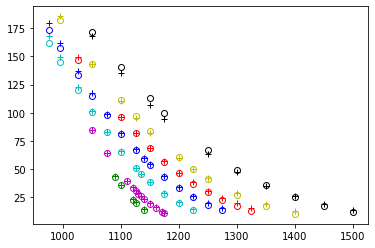

In [29]:
def Kou_calculate_model_values(p0):
    ''' Calculates all model values given parameter vector p0. '''
  
    sigma, lamb, p, eta_1, eta_2 = p0
    values = []
    for row, option in options.iterrows():
        model_value = CallPutOptionPriceCOSMthd(cf,S0,r,option['T_2'],(option['strike'],),sigma, lamb, p, eta_1, eta_2,N,L,True)
        values.append(model_value)
    return np.array(values)



model_value=Kou_calculate_model_values(opt)
model_value=model_value.reshape([len(model_value),1])
model_value=pd.DataFrame(model_value)
model_value

plt.plot(options1['strike'], options1['price'], 'go', fillstyle='none', label='cena rynkowa')
plt.plot(options1['strike'], model_value.iloc[0:5], 'g+', fillstyle='none', label='cena rynkowa')

plt.plot(options2['strike'], options2['price'], 'mo', fillstyle='none', label='cena rynkowa')
plt.plot(options2['strike'], model_value.iloc[5:17], 'm+', fillstyle='none', label='cena rynkowa')

plt.plot(options3['strike'], options3['price'], 'co', fillstyle='none', label='cena rynkowa')
plt.plot(options3['strike'], model_value.iloc[17:29], 'c+', fillstyle='none', label='cena rynkowa')


plt.plot(options4['strike'], options4['price'], 'bo', fillstyle='none', label='cena rynkowa')
plt.plot(options4['strike'], model_value.iloc[29:43], 'b+', fillstyle='none', label='cena rynkowa')

plt.plot(options5['strike'], options5['price'], 'ro', fillstyle='none', label='cena rynkowa')
plt.plot(options5['strike'], model_value.iloc[43:54], 'r+', fillstyle='none', label='cena rynkowa')

plt.plot(options6['strike'], options6['price'], 'yo', fillstyle='none', label='cena rynkowa')
plt.plot(options6['strike'], model_value.iloc[54:65], 'y+', fillstyle='none', label='cena rynkowa')

plt.plot(options7['strike'], options7['price'], 'ko', fillstyle='none', label='cena rynkowa')
plt.plot(options7['strike'], model_value.iloc[65:], 'k+', fillstyle='none', label='cena rynkowa')

plt.savefig("Kou_calibration",dpi=400)